In [6]:
from minisom import MiniSom

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
data = np.random.rand(24,10)
print(data)
iris = np.genfromtxt('iris.csv', delimiter=',', usecols=(0, 1, 2, 3))
# data normalization
loi = []
iris = np.apply_along_axis(lambda x: x/np.linalg.norm(x), 1, data)
v = [51, 35, 48, 40, 46, 41, 51, 45, 32, 50, 142, 46, 31, 46, 33, 252, 51, 248, 253, 54, 49, 44, 34, 51, 42, 47, 32, 248, 48, 54, 38, 33, 44, 33, 37, 33, 141, 50, 46, 31, 48, 44, 141, 38, 43, 252, 37, 44, 48, 142, 40, 138, 53, 42, 248, 48, 252, 43, 247, 37, 251, 46, 42, 48, 10, 36, 6, 51, 42, 52, 38, 45, 34, 45, 50, 247, 38, 51, 43, 38, 141, 53, 35, 50, 41, 135, 139, 51, 46, 33, 140, 53, 43, 136, 33, 140, 39, 32, 40, 136, 140, 50, 30, 41, 51, 252, 44, 138, 35, 134, 42, 140, 47, 251, 41, 49, 135, 53, 32, 36, 40, 51, 252, 36, 248, 50, 44, 38, 44, 37, 253, 46, 33, 41, 251, 246, 32, 141, 42, 137, 247, 36, 53, 46, 52, 43, 136, 47, 141, 35, 133, 40, 141, 49, 29, 254, 43, 134, 250, 49, 140, 136, 53, 49, 32, 44, 248, 51, 252, 37, 46, 50, 248, 252, 47, 43, 48, 41, 252, 45, 248, 52, 45, 252, 36, 52, 252, 41, 52, 46, 50, 48, 38, 53, 35, 46, 40, 50, 43, 36, 49, 113, 108, 33, 44, 142, 30, 53, 48, 248, 34, 252, 44, 49, 40, 46, 33, 46, 137, 52, 46, 37, 53, 41, 53, 47, 32, 44, 48, 35, 46, 53, 47, 51, 142, 252, 45, 55, 50, 36, 253, 43, 248, 36, 43, 49, 52, 44, 40, 253, 48, 43, 39, 31, 46, 136, 36, 140, 51, 113, 108, 33, 51, 43, 247, 37, 48, 40, 47, 50, 46, 136, 33, 43, 53, 35, 53, 35, 40, 48, 136, 38, 31, 252, 45, 32, 52, 43, 33, 41, 142, 48, 138, 42, 253, 49, 45, 35, 40, 55, 247, 49, 252, 53, 42, 49, 136, 38, 141, 52, 36, 44, 138, 32, 50, 248, 44, 248, 34, 38, 48, 42, 49, 139, 43, 50, 45, 112, 33, 136, 48, 43, 39, 44, 34, 137, 47, 43, 247, 39, 47, 251, 44, 48, 137, 45, 53, 142, 32, 49, 42, 252, 51, 252, 35, 136, 141, 39, 51, 45, 33, 41, 37, 32, 42, 50, 252, 33, 49, 41, 137, 247, 141, 40, 53, 41, 50, 37, 42, 52, 39, 50, 137, 35, 52, 35, 50, 45, 52, 46, 40, 49, 37, 49, 31, 49, 35, 43, 48, 52, 48, 33, 253, 248, 45, 137, 35, 41, 50, 41, 51, 247, 48, 137, 40, 47, 137, 38, 47, 52, 45, 31, 52, 42, 36, 42, 51, 45, 51, 31, 49, 35, 137, 141, 49, 136, 248, 140, 46, 252, 53, 30, 48, 52, 33, 48, 248, 44, 36, 52, 48, 246, 141, 32, 49, 43, 34, 253, 39, 43, 248, 52, 251, 40, 53, 41, 51, 33, 42, 48, 247, 251, 35, 42, 33, 50, 45, 53, 34, 40, 137, 50, 142, 40, 45, 136, 247, 34, 140, 43, 49, 31, 48, 39, 53, 38, 108, 42, 33, 43, 248, 38, 135, 251, 43, 139, 247, 252, 40, 51, 35, 52, 40, 47, 253, 45, 248, 41, 33, 48, 34, 39, 46, 38, 48, 35, 48, 41, 50, 36, 45, 52, 41, 30, 45, 39, 51, 33, 48, 53, 43, 252, 38, 50, 43, 51, 135, 140, 252, 34, 42, 48, 29, 50, 40, 47, 34, 47, 51, 33, 48, 142, 248, 34, 49, 142, 37, 43, 48, 136, 52, 140, 40, 48, 41, 33, 40, 54, 33, 40, 136, 140, 251, 40, 51, 38, 35, 249, 48, 35, 53, 34, 53, 42, 47, 137, 37, 44, 38, 50, 40, 52, 33, 41, 53, 42, 51, 43, 33, 50, 46, 252, 48, 32, 51, 33, 136, 40, 46, 42, 37, 50, 43, 52, 246, 40, 250, 36, 51, 37, 41, 53, 248, 43, 251, 34, 50, 46, 50, 46, 40, 45, 41, 49, 42, 35, 41, 52, 38, 45, 51, 44, 34, 53, 40, 50, 34, 40, 44, 53, 42, 113, 46, 49, 247, 33, 142, 251, 51, 134, 32, 139, 37, 31, 142, 47, 137, 33, 51, 43, 248, 35, 49, 45, 49, 35, 253, 55, 249, 36, 141, 49, 44, 50, 33, 252, 49, 40, 34, 49, 42, 54, 34, 50, 33, 40, 50, 41, 32, 53, 40, 35, 44, 52, 32, 45, 50, 141, 45, 248, 40, 47, 137, 41, 106, 29, 40, 50, 34, 136, 109, 30, 37, 44, 52, 45, 38, 53, 34, 51, 45, 29, 44, 33, 47, 42, 53, 29, 37, 48, 43, 31, 39, 51, 140, 37, 52, 36, 52, 42, 137, 50, 253, 249, 43, 32, 137, 41, 48, 41, 253, 51, 249, 36, 40, 36, 50, 44, 137, 28, 47, 136, 248, 140, 36, 45, 155, 7, 112, 31, 41, 53, 48, 43, 36, 52, 44, 53, 41, 47, 52, 45, 252, 48, 35, 52, 247, 32, 53, 40, 247, 50, 252, 29, 51, 40, 53, 43, 51, 252, 136, 47, 53, 44, 49, 44, 53, 42, 48, 37, 46, 36, 48, 44, 49, 38, 46, 39, 53, 36, 50, 37, 45, 53, 252, 49, 38, 109, 44, 40, 50, 45, 40, 252, 248, 51, 142, 32, 42, 142, 34, 48, 38, 33, 52, 142, 138, 43, 48, 40, 50, 44, 39, 50, 247, 52, 34, 41, 48, 34, 43, 50, 141, 45, 40, 252, 48, 31, 247, 42, 252, 38, 44, 52, 44, 49, 39, 46, 42, 50, 41, 52, 41, 35, 44, 136, 38, 135, 49, 141, 43, 48, 248, 252, 35, 43, 52, 46, 37, 50, 51, 31, 51, 38, 50, 29, 251, 36, 42, 32, 39, 49, 35, 40, 32, 52, 37, 141, 247, 49, 253, 45, 248, 39, 54, 36, 52, 136, 45, 38, 52, 42, 247, 251, 46, 53, 246, 41, 37, 110, 49, 136, 41, 34, 48, 41, 52, 44, 47, 41, 48, 44, 50, 42, 53, 41, 141, 43, 48, 142, 52, 42, 35, 51, 39, 138, 48, 49, 45, 34, 54, 46, 34, 49, 113, 34, 108, 49, 136, 140, 37, 52, 48, 247, 30, 252, 50, 248, 34, 39, 43, 48, 112, 44, 108, 48, 32, 43, 44, 50, 42, 38, 106, 52, 46, 34, 48, 53, 252, 46, 53, 42, 247, 52, 251, 47, 247, 37, 135, 46, 141, 250, 49, 251, 45, 51, 36, 49, 29, 52, 41, 53, 248, 48, 49, 36, 49, 136, 44, 142, 50, 138, 35, 43, 48, 49, 48, 42, 140, 47, 36, 49, 41, 46, 247, 53, 252, 36, 43, 47, 36, 136, 29, 35, 39, 50, 31, 50, 41, 49, 41, 34, 49, 136, 44, 140, 51, 32, 36, 248, 252, 46, 38, 48, 247, 39, 252, 48, 40, 35, 42, 34, 53, 43, 38, 50, 43, 49, 35, 48, 53, 135, 31, 38, 247, 44, 39, 52, 40, 34, 48, 35, 40, 53, 34, 137, 42, 52, 42, 51, 52, 47, 134, 245, 40, 138, 251, 52, 39, 43, 135, 53, 141, 31, 52, 34, 50, 44, 49, 140, 31, 49, 39, 137, 53, 45, 247, 252, 39, 49, 33, 54, 46, 39, 135, 245, 250, 42, 31, 43, 249, 52, 38, 44, 136, 248, 38, 141, 46, 34, 49, 35, 40, 48, 44, 33, 48, 40, 254, 49, 38, 46, 39, 50, 35, 141, 53, 48, 39, 47, 53, 49, 39, 48, 39, 53, 44, 48, 53, 35, 45, 40, 34, 48, 134, 42, 47, 40, 136, 247, 49, 42, 50, 31, 41, 46, 34, 48, 34, 45, 39, 47, 41, 48, 136, 44, 140, 35, 50, 42, 112, 49, 108, 38, 45, 51, 252, 247, 45, 45, 49, 248, 44, 30, 136, 34, 254, 50, 250, 41, 51, 137, 33, 49, 41, 50, 45, 48, 136, 33, 140, 52, 251, 48, 35, 46, 39, 45, 34, 43, 50, 136, 246, 250, 107, 45, 49, 141, 36, 40, 44, 50, 43, 38, 45, 247, 52, 253, 37, 33, 46, 37, 51, 44, 51, 37, 139, 44, 253, 246, 250, 49, 45, 48, 44, 42, 54, 46, 136, 38, 48, 252, 248, 42, 48, 44, 34, 48, 136, 141, 42, 33, 38, 136, 51, 33, 248, 43, 252, 47, 31, 42, 54, 44, 52, 38, 108, 44, 35, 45, 49, 29, 48, 42, 51, 37, 136, 33, 248, 42, 35, 40, 135, 51, 40, 36, 135, 49, 247, 31, 48, 40, 45, 135, 53, 139, 36, 112, 141, 134, 41, 138, 247, 47, 39, 46, 136, 51, 49, 40, 248, 46, 34, 43, 245, 251, 49, 31, 48, 35, 52, 252, 42, 36, 31, 52, 44, 140, 52, 38, 248, 43, 39, 52, 36, 46, 42, 51, 139, 40, 248, 41, 39, 51, 42, 49, 35, 31, 139, 40, 135, 35, 42, 40, 30, 48, 39, 49, 139, 53, 49, 42, 46, 51, 29, 51, 133, 44, 139, 37, 33, 252, 45, 50, 44, 38, 42, 35, 41, 49, 140, 253, 51, 248, 252, 46, 248, 52, 37, 49, 33, 38, 51, 46, 247, 135, 52, 139, 251, 42, 48, 54, 248, 34, 30, 42, 33, 253, 48, 40, 47, 43, 49, 40, 52, 37, 33, 52, 35, 40, 48, 251, 38, 42, 141, 248, 51, 40, 46, 141, 250, 52, 43, 35, 48, 53, 35, 49, 53, 35, 140, 49, 33, 49, 137, 47, 32, 50, 43, 50, 44, 134, 50, 139, 247, 29, 42, 141, 51, 137, 113, 41, 252, 50, 43, 53, 29, 33, 44, 135, 245, 139, 252, 38, 45, 29, 41, 53, 48, 139, 38, 32, 51, 135, 40, 32, 44, 48, 40, 32, 46, 36, 32, 42, 31, 49, 40, 108, 48, 41, 46, 48, 39, 50, 41, 47, 42, 36, 50, 141, 40, 136, 47, 39, 50, 41, 49, 32, 51, 37, 41, 33, 46, 34, 46, 34, 48, 42, 251, 32, 49, 44, 50, 47, 51, 40, 34, 40, 48, 33, 46, 41, 32, 141, 52, 32, 48, 36, 42, 51, 45, 252, 40, 249, 51, 46, 36, 41, 47, 42, 134, 140, 50, 141, 48, 42, 35, 40, 47, 38, 49, 45, 33, 46, 52, 42, 51, 45, 32, 52, 46, 48, 139, 30, 40, 53, 49, 33, 45, 37, 30, 51, 44, 34, 49, 40, 53, 141, 47, 38, 42, 52, 141, 136, 39, 48, 29, 40, 140, 47, 135, 252, 52, 30, 48, 43, 50, 46, 137, 247, 42, 252, 33, 47, 38, 47, 52, 48, 141, 34, 248, 53, 40, 31, 44, 51, 37, 48, 39, 45, 36, 52, 247, 30, 41, 48, 253, 246, 53, 250, 33, 42, 50, 29, 36, 40, 51, 29, 46, 42, 32, 52, 46, 135, 252, 41, 139, 51, 32, 29, 51, 45, 247, 50, 33, 52, 48, 46, 53, 41, 49, 35, 49, 52, 46, 32, 44, 48, 44, 40, 46, 36, 52, 41, 50, 34, 40, 49, 40, 136, 252, 45, 140, 34, 52, 31, 39, 52, 253, 38, 42, 141, 46, 136, 247, 46, 141, 33, 52, 46, 252, 50, 30, 35, 50, 39, 49, 41, 32, 49, 52, 140, 46, 253, 249, 44, 40, 47, 34, 42, 139, 49, 44, 38, 44, 29, 47, 41, 141, 48, 38, 42, 38, 50, 41, 248, 37, 46, 42, 48, 35, 47, 251, 38, 44, 52, 48, 52, 30, 48, 248, 52, 38, 48, 53, 47, 40, 49, 40, 31, 50, 135, 31, 139, 42, 50, 31, 48, 54, 48, 34, 248, 135, 139, 249, 252, 248, 48, 32, 46, 136, 52, 42, 32, 45, 30, 48, 39, 51, 39, 32, 40, 48, 246, 31, 252, 43, 51, 40, 252, 46, 35, 52, 44, 28, 50, 43, 135, 249, 33, 36, 46, 34, 48, 29, 44, 43, 52, 46, 35, 42, 134, 48, 37, 28, 45, 246, 46, 137, 49, 246, 42, 47, 44, 52, 44, 135, 49, 42, 33, 51, 35, 42, 37, 50, 252, 33, 42, 249, 49, 42, 52, 48, 49, 31, 39, 52, 44, 31, 251, 49, 247, 36, 41, 49, 34, 41, 32, 45, 33, 37, 29, 40, 34, 43, 39, 33, 50, 45, 37, 247, 32, 51, 47, 32, 44, 50, 32, 40, 46, 42, 47, 33, 49, 134, 247, 53, 43, 34, 43, 248, 49, 43, 49, 32, 252, 46, 104, 33, 108, 29, 38, 33, 45, 51, 42, 50, 249, 41, 35, 44, 52, 47, 34, 137, 52, 34, 50, 36, 50, 34, 247, 48, 38, 45, 248, 49, 40, 32, 40, 31, 42, 31, 48, 137, 31, 248, 41, 34, 49, 38, 31, 50, 46, 34, 40, 48, 29, 37, 31, 44, 139, 253, 36, 134, 248, 45, 104, 33, 108, 40, 254, 48, 246, 252, 43, 139, 247, 50, 42, 48, 42, 35, 46, 52, 48, 53, 252, 38, 248, 33, 252, 45, 38, 45, 253, 48, 138, 133, 31, 49, 53, 49, 254, 28, 250, 34, 49, 39, 134, 252, 52, 247, 35, 254, 50, 249, 36, 49, 44, 40, 46, 33, 45, 51, 39, 137, 52, 45, 51, 47, 52, 246, 250, 44, 34, 43, 35, 41, 48, 37, 29, 41, 50, 138, 251, 31, 36, 133, 46, 30, 252, 40, 33, 44, 39, 46, 51, 252, 36, 42, 37, 44, 249, 31, 44, 246, 40, 252, 50, 45, 39, 252, 34, 247, 49, 42, 52, 40, 34, 138, 41, 137, 44, 47, 37, 138, 32, 48, 39, 48, 36, 250, 139, 29, 50, 45, 249, 33, 44, 39, 135, 49, 246, 42, 138, 250, 51, 140, 42, 135, 30, 139, 44, 51, 43, 34, 45, 32, 252, 37, 45, 47, 33, 38, 33, 48, 41, 32, 52, 44, 39, 48, 134, 35, 247, 51, 44, 36, 41, 50, 245, 45, 250, 51, 46, 35, 44, 246, 48, 33, 52, 33, 51, 46, 51, 248, 41, 33, 46, 51, 134, 45, 33, 42, 135, 36, 49, 52, 139, 43, 51, 43, 33, 29, 139, 47, 135, 52, 35, 113, 30, 53, 45, 51, 40, 31, 39, 49, 135, 52, 46, 51, 246, 251, 247, 42, 48, 138, 34, 52, 39, 140, 48, 53, 30, 50, 252, 40, 35, 48, 32, 135, 49, 246, 44, 253, 134, 249, 49, 139, 33, 246, 48, 253, 135, 249, 44, 40, 135, 51, 42, 139, 51, 39, 31, 248, 47, 40, 253, 248, 44, 46, 34, 139, 40, 252, 52, 31, 40, 247, 47, 43, 48, 30, 41, 135, 45, 139, 48, 134, 41, 49, 50, 35, 139, 247, 52, 43, 46, 40, 247, 47, 35, 47, 247, 51, 35, 248, 40, 50, 253, 106, 53, 249, 47, 253, 32, 249, 41, 48, 38, 49, 39, 30, 47, 135, 35, 43, 50, 29, 53, 140, 47, 40, 50, 43, 134, 50, 40, 45, 51, 37, 43, 46, 36, 50, 45, 51, 46, 247, 102, 35, 252, 47, 37, 31, 48, 104, 35, 108, 42, 47, 31, 52, 38, 42, 253, 48, 248, 252, 40, 30, 140, 45, 30, 51, 34, 50, 33, 49, 31, 43, 43, 48, 31, 52, 38, 135, 249, 48, 33, 47, 43, 247, 53, 251, 41, 48, 28, 46, 140, 44, 31, 42, 30, 252, 52, 47, 32, 42, 48, 40, 49, 36, 113, 49, 108, 37, 48, 34, 45, 42, 34, 49, 44, 51, 52, 46, 37, 49, 37, 52, 39, 47, 41, 48, 38, 53, 34, 53, 251, 42, 31, 38, 48, 44, 30, 41, 37, 49, 36, 40, 42, 135, 52, 46, 247, 39, 33, 48, 30, 38, 53, 134, 138, 48, 40, 49, 35, 46, 138, 30, 48, 37, 41, 248, 33, 53, 47, 42, 50, 44, 50, 41, 135, 140, 37, 41, 50, 44, 139, 33, 49, 38, 48, 35, 43, 47, 45, 247, 41, 50, 42, 50, 45, 252, 53, 31, 49, 38, 42, 50, 44, 140, 52, 136, 39, 46, 42, 133, 52, 139, 46, 29, 49, 254, 41, 249, 51, 34, 52, 41, 32, 51, 135, 36, 40, 45, 40, 247, 31, 37, 50, 33, 135, 49, 139, 43, 136, 49, 39, 253, 34, 246, 43, 251, 38, 34, 31, 45, 32, 41, 49, 42, 50, 40, 33, 50, 38, 48, 254, 44, 36, 43, 51, 133, 137, 47, 137, 35, 48, 39, 252, 47, 43, 37, 50, 32, 43, 37, 32, 46, 42, 131, 52, 136, 135, 30, 53, 38, 51, 43, 252, 45, 33, 48, 252, 42, 51, 42, 52, 28, 39, 45, 31, 46, 253, 32, 38, 50, 37, 247, 30, 38, 248, 51, 33, 42, 32, 44, 49, 45, 133, 33, 48, 30, 42, 248, 31, 48, 132, 38, 136, 39, 33, 248, 49, 35, 134, 253, 40, 35, 41, 47, 39, 49, 42, 46, 137, 30, 43, 46, 247, 51, 46, 253, 35, 138, 41, 47, 51, 32, 46, 52, 42, 32, 48, 27, 39, 50, 46, 31, 44, 28, 45, 29, 41, 112, 49, 108, 34, 44, 50, 36, 32, 37, 31, 42, 46, 31, 51, 47, 138, 32, 44, 35, 46, 40, 247, 49, 251, 45, 37, 43, 48, 33, 46, 46, 50, 29, 50, 35, 138, 250, 43, 39, 32, 41, 32, 50, 135, 42, 31, 48, 41, 33, 247, 46, 40, 50, 44, 51, 112, 107, 33, 135, 48, 43, 52, 248, 32, 49, 36, 46, 37, 48, 40, 49, 30, 35, 49, 33, 46, 135, 35, 32, 47, 40, 248, 45, 253, 51, 249, 36, 50, 139, 50, 42, 139, 47, 36, 52, 47, 246, 38, 44, 31, 40, 47, 253, 41, 251, 50, 38, 45, 248, 41, 47, 43, 51, 251, 38, 247, 49, 251, 42, 246, 47, 251, 29, 42, 36, 42, 41, 52, 46, 50, 29, 33, 47, 29, 247, 49, 30, 50, 29, 46, 33, 46, 41, 32, 137, 51, 247, 34, 43, 30, 48, 138, 31, 47, 32, 50, 134, 41, 53, 46, 252, 32, 49, 33, 45, 39, 135, 51, 45, 34, 246, 40, 132, 45, 136, 41, 31, 51, 36, 32, 41, 52, 33, 46, 247, 53, 49, 41, 137, 32, 49, 250, 246, 33, 53, 47, 42, 133, 248, 136, 31, 35, 31, 139, 47, 133, 248, 51, 138, 46, 252, 41, 46, 139, 52, 42, 46, 35, 41, 46, 139, 132, 39, 137, 47, 30, 47, 53, 45, 35, 42, 139, 45, 247, 50, 43, 37, 47, 133, 138, 36, 50, 252, 36, 52, 30, 48, 134, 46, 252, 52, 41, 36, 48, 39, 134, 251, 36, 41, 37, 48, 104, 37, 109, 247, 108, 52, 47, 246, 41, 53, 138, 41, 252, 52, 248, 39, 45, 247, 51, 138, 252, 33, 39, 48, 28, 42, 46, 38, 48, 42, 38, 138, 42, 247, 48, 251, 38, 32, 134, 47, 43, 51, 40, 50, 46, 34, 44, 50, 34, 47, 246, 254, 42, 49, 30, 46, 40, 248, 35, 139, 247, 33, 39, 246, 48, 253, 248, 49, 44, 49, 134, 42, 139, 35, 50, 51, 36, 139, 46, 52, 39, 52, 29, 46, 139, 42, 48, 31, 252, 50, 33, 133, 50, 138, 36, 51, 38, 48, 139, 31, 46, 42, 50, 36, 46, 38, 49, 135, 36, 252, 49, 36, 41, 46, 135, 252, 42, 46, 48, 34, 43, 30, 44, 50, 140, 136, 38, 50, 37, 136, 45, 246, 41, 252, 49, 42, 54, 247, 44, 139, 249, 41, 30, 48, 33, 43, 246, 32, 47, 38, 133, 44, 138, 252, 133, 247, 49, 138, 252, 37, 248, 41, 139, 32, 134, 40, 139, 53, 36, 49, 35, 133, 137, 39, 47, 41, 49, 37, 46, 42, 34, 47, 252, 51, 42, 135, 35, 52, 42, 34, 51, 48, 34, 52, 251, 33, 135, 52, 40, 247, 47, 251, 35, 135, 47, 132, 138, 53, 37, 51, 36, 137, 40, 48, 131, 139, 251, 35, 246, 250, 45, 51, 35, 49, 248, 44, 52, 47, 43, 50, 40, 47, 43, 139, 50, 39, 133, 246, 138, 50, 132, 45, 136, 252, 41, 34, 44, 29, 41, 33, 48, 135, 246, 44, 251, 31, 48, 52, 48, 44, 33, 47, 37, 54, 134, 50, 32, 42, 247, 46, 252, 248, 35, 40, 53, 252, 38, 49, 133, 33, 137, 42, 30, 48, 40, 134, 48, 139, 41, 247, 33, 46, 39, 139, 252, 134, 54, 41, 46, 52, 45, 38, 51, 40, 32, 38, 43, 252, 33, 38, 48, 43, 51, 38, 51, 42, 33, 40, 106, 33, 41, 34, 41, 49, 42, 139, 47, 135, 51, 38, 133, 137, 46, 53, 34, 29, 134, 42, 48, 42, 49, 39, 35, 44, 40, 29, 46, 247, 39, 52, 44, 32, 247, 52, 251, 38, 45, 52, 39, 253, 48, 246, 41, 33, 48, 32, 44, 32, 51, 39, 32, 41, 134, 45, 34, 43, 38, 47, 33, 48, 39, 102, 133, 37, 46, 41, 249, 49, 38, 44, 33, 43, 47, 248, 40, 52, 30, 42, 52, 46, 253, 45, 37, 51, 139, 39, 134, 33, 48, 35, 48, 52, 43, 247, 37, 48, 36, 50, 248, 40, 252, 49, 32, 36, 43, 50, 252, 42, 28, 40, 48, 43, 140, 49, 42, 248, 45, 51, 43, 37, 49, 37, 52, 139, 42, 32, 46, 33, 139, 44, 49, 35, 48, 44, 37, 133, 50, 139, 40, 36, 42, 35, 33, 44, 138, 254, 104, 52, 134, 108, 38, 247, 49, 39, 138, 112, 247, 107, 48, 53, 43, 53, 44, 49, 35, 51, 45, 51, 45, 246, 50, 44, 139, 52, 135, 34, 47, 33, 41, 47, 134, 42, 138, 50, 44, 247, 45, 252, 38, 43, 32, 41, 34, 39, 135, 49, 133, 42, 46, 38, 44, 252, 134, 248, 51, 49, 246, 37, 250, 41, 49, 39, 52, 35, 48, 42, 49, 247, 40, 137, 252, 46, 34, 50, 245, 45, 39, 33, 46, 252, 245, 249, 37, 52, 45, 40, 44, 247, 52, 31, 252, 38, 45, 137, 109, 133, 42, 251, 32, 245, 53, 44, 137, 38, 32, 50, 34, 50, 31, 48, 37, 43, 33, 48, 37, 28, 35, 51, 42, 49, 42, 51, 42, 38, 49, 43, 139, 51, 135, 35, 52, 33, 38, 105, 48, 138, 39, 30, 34, 45, 133, 51, 132, 46, 34, 47, 33, 137, 40, 251, 52, 44, 31, 45, 139, 49, 133, 44, 104, 52, 48, 33, 49, 33, 41, 50, 42, 32, 251, 50, 247, 41, 33, 48, 36, 49, 41, 46, 48, 34, 44, 30, 38, 246, 44, 250, 37, 42, 49, 134, 138, 39, 51, 138, 31, 49, 35, 50, 134, 33, 52, 45, 29, 50, 46, 37, 43, 50, 34, 44, 38, 42, 33, 252, 40, 248, 252, 48, 42, 38, 46, 139, 52, 135, 44, 37, 135, 44, 139, 38, 34, 39, 48, 42, 46, 135, 41, 49, 42, 52, 247, 41, 253, 48, 249, 40, 45, 53, 48, 42, 46, 37, 44, 33, 47, 51, 48, 47, 53, 132, 40, 48, 44, 50, 35, 42, 48, 40, 53, 36, 45, 133, 138, 52, 133, 49, 133, 139, 252, 30, 53, 41, 48, 41, 52, 44, 48, 44, 246, 250, 37, 132, 50, 137, 253, 35, 40, 51, 45, 135, 49, 54, 45, 41, 50, 33, 254, 46, 42, 50, 39, 32, 252, 50, 43, 52, 43, 30, 51, 33, 43, 51, 46, 139, 53, 44, 135, 38, 32, 50, 133, 34, 46, 138, 49, 134, 32, 46, 39, 32, 40, 138, 45, 40, 51, 45, 43, 35, 42, 46, 33, 135, 37, 139, 50, 36, 54, 47, 138, 50, 45, 49, 246, 44, 32, 52, 39, 139, 31, 50, 135, 41, 53, 45, 248, 49, 40, 34, 50, 46, 52, 31, 133, 246, 42, 138, 253, 51, 46, 102, 52, 44, 40, 46, 32, 247, 251, 46, 42, 37, 43, 49, 247, 41, 50, 38, 50, 251, 42, 247, 251, 52, 38, 29, 104, 46, 108, 32, 45, 41, 252, 51, 40, 51, 31, 53, 40, 139, 35, 53, 45, 140, 248, 136, 49, 138, 42, 38, 52, 44, 50, 37, 140, 136, 41, 46, 41, 32, 44, 32, 139, 252, 53, 48, 53, 37, 139, 47, 39, 34, 39, 49, 33, 29, 42, 39, 35, 48, 42, 46, 37, 42, 50, 40, 48, 42, 138, 246, 250, 33, 42, 49, 44, 29, 41, 247, 47, 134, 31, 51, 32, 248, 48, 36, 52, 40, 247, 47, 252, 31, 136, 248, 103, 28, 40, 50, 252, 41, 52, 45, 33, 46, 51, 40, 134, 29, 34, 48, 247, 44, 251, 34, 50, 33, 50, 44, 51, 45, 35, 39, 134, 138, 50, 35, 134, 40, 48, 248, 35, 252, 40, 134, 33, 35, 52, 248, 35, 250, 47, 134, 40, 138, 52, 252, 31, 43, 34, 28, 33, 49, 139, 29, 37, 106, 43, 28, 33, 246, 41, 251, 50, 43, 31, 43, 33, 45, 52, 47, 28, 40, 53, 47, 41, 247, 40, 51, 33, 53, 36, 32, 251, 52, 48, 41, 49, 139, 32, 46, 34, 30, 134, 251, 43, 138, 50, 247, 54, 41, 246, 52, 251, 36, 140, 44, 37, 48, 39, 45, 51, 42, 50, 40, 34, 252, 38, 246, 49, 36, 42, 48, 37, 48, 253, 140, 38, 48, 39, 247, 48, 41, 138, 34, 41, 34, 53, 38, 48, 33, 252, 40, 53, 35, 46, 133, 39, 138, 252, 49, 42, 34, 49, 40, 33, 134, 53, 246, 105, 251, 39, 139, 46, 135, 53, 49, 35, 135, 46, 134, 51, 46, 40, 50, 46, 50, 138, 112, 107, 41, 30, 246, 250, 47, 32, 44, 252, 248, 40, 251, 31, 43, 40, 46, 50, 41, 45, 247, 252, 39, 52, 136, 40, 140, 48, 135, 249, 52, 32, 43, 36, 40, 48, 135, 134, 41, 246, 31, 41, 248, 37, 48, 32, 38, 50, 249, 37, 44, 51, 38, 138, 31, 48, 41, 246, 51, 38, 45, 35, 51, 39, 44, 32, 49, 40, 52, 33, 39, 32, 245, 37, 50, 43, 47, 40, 52, 38, 49, 251, 46, 50, 30, 47, 42, 132, 137, 37, 43, 38, 43, 132, 137, 36, 30, 36, 49, 248, 29, 47, 36, 252, 50, 45, 245, 33, 38, 50, 137, 48, 103, 44, 107, 52, 34, 49, 36, 37, 52, 136, 45, 31, 40, 52, 31, 40, 49, 36, 32, 44, 52, 46, 42, 47, 36, 51, 38, 43, 31, 47, 246, 43, 51, 47, 247, 252, 31, 44, 246, 52, 29, 49, 35, 52, 42, 132, 34, 137, 50, 34, 51, 44, 29, 40, 48, 45, 28, 42, 35, 43, 41, 138, 48, 133, 30, 137, 253, 45, 247, 138, 49, 132, 136, 34, 46, 37, 48, 42, 34, 138, 46, 253, 132, 40, 32, 248, 52, 44, 52, 40, 29, 44, 134, 246, 49, 53, 132, 47, 136, 132, 39, 251, 49, 53, 48, 39, 44, 253, 38, 246, 50, 252, 248, 132, 39, 51, 44, 34, 49, 43, 252, 35, 42, 38, 52, 134, 253, 41, 34, 49, 251, 247, 251, 42, 49, 246, 33, 39, 31, 33, 40, 138, 49, 247, 109, 252, 32, 49, 33, 42, 247, 37, 251, 47, 41, 37, 134, 33, 49, 29, 138, 40, 134, 32, 28, 44, 53, 33, 44, 38, 43, 253, 46, 133, 249, 38, 34, 43, 251, 247, 251, 53, 132, 35, 136, 42, 51, 44, 49, 43, 31, 53, 47, 247, 42, 252, 53, 45, 38, 251, 50, 41, 35, 32, 42, 33, 49, 53, 139, 34, 135, 50, 42, 50, 36, 42, 34, 53, 41, 36, 251, 246, 42, 47, 133, 43, 48, 131, 41, 247, 50, 252, 35, 248, 50, 40, 34, 51, 33, 46, 50, 42, 51, 29, 33, 51, 42, 35, 48, 36, 41, 48, 42, 49, 30, 250, 50, 134, 43, 32, 251, 53, 40, 31, 45, 49, 104, 41, 108, 32, 38, 249, 51, 47, 38, 29, 48, 44, 34, 41, 138, 52, 40, 45, 38, 50, 38, 132, 31, 136, 48, 29, 45, 101, 38, 46, 40, 49, 39, 33, 43, 51, 38, 45, 31, 47, 34, 52, 37, 51, 44, 49, 43, 53, 40, 54, 36, 49, 42, 49, 138, 33, 51, 47, 33, 39, 34, 43, 40, 247, 33, 251, 51, 44, 133, 51, 33, 44, 50, 35, 31, 53, 137, 32, 49, 130, 38, 50, 37, 51, 44, 38, 131, 49, 135, 36, 54, 248, 50, 46, 44, 50, 39, 45, 133, 44, 52, 38, 252, 48, 247, 39, 48, 137, 55, 42, 37, 48, 36, 52, 48, 137, 54, 44, 248, 48, 252, 42, 33, 49, 133, 252, 36, 44, 246, 250, 40, 51, 46, 42, 37, 31, 41, 36, 54, 43, 53, 43, 33, 40, 48, 38, 44, 49, 42, 249, 41, 50, 35, 40, 32, 137, 251, 46, 50, 41, 52, 44, 138, 53, 49, 53, 252, 45, 33, 52, 108, 44, 39, 33, 46, 35, 40, 251, 37, 46, 248, 51, 39, 49, 42, 36, 253, 32, 249, 46, 52, 247, 44, 54, 42, 47, 137, 246, 251, 32, 47, 41, 54, 45, 49, 39, 45, 138, 39, 46, 34, 47, 43, 38, 47, 41, 36, 43, 34, 32, 48, 42, 50, 133, 43, 49, 35, 49, 252, 40, 138, 46, 133, 112, 42, 108, 34, 48, 42, 53, 47, 248, 52, 38, 131, 42, 137, 37, 33, 42, 131, 46, 51, 35, 45, 36, 248, 42, 52, 33, 43, 246, 246, 250, 34, 42, 34, 43, 52, 37, 43, 49, 40, 45, 36, 138, 46, 133, 50, 54, 247, 40, 134, 32, 138, 48, 52, 131, 48, 136, 54, 46, 248, 40, 138, 49, 251, 37, 44, 48, 36, 252, 49, 246, 35, 48, 35, 245, 55, 251, 45, 34, 44, 132, 37, 46, 51, 37, 48, 52, 39, 31, 49, 252, 30, 49, 251, 41, 47, 43, 47, 53, 31, 40, 49, 34, 42, 51, 112, 252, 42, 52, 35, 41, 248, 36, 46, 33, 37, 48, 43, 53, 44, 35, 52, 41, 132, 52, 138, 36, 41, 246, 250, 48, 52, 38, 46, 50, 133, 47, 37, 42, 50, 41, 45, 29, 40, 53, 37, 48, 34, 43, 137, 39, 43, 34, 46, 36, 52, 47, 53, 252, 41, 248, 48, 35, 41, 131, 138, 35, 47, 137, 53, 46, 50, 46, 134, 51, 34, 46, 32, 48, 131, 40, 136, 45, 41, 49, 54, 248, 48, 31, 40, 47, 250, 35, 50, 32, 43, 53, 43, 51, 42, 46, 40, 48, 40, 43, 40, 48, 53, 47, 136, 45, 41, 37, 47, 138, 246, 251, 42, 33, 38, 28, 137, 36, 40, 249, 50, 131, 247, 41, 137, 35, 39, 44, 33, 37, 51, 46, 35, 43, 50, 40, 51, 46, 37, 49, 35, 52, 35, 46, 253, 48, 44, 248, 46, 137, 251, 31, 52, 37, 54, 49, 34, 40, 132, 48, 138, 40, 52, 134, 32, 47, 32, 253, 50, 34, 49, 52, 248, 29, 50, 252, 43, 35, 43, 132, 51, 137, 38, 52, 46, 138, 250, 39, 131, 137, 42, 132, 252, 136, 51, 33, 51, 40, 43, 113, 107, 48, 248, 30, 247, 45, 36, 53, 46, 138, 38, 48, 38, 51, 44, 53, 45, 40, 50, 40, 52, 37, 49, 53, 44, 52, 46, 39, 51, 251, 38, 43, 30, 52, 40, 48, 39, 51, 42, 38, 42, 48, 37, 48, 41, 33, 51, 41, 51, 248, 43, 38, 44, 40, 34, 42, 49, 139, 45, 33, 133, 248, 40, 138, 35, 134, 45, 50, 35, 45, 51, 41, 54, 43, 48, 38, 51, 134, 40, 28, 42, 134, 248, 36, 47, 253, 43, 249, 49, 53, 34, 48, 43, 35, 43, 51, 30, 252, 41, 51, 48, 133, 42, 32, 252, 44, 31, 48, 43, 48, 131, 44, 252, 49, 45, 138, 50, 31, 36, 44, 52, 40, 44, 55, 133, 32, 38, 132, 45, 136, 136, 52, 44, 50, 38, 252, 43, 137, 35, 48, 44, 131, 101, 49, 33, 38, 252, 29, 46, 52, 46, 35, 48, 135, 36, 249, 51, 39, 36, 252, 46, 248, 34, 50, 46, 39, 137, 132, 248, 49, 252, 29, 48, 33, 45, 38, 32, 48, 40, 32, 49, 137, 35, 47, 246, 137, 252, 30, 247, 48, 251, 41, 53, 38, 50, 246, 32, 253, 46, 249, 112, 42, 107, 35, 51, 45, 49, 45, 52, 28, 36, 248, 44, 253, 31, 39, 31, 45, 33, 40, 251, 29, 48, 32, 38, 48, 29, 47, 42, 51, 252, 248, 252, 53, 36, 30, 48, 37, 48, 40, 52, 43, 39, 252, 47, 38, 43, 47, 251, 35, 41, 45, 247, 31, 53, 245, 250, 43, 53, 42, 49, 247, 43, 49, 34, 39, 50, 37, 52, 39, 45, 36, 49, 39, 254, 50, 42, 29, 42, 132, 136, 247, 51, 252, 41, 45, 46, 50, 52, 138, 44, 35, 48, 43, 49, 33, 52, 34, 46, 247, 45, 51, 36, 137, 44, 132, 52, 44, 52, 34, 49, 38, 133, 48, 52, 31, 49, 32, 49, 39, 49, 246, 38, 51, 39, 246, 43, 251, 47, 43, 49, 37, 247, 252, 45, 41, 132, 52, 29, 53, 133, 32, 49, 132, 136, 132, 137, 246, 250, 132, 32, 45, 51, 44, 33, 45, 39, 43, 33, 42, 52, 247, 45, 254, 36, 41, 52, 34, 50, 47, 133, 53, 48, 53, 33, 44, 51, 47, 43, 48, 132, 138, 40, 45, 39, 133, 50, 36, 138, 41, 53, 252, 38, 45, 51, 39, 45, 31, 42, 38, 34, 134, 52, 32, 138, 54, 40, 48, 34, 47, 39, 248, 45, 49, 133, 42, 37, 46, 42, 130, 139, 39, 133, 138, 50, 132, 29, 49, 138, 53, 37, 51, 131, 37, 138, 133, 53, 35, 50, 45, 38, 137, 42, 31, 35, 48, 43, 133, 53, 34, 40, 50, 253, 38, 45, 53, 138, 41, 35, 46, 40, 45, 39, 247, 47, 39, 53, 136, 40, 33, 41, 51, 32, 49, 30, 42, 53, 136, 45, 33, 46, 52, 252, 43, 47, 31, 137, 46, 132, 39, 248, 48, 35, 43, 32, 48, 133, 31, 46, 252, 42, 34, 251, 51, 40, 252, 51, 132, 35, 42, 49, 136, 33, 39, 32, 130, 43, 136, 51, 45, 40, 51, 42, 251, 39, 33, 130, 52, 135, 41, 51, 247, 45, 254, 247, 136, 51, 32, 50, 46, 248, 131, 252, 44, 51, 32, 46, 51, 46, 42, 248, 49, 44, 35, 132, 42, 247, 52, 136, 251, 48, 36, 43, 39, 246, 42, 250, 50, 33, 253, 51, 131, 248, 137, 44, 32, 45, 41, 47, 32, 54, 47, 29, 52, 31, 46, 133, 138, 41, 253, 52, 32, 53, 37, 48, 40, 251, 46, 50, 137, 39, 252, 44, 31, 48, 134, 51, 33, 246, 250, 49, 246, 38, 50, 52, 33, 46, 39, 50, 106, 44, 39, 131, 53, 138, 42, 29, 133, 46, 247, 28, 35, 111, 48, 42, 38, 52, 34, 46, 42, 37, 33, 51, 44, 49, 40, 50, 48, 41, 48, 54, 44, 31, 45, 31, 52, 44, 31, 36, 41, 46, 42, 31, 137, 247, 46, 52, 44, 246, 49, 43, 32, 251, 47, 36, 48, 247, 52, 252, 48, 40, 33, 40, 48, 34, 44, 133, 248, 47, 42, 48, 43, 38, 48, 253, 43, 249, 131, 35, 53, 34, 50, 31, 48, 40, 33, 46, 251, 35, 46, 35, 252, 111, 48, 248, 107, 52, 43, 33, 52, 33, 43, 33, 40, 32, 44, 134, 48, 53, 131, 46, 136, 34, 41, 46, 39, 251, 29, 56, 137, 43, 34, 46, 36, 44, 247, 40, 49, 32, 38, 252, 53, 138, 34, 134, 43, 51, 32, 52, 247, 39, 132, 251, 34, 137, 51, 40, 36, 248, 44, 252, 52, 42, 132, 252, 52, 248, 132, 48, 52, 41, 53, 137, 34, 52, 247, 251, 43, 137, 50, 131, 136, 46, 37, 47, 52, 32, 133, 38, 137, 43, 33, 53, 39, 49, 35, 253, 44, 29, 50, 40, 132, 136, 56, 132, 252, 32, 43, 50, 31, 48, 38, 29, 50, 51, 46, 248, 31, 38, 33, 49, 41, 38, 44, 52, 44, 247, 32, 251, 44, 134, 39, 48, 35, 49, 41, 251, 51, 246, 42, 252, 46, 246, 251, 40, 49, 40, 131, 50, 136, 33, 42, 46, 32, 138, 39, 49, 132, 38, 138, 30, 35, 43, 41, 50, 245, 34, 50, 43, 248, 34, 132, 47, 136, 41, 252, 48, 32, 49, 246, 42, 52, 45, 33, 47, 132, 33, 251, 38, 138, 37, 43, 35, 45, 50, 130, 41, 251, 137, 52, 246, 252, 41, 53, 40, 47, 41, 45, 132, 50, 110, 37, 47, 133, 252, 44, 248, 51, 46, 37, 52, 41, 53, 132, 46, 136, 248, 49, 31, 105, 37, 53, 37, 45, 44, 49, 43, 247, 50, 247, 42, 52, 34, 45, 35, 129, 43, 136, 247, 47, 44, 132, 136, 37, 10, 54, 35, 41, 32, 247, 39, 247, 49, 251, 40, 138, 51, 38, 36, 43, 50, 246, 51, 37, 53, 41, 48, 42, 51, 251, 34, 45, 138, 247, 36, 35, 50, 34, 248, 49, 44, 35, 43, 138, 51, 40, 33, 40, 133, 138, 251, 50, 42, 53, 41, 36, 133, 42, 51, 138, 37, 50, 38, 48, 136, 251, 41, 247, 32, 252, 42, 138, 248, 49, 130, 112, 41, 135, 37, 252, 50, 46, 249, 39, 48, 40, 49, 248, 54, 38, 251, 44, 40, 49, 247, 33, 253, 52, 131, 247, 35, 252, 252, 51, 247, 252, 248, 35, 247, 46, 133, 33, 50, 32, 43, 49, 253, 53, 45, 29, 52, 43, 48, 34, 52, 36, 41, 49, 33, 250, 45, 33, 51, 35, 53, 49, 32, 53, 39, 44, 138, 54, 34, 202, 53, 35, 50, 166, 41, 204, 47, 252, 52, 33, 44, 170, 51, 207, 32, 252, 212, 48, 34, 165, 51, 42, 48, 40, 138, 44, 49, 46, 253, 52, 176, 41, 52, 172, 138, 251, 37, 46, 52, 44, 134, 49, 33, 40, 53, 32, 49, 37, 51, 132, 48, 32, 247, 41, 209, 46, 54, 44, 171, 33, 48, 33, 48, 112, 107, 45, 30, 44, 36, 44, 34, 101, 39, 134, 53, 49, 112, 42, 108, 53, 49, 43, 31, 40, 52, 36, 130, 135, 51, 41, 53, 46, 51, 41, 131, 48, 137, 42, 133, 252, 34, 37, 45, 31, 48, 44, 51, 46, 41, 246, 54, 250, 36, 48, 41, 35, 46, 40, 252, 37, 113, 42, 133, 108, 37, 44, 48, 33, 45, 30, 47, 106, 47, 252, 42, 248, 35, 54, 132, 45, 38, 39, 137, 48, 251, 40, 53, 48, 174, 41, 50, 132, 34, 43, 33, 43, 38, 51, 44, 48, 248, 43, 33, 174, 180, 52, 175, 43, 179, 132, 173, 34, 136, 53, 47, 247, 51, 42, 33, 247, 38, 44, 34, 42, 48, 138, 134, 32, 138, 52, 45, 53, 47, 37, 53, 38, 44, 53, 32, 41, 36, 49, 32, 39, 248, 31, 253, 41, 130, 136, 50, 38, 46, 40, 247, 49, 45, 36, 53, 134, 42, 137, 53, 133, 248, 137, 133, 246, 35, 49, 38, 42, 32, 50, 44, 31, 134, 35, 41, 51, 132, 41, 46, 32, 43, 50, 46, 41, 251, 30, 53, 41, 37, 49, 252, 247, 38, 251, 45, 41, 253, 37, 249, 51, 33, 43, 47, 250, 43, 49, 38, 45, 41, 253, 248, 49, 44, 53, 36, 45, 51, 46, 35, 43, 32, 46, 247, 31, 251, 36, 46, 40, 54, 50, 43, 51, 38, 137, 248, 52, 46, 41, 52, 48, 37, 48, 246, 52, 250, 46, 246, 40, 138, 253, 36, 44, 248, 47, 32, 43, 53, 42, 38, 51, 31, 40, 130, 45, 52, 39, 50, 32, 38, 51, 247, 46, 251, 41, 45, 50, 43, 39, 45, 111, 37, 133, 46, 137, 51, 45, 137, 52, 32, 53, 42, 35, 46, 247, 38, 31, 46, 51, 35, 48, 37, 133, 41, 46, 38, 131, 42, 49, 137, 34, 45, 253, 38, 47, 38, 49, 249, 41, 49, 136, 43, 47, 131, 42, 53, 42, 130, 55, 42, 47, 41, 33, 247, 43, 42, 35, 252, 39, 48, 54, 41, 36, 53, 46, 254, 247, 37, 137, 254, 41, 247, 45, 137, 49, 40, 48, 42, 133, 34, 137, 41, 50, 46, 40, 34, 52, 32, 140, 39, 51, 38, 133, 46, 38, 52, 38, 48, 39, 51, 34, 46, 36, 42, 130, 53, 135, 46, 40, 33, 41, 31, 42, 46, 39, 49, 133, 39, 51, 45, 52, 44, 52, 137, 133, 47, 137, 44, 133, 137, 133, 52, 137, 38, 46, 129, 133, 52, 137, 39, 51, 50, 252, 43, 33, 54, 130, 39, 134, 53, 36, 40, 245, 52, 251, 112, 108, 49, 53, 132, 42, 49, 45, 131, 31, 51, 129, 43, 247, 35, 43, 35, 48, 170, 43, 32, 174, 42, 247, 37, 48, 39, 47, 31, 42, 131, 45, 137, 41, 49, 138, 33, 134, 48, 138, 44, 51, 42, 33, 53, 130, 37, 50, 253, 46, 49, 44, 39, 34, 44, 138, 41, 133, 35, 50, 45, 33, 49, 44, 50, 40, 44, 246, 50, 251, 40, 46, 53, 42, 50, 38, 47, 43, 101, 32, 176, 50, 169, 43, 39, 43, 38, 53, 248, 48, 34, 40, 48, 138, 37, 172, 46, 177, 164, 41, 48, 52, 131, 36, 136, 254, 34, 49, 35, 44, 48, 40, 52, 33, 52, 135, 247, 142, 40, 49, 34, 42, 54, 43, 36, 52, 135, 46, 140, 32, 52, 253, 248, 105, 42, 253, 51, 43, 52, 44, 253, 49, 247, 142, 38, 29, 48, 43, 52, 143, 48, 139, 247, 37, 251, 55, 49, 251, 43, 51, 141, 53, 32, 137, 42, 49, 253, 34, 248, 39, 29, 54, 43, 136, 53, 140, 35, 46, 42, 53, 44, 34, 51, 33, 54, 49, 35, 42, 46, 141, 50, 135, 37, 141, 43, 52, 141, 38, 46, 50, 247, 36, 53, 247, 37, 47, 142, 249, 52, 32, 137, 49, 44, 37, 50, 248, 32, 50, 41, 31, 142, 41, 52, 32, 41, 52, 33, 45, 53, 252, 49, 246, 41, 252, 51, 107, 37, 50, 47, 138, 42, 141, 28, 41, 48, 43, 51, 47, 37, 111, 41, 247, 107, 47, 251, 42, 142, 36, 50, 248, 40, 104, 48, 108, 45, 39, 48, 36, 51, 251, 29, 35, 52, 48, 43, 36, 248, 50, 252, 248, 252, 247, 142, 52, 47, 36, 49, 35, 51, 34, 253, 53, 248, 38, 48, 43, 48, 52, 44, 246, 141, 251, 34, 47, 35, 164, 45, 37, 48, 101, 39, 169, 51, 136, 165, 36, 142, 164, 49, 45, 138, 253, 168, 51, 164, 44, 247, 35, 251, 247, 41, 251, 50, 35, 47, 37, 137, 141, 32, 253, 44, 50, 46, 29, 44, 31, 37, 247, 168, 164, 45, 36, 31, 38, 51, 133, 42, 138, 34, 48, 39, 142, 33, 38, 54, 49, 42, 37, 46, 51, 34, 169, 165, 54, 37, 43, 39, 32, 45, 33, 42, 44, 39, 138, 51, 34, 29, 37, 29, 40, 45, 38, 43, 35, 47, 136, 41, 45, 252, 46, 41, 37, 52, 33, 50, 137, 46, 141, 34, 50, 33, 37, 52, 45, 49, 38, 49, 29, 45, 53, 142, 38, 49, 53, 35, 53, 141, 36, 44, 32, 247, 54, 44, 39, 247, 47, 42, 50, 37, 49, 32, 38, 48, 35, 51, 44, 36, 43, 53, 138, 41, 53, 253, 32, 46, 50, 45, 41, 48, 31, 52, 38, 47, 251, 37, 45, 246, 33, 43, 39, 43, 47, 34, 45, 246, 50, 250, 39, 48, 34, 52, 45, 34, 52, 48, 33, 37, 137, 40, 141, 35, 43, 48, 52, 142, 48, 32, 39, 46, 42, 172, 33, 47, 170, 52, 35, 253, 249, 44, 52, 42, 49, 38, 51, 142, 38, 48, 45, 49, 42, 50, 40, 48, 53, 36, 43, 33, 51, 40, 33, 41, 48, 247, 32, 142, 42, 138, 33, 40, 29, 36, 136, 46, 33, 51, 253, 47, 247, 34, 49, 249, 54, 49, 251, 45, 248, 48, 247, 53, 252, 48, 142, 38, 138, 248, 48, 42, 252, 33, 48, 41, 50, 42, 34, 252, 45, 38, 50, 254, 249, 32, 45, 110, 33, 247, 52, 44, 38, 251, 32, 44, 33, 251, 33, 50, 39, 48, 32, 137, 45, 34, 250, 49, 103, 108, 33, 39, 45, 33, 39, 35, 42, 35, 45, 135, 49, 139, 42, 252, 52, 47, 51, 42, 50, 35, 45, 32, 49, 140, 248, 44, 35, 42, 48, 247, 52, 253, 32, 249, 43, 50, 38, 48, 177, 173, 40, 35, 134, 51, 44, 141, 166, 30, 248, 52, 32, 49, 32, 37, 49, 34, 52, 41, 45, 30, 37, 246, 50, 252, 34, 49, 140, 45, 38, 133, 49, 137, 43, 34, 45, 34, 41, 134, 49, 34, 49, 134, 44, 48, 42, 50, 39, 47, 51, 246, 36, 251, 41, 136, 48, 41, 48, 40, 47, 34, 47, 51, 253, 42, 249, 46, 251, 47, 42, 50, 43, 49, 37, 44, 134, 139, 32, 253, 45, 35, 41, 30, 52, 135, 30, 250, 40, 28, 41, 253, 36, 52, 41, 134, 48, 42, 37, 41, 36, 48, 42, 46, 252, 39, 248, 30, 48, 41, 48, 32, 40, 53, 42, 29, 37, 48, 32, 48, 139, 43, 33, 52, 42, 134, 34, 139, 41, 28, 53, 36, 46, 133, 52, 138, 45, 53, 48, 51, 32, 42, 51, 40, 33, 51, 42, 46, 53, 112, 48, 107, 247, 252, 30, 50, 33, 112, 140, 107, 52, 136, 253, 249, 41, 133, 137, 45, 105, 52, 42, 252, 35, 247, 41, 32, 48, 41, 136, 45, 248, 40, 139, 35, 135, 43, 48, 111, 44, 48, 35, 42, 34, 38, 44, 135, 252, 38, 42, 50, 38, 54, 250, 45, 53, 49, 52, 32, 252, 42, 139, 36, 52, 102, 46, 34, 28, 35, 252, 48, 139, 41, 48, 44, 48, 135, 34, 28, 32, 50, 42, 139, 253, 32, 45, 38, 32, 51, 34, 47, 35, 39, 44, 136, 51, 47, 39, 34, 134, 52, 138, 32, 134, 45, 139, 49, 33, 49, 252, 247, 253, 46, 40, 165, 50, 36, 251, 43, 48, 135, 52, 46, 52, 46, 51, 137, 246, 43, 111, 107, 51, 248, 46, 252, 33, 53, 136, 46, 52, 251, 32, 247, 54, 39, 253, 35, 51, 33, 39, 47, 33, 47, 43, 248, 50, 53, 33, 42, 50, 252, 37, 33, 49, 42, 52, 32, 54, 47, 35, 40, 50, 31, 47, 31, 47, 135, 50, 139, 44, 53, 39, 38, 135, 140, 105, 49, 40, 36, 252, 42, 49, 248, 31, 252, 48, 248, 33, 51, 35, 50, 34, 40, 251, 47, 247, 41, 251, 37, 47, 135, 35, 47, 38, 248, 34, 49, 35, 46, 34, 50, 251, 33, 51, 134, 36, 138, 45, 51, 41, 36, 43, 251, 50, 45, 53, 46, 52, 42, 29, 42, 52, 140, 40, 32, 46, 51, 45, 135, 52, 32, 134, 47, 139, 32, 48, 133, 253, 52, 139, 32, 55, 247, 37, 48, 39, 52, 45, 51, 140, 42, 51, 45, 49, 41, 52, 46, 135, 50, 52, 46, 51, 35, 46, 33, 41, 31, 49, 53, 33, 140, 51, 134, 38, 51, 42, 36, 48, 42, 36, 52, 36, 42, 135, 47, 42, 138, 35, 45, 49, 32, 41, 52, 34, 42, 48, 31, 50, 44, 53, 140, 33, 39, 49, 43, 48, 106, 42, 49, 140, 42, 35, 134, 53, 34, 139, 39, 52, 53, 33, 51, 39, 43, 247, 38, 246, 43, 36, 47, 246, 32, 53, 35, 48, 37, 48, 140, 52, 37, 135, 51, 246, 33, 37, 53, 252, 48, 248, 252, 34, 48, 39, 45, 33, 45, 39, 32, 44, 135, 53, 139, 254, 44, 250, 42, 53, 139, 48, 41, 34, 48, 39, 53, 42, 135, 140, 254, 249, 253, 247, 38, 34, 46, 31, 46, 48, 141, 41, 54, 43, 53, 33, 49, 44, 53, 42, 140, 246, 52, 250, 38, 45, 246, 251, 53, 41, 47, 34, 51, 37, 137, 50, 34, 51, 45, 38, 29, 49, 45, 246, 40, 36, 31, 42, 35, 50, 33, 52, 42, 49, 252, 41, 53, 31, 48, 44, 38, 45, 51, 36, 42, 37, 49, 33, 52, 46, 52, 47, 251, 253, 51, 50, 32, 51, 35, 48, 135, 52, 34, 29, 45, 52, 135, 37, 139, 51, 36, 252, 40, 51, 135, 36, 248, 52, 48, 30, 50, 39, 51, 34, 44, 32, 136, 36, 40, 30, 45, 53, 43, 47, 42, 50, 246, 250, 38, 36, 48, 247, 36, 42, 38, 49, 44, 49, 41, 48, 42, 47, 135, 35, 43, 51, 37, 53, 41, 44, 50, 33, 247, 253, 50, 249, 40, 35, 52, 30, 50, 33, 46, 30, 44, 32, 42, 36, 46, 247, 48, 52, 32, 47, 43, 36, 43, 249, 48, 31, 40, 48, 29, 52, 29, 49, 35, 50, 40, 33, 253, 53, 38, 48, 135, 139, 38, 50, 43, 136, 33, 44, 34, 45, 40, 140, 136, 46, 48, 41, 140, 46, 42, 36, 44, 35, 40, 45, 39, 46, 136, 40, 54, 249, 42, 52, 43, 135, 37, 52, 34, 45, 135, 31, 39, 44, 48, 253, 41, 52, 43, 32, 253, 39, 33, 47, 108, 32, 50, 39, 29, 140, 49, 38, 136, 248, 46, 36, 49, 34, 139, 38, 42, 40, 253, 50, 247, 44, 248, 39, 47, 137, 52, 33, 50, 40, 47, 28, 51, 35, 48, 33, 47, 141, 136, 50, 247, 253, 40, 249, 36, 29, 38, 34, 51, 40, 38, 49, 41, 247, 49, 45, 40, 48, 38, 47, 43, 141, 31, 40, 44, 34, 48, 42, 50, 38, 35, 48, 39, 43, 140, 35, 38, 49, 44, 53, 32, 48, 38, 50, 35, 248, 47, 41, 34, 41, 45, 252, 50, 40, 54, 44, 52, 42, 51, 44, 49, 45, 247, 33, 49, 31, 253, 35, 52, 40, 141, 135, 52, 31, 42, 46, 50, 45, 41, 141, 251, 38, 32, 53, 43, 248, 37, 51, 134, 47, 140, 136, 41, 141, 32, 50, 251, 35, 39, 45, 247, 54, 44, 29, 41, 53, 252, 49, 40, 49, 36, 45, 37, 135, 139, 34, 43, 53, 33, 48, 43, 34, 40, 36, 53, 47, 252, 51, 42, 48, 44, 54, 40, 248, 140, 37, 47, 42, 50, 39, 44, 137, 40, 51, 35, 48, 43, 36, 46, 136, 39, 45, 35, 49, 38, 34, 43, 33, 29, 39, 51, 33, 51, 44, 49, 250, 36, 50, 34, 48, 39, 47, 41, 45, 33, 39, 46, 42, 36, 49, 43, 36, 42, 37, 247, 252, 46, 31, 45, 32, 51, 38, 52, 38, 249, 52, 31, 38, 53, 34, 41, 141, 34, 44, 52, 29, 110, 53, 44, 102, 36, 48, 54, 50, 41, 37, 48, 33, 47, 248, 41, 50, 42, 51, 253, 35, 45, 34, 51, 35, 47, 43, 53, 44, 48, 44, 50, 46, 33, 55, 48, 33, 48, 135, 38, 51, 247, 40, 53, 34, 41, 53, 247, 35, 136, 140, 53, 47, 40, 47, 34, 44, 37, 51, 34, 40, 248, 50, 46, 31, 135, 52, 140, 35, 247, 41, 136, 251, 45, 39, 251, 48, 45, 53, 39, 50, 44, 247, 53, 42, 36, 52, 33, 38, 47, 249, 45, 33, 50, 247, 251, 40, 34, 49, 53, 32, 45, 253, 49, 246, 251, 43, 51, 34, 43, 48, 52, 45, 36, 48, 139, 38, 33, 45, 50, 32, 249, 38, 45, 33, 47, 39, 140, 48, 33, 44, 40, 45, 39, 43, 50, 38, 53, 136, 37, 45, 51, 45, 38, 52, 104, 44, 50, 30, 38, 30, 49, 36, 40, 135, 51, 47, 33, 51, 30, 34, 50, 43, 52, 40, 51, 45, 36, 50, 38, 135, 50, 33, 50, 41, 50, 38, 52, 45, 106, 34, 46, 46, 29, 54, 45, 36, 42, 133, 51, 47, 46, 36, 49, 33, 102, 55, 49, 44, 245, 38, 249, 43, 252, 140, 248, 51, 42, 252, 134, 105, 45, 138, 36, 32, 38, 32, 51, 47, 41, 48, 42, 38, 50, 33, 52, 46, 51, 48, 247, 41, 53, 45, 47, 34, 49, 247, 105, 140, 30, 252, 53, 46, 168, 42, 29, 40, 34, 46, 246, 39, 140, 29, 254, 43, 38, 53, 33, 50, 49, 43, 49, 140, 135, 53, 140, 49, 32, 51, 135, 45, 33, 247, 52, 251, 42, 36, 49, 134, 31, 140, 50, 36, 42, 49, 41, 48, 53, 49, 31, 44, 50, 35, 40, 45, 49, 134, 38, 140, 51, 136, 45, 54, 134, 37, 138, 50, 36, 137, 45, 50, 43, 35, 251, 43, 48, 42, 54, 35, 44, 53, 246, 37, 251, 49, 36, 247, 53, 140, 251, 31, 40, 49, 252, 53, 35, 247, 48, 36, 247, 42, 53, 251, 34, 136, 46, 34, 251, 38, 46, 140, 39, 50, 41, 35, 43, 248, 48, 253, 42, 248, 46, 34, 50, 45, 50, 31, 248, 44, 49, 141, 40, 50, 44, 248, 50, 134, 36, 49, 136, 140, 37, 135, 49, 139, 39, 48, 33, 38, 53, 48, 248, 52, 252, 40, 44, 48, 139, 36, 252, 42, 249, 34, 50, 139, 33, 248, 43, 140, 37, 136, 250, 51, 37, 253, 32, 39, 246, 51, 45, 52, 36, 137, 52, 42, 46, 247, 41, 252, 52, 248, 32, 53, 252, 41, 248, 48, 252, 38, 48, 42, 134, 46, 138, 52, 45, 34, 54, 44, 246, 39, 253, 46, 247, 40, 46, 30, 35, 53, 253, 47, 41, 36, 52, 36, 53, 46, 36, 42, 54, 38, 248, 135, 48, 140, 135, 40, 53, 35, 49, 44, 55, 36, 43, 34, 136, 51, 42, 52, 48, 45, 247, 49, 138, 53, 48, 53, 47, 53, 253, 49, 248, 252, 42, 55, 42, 33, 51, 106, 35, 53, 36, 50, 35, 42, 138, 52, 35, 44, 134, 246, 50, 138, 250, 35, 246, 45, 139, 251, 50, 43, 37, 138, 53, 38, 50, 55, 48, 53, 134, 140, 40, 32, 53, 39, 34, 44, 37, 134, 44, 138, 50, 40, 252, 44, 247, 37, 30, 44, 34, 52, 38, 49, 42, 50, 39, 53, 39, 140, 135, 44, 140, 49, 251, 35, 46, 39, 251, 46, 35, 51, 247, 38, 47, 42, 134, 41, 51, 46, 140, 248, 33, 42, 36, 43, 50, 44, 52, 31, 52, 44, 40, 47, 251, 52, 136, 54, 46, 40, 48, 36, 37, 48, 42, 252, 37, 45, 40, 33, 54, 50, 140, 53, 38, 33, 49, 136, 53, 140, 39, 50, 45, 34, 135, 50, 38, 252, 49, 54, 49, 139, 134, 45, 138, 40, 32, 50, 34, 43, 53, 46, 246, 52, 251, 36, 49, 34, 253, 42, 249, 53, 48, 33, 39, 52, 35, 47, 39, 248, 47, 54, 247, 135, 34, 250, 53, 47, 37, 43, 32, 51, 43, 47, 35, 31, 47, 55, 39, 44, 247, 49, 251, 41, 51, 34, 52, 42, 47, 37, 52, 34, 38, 32, 50, 32, 53, 41, 46, 51, 43, 53, 139, 42, 34, 53, 140, 48, 136, 41, 253, 49, 43, 248, 53, 33, 48, 33, 47, 42, 30, 49, 246, 45, 133, 39, 137, 52, 34, 43, 51, 41, 51, 37, 45, 40, 112, 48, 131, 108, 34, 48, 54, 50, 40, 53, 247, 253, 46, 249, 50, 41, 52, 42, 35, 47, 43, 33, 253, 53, 48, 248, 52, 33, 251, 47, 38, 31, 47, 127, 34, 133, 52, 135, 253, 44, 34, 38, 43, 47, 130, 51, 32, 135, 43, 254, 248, 47, 41, 134, 46, 33, 42, 248, 128, 132, 46, 50, 40, 43, 135, 53, 40, 52, 44, 37, 44, 50, 43, 35, 36, 129, 46, 44, 49, 45, 127, 52, 129, 32, 38, 49, 54, 50, 127, 38, 133, 52, 128, 43, 134, 55, 32, 51, 45, 135, 248, 33, 46, 51, 34, 48, 130, 45, 40, 31, 40, 50, 39, 33, 46, 34, 44, 38, 41, 34, 135, 129, 52, 44, 134, 55, 33, 134, 50, 39, 52, 43, 49, 53, 42, 137, 34, 47, 251, 50, 136, 51, 36, 46, 41, 52, 38, 171, 53, 42, 55, 34, 38, 134, 138, 39, 52, 38, 51, 42, 133, 137, 51, 42, 49, 133, 52, 48, 167, 36, 50, 42, 132, 37, 137, 48, 35, 39, 247, 33, 37, 47, 247, 138, 251, 33, 50, 45, 54, 42, 245, 134, 33, 53, 49, 135, 33, 251, 46, 50, 46, 39, 41, 46, 252, 29, 135, 43, 247, 49, 43, 50, 133, 45, 41, 36, 49, 41, 247, 253, 45, 34, 39, 248, 29, 50, 33, 52, 38, 46, 34, 47, 43, 48, 38, 249, 50, 43, 38, 32, 246, 53, 251, 37, 49, 136, 43, 140, 48, 52, 44, 140, 252, 52, 40, 47, 42, 46, 53, 46, 140, 250, 39, 51, 35, 43, 38, 44, 48, 35, 252, 48, 37, 51, 141, 43, 51, 45, 33, 38, 31, 49, 44, 37, 47, 33, 48, 42, 50, 43, 49, 253, 34, 51, 252, 44, 52, 38, 52, 29, 44, 32, 41, 37, 135, 45, 37, 53, 32, 42, 48, 30, 46, 38, 48, 43, 35, 44, 39, 53, 42, 99, 52, 44, 34, 49, 38, 33, 47, 39, 247, 35, 251, 51, 38, 52, 45, 99, 39, 103, 47, 38, 48, 35, 39, 50, 141, 247, 44, 38, 48, 53, 46, 52, 46, 33, 45, 39, 52, 42, 53, 30, 136, 41, 143, 49, 250, 140, 52, 145, 140, 34, 48, 251, 32, 41, 50, 46, 40, 46, 54, 48, 43, 36, 44, 32, 53, 106, 33, 252, 102, 43, 33, 51, 139, 46, 50, 44, 31, 35, 43, 36, 43, 51, 33, 49, 245, 249, 37, 41, 253, 31, 50, 101, 54, 49, 53, 41, 48, 39, 47, 36, 102, 30, 144, 37, 52, 48, 41, 49, 44, 49, 41, 36, 137, 47, 141, 37, 48, 52, 48, 43, 47, 35, 46, 33, 145, 42, 46, 246, 41, 250, 50, 43, 50, 248, 33, 47, 41, 50, 141, 32, 44, 50, 38, 137, 43, 141, 53, 49, 35, 46, 52, 30, 145, 42, 34, 49, 38, 52, 252, 247, 42, 52, 32, 42, 100, 48, 40, 48, 97, 42, 101, 248, 49, 143, 39, 52, 246, 140, 251, 33, 246, 50, 40, 29, 244, 34, 139, 251, 54, 145, 45, 51, 252, 46, 41, 146, 140, 146, 38, 46, 142, 245, 52, 250, 44, 40, 138, 145, 48, 140, 254, 248, 50, 145, 46, 140, 252, 36, 145, 50, 35, 147, 53, 141, 246, 146, 252, 55, 139, 49, 144, 246, 251, 36, 137, 247, 50, 145, 46, 141, 147, 40, 52, 43, 48, 147, 45, 143, 49, 45, 145, 39, 246, 52, 250, 40, 142, 247, 49, 40, 50, 45, 149, 44, 36, 247, 49, 40, 143, 49, 250, 38, 50, 30, 252, 43, 247, 48, 53, 49, 39, 35, 49, 44, 244, 34, 253, 42, 246, 251, 52, 248, 34, 254, 247, 47, 145, 253, 43, 149, 48, 41, 144, 49, 149, 33, 144, 38, 49, 53, 30, 247, 46, 51, 247, 45, 42, 31, 50, 253, 145, 35, 50, 248, 47, 34, 42, 141, 31, 147, 44, 51, 30, 37, 48, 142, 147, 44, 33, 54, 42, 51, 44, 51, 247, 29, 253, 49, 247, 252, 42, 148, 50, 36, 51, 246, 38, 50, 251, 34, 46, 50, 252, 40, 247, 47, 252, 38, 248, 30, 252, 51, 43, 34, 46, 144, 36, 44, 148, 36, 50, 52, 43, 253, 247, 53, 252, 248, 52, 43, 52, 143, 48, 147, 251, 38, 48, 39, 31, 51, 45, 50, 247, 43, 38, 43, 33, 47, 37, 42, 38, 143, 49, 251, 35, 147, 48, 52, 39, 30, 147, 46, 146, 42, 142, 47, 43, 34, 46, 247, 33, 40, 100, 52, 105, 47, 38, 47, 249, 39, 141, 48, 43, 48, 142, 252, 31, 45, 40, 49, 42, 52, 46, 53, 253, 48, 248, 252, 43, 52, 249, 42, 36, 42, 35, 48, 140, 52, 40, 141, 246, 48, 42, 50, 144, 39, 140, 51, 44, 144, 53, 247, 41, 251, 35, 49, 42, 138, 52, 43, 36, 52, 42, 45, 51, 46, 50, 41, 51, 45, 49, 38, 41, 248, 46, 33, 140, 49, 248, 43, 144, 139, 52, 44, 31, 253, 47, 249, 30, 49, 45, 52, 45, 53, 42, 42, 50, 36, 47, 44, 48, 40, 53, 252, 35, 53, 249, 253, 35, 248, 53, 47, 38, 48, 43, 48, 38, 43, 39, 48, 53, 46, 38, 48, 36, 246, 49, 251, 45, 38, 45, 30, 51, 38, 252, 248, 42, 45, 38, 247, 54, 136, 253, 105, 42, 249, 47, 40, 49, 54, 44, 49, 142, 35, 49, 137, 35, 44, 48, 52, 43, 253, 52, 33, 49, 44, 137, 32, 45, 52, 45, 50, 39, 44, 39, 35, 44, 39, 31, 42, 52, 45, 248, 51, 40, 44, 46, 42, 54, 35, 44, 136, 35, 141, 43, 50, 39, 51, 174, 45, 252, 49, 42, 32, 46, 248, 52, 37, 46, 33, 55, 36, 51, 36, 40, 52, 46, 41, 53, 246, 253, 44, 248, 55, 136, 35, 40, 48, 39, 51, 40, 49, 248, 39, 253, 53, 249, 48, 42, 249, 52, 48, 31, 49, 43, 48, 53, 44, 251, 53, 247, 38, 45, 49, 253, 247, 38, 43, 53, 38, 46, 251, 41, 55, 50, 43, 51, 47, 246, 100, 41, 47, 54, 251, 35, 50, 251, 40, 52, 39, 54, 40, 52, 38, 43, 39, 44, 40, 51, 55, 253, 36, 51, 13, 7, 52, 37, 52, 47, 39, 33, 45, 36, 48, 141, 38, 137, 248, 48, 141, 137, 53, 42, 48, 52, 33, 44, 49, 43, 140, 54, 136, 45, 54, 49, 41, 51, 106, 140, 37, 45, 141, 36, 136, 52, 140, 42, 34, 55, 51, 33, 50, 45, 31, 39, 43, 31, 100, 37, 106, 36, 41, 51, 109, 45, 105, 53, 41, 48, 36, 45, 251, 50, 34, 132, 52, 253, 46, 139, 50, 39, 247, 36, 46, 42, 52, 253, 44, 52, 39, 252, 48, 35, 51, 46, 29, 253, 33, 248, 48, 42, 31, 53, 42, 51, 40, 50, 35, 40, 48, 35, 48, 38, 52, 143, 46, 247, 54, 50, 45, 50, 54, 31, 248, 43, 252, 34, 248, 49, 41, 50, 248, 39, 253, 46, 39, 144, 52, 247, 39, 143, 42, 138, 34, 142, 55, 33, 43, 52, 44, 48, 144, 248, 33, 41, 53, 48, 32, 253, 52, 41, 29, 42, 137, 44, 36, 51, 44, 48, 138, 42, 142, 50, 40, 50, 46, 42, 33, 53, 33, 253, 52, 47, 246, 44, 35, 143, 41, 32, 47, 30, 54, 35, 47, 55, 32, 39, 30, 50, 137, 28, 44, 32, 49, 45, 138, 35, 106, 52, 45, 142, 53, 45, 50, 35, 50, 45, 144, 40, 46, 253, 52, 249, 48, 33, 48, 144, 53, 140, 37, 41, 35, 46, 42, 253, 31, 48, 247, 41, 31, 46, 52, 39, 138, 54, 143, 43, 139, 36, 40, 251, 44, 36, 48, 248, 252, 43, 33, 47, 51, 38, 43, 247, 37, 251, 29, 143, 46, 40, 251, 49, 50, 100, 31, 51, 254, 34, 46, 142, 36, 51, 45, 51, 46, 37, 247, 43, 50, 42, 141, 50, 136, 33, 51, 44, 49, 53, 136, 246, 47, 140, 34, 41, 51, 30, 137, 51, 251, 32, 47, 32, 247, 45, 41, 48, 36, 138, 50, 35, 246, 49, 33, 49, 40, 52, 47, 136, 140, 104, 39, 43, 37, 50, 37, 252, 248, 49, 247, 42, 35, 46, 33, 48, 42, 50, 44, 32, 46, 247, 37, 251, 49, 251, 137, 40, 36, 41, 34, 252, 48, 49, 31, 37, 43, 53, 37, 248, 30, 41, 53, 39, 50, 142, 29, 44, 36, 248, 47, 143, 33, 137, 50, 142, 45, 35, 43, 32, 105, 252, 101, 48, 248, 43, 39, 42, 47, 248, 34, 30, 41, 142, 247, 53, 38, 49, 34, 43, 143, 39, 44, 48, 44, 142, 48, 54, 40, 52, 37, 52, 38, 45, 35, 49, 32, 53, 49, 50, 41, 243, 29, 9, 38, 31, 44, 53, 36, 31, 51, 41, 45, 53, 33, 37, 49, 253, 33, 248, 44, 41, 52, 42, 33, 44, 52, 37, 252, 53, 142, 29, 50, 40, 34, 136, 248, 51, 141, 254, 250, 42, 53, 29, 49, 39, 45, 39, 50, 40, 138, 36, 46, 248, 53, 142, 35, 52, 45, 50, 45, 247, 32, 137, 52, 251, 41, 51, 46, 31, 39, 141, 47, 42, 252, 49, 143, 33, 139, 46, 103, 42, 37, 32, 138, 142, 38, 50, 41, 32, 253, 41, 249, 46, 35, 44, 31, 50, 44, 32, 251, 52, 46, 33, 41, 50, 36, 252, 51, 46, 37, 43, 52, 42, 35, 39, 52, 137, 39, 141, 29, 46, 247, 42, 52, 251, 34, 49, 138, 142, 30, 138, 47, 35, 49, 33, 248, 51, 45, 35, 31, 43, 48, 42, 49, 44, 34, 143, 50, 139, 37, 53, 48, 43, 37, 42, 32, 53, 44, 49, 249, 32, 48, 36, 49, 32, 49, 141, 248, 45, 138, 143, 35, 47, 41, 32, 46, 42, 48, 38, 42, 141, 47, 137, 40, 48, 37, 48, 246, 40, 52, 44, 31, 46, 139, 49, 48, 31, 39, 251, 34, 137, 43, 142, 247, 47, 251, 43, 137, 247, 49, 141, 252, 42, 37, 51, 37, 42, 49, 38, 246, 39, 137, 53, 43, 143, 39, 139, 253, 43, 249, 49, 138, 31, 49, 45, 50, 137, 42, 35, 40, 50, 142, 39, 48, 247, 40, 47, 30, 253, 46, 40, 44, 50, 34, 48, 34, 246, 43, 251, 52, 47, 138, 37, 44, 53, 44, 252, 50, 39, 249, 43, 47, 42, 31, 47, 41, 52, 36, 42, 52, 31, 248, 252, 41, 46, 40, 51, 248, 46, 35, 46, 40, 47, 253, 38, 48, 52, 251, 49, 33, 136, 37, 140, 48, 137, 38, 141, 44, 137, 51, 39, 140, 103, 51, 53, 39, 44, 49, 31, 142, 44, 137, 48, 32, 51, 252, 32, 248, 46, 54, 37, 48, 247, 43, 33, 41, 33, 253, 48, 53, 44, 49, 142, 42, 46, 247, 40, 252, 50, 42, 36, 44, 49, 42, 137, 50, 46, 246, 250, 32, 49, 31, 40, 247, 47, 32, 45, 143, 37, 43, 35, 43, 37, 33, 141, 251, 43, 32, 253, 52, 32, 40, 247, 48, 40, 53, 31, 45, 49, 40, 30, 247, 51, 46, 246, 38, 252, 42, 54, 35, 43, 42, 50, 44, 51, 252, 246, 33, 251, 41, 140, 39, 252, 40, 51, 42, 246, 47, 250, 43, 49, 41, 46, 40, 50, 36, 50, 44, 40, 32, 50, 35, 49, 38, 53, 248, 46, 29, 51, 31, 53, 46, 247, 36, 45, 49, 137, 141, 252, 246, 54, 34, 29, 37, 49, 136, 34, 41, 46, 36, 143, 47, 38, 44, 50, 253, 42, 247, 48, 45, 141, 52, 254, 41, 50, 248, 45, 32, 48, 33, 141, 46, 137, 142, 32, 39, 47, 45, 141, 37, 52, 36, 136, 45, 247, 50, 38, 136, 42, 48, 47, 32, 42, 34, 47, 35, 50, 33, 53, 42, 51, 45, 34, 46, 38, 53, 138, 252, 47, 248, 136, 49, 252, 33, 41, 46, 249, 45, 248, 32, 49, 50, 41, 35, 50, 41, 33, 39, 48, 55, 51, 36, 40, 47, 38, 252, 248, 47, 139, 252, 41, 30, 44, 253, 40, 49, 248, 44, 50, 43, 52, 38, 248, 50, 142, 33, 29, 248, 42, 50, 138, 37, 49, 40, 50, 142, 33, 46, 141, 35, 47, 33, 42, 53, 48, 36, 46, 37, 136, 46, 141, 36, 249, 44, 33, 52, 37, 45, 37, 50, 42, 51, 249, 42, 35, 50, 36, 43, 253, 48, 44, 136, 49, 141, 43, 38, 46, 50, 252, 41, 248, 29, 140, 35, 30, 252, 43, 248, 35, 50, 43, 47, 136, 40, 140, 45, 136, 34, 173, 45, 52, 32, 40, 34, 39, 111, 47, 106, 36, 46, 252, 247, 43, 251, 52, 248, 141, 39, 51, 37, 42, 48, 40, 51, 39, 45, 35, 55, 51, 36, 40, 35, 141, 43, 33, 50, 40, 51, 41, 138, 49, 34, 44, 36, 137, 50, 31, 47, 247, 31, 138, 48, 253, 248, 48, 34, 45, 49, 52, 48, 137, 41, 251, 136, 40, 52, 42, 38, 51, 136, 140, 32, 44, 54, 252, 39, 53, 44, 52, 108, 42, 49, 41, 53, 32, 137, 47, 252, 36, 40, 52, 35, 138, 46, 248, 35, 47, 43, 51, 45, 53, 40, 34, 247, 42, 251, 51, 45, 135, 36, 140, 34, 39, 141, 51, 41, 35, 45, 246, 39, 251, 51, 137, 32, 51, 42, 53, 38, 42, 32, 247, 54, 142, 36, 48, 42, 37, 49, 42, 47, 39, 252, 54, 46, 41, 33, 254, 50, 42, 46, 29, 42, 52, 33, 52, 42, 52, 42, 49, 41, 48, 40, 47, 54, 45, 135, 50, 140, 46, 37, 141, 52, 47, 142, 248, 252, 35, 43, 41, 248, 46, 252, 40, 248, 53, 34, 254, 250, 247, 38, 52, 37, 50, 34, 42, 31, 39, 248, 44, 252, 51, 33, 49, 38, 43, 47, 51, 42, 34, 139, 39, 50, 46, 252, 32, 44, 36, 50, 40, 33, 142, 47, 38, 44, 138, 247, 32, 46, 42, 135, 49, 247, 41, 142, 55, 138, 42, 34, 43, 253, 52, 249, 39, 52, 32, 102, 46, 107, 42, 39, 49, 137, 33, 41, 47, 42, 46, 251, 33, 41, 50, 36, 51, 142, 37, 252, 51, 246, 47, 51, 37, 42, 31, 42, 49, 142, 46, 42, 136, 38, 46, 34, 42, 249, 35, 50, 36, 41, 36, 252, 52, 32, 52, 44, 34, 137, 52, 39, 46, 31, 43, 248, 32, 46, 53, 43, 51, 137, 41, 50, 34, 46, 38, 42, 35, 48, 43, 50, 41, 50, 49, 40, 35, 42, 51, 47, 137, 35, 110, 106, 49, 42, 48, 44, 141, 251, 33, 38, 43, 35, 45, 135, 52, 139, 36, 254, 47, 135, 139, 49, 43, 33, 51, 38, 248, 44, 52, 36, 49, 30, 53, 43, 48, 43, 52, 35, 42, 38, 135, 46, 41, 51, 32, 44, 35, 39, 110, 46, 51, 45, 51, 32, 51, 42, 44, 36, 246, 40, 48, 136, 42, 141, 50, 42, 53, 43, 35, 141, 49, 44, 40, 253, 45, 32, 38, 47, 247, 251, 45, 33, 42, 37, 49, 33, 252, 43, 41, 45, 137, 33, 49, 41, 135, 246, 47, 31, 50, 38, 139, 32, 41, 38, 48, 39, 135, 51, 140, 40, 136, 47, 250, 35, 48, 53, 45, 50, 39, 47, 252, 32, 140, 51, 248, 34, 253, 50, 249, 45, 38, 141, 52, 40, 33, 43, 53, 47, 42, 36, 47, 52, 44, 141, 43, 39, 50, 54, 137, 45, 141, 252, 49, 137, 248, 34, 42, 35, 137, 48, 248, 50, 252, 42, 50, 142, 36, 45, 253, 39, 249, 53, 49, 43, 53, 42, 46, 33, 141, 39, 49, 37, 251, 31, 39, 33, 40, 252, 53, 247, 49, 53, 43, 31, 41, 33, 47, 37, 47, 40, 50, 42, 49, 44, 39, 46, 39, 51, 47, 247, 137, 40, 103, 107, 49, 41, 50, 40, 45, 136, 140, 48, 42, 247, 251, 53, 45, 253, 53, 37, 49, 137, 252, 35, 142, 248, 47, 138, 252, 42, 38, 141, 34, 52, 45, 53, 254, 46, 50, 45, 248, 50, 141, 42, 47, 32, 52, 46, 238, 33, 246, 8, 51, 36, 47, 141, 32, 44, 48, 38, 39, 47, 249, 50, 254, 248, 40, 33, 53, 38, 135, 34, 49, 33, 46, 51, 55, 48, 37, 48, 38, 137, 46, 45, 50, 44, 49, 104, 141, 51, 42, 37, 32, 142, 55, 40, 33, 50, 42, 140, 53, 35, 51, 38, 48, 44, 31, 40, 50, 35, 45, 37, 141, 54, 136, 49, 50, 37, 42, 50, 37, 53, 40, 253, 46, 33, 38, 46, 38, 42, 49, 36, 46, 51, 47, 41, 47, 52, 41, 33, 46, 42, 249, 46, 31, 38, 49, 141, 30, 43, 49, 35, 42, 52, 29, 47, 136, 43, 50, 136, 140, 44, 47, 38, 50, 48, 39, 50, 42, 252, 46, 53, 48, 42, 37, 47, 253, 249, 36, 47, 142, 36, 55, 252, 48, 43, 48, 38, 45, 37, 48, 246, 36, 253, 45, 52, 45, 38, 32, 141, 51, 46, 252, 56, 50, 37, 33, 46, 105, 39, 50, 44, 37, 42, 35, 50, 252, 41, 247, 252, 248, 42, 47, 135, 252, 248, 38, 34, 253, 41, 50, 41, 51, 42, 137, 48, 44, 34, 51, 136, 40, 247, 52, 43, 137, 50, 35, 50, 140, 35, 48, 54, 43, 49, 135, 141, 33, 42, 31, 41, 141, 47, 54, 32, 252, 41, 52, 43, 52, 136, 46, 42, 50, 253, 39, 134, 247, 50, 251, 54, 42, 53, 42, 35, 52, 37, 49, 103, 44, 246, 253, 248, 36, 53, 45, 50, 141, 44, 37, 29, 54, 47, 31, 47, 38, 134, 34, 138, 48, 135, 44, 38, 134, 53, 138, 35, 252, 42, 140, 48, 41, 253, 34, 56, 136, 248, 52, 252, 43, 47, 134, 41, 49, 44, 253, 36, 249, 52, 253, 43, 248, 39, 49, 251, 252, 47, 39, 48, 42, 47, 248, 41, 36, 48, 253, 38, 49, 41, 52, 32, 39, 35, 50, 41, 35, 51, 252, 41, 135, 247, 52, 34, 38, 140, 51, 33, 48, 252, 33, 248, 43, 140, 45, 248, 51, 41, 47, 42, 48, 40, 252, 48, 137, 135, 53, 48, 39, 136, 35, 53, 136, 139, 49, 135, 139, 42, 49, 35, 48, 41, 52, 42, 49, 45, 35, 54, 45, 50, 137, 39, 43, 51, 37, 135, 46, 32, 51, 248, 31, 50, 46, 44, 50, 51, 136, 41, 140, 251, 48, 35, 53, 41, 35, 51, 44, 33, 51, 31, 53, 40, 52, 42, 53, 31, 46, 50, 46, 141, 137, 38, 33, 50, 30, 254, 52, 139, 46, 32, 40, 53, 42, 34, 51, 42, 246, 140, 135, 42, 53, 47, 139, 40, 51, 47, 33, 38, 42, 252, 51, 249, 41, 36, 246, 46, 40, 136, 253, 48, 47, 52, 246, 45, 251, 52, 45, 52, 42, 32, 38, 45, 49, 43, 248, 50, 135, 29, 251, 48, 29, 39, 50, 39, 50, 35, 252, 51, 47, 36, 44, 34, 51, 44, 49, 53, 49, 38, 52, 45, 40, 52, 139, 41, 30, 141, 52, 47, 51, 136, 37, 33, 43, 52, 141, 134, 40, 139, 252, 49, 34, 44, 51, 41, 31, 38, 109, 50, 41, 44, 37, 33, 53, 247, 49, 42, 38, 44, 49, 141, 46, 51, 48, 53, 110, 33, 50, 39, 49, 37, 249, 136, 42, 49, 248, 40, 54, 43, 140, 49, 56, 248, 50, 252, 35, 247, 43, 52, 46, 35, 39, 135, 46, 139, 252, 248, 39, 252, 49, 247, 40, 34, 43, 47, 135, 248, 52, 141, 43, 137, 36, 49, 108, 42, 53, 253, 37, 42, 47, 38, 45, 38, 44, 49, 39, 135, 48, 40, 46, 33, 46, 140, 34, 44, 36, 134, 41, 51, 35, 50, 248, 35, 43, 132, 136, 40, 45, 50, 31, 139, 48, 42, 32, 38, 42, 38, 46, 52, 48, 32, 40, 31, 54, 43, 252, 49, 48, 44, 34, 43, 34, 135, 48, 251, 35, 43, 38, 247, 45, 251, 30, 47, 52, 32, 46, 51, 139, 46, 35, 48, 35, 40, 48, 30, 43, 48, 39, 49, 247, 40, 36, 247, 41, 33, 41, 46, 140, 253, 136, 247, 37, 47, 41, 45, 50, 29, 48, 42, 52, 37, 42, 53, 45, 40, 51, 46, 51, 134, 34, 140, 50, 40, 31, 35, 42, 29, 48, 140, 34, 136, 51, 38, 42, 50, 43, 54, 45, 53, 37, 248, 44, 36, 43, 33, 141, 46, 36, 46, 50, 248, 38, 50, 135, 35, 40, 47, 39, 32, 43, 55, 47, 39, 247, 50, 140, 253, 40, 44, 51, 42, 105, 29, 48, 253, 52, 140, 47, 52, 46, 35, 37, 252, 47, 140, 136, 245, 252, 33, 50, 41, 134, 247, 138, 251, 45, 34, 50, 140, 44, 50, 32, 41, 49, 40, 51, 47, 140, 51, 37, 49, 37, 41, 249, 35, 42, 136, 40, 138, 35, 46, 39, 48, 35, 48, 141, 39, 45, 32, 46, 134, 52, 246, 42, 34, 136, 50, 33, 138, 47, 41, 48, 53, 44, 44, 49, 32, 39, 32, 45, 247, 251, 30, 51, 140, 36, 50, 107, 29, 42, 134, 33, 139, 46, 253, 47, 38, 247, 46, 41, 251, 47, 43, 49, 44, 135, 32, 39, 46, 42, 52, 44, 51, 34, 46, 40, 45, 50, 43, 139, 252, 36, 247, 48, 41, 55, 40, 45, 38, 32, 45, 40, 140, 50, 32, 134, 163, 51, 30, 52, 136, 35, 43, 48, 32, 252, 41, 48, 43, 136, 53, 44, 51, 43, 250, 51, 42, 51, 32, 51, 43, 46, 36, 48, 139, 41, 35, 50, 40, 46, 38, 44, 49, 136, 32, 49, 105, 33, 254, 46, 247, 31, 47, 36, 49, 41, 139, 252, 133, 33, 248, 36, 52, 34, 51, 247, 42, 46, 51, 43, 52, 34, 138, 50, 253, 248, 37, 33, 37, 247, 46, 252, 31, 137, 44, 38, 44, 38, 34, 248, 43, 53, 39, 53, 32, 52, 45, 40, 46, 41, 245, 37, 250, 52, 43, 37, 49, 41, 48, 132, 137, 34, 132, 50, 38, 248, 49, 29, 51, 40, 46, 36, 137, 252, 48, 134, 33, 44, 51, 32, 51, 47, 37, 105, 50, 40, 48, 33, 38, 44, 49, 134, 32, 245, 51, 42, 138, 134, 48, 53, 109, 104, 42, 50, 134, 35, 46, 51, 137, 35, 247, 51, 35, 253, 49, 32, 51, 247, 34, 43, 132, 137, 48, 36, 46, 33, 53, 247, 33, 42, 36, 48, 43, 31, 43, 54, 49, 34, 42, 40, 47, 52, 138, 252, 44, 51, 132, 137, 41, 53, 31, 40, 47, 43, 44, 40, 44, 135, 32, 53, 37, 52, 48, 41, 39, 253, 49, 44, 32, 43, 33, 52, 37, 252, 44, 132, 50, 32, 48, 42, 46, 133, 37, 252, 245, 47, 137, 252, 34, 247, 51, 45, 41, 49, 37, 136, 41, 50, 44, 135, 39, 130, 136, 54, 48, 249, 41, 55, 44, 52, 42, 252, 48, 248, 33, 40, 132, 50, 53, 38, 32, 42, 251, 37, 51, 248, 46, 37, 252, 31, 46, 134, 52, 45, 50, 42, 246, 54, 250, 48, 42, 51, 43, 137, 39, 43, 33, 52, 45, 133, 137, 50, 42, 38, 53, 31, 48, 34, 247, 53, 37, 54, 36, 43, 44, 33, 47, 38, 43, 50, 42, 49, 248, 45, 53, 32, 50, 46, 53, 35, 249, 50, 45, 252, 40, 45, 41, 55, 41, 50, 252, 53, 133, 45, 137, 41, 32, 252, 45, 248, 53, 45, 34, 250, 44, 49, 40, 135, 53, 246, 252, 34, 53, 29, 44, 53, 131, 34, 136, 252, 52, 132, 246, 136, 250, 34, 48, 51, 34, 44, 53, 38, 50, 46, 36, 42, 133, 50, 41, 249, 46, 42, 37, 55, 37, 51, 43, 34, 48, 36, 45, 38, 49, 247, 40, 44, 252, 39, 55, 132, 46, 39, 55, 40, 49, 36, 54, 136, 50, 32, 48, 55, 35, 53, 35, 49, 46, 34, 47, 42, 52, 46, 32, 52, 40, 36, 248, 55, 49, 43, 34, 132, 38, 51, 46, 52, 33, 49, 249, 109, 138, 105, 133, 49, 37, 45, 50, 34, 54, 40, 44, 51, 34, 138, 50, 35, 50, 131, 40, 137, 133, 50, 131, 45, 136, 49, 132, 41, 138, 248, 45, 37, 252, 48, 133, 56, 50, 42, 54, 247, 41, 35, 43, 104, 52, 31, 137, 50, 40, 132, 55, 138, 44, 40, 45, 32, 253, 46, 247, 251, 49, 39, 48, 36, 48, 138, 134, 37, 138, 51, 37, 248, 33, 41, 48, 34, 38, 44, 247, 35, 50, 36, 32, 46, 41, 131, 137, 49, 36, 48, 252, 54, 39, 49, 44, 32, 38, 53, 41, 31, 35, 133, 252, 52, 33, 54, 134, 35, 250, 42, 55, 248, 37, 49, 248, 38, 33, 44, 39, 134, 48, 53, 38, 52, 48, 52, 138, 40, 247, 50, 41, 48, 53, 41, 39, 47, 51, 34, 54, 37, 43, 53, 44, 45, 137, 103, 38, 33, 138, 38, 132, 43, 137, 48, 46, 52, 252, 37, 54, 133, 248, 31, 42, 38, 51, 47, 131, 246, 52, 135, 36, 40, 55, 50, 55, 101, 33, 45, 35, 54, 106, 36, 47, 133, 246, 34, 138, 251, 46, 42, 46, 52, 134, 39, 253, 50, 248, 46, 49, 40, 134, 53, 34, 45, 248, 47, 51, 44, 253, 40, 248, 47, 246, 252, 44, 34, 251, 49, 44, 48, 33, 51, 48, 43, 34, 48, 246, 44, 251, 106, 52, 139, 36, 49, 44, 139, 32, 251, 49, 32, 247, 48, 34, 47, 51, 248, 252, 46, 134, 253, 52, 39, 45, 50, 46, 37, 43, 51, 132, 138, 44, 54, 47, 43, 53, 36, 45, 46, 38, 45, 52, 41, 36, 49, 32, 252, 49, 39, 54, 46, 54, 138, 251, 50, 37, 42, 46, 40, 47, 52, 48, 34, 47, 247, 40, 46, 138, 35, 46, 52, 44, 53, 103, 32, 37, 49, 37, 134, 42, 138, 47, 134, 35, 53, 44, 248, 54, 36, 43, 53, 250, 41, 251, 33, 47, 32, 51, 34, 39, 131, 135, 37, 44, 51, 130, 40, 138, 36, 42, 46, 53, 42, 46, 246, 33, 53, 39, 44, 138, 50, 45, 251, 48, 42, 52, 45, 40, 52, 44, 51, 30, 48, 43, 38, 52, 44, 37, 29, 51, 134, 42, 38, 247, 29, 252, 42, 134, 46, 40, 52, 46, 133, 51, 139, 36, 45, 134, 138, 39, 37, 52, 47, 43, 53, 49, 41, 52, 46, 51, 49, 133, 138, 246, 252, 42, 55, 48, 34, 45, 34, 53, 133, 41, 137, 54, 34, 45, 34, 247, 40, 253, 29, 33, 253, 46, 37, 47, 36, 47, 42, 36, 134, 49, 39, 50, 37, 254, 43, 134, 247, 251, 38, 47, 248, 52, 47, 134, 51, 34, 52, 100, 45, 133, 41, 52, 247, 30, 40, 133, 50, 38, 50, 34, 41, 38, 50, 54, 251, 46, 35, 42, 48, 56, 111, 107, 47, 42, 52, 48, 131, 136, 37, 48, 40, 48, 40, 50, 38, 252, 43, 51, 43, 47, 34, 38, 47, 34, 53, 44, 248, 252, 38, 42, 52, 133, 138, 37, 44, 48, 42, 254, 52, 39, 253, 47, 248, 43, 47, 51, 42, 37, 42, 133, 246, 252, 248, 45, 50, 37, 31, 42, 35, 44, 249, 38, 50, 44, 37, 45, 53, 32, 40, 33, 252, 48, 246, 44, 50, 45, 50, 41, 49, 139, 133, 137, 39, 44, 38, 45, 37, 32, 45, 248, 35, 132, 252, 49, 137, 37, 42, 50, 44, 37, 252, 32, 248, 42, 253, 46, 140, 40, 31, 252, 55, 45, 136, 45, 37, 50, 140, 107, 136, 39, 30, 49, 36, 246, 49, 40, 110, 33, 54, 29, 139, 43, 53, 48, 41, 51, 39, 44, 51, 46, 252, 35, 51, 42, 51, 44, 38, 48, 34, 42, 53, 41, 251, 111, 36, 106, 134, 247, 48, 253, 44, 248, 49, 36, 134, 40, 138, 31, 252, 46, 38, 42, 36, 53, 41, 48, 32, 36, 51, 44, 50, 35, 248, 50, 46, 52, 248, 38, 47, 32, 138, 41, 104, 46, 41, 49, 53, 134, 248, 138, 32, 251, 45, 34, 52, 40, 45, 40, 44, 31, 45, 52, 38, 52, 38, 140, 43, 31, 38, 43, 37, 47, 35, 40, 32, 139, 249, 36, 135, 43, 51, 32, 53, 41, 39, 43, 49, 37, 133, 42, 137, 51, 42, 35, 40, 251, 134, 52, 46, 36, 48, 108, 40, 135, 139, 251, 46, 36, 50, 44, 38, 48, 54, 38, 140, 31, 43, 135, 39, 140, 46, 36, 52, 43, 135, 33, 45, 49, 35, 52, 40, 33, 135, 47, 139, 247, 31, 251, 51, 40, 33, 43, 34, 52, 32, 40, 134, 32, 53, 34, 248, 44, 51, 34, 41, 247, 33, 40, 34, 252, 44, 49, 41, 50, 140, 44, 34, 136, 49, 37, 48, 42, 50, 44, 33, 45, 38, 134, 247, 34, 41, 247, 253, 55, 33, 47, 138, 43, 36, 46, 32, 42, 142, 253, 136, 44, 141, 50, 46, 34, 54, 37, 44, 38, 44, 39, 50, 39, 48, 37, 52, 46, 34, 48, 31, 40, 251, 48, 34, 247, 42, 37, 51, 35, 137, 53, 141, 39, 137, 246, 47, 141, 251, 53, 37, 52, 254, 38, 248, 32, 52, 32, 50, 37, 47, 35, 43, 40, 35, 31, 40, 135, 49, 139, 45, 51, 252, 34, 51, 45, 41, 253, 30, 34, 43, 49, 37, 143, 43, 31, 52, 36, 50, 34, 46, 32, 45, 41, 48, 52, 142, 43, 138, 49, 41, 49, 32, 48, 42, 50, 247, 54, 253, 47, 249, 33, 43, 33, 46, 137, 48, 49, 141, 41, 251, 36, 49, 247, 35, 42, 47, 141, 39, 49, 44, 252, 43, 36, 46, 143, 138, 42, 143, 49, 43, 48, 43, 55, 42, 37, 51, 44, 49, 45, 50, 34, 47, 32, 143, 47, 253, 50, 248, 41, 49, 142, 45, 45, 254, 48, 32, 52, 142, 137, 247, 41, 46, 42, 34, 42, 31, 140, 45, 35, 40, 32, 248, 49, 32, 37, 50, 42, 48, 53, 48, 42, 137, 246, 51, 251, 42, 47, 42, 43, 38, 53, 48, 40, 248, 34, 46, 142, 37, 48, 247, 43, 53, 247, 34, 253, 44, 36, 251, 44, 55, 49, 36, 49, 136, 35, 47, 42, 47, 40, 247, 50, 38, 253, 49, 42, 48, 52, 247, 32, 247, 48, 251, 138, 53, 135, 141, 53, 38, 51, 246, 47, 43, 52, 44, 52, 41, 55, 142, 48, 138, 52, 44, 55, 45, 139, 30, 51, 44, 49, 45, 50, 32, 49, 41, 49, 40, 139, 44, 34, 52, 29, 138, 36, 43, 36, 49, 43, 48, 246, 41, 32, 46, 35, 42, 48, 32, 45, 51, 41, 45, 52, 142, 52, 141, 48, 42, 31, 42, 35, 46, 40, 48, 52, 45, 49, 39, 32, 55, 45, 137, 31, 142, 54, 248, 40, 31, 42, 48, 35, 42, 51, 31, 44, 40, 32, 46, 39, 136, 142, 36, 44, 252, 49, 31, 48, 39, 44, 40, 46, 142, 53, 137, 45, 42, 34, 253, 38, 248, 47, 32, 53, 46, 252, 42, 47, 247, 251, 38, 138, 46, 50, 37, 48, 52, 54, 49, 45, 36, 40, 33, 49, 40, 46, 43, 39, 51, 136, 40, 53, 48, 38, 50, 253, 42, 50, 44, 49, 109, 43, 142, 54, 136, 140, 45, 52, 43, 51, 43, 51, 39, 136, 50, 142, 43, 49, 137, 40, 251, 49, 38, 45, 135, 49, 140, 36, 53, 42, 32, 48, 136, 52, 140, 41, 34, 54, 49, 33, 44, 142, 138, 39, 48, 141, 162, 52, 47, 51, 42, 53, 42, 253, 249, 51, 247, 35, 52, 44, 37, 45, 109, 37, 50, 34, 141, 43, 39, 50, 41, 32, 44, 51, 141, 39, 253, 52, 42, 46, 137, 37, 48, 40, 49, 253, 35, 30, 110, 35, 51, 35, 41, 52, 140, 42, 48, 33, 46, 36, 252, 45, 31, 52, 42, 38, 46, 51, 138, 33, 37, 52, 36, 142, 44, 248, 54, 46, 254, 248, 52, 252, 35, 46, 44, 54, 40, 248, 33, 46, 52, 40, 50, 141, 37, 137, 45, 44, 51, 44, 53, 49, 43, 35, 46, 135, 52, 44, 53, 43, 52, 44, 142, 248, 37, 136, 43, 141, 253, 50, 46, 55, 36, 252, 48, 39, 49, 45, 52, 252, 49, 136, 53, 45, 40, 31, 43, 49, 44, 51, 46, 46, 133, 39, 139, 49, 53, 252, 49, 41, 251, 46, 253, 33, 37, 53, 46, 50, 42, 34, 136, 29, 253, 37, 247, 48, 42, 54, 247, 43, 54, 253, 48, 52, 48, 44, 39, 134, 247, 50, 141, 38, 53, 46, 42, 47, 38, 32, 51, 136, 40, 140, 44, 34, 45, 39, 50, 43, 49, 43, 50, 41, 140, 47, 136, 33, 46, 40, 33, 42, 47, 37, 48, 31, 42, 35, 49, 246, 29, 251, 52, 48, 44, 34, 252, 39, 44, 36, 49, 246, 53, 30, 138, 53, 37, 136, 44, 141, 34, 247, 53, 251, 46, 32, 42, 38, 141, 42, 46, 30, 137, 38, 54, 50, 140, 252, 48, 37, 42, 46, 40, 49, 41, 50, 135, 45, 33, 47, 38, 50, 31, 44, 48, 54, 253, 38, 101, 31, 38, 48, 105, 30, 37, 50, 42, 48, 42, 34, 141, 40, 48, 108, 37, 51, 44, 34, 136, 48, 142, 53, 48, 41, 51, 40, 44, 52, 41, 49, 44, 251, 53, 30, 47, 53, 40, 247, 32, 38, 42, 36, 253, 42, 248, 47, 40, 33, 252, 40, 247, 45, 33, 49, 247, 55, 34, 51, 35, 31, 49, 249, 40, 46, 52, 252, 36, 135, 142, 50, 35, 51, 32, 52, 142, 42, 38, 52, 42, 252, 52, 248, 41, 51, 42, 247, 32, 50, 40, 48, 43, 50, 142, 33, 52, 41, 142, 34, 41, 252, 35, 45, 54, 48, 43, 47, 52, 40, 44, 53, 41, 49, 43, 51, 41, 50, 137, 36, 247, 41, 49, 33, 47, 42, 253, 50, 37, 46, 53, 136, 32, 52, 33, 50, 140, 140, 45, 253, 52, 249, 32, 43, 133, 139, 134, 46, 34, 48, 40, 35, 132, 252, 53, 248, 44, 48, 40, 131, 49, 137, 131, 32, 136, 48, 248, 252, 36, 131, 29, 50, 136, 40, 52, 131, 136, 247, 38, 253, 45, 249, 49, 33, 137, 48, 254, 105, 54, 249, 46, 41, 106, 52, 130, 46, 135, 131, 51, 136, 46, 246, 53, 251, 245, 42, 249, 46, 136, 48, 253, 43, 30, 54, 46, 53, 40, 51, 40, 36, 138, 50, 42, 35, 48, 131, 247, 136, 43, 35, 48, 45, 50, 136, 110, 36, 105, 49, 130, 35, 134, 50, 35, 44, 36, 52, 130, 33, 134, 45, 35, 251, 53, 39, 133, 52, 44, 53, 40, 251, 33, 40, 245, 49, 250, 130, 135, 37, 53, 250, 45, 41, 246, 52, 250, 47, 36, 136, 52, 44, 133, 50, 44, 248, 32, 130, 36, 138, 50, 40, 132, 51, 136, 45, 134, 248, 49, 41, 132, 35, 251, 48, 247, 44, 246, 51, 35, 43, 54, 37, 41, 131, 51, 252, 55, 44, 52, 55, 41, 51, 131, 42, 137, 51, 44, 36, 248, 130, 36, 135, 252, 52, 36, 137, 43, 134, 50, 138, 133, 29, 137, 46, 38, 48, 252, 248, 43, 137, 252, 37, 130, 42, 135, 48, 132, 138, 40, 134, 249, 55, 43, 133, 38, 48, 31, 41, 54, 41, 53, 30, 40, 55, 135, 246, 46, 41, 46, 137, 131, 41, 33, 250, 52, 40, 50, 134, 247, 132, 40, 252, 50, 36, 54, 46, 51, 137, 133, 31, 138, 55, 134, 49, 43, 38, 45, 133, 41, 34, 42, 130, 54, 139, 47, 252, 45, 38, 51, 42, 53, 42, 133, 137, 48, 52, 135, 43, 49, 53, 130, 32, 134, 43, 35, 40, 45, 39, 46, 127, 30, 133, 53, 138, 42, 38, 42, 140, 53, 44, 133, 35, 139, 134, 43, 138, 50, 253, 43, 133, 246, 48, 40, 54, 251, 38, 137, 52, 43, 248, 50, 44, 32, 134, 49, 138, 45, 38, 131, 42, 137, 53, 133, 247, 137, 37, 42, 134, 48, 51, 44, 53, 247, 42, 251, 48, 140, 44, 136, 48, 131, 44, 137, 40, 132, 44, 139, 50, 53, 140, 40, 54, 238, 50, 139, 34, 46, 51, 141, 38, 135, 43, 139, 48, 247, 33, 253, 40, 135, 54, 40, 134, 48, 46, 139, 135, 139, 50, 33, 55, 133, 40, 140, 36, 130, 45, 136, 42, 138, 38, 42, 51, 33, 38, 44, 48, 44, 55, 43, 29, 41, 138, 38, 42, 31, 138, 43, 32, 36, 250, 53, 134, 44, 140, 52, 135, 34, 139, 44, 48, 35, 41, 142, 47, 247, 32, 46, 35, 140, 43, 31, 137, 50, 40, 49, 142, 40, 48, 133, 139, 36, 133, 41, 253, 248, 50, 54, 136, 36, 46, 252, 53, 43, 32, 253, 41, 138, 248, 32, 139, 44, 48, 44, 30, 47, 42, 134, 35, 139, 30, 52, 247, 35, 43, 140, 48, 134, 140, 246, 134, 44, 138, 38, 51, 44, 28, 53, 29, 47, 247, 51, 45, 137, 52, 141, 251, 37, 46, 36, 49, 40, 138, 50, 45, 35, 136, 44, 141, 40, 33, 49, 135, 54, 46, 38, 42, 46, 41, 136, 48, 140, 53, 46, 52, 48, 43, 48, 137, 143, 51, 136, 42, 141, 53, 252, 32, 246, 44, 142, 31, 48, 53, 136, 39, 143, 250, 49, 45, 50, 48, 55, 35, 53, 142, 46, 138, 33, 37, 47, 250, 141, 50, 136, 39, 48, 141, 44, 38, 134, 126, 251, 52, 134, 247, 34, 53, 42, 48, 252, 43, 247, 51, 40, 29, 252, 46, 43, 42, 47, 40, 253, 246, 45, 130, 50, 139, 250, 35, 51, 247, 45, 252, 29, 142, 35, 43, 48, 246, 42, 137, 54, 141, 251, 40, 139, 52, 146, 247, 140, 252, 38, 49, 44, 51, 42, 103, 27, 44, 50, 248, 40, 32, 46, 38, 247, 42, 35, 138, 31, 143, 47, 40, 49, 39, 252, 44, 40, 253, 247, 251, 48, 42, 35, 53, 41, 45, 41, 246, 48, 250, 33, 46, 247, 39, 49, 252, 41, 143, 50, 33, 37, 50, 44, 48, 50, 29, 253, 40, 52, 47, 141, 147, 252, 37, 43, 35, 44, 52, 36, 106, 53, 102, 48, 33, 44, 146, 247, 43, 34, 38, 52, 33, 40, 43, 143, 248, 41, 52, 47, 253, 100, 43, 48, 141, 44, 53, 48, 45, 142, 31, 39, 50, 247, 252, 35, 45, 252, 48, 248, 48, 41, 252, 247, 253, 248, 39, 146, 45, 52, 43, 141, 246, 30, 250, 38, 51, 38, 51, 252, 46, 248, 40, 141, 252, 33, 41, 46, 50, 33, 53, 33, 39, 252, 44, 106, 50, 253, 102, 41, 47, 29, 141, 36, 42, 46, 251, 53, 45, 41, 37, 43, 252, 41, 48, 34, 52, 42, 52, 39, 44, 30, 39, 50, 42, 136, 246, 50, 141, 250, 37, 51, 37, 50, 38, 137, 141, 43, 38, 247, 50, 33, 39, 138, 51, 39, 35, 136, 247, 48, 141, 52, 40, 49, 54, 47, 142, 40, 50, 138, 40, 49, 40, 44, 136, 252, 51, 247, 42, 251, 49, 53, 46, 42, 249, 37, 41, 135, 43, 33, 44, 133, 49, 139, 52, 137, 38, 44, 52, 44, 40, 52, 48, 38, 50, 39, 32, 46, 38, 50, 246, 42, 46, 137, 35, 41, 252, 48, 248, 252, 38, 34, 46, 144, 42, 140, 32, 252, 52, 46, 33, 46, 39, 46, 53, 49, 35, 51, 43, 50, 43, 49, 31, 49, 54, 50, 42, 48, 35, 246, 40, 253, 50, 45, 247, 35, 50, 35, 42, 48, 44, 37, 42, 47, 40, 46, 52, 46, 39, 50, 30, 50, 35, 31, 44, 251, 29, 48, 139, 33, 42, 33, 44, 140, 53, 36, 48, 39, 41, 52, 41, 50, 42, 46, 50, 40, 54, 49, 36, 99, 43, 51, 44, 34, 144, 49, 140, 42, 33, 247, 43, 33, 48, 53, 46, 36, 46, 38, 51, 143, 40, 139, 49, 41, 46, 50, 44, 50, 29, 51, 44, 142, 39, 137, 51, 142, 36, 51, 31, 51, 33, 40, 33, 45, 37, 49, 29, 53, 39, 34, 42, 47, 35, 136, 247, 45, 40, 48, 37, 53, 42, 48, 34, 47, 37, 50, 247, 39, 52, 37, 51, 42, 38, 46, 41, 44, 52, 46, 34, 43, 38, 33, 52, 47, 41, 51, 42, 42, 53, 39, 45, 30, 51, 36, 49, 34, 42, 50, 40, 46, 42, 38, 42, 142, 46, 138, 52, 34, 50, 143, 45, 137, 252, 42, 38, 248, 52, 53, 34, 247, 251, 41, 50, 143, 51, 33, 38, 53, 31, 42, 50, 43, 51, 34, 49, 40, 142, 39, 46, 36, 47, 31, 43, 36, 46, 40, 44, 252, 52, 39, 50, 40, 50, 35, 39, 142, 33, 49, 248, 42, 247, 39, 253, 34, 252, 248, 41, 35, 48, 41, 45, 49, 37, 252, 51, 253, 46, 50, 45, 36, 48, 45, 30, 38, 46, 50, 39, 103, 48, 139, 45, 50, 42, 50, 36, 52, 36, 143, 247, 42, 48, 41, 34, 39, 49, 42, 52, 48, 30, 50, 47, 247, 40, 253, 49, 43, 49, 140, 42, 48, 30, 144, 252, 52, 248, 41, 252, 49, 248, 42, 50, 37, 32, 44, 248, 50, 46, 52, 36, 45, 41, 46, 51, 47, 32, 41, 51, 45, 29, 47, 138, 48, 31, 47, 41, 51, 249, 45, 143, 35, 138, 40, 46, 38, 42, 49, 45, 50, 32, 44, 252, 34, 42, 50, 43, 49, 40, 46, 39, 51, 247, 137, 141, 40, 35, 42, 38, 32, 46, 51, 36, 51, 253, 43, 46, 252, 41, 48, 40, 31, 141, 48, 41, 35, 51, 41, 52, 247, 37, 50, 37, 42, 252, 48, 44, 138, 142, 53, 41, 35, 50, 39, 49, 138, 253, 42, 248, 33, 42, 52, 36, 42, 37, 252, 49, 41, 49, 44, 53, 43, 50, 42, 49, 37, 48, 35, 46, 36, 44, 51, 143, 32, 42, 246, 32, 252, 44, 142, 48, 43, 50, 247, 252, 41, 50, 39, 48, 46, 42, 51, 36, 49, 33, 48, 43, 50, 33, 39, 52, 47, 246, 250, 34, 50, 39, 44, 30, 36, 50, 38, 52, 43, 247, 32, 251, 46, 32, 49, 44, 51, 42, 52, 41, 252, 49, 40, 32, 43, 34, 49, 42, 31, 52, 40, 47, 38, 30, 39, 48, 44, 49, 247, 34, 252, 39, 46, 32, 36, 51, 47, 43, 49, 30, 106, 48, 54, 47, 141, 34, 49, 33, 53, 141, 31, 41, 52, 248, 46, 51, 42, 52, 38, 48, 47, 34, 49, 248, 252, 135, 248, 42, 53, 39, 34, 43, 136, 52, 39, 52, 140, 37, 49, 31, 35, 42, 134, 47, 138, 48, 44, 48, 33, 43, 139, 50, 46, 140, 136, 52, 140, 34, 48, 34, 52, 33, 46, 249, 49, 248, 252, 38, 53, 46, 33, 42, 50, 44, 40, 53, 44, 52, 31, 102, 42, 46, 50, 41, 53, 46, 44, 37, 251, 49, 40, 48, 40, 49, 44, 33, 54, 44, 35, 99, 50, 31, 50, 42, 51, 47, 38, 46, 40, 33, 53, 36, 247, 49, 35, 45, 141, 35, 248, 45, 36, 35, 43, 35, 252, 44, 48, 55, 47, 40, 47, 52, 36, 51, 42, 49, 37, 47, 53, 34, 41, 54, 138, 33, 47, 34, 52, 137, 34, 53, 252, 33, 248, 51, 253, 39, 35, 248, 42, 52, 42, 50, 248, 38, 138, 52, 48, 42, 248, 46, 252, 44, 48, 253, 39, 46, 34, 48, 53, 253, 31, 248, 39, 33, 54, 48, 36, 42, 52, 40, 53, 35, 42, 38, 33, 43, 37, 48, 139, 247, 32, 251, 48, 34, 43, 143, 39, 46, 51, 253, 136, 248, 38, 48, 42, 54, 46, 42, 48, 42, 34, 137, 51, 38, 34, 136, 45, 141, 32, 39, 29, 50, 38, 138, 142, 44, 33, 50, 44, 51, 251, 46, 36, 47, 40, 46, 40, 142, 46, 40, 35, 42, 246, 35, 251, 45, 34, 45, 51, 42, 52, 44, 29, 51, 49, 53, 43, 48, 43, 50, 42, 248, 46, 54, 39, 48, 142, 53, 46, 36, 42, 37, 33, 51, 248, 252, 42, 36, 42, 33, 49, 142, 52, 248, 41, 50, 45, 52, 32, 42, 46, 41, 36, 45, 249, 50, 43, 49, 44, 31, 143, 40, 139, 53, 55, 33, 246, 44, 51, 47, 52, 46, 42, 51, 38, 44, 36, 250, 44, 38, 44, 54, 251, 32, 46, 138, 142, 138, 49, 41, 142, 246, 51, 40, 52, 46, 37, 41, 49, 45, 52, 31, 136, 52, 39, 54, 43, 248, 49, 37, 45, 34, 54, 40, 51, 139, 31, 35, 51, 35, 50, 32, 47, 39, 137, 50, 37, 32, 48, 55, 137, 39, 247, 31, 253, 53, 138, 47, 143, 41, 254, 45, 250, 40, 36, 33, 45, 32, 40, 50, 43, 48, 32, 52, 46, 52, 46, 42, 48, 42, 31, 44, 40, 51, 42, 51, 35, 40, 51, 41, 29, 38, 51, 137, 35, 43, 33, 50, 42, 51, 37, 33, 49, 46, 38, 42, 54, 29, 42, 47, 247, 36, 45, 30, 36, 40, 48, 34, 46, 34, 50, 31, 46, 33, 143, 52, 44, 38, 51, 38, 48, 39, 33, 50, 46, 53, 46, 54, 47, 251, 33, 51, 45, 33, 50, 246, 48, 43, 142, 47, 35, 51, 246, 42, 45, 51, 254, 138, 250, 34, 48, 41, 36, 41, 47, 35, 48, 42, 38, 54, 44, 52, 137, 37, 141, 47, 31, 246, 36, 250, 45, 49, 140, 37, 42, 36, 247, 40, 251, 52, 35, 43, 47, 43, 47, 137, 51, 141, 44, 248, 42, 48, 53, 44, 46, 35, 40, 51, 34, 40, 49, 54, 44, 35, 249, 41, 254, 50, 248, 101, 43, 105, 52, 36, 51, 137, 47, 31, 46, 37, 42, 133, 252, 35, 140, 248, 41, 48, 38, 43, 51, 45, 49, 40, 52, 46, 142, 41, 50, 41, 246, 50, 40, 48, 253, 101, 42, 249, 105, 38, 51, 142, 41, 33, 45, 136, 52, 45, 50, 41, 49, 44, 49, 137, 53, 30, 50, 253, 249, 31, 47, 142, 53, 48, 38, 44, 252, 48, 42, 38, 48, 41, 37, 50, 31, 42, 137, 52, 43, 48, 39, 31, 37, 32, 136, 50, 35, 52, 47, 36, 52, 42, 52, 253, 248, 46, 41, 49, 36, 42, 248, 49, 141, 54, 247, 40, 36, 40, 46, 246, 250, 43, 52, 101, 42, 106, 46, 41, 44, 50, 32, 47, 41, 36, 45, 37, 52, 42, 49, 45, 38, 50, 246, 251, 42, 45, 51, 44, 32, 51, 253, 41, 48, 44, 37, 43, 51, 42, 100, 32, 45, 138, 33, 49, 45, 51, 42, 51, 37, 234, 51, 45, 50, 48, 54, 35, 51, 44, 50, 31, 44, 251, 137, 247, 44, 251, 38, 46, 33, 247, 48, 52, 42, 33, 50, 253, 43, 48, 32, 40, 48, 39, 30, 42, 46, 43, 33, 46, 52, 43, 48, 42, 53, 39, 35, 53, 45, 35, 53, 252, 32, 37, 41, 36, 43, 36, 42, 47, 39, 33, 40, 34, 47, 40, 31, 52, 44, 53, 41, 136, 247, 51, 45, 41, 36, 46, 50, 40, 49, 53, 45, 38, 50, 141, 44, 49, 253, 44, 49, 44, 248, 48, 33, 43, 52, 31, 253, 44, 48, 249, 40, 34, 45, 35, 50, 247, 45, 35, 53, 41, 247, 47, 47, 43, 38, 51, 40, 49, 53, 40, 34, 48, 38, 51, 45, 40, 49, 36, 248, 100, 44, 35, 40, 48, 31, 48, 37, 42, 49, 55, 140, 42, 36, 53, 136, 36, 252, 45, 35, 136, 247, 48, 251, 41, 51, 34, 46, 49, 36, 50, 54, 31, 48, 39, 50, 140, 40, 135, 52, 252, 43, 33, 39, 51, 55, 139, 33, 47, 35, 52, 33, 48, 40, 44, 52, 248, 34, 48, 54, 49, 53, 40, 51, 44, 52, 43, 47, 54, 49, 44, 53, 40, 53, 135, 44, 251, 51, 43, 50, 46, 52, 39, 136, 46, 36, 46, 251, 52, 44, 54, 37, 47, 40, 33, 49, 46, 47, 53, 34, 40, 35, 247, 42, 252, 34, 54, 41, 52, 42, 249, 34, 135, 47, 41, 52, 252, 41, 49, 41, 49, 54, 44, 37, 43, 49, 36, 51, 39, 50, 42, 47, 35, 45, 36, 247, 52, 43, 48, 33, 51, 33, 52, 46, 135, 51, 46, 35, 44, 136, 51, 35, 43, 47, 32, 45, 55, 41, 52, 39, 136, 46, 140, 53, 141, 48, 45, 39, 45, 54, 42, 135, 53, 43, 54, 38, 44, 252, 40, 51, 46, 35, 141, 49, 42, 50, 36, 102, 48, 35, 31, 52, 35, 48, 41, 38, 45, 137, 34, 51, 40, 51, 247, 34, 251, 42, 37, 45, 33, 52, 140, 46, 54, 36, 248, 53, 38, 49, 44, 35, 49, 45, 252, 49, 41, 35, 53, 31, 36, 48, 55, 38, 47, 251, 54, 37, 52, 45, 35, 54, 46, 52, 38, 50, 36, 50, 46, 34, 51, 135, 52, 138, 39, 248, 52, 38, 46, 41, 52, 45, 54, 43, 50, 33, 39, 48, 34, 54, 46, 33, 135, 40, 50, 45, 49, 34, 47, 52, 41, 53, 31, 46, 43, 252, 248, 47, 100, 43, 36, 53, 140, 32, 38, 137, 45, 43, 33, 44, 38, 42, 49, 38, 252, 54, 248, 38, 48, 139, 245, 40, 46, 45, 50, 38, 46, 36, 48, 42, 33, 51, 35, 47, 42, 52, 50, 248, 54, 39, 49, 36, 49, 51, 33, 49, 33, 51, 34, 38, 33, 52, 34, 42, 48, 38, 51, 47, 51, 39, 53, 37, 48, 41, 52, 35, 48, 252, 43, 248, 54, 33, 43, 35, 247, 45, 51, 46, 53, 246, 139, 41, 51, 44, 33, 49, 35, 42, 32, 52, 35, 41, 46, 42, 252, 49, 53, 44, 51, 40, 54, 35, 42, 51, 46, 252, 32, 43, 39, 43, 37, 49, 44, 140, 34, 38, 49, 251, 33, 247, 52, 46, 133, 138, 133, 34, 137, 38, 32, 36, 44, 49, 40, 251, 139, 48, 42, 48, 43, 51, 252, 45, 136, 247, 38, 46, 38, 50, 46, 139, 35, 52, 33, 44, 38, 45, 41, 52, 37, 51, 135, 44, 139, 52, 46, 38, 247, 45, 253, 49, 35, 54, 46, 53, 34, 140, 251, 44, 49, 38, 247, 54, 46, 41, 51, 252, 247, 252, 34, 141, 45, 32, 46, 248, 51, 44, 35, 46, 54, 40, 46, 36, 253, 35, 249, 31, 251, 40, 51, 39, 50, 38, 43, 50, 45, 53, 47, 38, 33, 48, 137, 42, 246, 33, 41, 45, 136, 54, 41, 47, 52, 44, 37, 51, 35, 52, 45, 37, 46, 52, 252, 33, 44, 140, 246, 46, 33, 48, 37, 54, 250, 34, 40, 51, 34, 41, 34, 43, 39, 45, 135, 33, 139, 53, 249, 42, 48, 34, 42, 46, 39, 43, 50, 44, 39, 43, 49, 252, 31, 43, 31, 40, 136, 53, 142, 48, 252, 53, 45, 40, 136, 248, 49, 140, 43, 246, 251, 53, 44, 50, 246, 42, 250, 53, 36, 50, 33, 252, 248, 44, 54, 32, 46, 38, 48, 41, 47, 51, 43, 53, 45, 50, 44, 40, 252, 53, 248, 49, 35, 47, 36, 252, 51, 46, 34, 51, 40, 35, 141, 53, 49, 40, 249, 46, 40, 45, 136, 30, 140, 54, 46, 42, 34, 46, 246, 37, 251, 48, 43, 33, 139, 44, 40, 35, 50, 136, 40, 140, 33, 48, 251, 40, 45, 36, 49, 247, 42, 54, 45, 33, 52, 44, 34, 246, 48, 41, 30, 251, 37, 31, 50, 248, 38, 43, 48, 144, 42, 138, 34, 50, 141, 39, 46, 138, 38, 251, 46, 34, 50, 40, 45, 251, 34, 41, 46, 247, 54, 251, 42, 31, 45, 49, 39, 34, 253, 52, 38, 33, 50, 46, 138, 46, 31, 50, 143, 45, 38, 48, 248, 33, 42, 48, 53, 142, 43, 138, 50, 142, 248, 46, 137, 44, 53, 44, 48, 248, 45, 47, 38, 138, 43, 142, 48, 53, 136, 45, 140, 50, 43, 51, 46, 40, 44, 52, 40, 38, 54, 33, 40, 54, 137, 41, 53, 46, 35, 52, 37, 48, 53, 43, 46, 247, 50, 136, 36, 141, 47, 41, 46, 50, 30, 34, 49, 36, 45, 53, 48, 42, 52, 42, 53, 45, 247, 52, 36, 44, 143, 31, 48, 31, 138, 41, 33, 42, 36, 41, 32, 46, 39, 46, 142, 42, 48, 35, 45, 33, 38, 50, 246, 250, 37, 49, 35, 48, 248, 253, 43, 248, 50, 251, 38, 45, 41, 52, 44, 33, 43, 138, 48, 39, 50, 41, 46, 41, 34, 49, 251, 42, 32, 252, 50, 45, 35, 41, 138, 48, 42, 49, 38, 29, 41, 32, 138, 50, 42, 53, 248, 37, 53, 48, 44, 250, 38, 137, 142, 30, 38, 253, 31, 50, 34, 40, 140, 51, 104, 29, 48, 44, 142, 29, 53, 40, 46, 52, 252, 51, 254, 43, 247, 56, 251, 38, 141, 49, 137, 41, 36, 41, 45, 41, 52, 138, 247, 253, 249, 53, 29, 46, 52, 43, 48, 52, 45, 38, 34, 45, 51, 40, 45, 54, 36, 44, 51, 104, 42, 54, 138, 42, 34, 137, 43, 36, 40, 48, 34, 141, 48, 39, 50, 46, 141, 104, 44, 136, 141, 49, 38, 51, 247, 43, 51, 37, 50, 32, 39, 52, 47, 102, 52, 41, 50, 40, 50, 249, 45, 29, 43, 51, 36, 253, 248, 47, 252, 42, 50, 46, 136, 40, 50, 35, 48, 40, 103, 54, 44, 36, 41, 33, 38, 51, 46, 40, 48, 135, 36, 49, 28, 32, 46, 253, 37, 47, 35, 47, 41, 247, 50, 33, 46, 42, 46, 41, 109, 47, 247, 37, 50, 40, 246, 52, 136, 43, 49, 36, 48, 36, 48, 36, 48, 40, 53, 46, 51, 141, 252, 30, 47, 39, 44, 140, 135, 50, 39, 51, 31, 48, 42, 140, 52, 40, 45, 51, 136, 253, 34, 134, 51, 139, 47, 53, 35, 140, 48, 38, 42, 47, 49, 44, 49, 33, 47, 136, 37, 30, 41, 252, 103, 38, 49, 38, 33, 51, 41, 29, 40, 35, 50, 46, 247, 52, 141, 48, 38, 248, 46, 107, 34, 135, 52, 141, 137, 248, 43, 54, 251, 42, 49, 141, 38, 137, 43, 33, 248, 37, 53, 44, 39, 32, 39, 51, 46, 252, 36, 137, 51, 141, 42, 137, 49, 37, 32, 136, 39, 140, 136, 42, 50, 40, 50, 46, 41, 47, 43, 39, 50, 32, 42, 38, 52, 48, 33, 42, 47, 251, 33, 247, 51, 41, 31, 53, 37, 30, 141, 46, 42, 50, 39, 52, 253, 249, 43, 253, 53, 42, 51, 40, 53, 41, 50, 40, 51, 41, 251, 29, 52, 38, 53, 49, 44, 33, 46, 34, 47, 247, 35, 251, 39, 134, 252, 48, 42, 134, 31, 38, 44, 252, 52, 43, 13, 47, 8, 52, 46, 140, 50, 252, 31, 48, 135, 36, 140, 31, 42, 52, 48, 34, 50, 41, 140, 48, 42, 139, 49, 53, 45, 135, 38, 48, 31, 38, 252, 51, 43, 53, 38, 53, 37, 28, 49, 39, 48, 29, 36, 132, 43, 46, 39, 54, 50, 31, 48, 52, 41, 49, 39, 46, 140, 53, 136, 46, 50, 38, 52, 135, 252, 102, 33, 39, 51, 42, 31, 48, 38, 247, 46, 34, 51, 33, 44, 37, 48, 251, 45, 50, 46, 51, 40, 46, 50, 45, 52, 45, 36, 46, 135, 48, 248, 43, 48, 54, 247, 49, 251, 52, 29, 45, 43, 43, 48, 52, 37, 134, 138, 53, 247, 49, 252, 33, 248, 44, 252, 36, 48, 40, 54, 46, 39, 46, 41, 36, 52, 43, 247, 37, 252, 44, 32, 42, 140, 54, 30, 40, 48, 42, 30, 54, 142, 37, 49, 133, 46, 140, 42, 44, 246, 251, 40, 135, 49, 53, 42, 50, 35, 47, 40, 36, 47, 38, 29, 49, 35, 51, 46, 33, 248, 99, 49, 53, 41, 30, 140, 37, 47, 43, 35, 44, 33, 41, 49, 41, 37, 53, 34, 246, 42, 49, 33, 246, 48, 251, 43, 47, 53, 252, 44, 32, 36, 133, 31, 35, 46, 52, 253, 249, 32, 45, 42, 37, 247, 44, 34, 46, 138, 52, 136, 32, 136, 37, 47, 40, 252, 50, 33, 53, 251, 44, 247, 135, 40, 139, 35, 42, 48, 246, 32, 48, 34, 52, 34, 42, 48, 32, 248, 50, 54, 29, 139, 47, 37, 50, 42, 252, 50, 41, 54, 38, 43, 50, 33, 40, 52, 42, 140, 247, 35, 31, 36, 46, 52, 35, 48, 37, 49, 38, 251, 33, 43, 39, 34, 53, 46, 42, 54, 33, 42, 48, 138, 252, 40, 247, 40, 36, 52, 48, 48, 39, 51, 253, 47, 247, 51, 251, 44, 35, 56, 45, 138, 53, 46, 42, 53, 49, 38, 42, 53, 34, 43, 52, 32, 45, 135, 51, 46, 54, 46, 42, 36, 51, 251, 39, 35, 133, 44, 50, 42, 50, 55, 44, 52, 138, 134, 43, 251, 53, 49, 133, 46, 52, 44, 35, 49, 45, 39, 46, 34, 39, 43, 252, 247, 49, 138, 41, 48, 38, 46, 54, 50, 43, 138, 251, 40, 51, 41, 51, 52, 47, 42, 46, 52, 30, 42, 34, 133, 252, 42, 50, 43, 254, 250, 49, 137, 36, 251, 52, 36, 133, 253, 51, 248, 39, 46, 251, 53, 48, 133, 44, 40, 50, 44, 138, 49, 33, 45, 37, 47, 52, 40, 251, 51, 37, 51, 39, 45, 132, 34, 40, 137, 104, 35, 48, 99, 41, 50, 43, 54, 45, 41, 52, 133, 45, 36, 51, 45, 50, 251, 46, 42, 51, 249, 41, 52, 253, 40, 50, 43, 32, 48, 34, 39, 45, 35, 31, 49, 37, 46, 247, 39, 133, 45, 137, 53, 29, 38, 138, 49, 44, 52, 141, 48, 137, 55, 39, 47, 42, 50, 36, 40, 141, 52, 135, 37, 32, 141, 42, 137, 38, 43, 36, 30, 253, 44, 34, 41, 248, 31, 41, 50, 105, 40, 44, 32, 46, 36, 48, 34, 52, 34, 51, 35, 52, 137, 41, 53, 29, 48, 43, 134, 35, 48, 34, 43, 51, 42, 38, 252, 45, 35, 52, 44, 33, 52, 44, 134, 48, 34, 50, 43, 38, 46, 50, 247, 37, 251, 33, 41, 248, 29, 49, 253, 39, 249, 44, 35, 249, 52, 134, 33, 46, 138, 34, 130, 47, 136, 34, 49, 133, 39, 137, 32, 47, 38, 47, 52, 36, 50, 140, 33, 39, 106, 35, 48, 36, 38, 133, 48, 40, 49, 44, 53, 39, 41, 48, 38, 33, 134, 51, 42, 50, 132, 39, 32, 138, 252, 50, 134, 41, 134, 50, 138, 41, 48, 33, 138, 39, 52, 45, 52, 44, 32, 48, 36, 52, 30, 37, 47, 43, 52, 137, 48, 133, 36, 46, 38, 32, 51, 43, 32, 47, 105, 247, 251, 40, 33, 49, 44, 52, 42, 53, 41, 46, 36, 48, 53, 40, 53, 46, 36, 247, 44, 251, 106, 52, 39, 49, 31, 35, 52, 48, 35, 46, 13, 39, 37, 42, 138, 35, 42, 31, 48, 32, 42, 47, 51, 45, 49, 33, 46, 133, 50, 53, 38, 134, 51, 46, 42, 34, 50, 247, 138, 48, 35, 42, 104, 99, 50, 41, 51, 38, 42, 51, 253, 46, 33, 48, 139, 135, 32, 47, 39, 48, 140, 39, 31, 49, 34, 108, 51, 104, 44, 39, 247, 50, 251, 42, 30, 44, 247, 251, 34, 53, 43, 38, 49, 45, 247, 50, 40, 51, 44, 40, 48, 41, 135, 249, 29, 34, 253, 54, 248, 40, 34, 42, 29, 44, 38, 247, 42, 48, 134, 32, 248, 37, 253, 51, 249, 40, 253, 50, 247, 36, 39, 50, 42, 52, 48, 133, 33, 42, 138, 42, 246, 52, 40, 46, 134, 39, 138, 49, 45, 40, 52, 38, 48, 252, 46, 52, 251, 45, 134, 246, 250, 252, 37, 50, 55, 31, 53, 47, 43, 36, 134, 52, 138, 48, 39, 29, 51, 43, 32, 253, 51, 139, 42, 134, 31, 253, 48, 44, 37, 42, 132, 252, 34, 248, 47, 52, 41, 49, 44, 53, 48, 45, 55, 43, 253, 51, 43, 31, 135, 42, 52, 40, 49, 33, 44, 48, 33, 246, 250, 43, 52, 138, 46, 36, 252, 46, 52, 42, 47, 38, 53, 139, 44, 245, 32, 251, 47, 34, 48, 38, 42, 252, 52, 45, 36, 43, 52, 46, 36, 53, 49, 133, 138, 54, 42, 29, 49, 32, 48, 43, 133, 48, 247, 40, 49, 43, 253, 52, 139, 56, 135, 48, 50, 45, 247, 133, 138, 49, 40, 247, 49, 137, 40, 133, 250, 138, 51, 137, 252, 133, 33, 43, 49, 30, 46, 133, 47, 37, 45, 51, 52, 41, 51, 41, 31, 53, 101, 41, 106, 48, 30, 48, 52, 135, 46, 53, 253, 31, 133, 40, 132, 50, 136, 45, 36, 48, 54, 138, 31, 42, 33, 40, 45, 41, 49, 247, 53, 46, 51, 32, 39, 34, 45, 132, 40, 44, 136, 32, 41, 132, 137, 35, 51, 138, 45, 134, 32, 48, 37, 47, 138, 246, 34, 250, 52, 42, 253, 49, 45, 139, 51, 44, 34, 52, 35, 48, 36, 53, 40, 49, 32, 44, 48, 249, 36, 53, 247, 39, 35, 253, 40, 248, 50, 38, 138, 52, 34, 44, 31, 249, 44, 38, 53, 41, 29, 52, 134, 50, 252, 35, 248, 46, 52, 46, 247, 138, 33, 252, 42, 52, 252, 46, 248, 31, 253, 41, 247, 51, 42, 35, 40, 140, 47, 136, 53, 44, 39, 46, 42, 47, 137, 51, 37, 33, 137, 44, 52, 252, 40, 55, 46, 53, 132, 136, 36, 52, 34, 52, 37, 50, 34, 46, 35, 40, 50, 36, 44, 48, 39, 38, 33, 50, 45, 35, 45, 36, 37, 45, 252, 51, 37, 50, 35, 53, 42, 51, 35, 54, 48, 39, 49, 46, 252, 253, 44, 249, 49, 44, 246, 52, 252, 39, 34, 53, 37, 49, 34, 49, 33, 42, 38, 248, 31, 41, 134, 44, 138, 51, 45, 38, 43, 37, 44, 35, 48, 54, 42, 52, 35, 53, 247, 44, 253, 247, 251, 53, 48, 40, 247, 31, 54, 34, 44, 52, 43, 49, 42, 47, 33, 251, 46, 138, 36, 51, 42, 48, 40, 134, 252, 38, 51, 40, 48, 38, 56, 52, 46, 248, 41, 36, 48, 246, 35, 251, 38, 49, 138, 34, 43, 50, 253, 249, 52, 47, 134, 247, 35, 252, 48, 43, 50, 44, 48, 139, 39, 43, 48, 134, 52, 47, 133, 41, 251, 51, 41, 248, 36, 48, 31, 42, 32, 133, 49, 36, 48, 40, 35, 138, 51, 42, 32, 42, 47, 54, 32, 54, 34, 53, 46, 247, 40, 48, 34, 47, 29, 50, 40, 39, 45, 55, 138, 45, 133, 55, 45, 52, 46, 247, 34, 252, 42, 54, 44, 133, 252, 47, 42, 47, 42, 132, 33, 136, 253, 248, 53, 46, 38, 32, 53, 33, 51, 253, 38, 43, 137, 38, 51, 43, 54, 42, 50, 33, 50, 33, 37, 133, 47, 42, 35, 44, 51, 42, 35, 40, 252, 35, 44, 48, 43, 45, 247, 48, 252, 36, 43, 54, 50, 52, 45, 35, 44, 34, 46, 42, 52, 37, 32, 46, 50, 131, 42, 137, 54, 132, 31, 35, 45, 50, 137, 133, 29, 104, 44, 32, 43, 53, 245, 32, 46, 40, 49, 42, 135, 47, 37, 49, 136, 42, 49, 34, 50, 138, 34, 40, 34, 51, 30, 44, 47, 35, 44, 40, 48, 248, 53, 43, 49, 253, 53, 36, 46, 49, 44, 33, 108, 48, 53, 134, 36, 40, 51, 43, 38, 52, 32, 52, 45, 50, 37, 53, 35, 51, 39, 49, 43, 52, 33, 250, 52, 46, 134, 50, 246, 252, 42, 46, 50, 35, 47, 38, 133, 30, 138, 42, 248, 46, 33, 133, 47, 33, 48, 39, 136, 248, 47, 39, 52, 39, 35, 252, 248, 47, 40, 34, 252, 129, 51, 135, 30, 40, 53, 252, 42, 248, 35, 52, 43, 248, 35, 51, 133, 46, 40, 252, 44, 50, 41, 53, 253, 44, 33, 50, 36, 53, 32, 51, 102, 49, 32, 52, 42, 46, 38, 135, 42, 251, 46, 52, 40, 34, 49, 33, 46, 40, 52, 251, 43, 48, 47, 53, 43, 48, 141, 251, 55, 51, 56, 51, 41, 47, 30, 43, 141, 49, 44, 136, 48, 35, 49, 39, 53, 136, 37, 142, 252, 105, 42, 49, 33, 43, 30, 47, 37, 136, 47, 140, 43, 34, 50, 31, 40, 38, 46, 31, 35, 52, 48, 53, 50, 247, 44, 251, 50, 46, 247, 54, 36, 48, 37, 50, 54, 137, 49, 53, 32, 37, 247, 48, 251, 44, 38, 47, 33, 50, 35, 44, 32, 38, 247, 251, 32, 43, 53, 48, 42, 52, 46, 50, 247, 45, 250, 52, 41, 34, 50, 44, 51, 46, 51, 251, 141, 254, 44, 249, 32, 253, 43, 39, 51, 45, 41, 37, 249, 42, 141, 33, 44, 36, 46, 41, 51, 45, 53, 48, 43, 37, 43, 140, 50, 42, 136, 52, 141, 41, 46, 135, 53, 139, 247, 40, 135, 36, 252, 42, 248, 46, 29, 51, 40, 51, 135, 104, 39, 140, 51, 136, 33, 140, 43, 50, 33, 40, 49, 32, 42, 51, 43, 246, 251, 44, 247, 40, 141, 251, 46, 40, 51, 43, 32, 134, 41, 138, 49, 44, 48, 248, 37, 43, 49, 34, 43, 139, 29, 45, 137, 141, 135, 52, 251, 31, 47, 247, 34, 52, 36, 248, 49, 35, 40, 50, 141, 136, 40, 49, 43, 34, 136, 45, 46, 50, 35, 41, 46, 38, 44, 137, 48, 38, 48, 54, 32, 252, 42, 38, 34, 54, 42, 135, 49, 43, 50, 35, 48, 29, 251, 52, 48, 45, 41, 141, 49, 141, 37, 53, 48, 40, 249, 53, 46, 51, 137, 34, 52, 41, 51, 252, 51, 41, 46, 38, 35, 39, 135, 46, 139, 46, 34, 46, 42, 51, 36, 45, 251, 50, 44, 252, 47, 52, 42, 32, 47, 43, 51, 43, 52, 43, 138, 45, 49, 140, 40, 110, 48, 105, 32, 142, 38, 51, 47, 37, 252, 136, 248, 50, 40, 34, 53, 35, 252, 44, 52, 53, 36, 137, 42, 32, 47, 35, 45, 50, 43, 40, 46, 247, 253, 29, 43, 33, 137, 44, 53, 49, 135, 34, 48, 43, 50, 40, 135, 49, 250, 38, 139, 41, 49, 32, 37, 33, 53, 36, 134, 42, 35, 50, 43, 252, 54, 47, 248, 37, 132, 53, 136, 37, 132, 48, 40, 247, 46, 35, 50, 35, 29, 43, 248, 49, 133, 53, 45, 34, 47, 254, 32, 44, 35, 49, 44, 131, 50, 136, 35, 46, 42, 52, 34, 252, 42, 247, 33, 49, 253, 36, 249, 49, 131, 135, 251, 35, 48, 42, 53, 252, 48, 43, 247, 47, 33, 31, 42, 49, 48, 40, 48, 52, 45, 30, 136, 50, 46, 41, 51, 247, 42, 48, 43, 33, 50, 41, 35, 101, 105, 42, 51, 34, 50, 137, 253, 32, 41, 34, 30, 42, 49, 53, 47, 33, 50, 43, 249, 34, 40, 136, 55, 40, 252, 47, 44, 53, 47, 252, 50, 247, 251, 43, 247, 32, 46, 34, 38, 48, 136, 36, 28, 44, 36, 42, 37, 32, 50, 136, 33, 48, 34, 48, 52, 133, 41, 249, 40, 131, 51, 45, 49, 35, 130, 52, 135, 33, 51, 44, 136, 48, 131, 36, 32, 137, 48, 52, 131, 249, 43, 35, 128, 135, 246, 41, 34, 129, 50, 47, 251, 31, 49, 32, 41, 46, 131, 249, 136, 33, 42, 49, 130, 42, 50, 42, 49, 246, 129, 41, 134, 29, 37, 252, 53, 43, 37, 49, 129, 250, 38, 133, 246, 53, 42, 28, 51, 39, 51, 32, 52, 48, 40, 46, 51, 38, 127, 51, 133, 42, 246, 29, 50, 136, 40, 45, 252, 53, 40, 48, 247, 251, 39, 248, 48, 103, 37, 130, 252, 49, 40, 135, 48, 43, 33, 47, 33, 38, 129, 46, 134, 40, 34, 38, 43, 129, 134, 50, 248, 38, 129, 45, 136, 34, 132, 42, 36, 249, 44, 134, 127, 251, 47, 129, 38, 249, 46, 133, 129, 54, 39, 34, 41, 136, 36, 41, 47, 40, 33, 38, 130, 127, 49, 131, 35, 49, 41, 252, 32, 248, 39, 127, 134, 44, 37, 247, 43, 28, 43, 51, 40, 47, 43, 250, 50, 129, 247, 40, 135, 50, 44, 132, 247, 252, 52, 131, 247, 251, 46, 133, 246, 53, 129, 134, 40, 51, 44, 252, 41, 50, 35, 50, 35, 50, 41, 51, 247, 36, 129, 252, 43, 138, 132, 36, 43, 138, 53, 34, 44, 133, 38, 137, 49, 246, 32, 137, 251, 247, 28, 46, 138, 37, 134, 44, 48, 41, 48, 39, 253, 33, 49, 53, 47, 139, 44, 132, 247, 139, 34, 50, 38, 249, 46, 53, 36, 44, 246, 51, 138, 41, 134, 33, 38, 50, 40, 44, 49, 53, 49, 134, 37, 32, 45, 49, 140, 41, 136, 47, 35, 140, 51, 42, 140, 49, 135, 139, 45, 135, 248, 49, 37, 48, 53, 134, 141, 137, 39, 44, 253, 140, 32, 246, 45, 251, 50, 46, 49, 44, 33, 251, 48, 50, 29, 248, 49, 28, 47, 39, 48, 37, 30, 37, 138, 50, 41, 46, 142, 29, 252, 45, 248, 39, 29, 142, 136, 39, 141, 251, 45, 43, 32, 41, 52, 247, 36, 32, 41, 251, 50, 47, 143, 139, 42, 49, 247, 43, 135, 141, 32, 38, 246, 50, 138, 252, 28, 144, 248, 47, 253, 44, 248, 40, 35, 51, 45, 39, 140, 49, 29, 34, 45, 36, 252, 41, 46, 251, 32, 144, 37, 41, 34, 138, 46, 247, 50, 40, 52, 45, 248, 34, 40, 52, 138, 45, 142, 249, 31, 47, 136, 140, 135, 140, 253, 52, 48, 43, 247, 32, 36, 47, 53, 36, 47, 137, 244, 43, 143, 250, 50, 138, 37, 142, 46, 246, 42, 253, 246, 250, 46, 34, 44, 49, 33, 52, 136, 34, 141, 50, 145, 36, 31, 42, 246, 52, 251, 41, 247, 49, 137, 40, 102, 144, 39, 49, 31, 138, 48, 36, 44, 252, 51, 29, 139, 42, 54, 30, 146, 51, 138, 42, 246, 46, 43, 252, 41, 32, 146, 49, 140, 246, 43, 144, 251, 53, 245, 37, 251, 42, 46, 41, 37, 142, 52, 147, 33, 245, 40, 143, 51, 251, 40, 49, 142, 247, 44, 39, 44, 138, 40, 142, 248, 36, 52, 40, 250, 49, 142, 146, 38, 139, 48, 40, 245, 46, 250, 251, 50, 29, 49, 34, 47, 140, 52, 40, 141, 146, 50, 142, 250, 42, 146, 246, 50, 42, 46, 33, 50, 139, 43, 253, 48, 248, 44, 138, 52, 39, 32, 53, 40, 53, 246, 35, 145, 250, 39, 136, 46, 140, 144, 29, 48, 39, 146, 248, 48, 38, 46, 42, 37, 47, 139, 144, 251, 42, 48, 139, 251, 42, 137, 247, 46, 251, 144, 246, 49, 32, 37, 48, 41, 139, 29, 36, 42, 139, 34, 143, 51, 46, 51, 246, 30, 48, 141, 43, 137, 145, 252, 32, 248, 40, 48, 37, 32, 141, 253, 47, 247, 49, 39, 137, 52, 142, 43, 50, 39, 48, 33, 40, 246, 31, 48, 43, 50, 141, 41, 34, 51, 142, 138, 41, 50, 39, 44, 245, 249, 52, 35, 40, 31, 49, 144, 46, 50, 37, 47, 139, 38, 52, 45, 38, 48, 134, 252, 33, 143, 43, 39, 52, 139, 34, 50, 139, 52, 31, 51, 251, 37, 45, 145, 51, 44, 35, 53, 42, 40, 251, 30, 248, 46, 139, 40, 50, 37, 143, 44, 38, 46, 53, 246, 47, 138, 251, 53, 34, 40, 53, 35, 43, 252, 46, 145, 32, 13, 246, 9, 42, 48, 32, 247, 46, 252, 51, 36, 144, 49, 34, 251, 46, 139, 145, 49, 138, 51, 145, 252, 140, 246, 46, 138, 144, 247, 32, 140, 44, 35, 246, 251, 37, 42, 37, 144, 47, 53, 40, 46, 251, 35, 45, 41, 98, 102, 52, 137, 35, 142, 42, 140, 50, 45, 37, 145, 47, 138, 143, 39, 247, 251, 247, 48, 254, 44, 247, 48, 137, 141, 35, 52, 143, 46, 39, 144, 138, 248, 35, 251, 29, 247, 48, 252, 44, 51, 46, 38, 34, 136, 45, 29, 142, 41, 30, 52, 247, 45, 144, 139, 251, 37, 246, 46, 251, 52, 34, 247, 28, 47, 40, 51, 143, 42, 139, 46, 141, 39, 48, 142, 251, 254, 43, 135, 249, 140, 50, 33, 49, 245, 29, 249, 47, 51, 34, 135, 50, 41, 47, 142, 248, 51, 40, 142, 34, 47, 137, 246, 51, 250, 32, 142, 37, 46, 252, 50, 31, 140, 44, 135, 140, 33, 135, 41, 247, 52, 251, 40, 246, 50, 250, 100, 36, 142, 104, 40, 252, 48, 142, 33, 137, 48, 44, 248, 40, 143, 45, 50, 51, 33, 52, 246, 46, 250, 33, 51, 39, 141, 43, 52, 252, 246, 138, 37, 46, 143, 252, 46, 137, 143, 29, 48, 52, 142, 46, 31, 50, 252, 33, 48, 44, 33, 49, 32, 46, 39, 135, 31, 47, 31, 48, 142, 246, 139, 45, 252, 32, 50, 143, 39, 35, 246, 250, 41, 54, 38, 137, 247, 141, 50, 41, 138, 48, 143, 39, 43, 51, 33, 136, 49, 140, 41, 51, 246, 47, 40, 29, 140, 252, 247, 44, 145, 251, 141, 246, 250, 50, 44, 145, 138, 248, 46, 35, 252, 52, 142, 33, 138, 142, 36, 42, 48, 138, 246, 145, 251, 141, 39, 44, 137, 253, 49, 142, 43, 253, 248, 44, 33, 47, 35, 138, 28, 48, 34, 42, 48, 140, 144, 247, 139, 52, 36, 144, 54, 46, 136, 33, 144, 44, 139, 40, 48, 252, 43, 50, 41, 247, 47, 251, 29, 39, 48, 137, 39, 35, 46, 142, 44, 48, 246, 49, 139, 39, 143, 139, 44, 32, 136, 50, 145, 108, 103, 44, 252, 52, 43, 53, 39, 100, 104, 46, 39, 43, 48, 35, 48, 107, 43, 103, 47, 252, 41, 143, 46, 34, 48, 44, 252, 51, 248, 42, 144, 246, 36, 252, 48, 52, 141, 35, 44, 29, 53, 37, 50, 38, 136, 140, 42, 37, 49, 48, 138, 144, 35, 32, 251, 44, 145, 42, 141, 49, 37, 48, 29, 48, 42, 50, 45, 48, 138, 37, 50, 43, 50, 252, 46, 53, 38, 50, 36, 46, 51, 248, 46, 43, 248, 53, 248, 30, 44, 50, 45, 38, 247, 44, 32, 42, 140, 252, 50, 43, 253, 34, 46, 42, 45, 247, 144, 34, 139, 38, 143, 29, 44, 37, 247, 46, 43, 51, 35, 246, 41, 251, 50, 32, 53, 34, 40, 53, 49, 36, 47, 251, 39, 49, 139, 247, 35, 41, 32, 250, 48, 245, 250, 42, 50, 139, 34, 48, 52, 144, 39, 32, 51, 37, 46, 248, 38, 42, 50, 252, 43, 247, 33, 45, 145, 31, 52, 43, 52, 34, 50, 46, 33, 46, 36, 50, 34, 41, 48, 41, 37, 246, 45, 251, 48, 34, 49, 100, 45, 139, 104, 53, 40, 45, 51, 41, 45, 50, 33, 46, 41, 143, 33, 39, 143, 47, 138, 144, 140, 50, 38, 49, 30, 46, 40, 29, 51, 29, 37, 51, 47, 43, 36, 46, 40, 53, 35, 246, 39, 46, 246, 250, 52, 32, 40, 44, 37, 46, 37, 50, 36, 45, 138, 35, 143, 247, 251, 44, 34, 137, 47, 141, 30, 48, 253, 246, 251, 35, 48, 43, 51, 46, 41, 252, 32, 248, 252, 38, 245, 45, 29, 47, 32, 36, 51, 143, 36, 135, 53, 143, 33, 53, 44, 52, 250, 42, 52, 40, 49, 247, 46, 253, 52, 249, 35, 40, 251, 33, 46, 42, 31, 49, 33, 49, 41, 45, 39, 252, 248, 32, 252, 44, 50, 44, 52, 29, 252, 50, 45, 52, 246, 39, 43, 52, 35, 53, 136, 49, 143, 38, 247, 42, 251, 246, 135, 31, 142, 47, 245, 48, 134, 252, 42, 139, 51, 31, 36, 137, 42, 32, 47, 142, 252, 53, 44, 52, 137, 44, 142, 251, 31, 37, 44, 35, 42, 34, 49, 34, 29, 43, 43, 50, 47, 42, 48, 142, 51, 35, 39, 47, 30, 37, 35, 39, 136, 248, 50, 108, 41, 104, 50, 34, 48, 38, 246, 34, 251, 45, 51, 39, 46, 32, 46, 30, 47, 42, 35, 50, 42, 49, 248, 44, 50, 40, 48, 34, 52, 251, 42, 35, 52, 41, 31, 44, 50, 38, 251, 33, 47, 252, 45, 253, 40, 34, 247, 46, 253, 40, 248, 47, 252, 36, 47, 102, 52, 43, 136, 142, 37, 42, 51, 138, 41, 48, 246, 40, 252, 33, 36, 52, 44, 50, 41, 32, 45, 252, 39, 47, 41, 37, 43, 39, 136, 142, 50, 40, 36, 44, 49, 41, 143, 53, 41, 47, 43, 37, 42, 51, 247, 41, 53, 45, 38, 34, 30, 37, 33, 44, 38, 29, 48, 139, 248, 50, 32, 51, 138, 41, 47, 142, 39, 53, 46, 144, 42, 140, 247, 50, 43, 39, 141, 45, 37, 136, 44, 250, 143, 53, 40, 252, 43, 142, 50, 253, 45, 249, 35, 49, 35, 136, 45, 140, 49, 41, 49, 136, 142, 34, 52, 48, 138, 31, 44, 141, 52, 44, 50, 138, 46, 52, 42, 248, 47, 137, 52, 142, 247, 53, 28, 49, 33, 46, 142, 40, 138, 49, 44, 34, 44, 49, 43, 37, 53, 48, 137, 34, 40, 142, 47, 138, 143, 50, 247, 43, 251, 137, 36, 141, 44, 41, 248, 46, 51, 44, 48, 52, 42, 247, 47, 41, 133, 36, 142, 40, 141, 45, 137, 51, 141, 245, 37, 50, 247, 33, 42, 138, 49, 37, 48, 138, 45, 142, 40, 137, 251, 33, 50, 29, 53, 47, 54, 38, 42, 50, 135, 139, 48, 38, 33, 135, 142, 247, 50, 32, 140, 47, 39, 44, 141, 32, 137, 41, 141, 50, 34, 134, 252, 45, 140, 37, 43, 39, 46, 142, 50, 38, 49, 139, 31, 137, 247, 36, 141, 50, 43, 49, 31, 252, 43, 55, 45, 137, 49, 40, 247, 34, 43, 138, 50, 30, 142, 46, 246, 250, 33, 136, 40, 44, 142, 48, 40, 50, 45, 32, 247, 47, 33, 49, 35, 51, 45, 139, 38, 46, 141, 42, 47, 42, 248, 46, 50, 246, 39, 137, 250, 49, 53, 136, 38, 142, 49, 37, 33, 137, 48, 141, 42, 142, 136, 51, 141, 46, 136, 51, 41, 248, 36, 141, 136, 245, 52, 140, 252, 48, 248, 30, 136, 42, 140, 31, 42, 47, 143, 30, 144, 38, 246, 44, 137, 41, 140, 47, 29, 33, 144, 41, 140, 30, 46, 138, 37, 51, 142, 137, 47, 51, 144, 35, 52, 35, 49, 41, 50, 142, 33, 47, 40, 47, 252, 35, 45, 34, 247, 44, 50, 33, 251, 49, 38, 43, 251, 37, 49, 42, 51, 247, 45, 39, 44, 251, 139, 50, 40, 52, 42, 35, 138, 40, 142, 32, 40, 35, 253, 44, 48, 41, 104, 34, 42, 51, 42, 49, 254, 38, 248, 45, 41, 46, 38, 42, 53, 43, 38, 47, 35, 138, 31, 51, 143, 138, 247, 36, 142, 41, 46, 34, 52, 36, 43, 31, 50, 44, 246, 49, 39, 47, 138, 40, 52, 37, 248, 50, 252, 38, 51, 47, 136, 40, 142, 35, 31, 140, 51, 46, 252, 40, 104, 52, 36, 43, 53, 245, 40, 249, 46, 50, 44, 51, 31, 50, 248, 141, 41, 32, 43, 47, 247, 40, 48, 40, 49, 38, 138, 45, 247, 50, 253, 247, 252, 44, 36, 47, 246, 40, 48, 35, 41, 53, 46, 41, 45, 246, 51, 250, 38, 51, 42, 144, 55, 42, 30, 141, 35, 248, 52, 253, 47, 34, 50, 40, 50, 54, 46, 247, 41, 53, 251, 48, 54, 45, 51, 137, 247, 48, 251, 52, 35, 50, 38, 141, 45, 31, 51, 33, 40, 50, 38, 46, 38, 33, 50, 32, 50, 38, 52, 34, 43, 52, 43, 51, 139, 34, 48, 40, 46, 42, 48, 44, 32, 143, 52, 48, 139, 253, 249, 42, 52, 40, 144, 51, 46, 50, 248, 41, 47, 34, 40, 34, 137, 252, 50, 42, 52, 100, 104, 37, 32, 43, 48, 37, 51, 33, 43, 252, 49, 40, 38, 43, 50, 34, 42, 251, 52, 39, 49, 41, 137, 31, 252, 45, 246, 30, 250, 40, 31, 36, 42, 252, 35, 54, 50, 46, 50, 32, 50, 57, 46, 51, 33, 43, 38, 48, 57, 44, 35, 46, 42, 248, 137, 33, 142, 50, 54, 47, 41, 137, 46, 141, 54, 42, 42, 144, 139, 37, 253, 32, 52, 37, 41, 31, 47, 38, 44, 250, 53, 42, 52, 38, 49, 51, 138, 143, 38, 46, 56, 42, 31, 246, 49, 252, 42, 52, 137, 44, 141, 54, 43, 142, 32, 47, 48, 41, 53, 253, 44, 248, 38, 46, 137, 143, 36, 48, 247, 34, 254, 44, 250, 51, 49, 41, 36, 32, 36, 31, 51, 137, 142, 44, 135, 139, 31, 253, 48, 41, 45, 40, 137, 36, 252, 52, 48, 42, 48, 37, 56, 41, 46, 31, 31, 41, 36, 136, 42, 140, 52, 33, 49, 40, 49, 33, 44, 40, 47, 52, 43, 53, 48, 139, 41, 47, 28, 252, 52, 35, 138, 42, 34, 252, 39, 49, 40, 44, 43, 49, 41, 35, 49, 44, 39, 52, 35, 136, 46, 141, 253, 53, 249, 41, 49, 45, 52, 43, 41, 47, 248, 143, 43, 39, 247, 45, 251, 49, 55, 46, 138, 44, 49, 246, 35, 50, 45, 138, 247, 52, 141, 34, 44, 33, 45, 49, 41, 35, 52, 251, 32, 52, 38, 42, 33, 37, 33, 252, 54, 39, 31, 49, 40, 33, 249, 40, 252, 46, 34, 43, 252, 39, 30, 251, 54, 35, 49, 42, 51, 40, 47, 135, 142, 45, 136, 50, 141, 41, 52, 45, 136, 40, 141, 53, 39, 48, 245, 31, 252, 39, 34, 50, 39, 143, 52, 45, 33, 138, 246, 53, 251, 42, 50, 247, 43, 252, 51, 35, 40, 48, 42, 37, 251, 41, 52, 37, 49, 39, 49, 37, 42, 29, 51, 253, 45, 38, 31, 143, 51, 137, 40, 45, 34, 48, 41, 137, 50, 43, 141, 50, 37, 248, 48, 136, 35, 142, 43, 32, 48, 252, 52, 46, 31, 49, 40, 49, 247, 251, 39, 44, 38, 50, 36, 49, 38, 52, 46, 36, 248, 45, 37, 101, 47, 105, 42, 247, 30, 51, 138, 40, 35, 46, 36, 52, 248, 43, 252, 48, 37, 50, 137, 247, 41, 49, 44, 137, 40, 49, 31, 52, 39, 34, 46, 142, 39, 31, 43, 28, 251, 54, 44, 36, 50, 44, 33, 49, 43, 40, 44, 53, 248, 43, 141, 34, 253, 38, 50, 49, 45, 49, 41, 50, 39, 248, 52, 43, 143, 252, 35, 42, 48, 137, 247, 37, 141, 44, 36, 39, 48, 39, 31, 45, 50, 36, 44, 39, 46, 249, 13, 49, 7, 44, 51, 29, 141, 48, 39, 142, 45, 248, 49, 42, 33, 45, 248, 33, 52, 35, 45, 49, 142, 42, 46, 41, 49, 31, 251, 50, 248, 49, 253, 32, 249, 10, 148, 12, 10, 136, 106, 12, 9, 7, 8, 8, 7, 52, 138, 251, 6, 7, 7, 7, 8, 242, 6, 144, 12, 7, 147, 101, 5, 146, 12, 13, 7, 149, 10, 11, 9, 162, 252, 7, 153, 7, 165, 103, 11, 43, 49, 248, 252, 42, 48, 13, 76, 100, 47, 252, 33, 38, 137, 50, 46, 50, 43, 55, 41, 51, 35, 50, 54, 31, 48, 253, 53, 45, 52, 46, 52, 43, 54, 48, 141, 54, 35, 135, 50, 142, 41, 50, 53, 39, 31, 43, 49, 105, 44, 134, 50, 139, 55, 42, 136, 52, 39, 33, 40, 46, 74, 53, 43, 37, 50, 39, 50, 137, 34, 78, 52, 46, 38, 43, 38, 141, 48, 78, 52, 74, 34, 47, 134, 53, 140, 42, 246, 51, 39, 78, 51, 141, 47, 136, 253, 40, 140, 56, 136, 45, 140, 33, 42, 50, 44, 37, 252, 50, 247, 251, 36, 48, 53, 36, 53, 247, 251, 41, 52, 57, 47, 138, 53, 42, 51, 45, 40, 53, 248, 43, 52, 142, 135, 43, 52, 46, 50, 41, 51, 135, 42, 46, 41, 247, 46, 135, 252, 52, 140, 41, 46, 46, 246, 51, 250, 247, 44, 54, 246, 47, 253, 43, 37, 42, 34, 44, 50, 55, 45, 39, 249, 50, 45, 53, 45, 31, 49, 251, 44, 250, 49, 40, 139, 51, 42, 52, 141, 32, 46, 42, 50, 46, 45, 36, 48, 46, 55, 32, 42, 54, 45, 31, 48, 109, 41, 105, 52, 38, 49, 252, 53, 247, 40, 252, 51, 42, 49, 43, 136, 51, 140, 53, 74, 42, 52, 42, 253, 54, 142, 109, 46, 42, 53, 49, 53, 48, 43, 138, 30, 54, 247, 135, 141, 53, 40, 37, 74, 49, 55, 46, 35, 49, 52, 47, 36, 40, 137, 47, 39, 47, 37, 252, 44, 137, 141, 53, 137, 48, 44, 37, 44, 51, 40, 32, 40, 247, 53, 140, 39, 252, 52, 46, 52, 46, 42, 49, 141, 37, 55, 142, 44, 32, 141, 39, 136, 48, 44, 136, 53, 251, 39, 45, 40, 51, 46, 249, 36, 41, 54, 137, 44, 52, 43, 141, 50, 74, 44, 78, 35, 44, 50, 45, 50, 78, 34, 54, 247, 40, 251, 53, 46, 51, 40, 134, 142, 247, 52, 251, 78, 36, 41, 47, 51, 44, 37, 50, 32, 54, 252, 31, 142, 40, 54, 30, 36, 45, 42, 54, 49, 137, 40, 46, 50, 42, 248, 48, 35, 254, 48, 52, 42, 48, 52, 44, 246, 99, 53, 251, 41, 52, 251, 48, 41, 49, 137, 74, 54, 141, 42, 50, 38, 48, 136, 246, 53, 33, 253, 53, 46, 40, 246, 250, 52, 48, 135, 38, 140, 52, 252, 248, 54, 135, 39, 140, 48, 52, 38, 51, 44, 48, 101, 137, 105, 35, 54, 136, 37, 49, 39, 49, 136, 54, 35, 41, 46, 32, 42, 248, 52, 43, 53, 45, 137, 141, 40, 49, 41, 47, 53, 44, 53, 136, 142, 41, 50, 138, 247, 42, 52, 48, 34, 250, 43, 138, 142, 33, 138, 246, 251, 52, 137, 40, 252, 53, 248, 141, 44, 138, 142, 37, 138, 50, 42, 53, 42, 137, 40, 53, 40, 54, 46, 52, 56, 48, 40, 35, 40, 51, 42, 38, 53, 32, 51, 34, 44, 48, 42, 49, 103, 41, 53, 31, 53, 34, 44, 36, 44, 49, 44, 252, 36, 135, 47, 139, 251, 247, 48, 136, 251, 44, 142, 40, 36, 48, 53, 252, 41, 248, 37, 53, 38, 51, 140, 38, 43, 38, 54, 33, 44, 45, 248, 39, 47, 37, 253, 44, 39, 31, 247, 53, 41, 140, 136, 44, 42, 51, 42, 133, 55, 138, 48, 42, 49, 32, 50, 251, 44, 33, 47, 40, 35, 46, 54, 50, 34, 135, 49, 42, 52, 253, 248, 54, 138, 33, 53, 35, 49, 134, 32, 141, 53, 248, 40, 38, 254, 33, 250, 47, 39, 52, 46, 252, 52, 141, 246, 251, 36, 42, 53, 248, 41, 35, 42, 50, 42, 247, 36, 48, 135, 43, 251, 52, 137, 47, 37, 50, 45, 50, 37, 252, 42, 53, 40, 47, 40, 46, 33, 136, 247, 49, 252, 142, 246, 35, 250, 44, 48, 38, 54, 135, 250, 41, 140, 49, 32, 43, 52, 40, 136, 35, 140, 53, 36, 136, 140, 40, 136, 34, 46, 140, 42, 33, 53, 46, 45, 33, 44, 51, 135, 43, 49, 109, 34, 48, 248, 42, 40, 57, 52, 34, 134, 45, 248, 52, 47, 43, 136, 247, 52, 43, 32, 140, 248, 49, 47, 140, 35, 136, 50, 140, 34, 47, 74, 43, 52, 37, 44, 38, 48, 35, 136, 52, 40, 48, 34, 246, 52, 36, 42, 36, 44, 50, 34, 49, 252, 40, 34, 41, 46, 253, 29, 50, 136, 49, 48, 41, 251, 49, 47, 55, 49, 53, 43, 50, 245, 249, 37, 53, 43, 52, 38, 53, 248, 38, 46, 35, 52, 40, 48, 141, 35, 29, 38, 52, 45, 52, 36, 41, 137, 52, 45, 38, 50, 37, 51, 141, 137, 253, 37, 136, 249, 46, 38, 139, 48, 137, 248, 42, 49, 35, 247, 42, 39, 246, 135, 49, 140, 40, 247, 142, 251, 44, 246, 34, 251, 42, 38, 135, 52, 34, 41, 248, 52, 141, 44, 53, 134, 40, 36, 52, 45, 38, 248, 33, 49, 38, 44, 141, 36, 45, 141, 36, 51, 138, 33, 47, 40, 248, 33, 44, 134, 246, 139, 41, 53, 44, 40, 44, 48, 46, 38, 252, 49, 248, 251, 45, 49, 39, 46, 252, 41, 51, 40, 36, 47, 43, 51, 38, 42, 50, 33, 39, 56, 41, 53, 137, 37, 247, 46, 251, 38, 135, 44, 140, 74, 246, 50, 251, 45, 52, 33, 38, 42, 51, 249, 56, 43, 50, 41, 49, 45, 29, 36, 248, 57, 140, 49, 39, 52, 36, 42, 47, 43, 50, 42, 48, 40, 53, 49, 56, 36, 136, 46, 33, 135, 248, 54, 43, 52, 39, 50, 251, 46, 137, 45, 142, 78, 52, 45, 52, 78, 35, 252, 74, 46, 246, 40, 252, 248, 52, 34, 44, 40, 247, 44, 52, 140, 39, 253, 52, 37, 47, 38, 133, 48, 138, 44, 37, 52, 48, 40, 35, 40, 35, 53, 37, 34, 253, 51, 45, 57, 37, 54, 47, 34, 48, 43, 31, 35, 48, 247, 33, 54, 36, 252, 40, 252, 54, 135, 139, 40, 36, 50, 253, 39, 31, 254, 53, 250, 31, 48, 43, 52, 33, 46, 51, 39, 246, 49, 252, 55, 37, 140, 44, 50, 37, 47, 136, 51, 140, 31, 48, 40, 44, 251, 53, 35, 41, 54, 49, 40, 44, 140, 33, 41, 37, 50, 45, 139, 251, 46, 53, 37, 49, 253, 45, 39, 46, 35, 133, 139, 43, 54, 45, 52, 248, 37, 52, 40, 46, 39, 49, 248, 38, 51, 40, 50, 54, 141, 41, 34, 249, 40, 51, 41, 48, 43, 136, 51, 42, 134, 33, 139, 52, 135, 140, 250, 31, 45, 37, 134, 53, 139, 46, 44, 32, 135, 43, 139, 38, 33, 45, 49, 43, 52, 44, 137, 141, 53, 48, 34, 48, 44, 53, 44, 33, 48, 50, 137, 246, 250, 45, 33, 55, 42, 38, 55, 248, 44, 252, 39, 36, 135, 251, 47, 42, 36, 39, 78, 74, 45, 252, 56, 47, 52, 48, 52, 40, 51, 139, 34, 78, 41, 53, 46, 141, 51, 38, 252, 44, 50, 36, 40, 46, 37, 141, 136, 50, 40, 134, 35, 141, 49, 137, 32, 41, 136, 247, 252, 40, 48, 54, 135, 139, 45, 51, 46, 42, 54, 35, 43, 47, 252, 53, 136, 42, 142, 52, 45, 38, 48, 55, 41, 35, 41, 45, 48, 74, 53, 48, 249, 41, 50, 38, 51, 138, 251, 43, 52, 39, 54, 38, 136, 52, 34, 50, 40, 46, 55, 51, 32, 51, 44, 36, 52, 33, 54, 42, 46, 36, 41, 248, 53, 36, 51, 43, 35, 51, 40, 141, 51, 45, 33, 247, 52, 253, 45, 46, 133, 37, 140, 41, 53, 43, 35, 137, 252, 42, 38, 48, 56, 51, 39, 50, 43, 141, 48, 137, 43, 138, 48, 139, 39, 44, 49, 45, 51, 48, 38, 46, 35, 52, 135, 47, 247, 251, 51, 33, 253, 43, 248, 48, 52, 134, 138, 55, 49, 109, 43, 105, 53, 44, 251, 106, 33, 42, 49, 252, 34, 39, 52, 44, 246, 52, 47, 40, 250, 52, 48, 52, 33, 52, 45, 140, 246, 55, 250, 51, 251, 54, 247, 45, 53, 46, 247, 42, 53, 49, 246, 54, 42, 246, 42, 252, 55, 140, 34, 41, 249, 51, 42, 47, 53, 48, 139, 39, 51, 43, 53, 252, 32, 51, 44, 51, 42, 49, 43, 47, 33, 38, 44, 52, 44, 50, 36, 44, 39, 34, 39, 44, 52, 35, 141, 252, 52, 135, 36, 41, 53, 252, 49, 50, 141, 34, 137, 42, 52, 48, 252, 38, 45, 52, 49, 32, 39, 33, 38, 43, 248, 31, 47, 52, 136, 39, 51, 133, 47, 139, 51, 140, 44, 48, 52, 140, 47, 136, 252, 54, 247, 40, 137, 141, 50, 137, 43, 54, 39, 53, 48, 53, 48, 133, 139, 36, 47, 41, 36, 41, 54, 34, 57, 50, 139, 38, 51, 46, 141, 36, 47, 35, 78, 74, 45, 55, 252, 45, 38, 50, 74, 42, 78, 34, 248, 44, 31, 141, 46, 50, 40, 33, 47, 35, 41, 248, 49, 45, 57, 46, 51, 134, 247, 36, 252, 47, 32, 54, 40, 35, 246, 55, 43, 39, 46, 40, 49, 135, 37, 141, 252, 135, 52, 139, 48, 40, 135, 50, 42, 49, 35, 54, 135, 139, 47, 43, 54, 47, 55, 49, 43, 54, 136, 35, 48, 55, 35, 45, 252, 51, 35, 39, 137, 55, 40, 34, 45, 54, 43, 39, 140, 52, 134, 248, 46, 138, 51, 251, 45, 51, 140, 44, 252, 139, 44, 135, 54, 43, 141, 56, 137, 42, 48, 53, 34, 135, 46, 53, 42, 252, 105, 139, 44, 53, 74, 135, 141, 137, 38, 247, 48, 37, 49, 43, 37, 43, 42, 36, 43, 134, 53, 40, 106, 54, 136, 40, 52, 247, 47, 35, 53, 252, 43, 47, 247, 48, 251, 32, 53, 43, 49, 54, 39, 44, 33, 51, 141, 133, 36, 137, 41, 44, 35, 44, 52, 43, 48, 40, 51, 38, 50, 36, 136, 248, 51, 252, 37, 248, 53, 49, 54, 48, 52, 41, 53, 47, 33, 52, 39, 33, 52, 42, 46, 52, 132, 35, 138, 78, 46, 50, 40, 51, 135, 35, 47, 40, 141, 47, 47, 140, 136, 36, 31, 43, 139, 52, 43, 252, 247, 49, 251, 39, 248, 34, 42, 248, 51, 42, 35, 52, 137, 37, 48, 42, 251, 53, 140, 41, 46, 139, 35, 57, 48, 55, 141, 35, 50, 45, 41, 47, 38, 248, 46, 55, 49, 42, 53, 40, 34, 253, 41, 34, 41, 246, 52, 251, 40, 50, 44, 247, 54, 252, 43, 49, 53, 140, 38, 42, 136, 49, 53, 135, 56, 32, 142, 54, 138, 46, 41, 250, 52, 36, 42, 248, 51, 136, 57, 74, 36, 43, 52, 33, 50, 46, 54, 136, 45, 140, 251, 50, 136, 38, 50, 39, 54, 44, 38, 247, 48, 38, 45, 53, 49, 78, 40, 139, 35, 40, 52, 36, 51, 38, 54, 37, 47, 133, 45, 139, 52, 50, 38, 74, 51, 46, 52, 41, 34, 38, 134, 56, 138, 52, 47, 32, 50, 54, 48, 41, 38, 42, 49, 55, 40, 53, 40, 51, 135, 38, 42, 47, 54, 74, 38, 32, 49, 45, 247, 140, 41, 36, 252, 45, 247, 37, 43, 54, 49, 36, 45, 47, 56, 49, 44, 139, 38, 49, 55, 40, 49, 133, 251, 38, 138, 47, 51, 56, 39, 52, 49, 54, 32, 140, 47, 35, 43, 249, 140, 48, 43, 48, 41, 252, 33, 45, 136, 252, 141, 253, 51, 38, 53, 74, 135, 139, 43, 32, 42, 56, 48, 46, 50, 43, 47, 51, 137, 39, 51, 33, 53, 44, 54, 42, 57, 45, 36, 136, 253, 51, 249, 40, 47, 33, 49, 36, 54, 34, 44, 34, 134, 50, 140, 56, 135, 38, 53, 78, 44, 140, 34, 133, 42, 139, 51, 249, 52, 139, 133, 140, 246, 52, 251, 48, 43, 248, 48, 252, 37, 52, 35, 53, 47, 34, 38, 252, 40, 56, 135, 46, 139, 51, 44, 53, 250, 33, 51, 36, 54, 43, 51, 44, 253, 36, 249, 51, 137, 44, 246, 251, 39, 47, 137, 42, 246, 35, 46, 51, 133, 139, 46, 56, 40, 136, 109, 47, 105, 54, 134, 45, 140, 50, 135, 140, 42, 51, 39, 44, 50, 40, 136, 32, 47, 53, 44, 48, 41, 48, 42, 135, 48, 140, 40, 51, 43, 37, 251, 56, 42, 35, 140, 49, 46, 139, 105, 102, 135, 101, 140, 246, 40, 250, 53, 45, 31, 51, 53, 43, 51, 38, 135, 55, 140, 50, 46, 137, 38, 52, 39, 54, 39, 47, 53, 39, 252, 247, 56, 251, 43, 134, 247, 36, 52, 141, 48, 42, 35, 252, 247, 253, 50, 43, 252, 137, 141, 36, 40, 51, 44, 36, 253, 44, 39, 34, 49, 135, 54, 48, 141, 42, 137, 48, 42, 52, 46, 32, 50, 136, 43, 141, 50, 137, 43, 56, 48, 54, 41, 47, 53, 252, 46, 247, 251, 31, 248, 54, 46, 39, 44, 41, 134, 37, 48, 34, 52, 35, 45, 41, 134, 138, 32, 45, 56, 31, 46, 53, 48, 135, 41, 140, 47, 40, 252, 52, 35, 52, 47, 35, 50, 141, 37, 137, 41, 141, 33, 135, 47, 38, 54, 48, 38, 104, 134, 33, 42, 52, 45, 38, 245, 249, 48, 40, 46, 133, 42, 137, 38, 51, 137, 39, 46, 51, 46, 34, 40, 48, 53, 137, 46, 38, 34, 251, 52, 41, 47, 40, 35, 53, 46, 141, 31, 40, 248, 55, 45, 139, 52, 34, 52, 247, 251, 42, 52, 33, 50, 40, 34, 55, 38, 44, 36, 136, 53, 78, 45, 136, 248, 74, 34, 139, 44, 40, 53, 31, 44, 52, 46, 51, 45, 53, 134, 47, 139, 252, 52, 42, 137, 43, 52, 137, 45, 135, 52, 44, 41, 247, 48, 34, 43, 30, 253, 44, 48, 136, 41, 103, 53, 247, 35, 48, 253, 36, 44, 48, 140, 53, 37, 253, 30, 42, 135, 140, 45, 48, 141, 137, 252, 248, 74, 36, 44, 141, 137, 46, 31, 42, 35, 45, 51, 251, 40, 51, 47, 40, 48, 54, 48, 36, 137, 43, 52, 45, 49, 252, 46, 34, 46, 137, 42, 51, 48, 52, 251, 45, 31, 50, 140, 135, 53, 42, 247, 36, 46, 136, 50, 56, 46, 140, 50, 136, 46, 41, 48, 37, 42, 52, 32, 50, 35, 39, 44, 42, 47, 34, 136, 42, 52, 58, 250, 50, 46, 33, 40, 52, 133, 138, 40, 140, 45, 51, 34, 250, 51, 38, 49, 42, 36, 52, 136, 46, 51, 132, 44, 137, 54, 42, 248, 252, 56, 47, 53, 48, 36, 52, 37, 43, 53, 39, 43, 52, 137, 251, 35, 42, 246, 51, 38, 44, 51, 40, 45, 52, 139, 40, 49, 56, 44, 33, 53, 134, 247, 43, 32, 253, 44, 52, 45, 50, 43, 53, 74, 138, 44, 48, 57, 53, 248, 42, 49, 54, 43, 137, 38, 46, 38, 32, 39, 43, 53, 46, 51, 57, 50, 44, 53, 252, 34, 38, 48, 135, 44, 35, 50, 41, 36, 48, 42, 32, 39, 51, 47, 36, 43, 36, 247, 46, 251, 38, 45, 55, 49, 140, 38, 50, 49, 37, 42, 135, 47, 38, 56, 49, 251, 34, 54, 40, 134, 48, 138, 32, 49, 36, 136, 31, 52, 42, 49, 251, 54, 40, 33, 48, 56, 46, 35, 53, 136, 41, 55, 248, 36, 48, 57, 53, 49, 51, 44, 253, 56, 248, 51, 140, 34, 49, 46, 58, 46, 43, 253, 48, 134, 249, 38, 138, 34, 44, 37, 48, 52, 42, 35, 46, 52, 40, 44, 140, 54, 38, 55, 48, 42, 36, 56, 41, 51, 38, 48, 39, 35, 48, 37, 53, 251, 52, 251, 40, 48, 252, 44, 39, 135, 52, 249, 37, 53, 49, 57, 133, 41, 138, 46, 42, 135, 50, 140, 245, 252, 33, 53, 46, 138, 53, 251, 47, 51, 45, 52, 40, 35, 52, 40, 48, 37, 41, 57, 138, 47, 40, 51, 42, 54, 50, 44, 138, 40, 133, 247, 53, 139, 45, 55, 35, 40, 45, 51, 42, 53, 38, 42, 138, 49, 37, 50, 38, 51, 39, 249, 55, 137, 46, 53, 46, 58, 52, 138, 41, 59, 40, 47, 43, 132, 48, 52, 47, 53, 40, 53, 39, 248, 43, 53, 47, 53, 36, 40, 131, 44, 40, 247, 52, 251, 42, 133, 138, 51, 40, 52, 44, 253, 248, 38, 44, 133, 54, 56, 34, 39, 131, 33, 136, 49, 132, 42, 48, 137, 38, 47, 252, 52, 249, 102, 40, 132, 106, 52, 43, 56, 52, 248, 38, 50, 54, 251, 49, 42, 49, 35, 53, 43, 37, 52, 132, 48, 52, 44, 52, 42, 138, 50, 54, 47, 131, 52, 135, 46, 51, 249, 49, 40, 47, 35, 132, 53, 136, 33, 48, 52, 251, 49, 248, 41, 48, 139, 53, 132, 48, 43, 247, 53, 45, 57, 136, 53, 38, 48, 44, 40, 253, 52, 34, 48, 58, 137, 247, 102, 51, 37, 45, 51, 38, 135, 56, 139, 48, 40, 141, 39, 247, 252, 35, 53, 136, 250, 43, 141, 34, 44, 138, 51, 38, 42, 134, 54, 248, 40, 139, 49, 36, 42, 247, 51, 47, 39, 49, 56, 140, 48, 134, 41, 138, 49, 38, 132, 138, 51, 55, 138, 44, 133, 54, 138, 98, 38, 133, 102, 42, 137, 56, 40, 50, 42, 246, 51, 251, 33, 53, 138, 39, 134, 44, 59, 130, 39, 134, 52, 56, 38, 50, 79, 75, 58, 49, 253, 79, 75, 35, 58, 137, 38, 48, 135, 128, 134, 54, 253, 42, 249, 45, 50, 56, 132, 51, 138, 36, 131, 248, 58, 135, 129, 133, 39, 137, 79, 49, 133, 75, 46, 138, 53, 58, 131, 48, 58, 119, 123, 133, 122, 247, 118, 122, 123, 119, 116, 123, 118, 248, 121, 118, 115, 119, 252, 123, 116, 122, 117, 122, 115, 121, 122, 117, 117, 121, 133, 117, 246, 250, 117, 134, 252, 103, 116, 116, 123, 115, 131, 123, 119, 123, 117, 121, 117, 121, 116, 121, 132, 136, 117, 122, 133, 113, 118, 136, 122, 131, 248, 135, 121, 116, 120, 117, 121, 120, 132, 137, 113, 246, 250, 119, 132, 137, 252, 131, 136, 246, 130, 135, 114, 131, 120, 136, 116, 114, 119, 246, 252, 138, 120, 137, 121, 117, 115, 132, 138, 74, 113, 121, 116, 133, 116, 133, 137, 112, 119, 252, 115, 120, 110, 121, 121, 116, 247, 101, 122, 251, 117, 122, 116, 132, 251, 121, 117, 122, 116, 170, 133, 139, 121, 115, 121, 116, 121, 115, 105, 121, 101, 109, 117, 115, 121, 117, 247, 115, 138, 121, 115, 121, 164, 115, 138, 121, 116, 114, 120, 115, 133, 120, 139, 117, 133, 139, 132, 139, 121, 118, 117, 132, 246, 250, 139, 121, 74, 116, 121, 116, 117, 104, 100, 113, 247, 117, 121, 120, 112, 122, 117, 138, 116, 114, 138, 120, 117, 115, 116, 120, 121, 115, 120, 116, 122, 116, 122, 117, 121, 122, 115, 119, 115, 116, 120, 120, 116, 120, 115, 114, 118, 14, 137, 144, 249, 119, 252, 100, 117, 0, 100, 137, 0, 112, 142, 119, 136, 143, 120, 101, 114, 248, 9, 7, 0, 112, 117, 100, 0, 109, 117, 100, 100, 0, 118, 113, 0, 100, 0, 100, 137, 0, 100, 0, 119, 100, 119, 0, 100, 0, 119, 137, 248, 111, 115, 119, 115, 100, 100, 113, 100, 0, 100, 119, 0, 0, 100, 100, 0, 0, 0, 142, 100, 0, 100, 100, 100, 0, 0, 100, 0, 0, 100, 252, 100, 114, 100, 0, 0, 0, 100, 100, 0, 100, 100, 115, 0, 100, 100, 118, 0, 100, 0, 0, 110, 0, 116, 100, 100, 0, 100, 100, 0, 0, 0, 100, 100, 100, 0, 0, 0, 0, 118, 112, 100, 100, 118, 0, 119, 100, 100, 119, 0, 114, 140, 117, 144, 112, 100, 0, 100, 0, 0, 113, 0, 100, 100, 0, 110, 118, 100, 112, 100, 117, 100, 0, 100, 0, 0, 0, 100, 0, 100, 0, 100, 0, 100, 0, 100, 111, 117, 140, 100, 0, 0, 0, 100, 100, 0, 106, 102, 100, 0, 100, 0, 100, 116, 0, 112, 0, 100, 0, 138, 110, 100, 119, 114, 100, 112, 252, 0, 114, 0, 112, 138, 111, 117, 100, 134, 100, 136, 0, 117, 0, 111, 116, 100, 0, 113, 100, 0, 100, 102, 100, 0, 0, 10, 0, 100, 100, 100, 0, 0, 100, 0, 100, 0, 100, 0, 100, 100, 0, 100, 0, 0, 0, 100, 100, 0, 0, 100, 100, 0, 0, 100, 100, 0, 0, 100, 100, 0, 100, 0, 100, 100, 100, 0, 0, 0, 0, 140, 140, 139, 144, 251, 251, 106, 252, 106, 98, 98, 102, 132, 136, 106, 252, 97, 100, 0, 134, 132, 137, 137, 248, 96, 248, 252, 252, 142, 139, 138, 142, 252, 251, 138, 137, 139, 248, 252, 143, 100, 138, 248, 252, 137, 141, 139, 143, 143, 139, 251, 143, 252, 140, 251, 93, 97, 248, 252, 100, 247, 251, 145, 143, 143, 252, 147, 143, 142, 7, 140, 145, 142, 147, 147, 142, 145, 147, 139, 143, 147, 141, 146, 145, 248, 141, 141, 147, 143, 147, 146, 142, 147, 146, 11, 139, 142, 7, 145, 94, 8, 7, 12, 7, 7, 94, 140, 145, 7, 143, 92, 96, 96, 7, 144, 11, 7, 149, 149, 143, 147, 145, 150, 147, 146, 7, 146, 143, 147, 150, 143, 252, 145, 150, 145, 150, 149, 150, 146, 144, 149, 249, 12, 150, 145, 144, 252, 149, 143, 147, 141, 148, 140, 146, 146, 248, 7, 141, 145, 251, 147, 142, 252, 148, 143, 254, 249, 253, 147, 253, 247, 146, 11, 142, 247, 253, 249, 142, 147, 252, 140, 145, 252, 142, 253, 146, 144, 140, 146, 247, 144, 142, 147, 140, 252, 145, 248, 139, 248, 146, 141, 146, 248, 142, 247, 146, 253, 95, 100, 12, 8, 146, 141, 146, 252, 142, 143, 247, 141, 145, 146, 141, 247, 251, 253, 247, 142, 253, 145, 141, 253, 145, 146, 248, 252, 145, 141, 7, 248, 13, 9, 142, 248, 252, 139, 141, 8, 141, 140, 252, 143, 252, 254, 246, 253, 249, 145, 248, 11, 140, 146, 141, 252, 146, 141, 145, 138, 144, 140, 138, 144, 248, 145, 138, 144, 145, 247, 138, 142, 139, 253, 248, 252, 143, 248, 144, 248, 137, 141, 144, 140, 143, 138, 253, 136, 141, 136, 134, 140, 135, 141, 135, 247, 252, 248, 252, 141, 135, 253, 249, 134, 247, 139, 11, 134, 247, 138, 141, 135, 252, 248, 139, 135, 252, 7, 140, 134, 140, 140, 140, 135, 134, 96, 100, 138, 253, 249, 139, 253, 137, 135, 136, 249, 138, 253, 249, 136, 141, 135, 99, 140, 136, 135, 139, 136, 135, 249, 141, 252, 136, 95, 8, 141, 248, 135, 139, 142, 248, 7, 12, 7, 135, 253, 11, 140, 253, 248, 137, 138, 140, 142, 137, 142, 7, 254, 249, 12, 137, 141, 142, 138, 137, 136, 8, 142, 142, 138, 253, 100, 248, 0, 100, 252, 0, 100, 0, 248, 100, 143, 249, 0, 136, 100, 0, 12, 7, 252, 144, 247, 138, 251, 142, 138, 143, 140, 248, 100, 137, 144, 138, 142, 143, 141, 139, 140, 144, 139, 145, 141, 252, 144, 247, 251, 139, 144, 138, 95, 145, 139, 247, 140, 145, 7, 143, 138, 145, 139, 145, 140, 144, 248, 8, 146, 247, 139, 251, 140, 147, 141, 147, 141, 146, 252, 248, 252, 145, 144, 145, 145, 139, 100, 145, 0, 140, 144, 138, 100, 143, 0, 100, 0, 7, 140, 144, 139, 144, 139, 143, 7, 139, 146, 142, 140, 249, 145, 247, 146, 141, 254, 249, 146, 252, 146, 146, 141, 140, 248, 11, 140, 146, 143, 148, 253, 143, 146, 142, 148, 147, 142, 254, 7, 140, 140, 148, 142, 146, 248, 11, 147, 142, 146, 141, 140, 143, 139, 253, 249, 145, 141, 247, 138, 251, 145, 140, 144, 140, 253, 144, 249, 249, 139, 144, 140, 144, 12, 138, 251, 11, 145, 141, 142, 140, 7, 144, 247, 251, 95, 99, 143, 144, 12, 8, 139, 7, 144, 252, 139, 143, 139, 252, 248, 143, 8, 139, 144, 248, 252, 248, 252, 138, 249, 94, 247, 12, 252, 94, 139, 99, 144, 140, 252, 142, 140, 145, 138, 144, 102, 138, 145, 140, 138, 248, 144, 248, 252, 140, 144, 12, 143, 144, 248, 145, 7, 140, 144, 139, 144, 143, 139, 140, 143, 138, 247, 140, 253, 248, 140, 138, 252, 247, 144, 252, 140, 138, 144, 138, 144, 95, 100, 253, 249, 144, 249, 137, 251, 144, 253, 96, 249, 144, 139, 141, 138, 143, 139, 144, 139, 144, 140, 252, 143, 137, 144, 139, 144, 6, 137, 248, 10, 142, 137, 142, 139, 143, 247, 137, 142, 138, 143, 138, 247, 253, 143, 249, 252, 248, 141, 252, 144, 253, 137, 144, 252, 12, 138, 248, 134, 141, 137, 142, 138, 142, 11, 137, 247, 143, 253, 138, 248, 142, 246, 253, 141, 136, 11, 141, 247, 253, 143, 137, 101, 142, 252, 145, 248, 140, 137, 141, 137, 141, 11, 137, 252, 141, 138, 253, 248, 252, 7, 135, 253, 136, 247, 251, 132, 136, 135, 249, 248, 252, 248, 252, 100, 248, 134, 140, 139, 135, 139, 138, 94, 135, 140, 136, 140, 136, 6, 10, 248, 140, 135, 252, 135, 252, 135, 140, 252, 141, 11, 142, 135, 139, 252, 135, 140, 138, 142, 11, 248, 142, 252, 137, 142, 137, 141, 251, 137, 142, 143, 8, 143, 138, 138, 143, 137, 140, 253, 248, 143, 12, 8, 142, 137, 144, 139, 143, 139, 253, 249, 140, 252, 248, 252, 97, 140, 145, 12, 140, 247, 252, 145, 248, 98, 146, 142, 252, 146, 142, 146, 248, 142, 144, 248, 139, 142, 252, 141, 139, 248, 252, 144, 144, 247, 252, 139, 144, 252, 247, 7, 11, 146, 142, 249, 252, 139, 144, 98, 140, 248, 139, 144, 248, 140, 147, 143, 139, 143, 145, 141, 145, 144, 139, 145, 12, 141, 141, 141, 145, 145, 140, 146, 141, 145, 141, 146, 252, 142, 248, 142, 252, 247, 141, 146, 248, 248, 142, 145, 146, 140, 147, 142, 8, 248, 147, 143, 147, 141, 7, 145, 11, 248, 140, 147, 143, 147, 141, 8, 253, 145, 142, 97, 247, 12, 8, 142, 146, 252, 144, 140, 251, 251, 144, 249, 140, 247, 146, 252, 141, 146, 248, 141, 147, 143, 147, 7, 141, 147, 248, 253, 139, 8, 247, 143, 139, 247, 251, 142, 146, 141, 253, 248, 146, 141, 147, 252, 146, 248, 10, 147, 142, 141, 246, 140, 251, 146, 145, 140, 145, 139, 144, 140, 249, 144, 140, 249, 145, 140, 8, 253, 145, 248, 140, 252, 145, 247, 141, 251, 140, 145, 140, 146, 141, 145, 140, 248, 7, 252, 140, 7, 140, 248, 252, 248, 142, 145, 248, 139, 252, 248, 252, 103, 147, 140, 247, 145, 248, 12, 144, 143, 12, 8, 137, 142, 248, 140, 247, 8, 144, 140, 247, 253, 253, 144, 248, 248, 7, 143, 11, 247, 137, 143, 138, 143, 139, 10, 139, 251, 253, 249, 144, 253, 249, 144, 248, 252, 247, 252, 144, 139, 253, 144, 248, 139, 143, 248, 11, 139, 143, 248, 144, 11, 141, 246, 251, 143, 139, 8, 144, 253, 138, 142, 253, 142, 247, 137, 251, 141, 7, 248, 252, 247, 252, 248, 137, 141, 7, 138, 246, 143, 139, 248, 144, 139, 143, 247, 251, 138, 143, 138, 252, 142, 247, 253, 248, 144, 247, 136, 143, 138, 143, 138, 143, 139, 247, 142, 144, 137, 143, 138, 142, 138, 247, 247, 135, 138, 138, 253, 139, 135, 249, 133, 138, 134, 138, 252, 132, 137, 247, 251, 138, 138, 99, 253, 133, 139, 248, 252, 135, 139, 140, 135, 141, 135, 142, 137, 142, 100, 0, 248, 100, 252, 0, 102, 143, 248, 142, 25, 44, 45, 28, 25, 125, 80, 4, 66, 20, 19, 66, 96, 83, 1, 64, 76, 100, 7, 151, 12, 7, 145, 98, 12, 9, 254, 254, 7, 6, 6, 6, 8, 142, 250, 100, 137, 141, 100, 0, 100, 100, 100, 248, 0, 0, 0, 38, 138, 0, 100, 100, 44, 247, 100, 100, 0, 0, 50, 46, 138, 100, 0, 0, 51, 36, 100, 31, 0, 48, 0, 39, 100, 32, 100, 47, 32, 100, 44, 0, 100, 52, 0, 46, 253, 39, 44, 100, 49, 247, 41, 251, 0, 47, 140, 39, 48, 38, 48, 143, 0, 43, 252, 52, 32, 100, 45, 245, 49, 250, 0, 31, 48, 139, 37, 143, 48, 252, 100, 43, 139, 41, 0, 46, 146, 40, 36, 42, 141, 252, 46, 248, 100, 0, 138, 52, 144, 41, 50, 45, 54, 33, 138, 143, 42, 139, 100, 37, 43, 32, 0, 54, 44, 100, 36, 0, 31, 40, 100, 51, 245, 249, 0, 45, 40, 29, 38, 138, 44, 143, 100, 33, 0, 50, 46, 137, 142, 250, 42, 100, 52, 138, 39, 142, 0, 34, 46, 100, 34, 248, 40, 0, 52, 39, 50, 138, 100, 100, 44, 142, 0, 35, 100, 42, 51, 137, 41, 143, 0, 12, 100, 48, 100, 41, 249, 49, 40, 0, 81, 100, 52, 253, 0, 100, 33, 141, 100, 0, 42, 138, 100, 0, 0, 52, 142, 0, 33, 7, 10, 100, 140, 100, 100, 0, 144, 0, 0, 100, 0, 100, 0, 100, 74, 252, 0, 0, 100, 7, 0, 0, 100, 100, 0, 0, 0, 100, 100, 100, 100, 0, 0, 0, 252, 0, 100, 0, 98, 147, 142, 147, 247, 251, 247, 145, 142, 146, 144, 94, 142, 146, 137, 140, 137, 137, 249, 141, 143, 139, 252, 142, 104, 100, 137, 141, 137, 135, 140, 140, 133, 140, 136, 140, 140, 135, 139, 137, 249, 135, 140, 96, 135, 139, 135, 139, 135, 135, 134, 253, 104, 138, 12, 11, 134, 139, 134, 137, 133, 137, 11, 7, 252, 139, 134, 253, 137, 138, 100, 133, 139, 135, 139, 135, 7, 247, 132, 132, 132, 136, 137, 137, 134, 137, 252, 247, 247, 251, 251, 140, 135, 142, 142, 248, 253, 142, 141, 6, 142, 136, 140, 142, 138, 248, 252, 252, 139, 143, 139, 248, 252, 247, 253, 140, 248, 144, 252, 248, 144, 253, 139, 144, 248, 248, 142, 252, 141, 146, 252, 141, 145, 252, 248, 11, 248, 141, 253, 103, 97, 248, 141, 146, 7, 142, 142, 142, 12, 141, 252, 248, 146, 145, 248, 147, 248, 253, 248, 145, 138, 144, 137, 142, 249, 139, 144, 139, 145, 139, 248, 144, 136, 144, 145, 140, 140, 145, 138, 144, 144, 251, 144, 145, 144, 253, 141, 252, 141, 138, 143, 252, 139, 248, 140, 8, 145, 138, 144, 140, 248, 247, 251, 140, 143, 139, 145, 138, 139, 137, 144, 253, 145, 140, 144, 252, 138, 143, 143, 247, 251, 139, 143, 139, 144, 138, 248, 143, 138, 142, 138, 143, 143, 249, 139, 142, 144, 143, 139, 144, 254, 140, 247, 142, 137, 142, 143, 99, 138, 11, 249, 138, 142, 137, 141, 137, 253, 136, 252, 140, 254, 136, 248, 137, 140, 135, 141, 134, 252, 136, 140, 252, 249, 136, 141, 252, 248, 136, 142, 137, 142, 136, 140, 137, 141, 137, 253, 138, 142, 136, 137, 142, 141, 136, 140, 142, 96, 248, 137, 141, 138, 8, 253, 142, 141, 253, 136, 140, 142, 252, 248, 142, 137, 137, 137, 142, 101, 97, 248, 12, 8, 137, 248, 131, 132, 12, 138, 248, 138, 134, 137, 133, 251, 11, 249, 249, 137, 138, 134, 132, 138, 8, 131, 137, 252, 248, 139, 253, 134, 249, 138, 133, 137, 133, 138, 249, 252, 139, 133, 139, 133, 137, 249, 252, 248, 134, 139, 141, 137, 11, 141, 137, 253, 142, 142, 141, 137, 142, 138, 7, 11, 142, 138, 142, 143, 139, 138, 143, 143, 142, 138, 144, 137, 143, 139, 143, 138, 143, 136, 141, 136, 141, 11, 141, 143, 138, 143, 137, 142, 139, 139, 143, 139, 139, 139, 7, 11, 139, 12, 145, 8, 139, 145, 138, 146, 141, 140, 142, 144, 140, 141, 145, 140, 145, 144, 145, 140, 248, 252, 139, 137, 138, 142, 139, 138, 144, 140, 143, 100, 140, 96, 144, 252, 139, 144, 253, 145, 7, 12, 8, 141, 145, 140, 145, 98, 139, 145, 7, 140, 145, 140, 144, 147, 143, 147, 141, 251, 147, 7, 11, 140, 146, 141, 146, 140, 144, 140, 145, 248, 252, 139, 146, 142, 146, 249, 253, 141, 249, 140, 145, 145, 140, 145, 248, 252, 141, 143, 145, 249, 143, 139, 246, 252, 144, 247, 143, 141, 141, 6, 11, 140, 141, 253, 249, 247, 12, 253, 144, 138, 138, 143, 11, 138, 139, 139, 138, 142, 136, 142, 136, 143, 137, 248, 137, 142, 137, 137, 12, 141, 137, 142, 11, 143, 253, 139, 144, 144, 248, 253, 11, 7, 11, 144, 137, 138, 142, 144, 247, 251, 143, 140, 142, 253, 143, 140, 145, 141, 145, 140, 253, 146, 248, 140, 144, 145, 11, 248, 145, 247, 251, 253, 142, 140, 7, 137, 143, 141, 11, 247, 96, 252, 100, 11, 143, 144, 248, 249, 11, 247, 252, 247, 137, 144, 247, 12, 252, 8, 11, 102, 142, 146, 252, 248, 140, 145, 146, 7, 139, 142, 138, 252, 139, 248, 253, 139, 248, 144, 140, 253, 138, 144, 139, 143, 146, 141, 252, 11, 249, 144, 252, 140, 246, 251, 252, 139, 248, 143, 144, 139, 144, 253, 248, 141, 145, 140, 253, 145, 249, 252, 138, 143, 253, 248, 137, 145, 252, 144, 140, 145, 139, 252, 8, 247, 251, 143, 143, 139, 144, 143, 138, 143, 143, 139, 249, 252, 143, 7, 137, 248, 143, 248, 105, 100, 143, 143, 253, 144, 138, 248, 252, 248, 248, 253, 138, 248, 252, 143, 138, 98, 144, 139, 7, 11, 143, 139, 253, 249, 144, 137, 136, 141, 137, 252, 8, 143, 139, 143, 252, 138, 142, 137, 144, 138, 247, 252, 142, 137, 143, 139, 138, 12, 143, 8, 139, 142, 138, 138, 143, 138, 249, 253, 143, 142, 249, 135, 143, 139, 247, 252, 12, 248, 8, 252, 137, 142, 135, 142, 135, 143, 138, 137, 143, 139, 252, 141, 142, 137, 141, 248, 253, 248, 95, 141, 100, 142, 253, 138, 249, 140, 140, 136, 249, 133, 138, 247, 136, 252, 139, 134, 248, 252, 130, 135, 249, 252, 248, 138, 253, 248, 252, 137, 133, 137, 133, 134, 249, 137, 132, 134, 138, 8, 252, 134, 138, 134, 252, 138, 138, 134, 138, 134, 160, 136, 7, 139, 135, 134, 135, 7, 249, 253, 249, 140, 247, 248, 133, 137, 253, 249, 7, 252, 140, 252, 140, 249, 252, 247, 136, 141, 248, 252, 140, 141, 248, 252, 135, 139, 136, 142, 134, 12, 139, 8, 142, 137, 143, 139, 140, 137, 12, 140, 248, 136, 141, 137, 141, 137, 247, 141, 142, 254, 136, 143, 137, 247, 143, 137, 138, 248, 252, 141, 139, 252, 248, 142, 138, 142, 142, 143, 138, 7, 252, 144, 138, 143, 7, 252, 139, 144, 138, 143, 248, 145, 140, 144, 253, 249, 7, 139, 252, 7, 145, 253, 140, 12, 146, 144, 140, 253, 249, 140, 253, 143, 139, 145, 247, 139, 143, 139, 143, 12, 143, 137, 144, 143, 139, 253, 145, 141, 145, 247, 251, 139, 140, 247, 145, 138, 248, 142, 146, 8, 146, 140, 144, 145, 252, 142, 147, 142, 254, 250, 147, 142, 252, 11, 142, 146, 141, 146, 11, 7, 141, 252, 7, 252, 11, 248, 141, 253, 144, 139, 144, 145, 248, 140, 252, 248, 146, 142, 247, 253, 249, 141, 146, 141, 144, 252, 140, 145, 7, 144, 138, 253, 249, 139, 139, 248, 252, 140, 143, 137, 145, 141, 138, 145, 141, 247, 248, 139, 143, 138, 251, 144, 140, 144, 145, 139, 7, 143, 144, 140, 145, 139, 144, 140, 253, 145, 141, 254, 249, 140, 144, 137, 144, 253, 140, 249, 253, 247, 145, 251, 140, 139, 144, 146, 142, 146, 141, 253, 146, 142, 246, 250, 253, 249, 248, 144, 141, 145, 146, 139, 143, 146, 139, 253, 140, 145, 142, 12, 140, 251, 247, 140, 144, 247, 142, 251, 139, 247, 252, 146, 248, 142, 251, 252, 141, 140, 145, 11, 251, 148, 143, 11, 7, 147, 140, 146, 141, 139, 147, 142, 146, 12, 142, 248, 148, 143, 142, 252, 142, 140, 146, 141, 146, 7, 7, 142, 252, 146, 142, 247, 147, 142, 247, 252, 7, 139, 146, 143, 248, 139, 12, 146, 251, 146, 140, 146, 141, 248, 146, 247, 253, 248, 252, 146, 142, 247, 251, 249, 251, 253, 249, 252, 140, 141, 248, 145, 141, 146, 249, 139, 144, 253, 144, 140, 249, 138, 144, 139, 253, 139, 145, 139, 138, 143, 252, 139, 143, 138, 12, 7, 11, 143, 252, 139, 249, 7, 139, 248, 253, 253, 249, 247, 251, 249, 252, 143, 138, 252, 143, 247, 142, 136, 254, 140, 249, 254, 247, 135, 251, 140, 248, 11, 137, 248, 141, 248, 143, 252, 248, 138, 143, 248, 143, 139, 144, 139, 143, 249, 139, 253, 249, 247, 138, 143, 138, 252, 144, 252, 140, 139, 248, 143, 136, 247, 138, 139, 11, 249, 138, 142, 137, 142, 137, 142, 11, 138, 248, 251, 138, 141, 249, 253, 247, 251, 137, 143, 138, 142, 8, 252, 138, 141, 248, 252, 137, 142, 253, 248, 137, 143, 139, 142, 251, 138, 134, 139, 253, 136, 137, 252, 142, 138, 12, 248, 141, 137, 143, 254, 248, 253, 249, 105, 101, 253, 249, 138, 12, 144, 138, 136, 143, 252, 247, 137, 143, 7, 135, 139, 248, 253, 249, 252, 248, 136, 143, 138, 251, 137, 8, 137, 12, 252, 8, 142, 137, 142, 251, 8, 137, 142, 252, 138, 136, 142, 143, 138, 143, 137, 143, 139, 141, 138, 137, 141, 137, 141, 251, 141, 252, 141, 247, 140, 11, 136, 140, 132, 138, 139, 139, 135, 251, 12, 134, 140, 6, 133, 251, 140, 135, 249, 134, 252, 248, 131, 135, 140, 135, 140, 251, 135, 249, 139, 249, 253, 134, 139, 134, 248, 253, 252, 134, 134, 140, 136, 141, 136, 249, 135, 96, 135, 140, 249, 253, 248, 252, 136, 247, 252, 135, 248, 142, 252, 138, 140, 251, 139, 248, 135, 141, 11, 137, 141, 247, 252, 248, 136, 253, 140, 136, 138, 141, 137, 142, 136, 142, 137, 134, 138, 7, 247, 138, 248, 252, 137, 142, 12, 8, 136, 247, 143, 144, 139, 143, 138, 144, 252, 139, 143, 139, 143, 252, 248, 252, 94, 138, 142, 137, 248, 141, 143, 138, 143, 138, 11, 138, 248, 252, 142, 135, 253, 143, 137, 138, 138, 137, 142, 253, 143, 136, 140, 144, 138, 142, 143, 138, 253, 139, 143, 138, 139, 247, 247, 251, 145, 252, 141, 248, 8, 145, 141, 139, 144, 250, 8, 7, 11, 144, 140, 145, 140, 252, 141, 246, 251, 248, 252, 146, 248, 252, 95, 145, 100, 141, 146, 252, 247, 253, 143, 248, 140, 144, 147, 142, 147, 143, 147, 253, 141, 145, 11, 143, 147, 141, 248, 252, 140, 147, 247, 148, 142, 248, 142, 147, 253, 140, 146, 253, 144, 251, 12, 141, 252, 8, 146, 140, 146, 142, 147, 247, 254, 250, 252, 254, 147, 141, 142, 141, 146, 147, 142, 142, 247, 140, 144, 145, 141, 146, 141, 145, 141, 7, 144, 146, 142, 137, 142, 253, 249, 140, 145, 141, 138, 143, 145, 140, 140, 139, 7, 145, 11, 141, 252, 7, 11, 140, 252, 144, 139, 144, 138, 144, 252, 139, 252, 145, 248, 140, 7, 144, 248, 141, 8, 139, 143, 254, 7, 249, 142, 138, 248, 137, 138, 142, 252, 139, 143, 138, 144, 139, 144, 138, 248, 252, 143, 251, 8, 139, 145, 141, 144, 138, 144, 248, 251, 144, 6, 249, 140, 142, 145, 140, 144, 140, 7, 140, 253, 248, 95, 251, 12, 140, 144, 253, 7, 249, 11, 143, 247, 252, 144, 143, 145, 141, 248, 139, 143, 139, 144, 139, 139, 144, 139, 247, 251, 13, 253, 9, 248, 11, 7, 248, 137, 141, 253, 251, 249, 142, 138, 11, 140, 254, 249, 138, 12, 248, 138, 144, 252, 140, 138, 252, 138, 253, 10, 144, 247, 254, 142, 247, 141, 143, 137, 247, 138, 136, 140, 253, 137, 141, 11, 249, 142, 137, 248, 253, 139, 248, 137, 138, 246, 252, 247, 248, 137, 141, 137, 141, 140, 143, 11, 139, 251, 136, 142, 138, 247, 136, 247, 143, 138, 102, 143, 137, 142, 143, 139, 252, 247, 143, 248, 252, 248, 141, 253, 142, 142, 252, 136, 249, 8, 249, 141, 137, 142, 137, 142, 138, 144, 137, 142, 138, 248, 135, 142, 137, 141, 253, 249, 141, 253, 137, 249, 253, 252, 136, 141, 136, 140, 253, 249, 142, 143, 139, 253, 139, 248, 7, 253, 11, 142, 252, 101, 248, 141, 137, 142, 100, 0, 136, 140, 249, 142, 139, 137, 248, 252, 136, 248, 253, 248, 142, 143, 248, 137, 140, 142, 137, 252, 141, 138, 134, 253, 249, 131, 252, 137, 133, 137, 131, 135, 248, 134, 252, 133, 134, 247, 133, 135, 135, 139, 135, 140, 136, 249, 132, 12, 137, 252, 139, 247, 133, 252, 139, 135, 141, 140, 247, 135, 140, 136, 252, 140, 134, 139, 140, 141, 136, 103, 99, 136, 12, 135, 133, 137, 95, 135, 141, 141, 137, 142, 140, 252, 248, 143, 138, 142, 249, 137, 140, 7, 248, 252, 142, 247, 138, 137, 141, 253, 247, 252, 142, 12, 142, 136, 141, 137, 253, 142, 247, 137, 252, 143, 139, 142, 136, 253, 247, 143, 252, 143, 139, 249, 144, 248, 137, 143, 137, 144, 11, 145, 137, 143, 141, 248, 252, 11, 248, 7, 138, 142, 139, 144, 249, 139, 251, 253, 144, 140, 253, 139, 144, 140, 144, 94, 140, 139, 144, 248, 249, 139, 144, 138, 143, 253, 249, 136, 143, 144, 138, 12, 139, 248, 139, 252, 144, 248, 141, 249, 139, 11, 139, 252, 248, 249, 142, 252, 146, 140, 145, 146, 142, 141, 147, 254, 250, 141, 253, 249, 139, 252, 145, 141, 251, 139, 144, 141, 140, 145, 141, 143, 141, 144, 140, 247, 145, 139, 252, 144, 140, 138, 12, 8, 248, 252, 144, 145, 253, 249, 252, 140, 249, 248, 7, 248, 142, 252, 247, 143, 139, 146, 140, 11, 247, 139, 144, 247, 253, 247, 144, 138, 247, 144, 251, 139, 139, 137, 142, 138, 143, 139, 144, 253, 140, 253, 144, 140, 253, 248, 145, 140, 144, 139, 145, 11, 141, 144, 252, 145, 248, 8, 141, 253, 249, 145, 252, 8, 145, 247, 139, 247, 139, 253, 143, 146, 247, 251, 145, 248, 145, 252, 248, 252, 145, 141, 248, 145, 140, 253, 141, 145, 145, 144, 139, 11, 144, 140, 253, 248, 144, 145, 140, 249, 97, 8, 7, 141, 140, 144, 140, 251, 140, 146, 11, 141, 252, 145, 140, 145, 138, 142, 248, 7, 252, 144, 12, 248, 8, 250, 248, 252, 139, 144, 138, 139, 248, 252, 11, 144, 138, 247, 251, 247, 252, 144, 140, 252, 143, 138, 142, 142, 139, 252, 252, 137, 144, 138, 253, 249, 144, 139, 248, 252, 11, 144, 7, 137, 141, 137, 144, 138, 143, 248, 144, 252, 138, 144, 138, 253, 142, 138, 143, 252, 246, 250, 138, 247, 251, 136, 142, 133, 137, 143, 135, 142, 138, 136, 247, 252, 143, 139, 139, 142, 253, 136, 142, 142, 252, 137, 11, 142, 141, 142, 136, 7, 137, 142, 142, 135, 142, 252, 253, 252, 143, 139, 138, 252, 7, 248, 11, 252, 248, 137, 11, 142, 137, 138, 137, 253, 7, 141, 137, 142, 138, 248, 100, 249, 142, 137, 141, 137, 142, 143, 139, 136, 140, 105, 142, 101, 137, 141, 7, 248, 253, 138, 142, 138, 143, 138, 142, 137, 248, 252, 137, 143, 139, 142, 141, 136, 142, 247, 137, 143, 136, 142, 138, 138, 143, 248, 137, 248, 141, 253, 137, 248, 142, 143, 252, 138, 253, 139, 249, 142, 248, 251, 253, 249, 144, 138, 143, 11, 139, 249, 143, 138, 143, 137, 252, 142, 143, 137, 142, 248, 12, 142, 248, 252, 144, 138, 143, 139, 252, 139, 143, 138, 143, 138, 248, 143, 139, 143, 248, 7, 11, 252, 137, 253, 143, 139, 143, 249, 139, 246, 144, 140, 8, 247, 143, 143, 247, 7, 253, 136, 144, 140, 139, 143, 12, 7, 144, 248, 252, 136, 141, 247, 144, 252, 144, 138, 7, 143, 138, 142, 252, 137, 143, 137, 142, 7, 143, 139, 135, 12, 8, 144, 137, 144, 143, 248, 252, 143, 142, 252, 143, 248, 7, 138, 252, 144, 7, 11, 137, 143, 138, 144, 140, 142, 137, 11, 136, 252, 144, 138, 251, 139, 140, 138, 144, 139, 138, 7, 139, 144, 252, 144, 253, 12, 139, 8, 143, 137, 143, 249, 252, 137, 143, 247, 136, 142, 251, 143, 139, 138, 144, 11, 7, 247, 252, 137, 144, 139, 6, 137, 11, 142, 252, 143, 141, 144, 139, 137, 101, 12, 253, 248, 138, 138, 144, 252, 247, 138, 251, 142, 252, 144, 135, 142, 140, 143, 252, 138, 248, 142, 138, 144, 140, 138, 143, 97, 252, 253, 137, 143, 247, 253, 248, 252, 7, 11, 135, 248, 140, 248, 134, 138, 135, 140, 136, 253, 247, 135, 139, 248, 131, 136, 252, 247, 253, 102, 98, 139, 246, 251, 141, 248, 105, 135, 97, 139, 252, 101, 140, 247, 140, 136, 139, 135, 97, 135, 101, 252, 135, 249, 140, 247, 139, 252, 248, 249, 140, 136, 140, 136, 140, 246, 250, 141, 136, 7, 246, 250, 141, 104, 100, 141, 137, 248, 249, 143, 248, 142, 248, 138, 137, 12, 141, 8, 137, 140, 135, 139, 252, 138, 142, 252, 141, 140, 248, 143, 138, 144, 253, 249, 139, 253, 247, 142, 249, 136, 140, 137, 253, 247, 8, 137, 137, 252, 138, 142, 246, 253, 12, 247, 143, 144, 138, 142, 248, 144, 12, 137, 141, 7, 11, 139, 144, 139, 143, 144, 139, 139, 143, 253, 139, 138, 143, 138, 144, 139, 252, 140, 139, 138, 143, 12, 143, 136, 142, 138, 139, 143, 137, 141, 144, 248, 253, 143, 253, 248, 139, 145, 141, 146, 247, 142, 140, 252, 146, 139, 138, 143, 247, 140, 8, 139, 145, 253, 139, 145, 247, 251, 6, 140, 251, 11, 246, 146, 250, 146, 140, 248, 141, 252, 146, 248, 253, 141, 249, 7, 146, 251, 141, 147, 141, 146, 248, 143, 141, 147, 145, 141, 141, 145, 141, 146, 145, 140, 144, 139, 145, 141, 253, 141, 249, 145, 8, 249, 141, 253, 143, 248, 248, 252, 142, 147, 139, 252, 144, 248, 141, 146, 142, 147, 141, 247, 248, 7, 11, 249, 146, 141, 248, 253, 253, 142, 248, 252, 247, 251, 11, 146, 140, 145, 140, 252, 147, 248, 143, 252, 247, 145, 252, 139, 146, 11, 145, 142, 146, 11, 140, 145, 247, 251, 141, 11, 145, 249, 147, 143, 144, 252, 147, 142, 249, 141, 246, 251, 140, 253, 146, 251, 96, 100, 247, 141, 146, 140, 146, 141, 248, 253, 144, 144, 144, 140, 137, 248, 138, 251, 144, 140, 247, 252, 140, 140, 140, 252, 249, 144, 140, 145, 140, 253, 143, 253, 144, 138, 143, 139, 144, 138, 7, 136, 247, 143, 252, 137, 142, 139, 249, 252, 138, 143, 145, 140, 139, 142, 145, 137, 142, 246, 11, 251, 138, 142, 137, 139, 138, 253, 139, 253, 136, 253, 248, 139, 144, 137, 101, 138, 246, 252, 142, 139, 144, 138, 143, 246, 139, 252, 248, 7, 142, 247, 138, 139, 139, 249, 143, 138, 248, 252, 137, 143, 139, 253, 249, 139, 143, 8, 139, 136, 139, 143, 138, 143, 139, 136, 142, 142, 138, 12, 8, 137, 142, 252, 96, 138, 142, 139, 143, 135, 139, 138, 143, 138, 253, 143, 137, 144, 140, 136, 144, 139, 252, 143, 249, 139, 138, 135, 142, 253, 249, 253, 248, 143, 137, 142, 137, 247, 136, 141, 143, 139, 249, 137, 142, 138, 138, 142, 137, 141, 246, 250, 138, 247, 252, 246, 250, 252, 143, 139, 143, 143, 143, 248, 137, 249, 138, 142, 138, 253, 253, 247, 252, 247, 143, 138, 142, 138, 98, 102, 142, 248, 7, 252, 11, 143, 136, 142, 7, 248, 138, 142, 247, 142, 138, 142, 137, 248, 137, 143, 138, 143, 136, 143, 143, 136, 140, 254, 247, 252, 248, 138, 253, 143, 139, 247, 138, 142, 138, 141, 138, 142, 138, 142, 100, 138, 253, 137, 248, 142, 137, 142, 143, 138, 140, 247, 137, 251, 141, 139, 248, 143, 137, 141, 12, 7, 252, 136, 142, 138, 97, 102, 252, 247, 253, 142, 248, 144, 252, 140, 143, 142, 253, 249, 253, 143, 248, 137, 99, 142, 253, 248, 252, 139, 143, 253, 248, 138, 142, 137, 144, 140, 247, 253, 246, 138, 143, 253, 249, 7, 105, 253, 142, 247, 251, 248, 100, 134, 139, 247, 138, 133, 137, 132, 136, 134, 134, 248, 252, 133, 140, 251, 136, 139, 135, 139, 248, 96, 136, 137, 142, 137, 142, 139, 252, 144, 253, 249, 99, 248, 140, 144, 140, 139, 144, 138, 144, 139, 140, 144, 140, 145, 141, 146, 141, 8, 247, 144, 249, 252, 146, 142, 252, 97, 248, 11, 94, 141, 145, 141, 145, 248, 7, 141, 145, 8, 146, 141, 7, 145, 145, 142, 147, 252, 141, 145, 142, 142, 247, 142, 139, 145, 147, 140, 146, 141, 147, 249, 248, 252, 140, 144, 138, 145, 7, 252, 141, 146, 145, 142, 146, 142, 146, 141, 145, 145, 140, 145, 140, 247, 104, 99, 138, 143, 140, 140, 138, 145, 140, 139, 144, 248, 138, 252, 143, 7, 144, 140, 248, 252, 140, 138, 252, 144, 140, 138, 143, 143, 139, 253, 144, 143, 141, 145, 252, 141, 145, 252, 247, 248, 252, 142, 141, 7, 146, 248, 146, 99, 140, 145, 141, 145, 252, 146, 146, 252, 142, 146, 247, 142, 146, 141, 141, 142, 147, 141, 104, 100, 146, 142, 146, 142, 253, 147, 251, 251, 147, 146, 140, 146, 142, 146, 142, 141, 147, 143, 247, 251, 252, 141, 146, 146, 146, 253, 248, 141, 145, 253, 141, 146, 142, 146, 8, 145, 140, 145, 140, 145, 6, 10, 141, 145, 140, 144, 247, 252, 141, 140, 144, 140, 144, 248, 7, 144, 140, 247, 8, 145, 138, 142, 8, 140, 250, 139, 144, 248, 253, 253, 249, 99, 11, 6, 248, 252, 144, 252, 145, 140, 143, 139, 143, 248, 138, 143, 13, 138, 144, 139, 143, 139, 144, 139, 143, 252, 139, 144, 139, 143, 138, 145, 137, 141, 139, 144, 144, 140, 144, 140, 139, 8, 12, 248, 140, 143, 143, 143, 138, 142, 138, 143, 144, 139, 105, 101, 139, 143, 137, 8, 142, 138, 142, 137, 141, 139, 138, 12, 8, 139, 247, 143, 247, 252, 139, 143, 139, 144, 247, 251, 137, 139, 143, 139, 140, 144, 138, 144, 139, 144, 7, 140, 140, 247, 139, 143, 137, 247, 251, 137, 144, 252, 143, 248, 144, 136, 143, 139, 143, 140, 247, 143, 143, 8, 12, 139, 248, 145, 139, 252, 138, 142, 143, 96, 139, 96, 137, 135, 12, 135, 8, 139, 134, 138, 140, 12, 138, 133, 138, 133, 139, 12, 134, 8, 139, 248, 133, 7, 137, 249, 140, 135, 248, 141, 12, 137, 8, 12, 135, 247, 141, 252, 137, 253, 247, 251, 252, 140, 136, 142, 253, 248, 137, 141, 138, 142, 136, 142, 248, 143, 249, 139, 8, 143, 247, 139, 137, 135, 12, 253, 7, 249, 137, 142, 252, 136, 143, 139, 249, 104, 99, 8, 142, 138, 12, 136, 6, 8, 142, 136, 141, 247, 252, 253, 137, 248, 142, 137, 141, 136, 138, 142, 253, 137, 141, 143, 249, 139, 247, 144, 140, 252, 138, 248, 136, 252, 144, 140, 143, 139, 144, 252, 144, 247, 251, 142, 94, 140, 144, 142, 146, 142, 147, 94, 143, 140, 147, 11, 254, 249, 253, 249, 142, 93, 97, 142, 249, 146, 252, 141, 142, 139, 144, 143, 146, 7, 141, 148, 143, 8, 143, 140, 145, 246, 140, 145, 249, 142, 246, 252, 12, 246, 8, 253, 142, 142, 11, 7, 146, 141, 140, 146, 142, 139, 144, 251, 147, 11, 147, 246, 143, 8, 145, 248, 141, 252, 145, 247, 147, 143, 252, 247, 146, 11, 141, 147, 142, 247, 146, 249, 253, 248, 141, 252, 247, 252, 8, 144, 138, 249, 145, 140, 138, 247, 144, 251, 141, 12, 8, 143, 249, 139, 252, 141, 144, 253, 249, 251, 140, 253, 11, 247, 251, 146, 139, 146, 142, 252, 145, 141, 7, 145, 139, 252, 145, 139, 144, 7, 251, 144, 253, 249, 145, 143, 141, 145, 140, 143, 253, 248, 144, 252, 142, 138, 141, 248, 252, 144, 140, 145, 141, 248, 139, 145, 139, 247, 139, 144, 7, 140, 11, 144, 7, 140, 249, 101, 97, 143, 252, 139, 144, 251, 12, 9, 145, 252, 138, 248, 145, 140, 253, 249, 253, 145, 253, 140, 145, 7, 138, 145, 140, 144, 253, 248, 252, 248, 145, 252, 145, 141, 140, 144, 138, 145, 252, 145, 7, 7, 252, 144, 11, 7, 252, 146, 140, 252, 248, 138, 142, 145, 141, 146, 252, 247, 11, 140, 249, 143, 137, 97, 253, 143, 139, 248, 140, 140, 144, 138, 142, 247, 251, 138, 253, 8, 249, 248, 12, 142, 247, 251, 141, 8, 136, 253, 248, 135, 140, 143, 142, 248, 253, 7, 143, 248, 143, 253, 249, 136, 143, 253, 248, 138, 142, 136, 141, 137, 253, 142, 12, 138, 11, 142, 136, 253, 7, 11, 143, 252, 142, 247, 143, 253, 137, 248, 247, 252, 136, 247, 252, 143, 138, 138, 143, 100, 0, 246, 137, 252, 248, 136, 248, 252, 139, 137, 252, 143, 139, 96, 249, 141, 11, 249, 141, 136, 141, 142, 142, 253, 253, 135, 252, 141, 137, 12, 253, 135, 140, 137, 252, 142, 142, 138, 8, 142, 248, 142, 142, 137, 141, 136, 142, 138, 11, 136, 141, 12, 252, 248, 140, 252, 136, 248, 140, 253, 248, 12, 246, 137, 12, 141, 138, 102, 98, 253, 248, 143, 137, 142, 138, 142, 138, 143, 136, 143, 137, 144, 139, 142, 248, 139, 253, 142, 98, 247, 246, 251, 252, 143, 248, 139, 139, 143, 138, 252, 142, 248, 138, 248, 138, 253, 249, 143, 139, 143, 139, 247, 143, 138, 251, 141, 95, 11, 138, 8, 142, 247, 138, 142, 138, 142, 143, 252, 137, 248, 252, 144, 138, 143, 139, 138, 144, 139, 142, 251, 246, 252, 248, 138, 252, 140, 247, 142, 253, 137, 142, 137, 246, 138, 143, 11, 247, 251, 247, 252, 143, 141, 252, 136, 142, 143, 142, 252, 247, 137, 252, 143, 248, 142, 247, 136, 248, 143, 138, 254, 250, 139, 253, 100, 137, 143, 252, 247, 12, 8, 142, 136, 141, 248, 137, 252, 253, 137, 141, 135, 142, 136, 248, 141, 137, 141, 137, 136, 249, 248, 252, 134, 139, 135, 141, 136, 141, 248, 135, 253, 140, 248, 253, 137, 247, 142, 253, 134, 248, 102, 100, 7, 11, 134, 140, 253, 0, 247, 142, 141, 135, 142, 134, 253, 249, 248, 137, 247, 142, 136, 141, 248, 252, 140, 12, 141, 137, 253, 8, 140, 11, 253, 142, 137, 249, 253, 135, 253, 100, 249, 0, 141, 135, 141, 249, 136, 140, 142, 135, 142, 248, 138, 142, 137, 143, 139, 252, 142, 138, 8, 139, 249, 136, 141, 137, 141, 136, 142, 140, 135, 139, 249, 12, 8, 12, 252, 135, 252, 248, 140, 253, 136, 248, 253, 140, 136, 136, 248, 139, 253, 141, 136, 139, 8, 140, 135, 254, 249, 140, 135, 252, 140, 249, 140, 254, 139, 139, 140, 136, 248, 134, 140, 141, 252, 136, 135, 141, 251, 140, 252, 135, 141, 252, 98, 142, 136, 247, 252, 134, 140, 136, 141, 140, 134, 141, 247, 142, 135, 141, 138, 133, 139, 253, 249, 135, 140, 253, 247, 136, 252, 135, 140, 12, 136, 10, 140, 7, 11, 141, 137, 135, 140, 249, 135, 142, 136, 141, 136, 140, 140, 254, 135, 141, 141, 137, 12, 8, 142, 253, 141, 11, 136, 140, 252, 250, 136, 142, 136, 252, 135, 247, 138, 142, 136, 12, 140, 8, 11, 142, 138, 248, 142, 137, 137, 253, 247, 137, 12, 251, 248, 142, 253, 143, 253, 143, 137, 247, 254, 254, 248, 138, 143, 144, 140, 144, 140, 138, 252, 7, 248, 139, 251, 143, 7, 93, 248, 137, 253, 253, 249, 139, 143, 139, 143, 139, 143, 7, 12, 139, 143, 139, 143, 252, 248, 140, 144, 138, 248, 142, 246, 250, 144, 247, 138, 142, 7, 11, 143, 247, 252, 11, 144, 7, 11, 140, 145, 253, 140, 247, 139, 140, 251, 138, 139, 249, 7, 144, 248, 252, 11, 140, 145, 137, 146, 145, 252, 145, 253, 146, 10, 145, 138, 140, 253, 248, 145, 141, 251, 138, 143, 251, 145, 141, 144, 252, 247, 139, 252, 247, 253, 103, 99, 248, 252, 140, 247, 252, 247, 12, 144, 144, 138, 143, 145, 100, 140, 12, 8, 251, 7, 248, 138, 254, 250, 138, 12, 251, 247, 252, 253, 7, 145, 141, 144, 247, 144, 253, 248, 146, 141, 142, 95, 100, 138, 144, 95, 140, 146, 141, 252, 146, 140, 248, 141, 145, 11, 141, 252, 249, 140, 251, 144, 248, 144, 7, 11, 141, 246, 254, 8, 248, 147, 252, 141, 248, 253, 139, 11, 143, 8, 140, 138, 7, 251, 11, 144, 252, 139, 140, 142, 251, 246, 143, 138, 140, 251, 7, 146, 140, 145, 141, 252, 246, 250, 141, 146, 141, 8, 139, 253, 248, 253, 247, 251, 253, 133, 247, 137, 7, 8, 141, 7, 134, 141, 253, 249, 141, 143, 12, 136, 8, 248, 141, 136, 247, 142, 251, 250, 142, 252, 136, 6, 11, 142, 137, 140, 248, 142, 251, 138, 252, 7, 11, 251, 247, 249, 145, 141, 249, 145, 252, 140, 248, 7, 142, 248, 148, 147, 251, 7, 11, 246, 148, 250, 144, 252, 148, 247, 251, 141, 146, 142, 147, 140, 252, 146, 253, 248, 145, 247, 252, 7, 105, 100, 142, 247, 143, 252, 147, 141, 142, 248, 139, 11, 253, 249, 145, 141, 146, 253, 141, 145, 248, 252, 101, 147, 143, 96, 100, 248, 145, 147, 247, 142, 146, 141, 146, 146, 141, 95, 248, 146, 252, 7, 249, 146, 248, 141, 252, 147, 254, 8, 248, 141, 147, 142, 147, 11, 146, 140, 147, 141, 145, 143, 253, 248, 140, 252, 248, 11, 146, 142, 146, 142, 140, 146, 146, 140, 247, 251, 146, 141, 142, 146, 252, 252, 142, 247, 142, 251, 141, 146, 141, 146, 146, 12, 248, 253, 249, 147, 247, 252, 141, 145, 249, 140, 247, 248, 146, 252, 141, 248, 247, 252, 141, 249, 146, 141, 146, 141, 253, 249, 146, 141, 139, 145, 11, 248, 146, 142, 147, 140, 145, 140, 146, 140, 145, 141, 254, 145, 250, 141, 145, 248, 141, 251, 145, 145, 140, 146, 146, 248, 141, 139, 248, 145, 141, 142, 96, 141, 7, 145, 247, 140, 248, 249, 145, 140, 146, 146, 141, 146, 142, 141, 141, 106, 101, 140, 141, 145, 252, 145, 247, 145, 141, 141, 145, 140, 145, 145, 7, 139, 144, 145, 252, 145, 10, 139, 145, 143, 139, 146, 249, 252, 144, 248, 145, 248, 7, 141, 146, 253, 139, 145, 253, 141, 12, 145, 7, 140, 248, 254, 249, 253, 139, 145, 145, 141, 139, 145, 139, 144, 140, 140, 248, 144, 247, 251, 252, 247, 251, 139, 145, 140, 144, 253, 145, 140, 250, 100, 140, 100, 0, 100, 0, 0, 100, 140, 0, 100, 100, 140, 0, 144, 0, 7, 11, 249, 253, 144, 249, 253, 247, 251, 137, 247, 248, 252, 141, 134, 139, 135, 140, 252, 248, 141, 252, 135, 141, 252, 142, 137, 136, 143, 136, 142, 138, 11, 7, 252, 247, 138, 253, 249, 252, 137, 141, 100, 0, 136, 100, 0, 100, 249, 0, 143, 139, 252, 142, 138, 11, 7, 142, 11, 136, 136, 142, 138, 143, 247, 137, 142, 249, 142, 140, 143, 139, 253, 10, 143, 248, 249, 7, 143, 137, 143, 139, 145, 249, 248, 252, 142, 12, 143, 251, 137, 248, 138, 251, 143, 142, 137, 141, 143, 137, 142, 252, 253, 144, 247, 139, 143, 139, 145, 252, 248, 140, 144, 7, 144, 11, 140, 138, 143, 253, 144, 103, 139, 98, 252, 140, 253, 248, 145, 252, 141, 248, 141, 139, 247, 140, 247, 146, 11, 12, 252, 138, 146, 248, 254, 142, 249, 248, 141, 145, 140, 252, 145, 140, 141, 248, 141, 252, 7, 253, 249, 94, 141, 252, 249, 141, 146, 253, 140, 146, 7, 140, 142, 253, 147, 140, 145, 141, 93, 97, 146, 141, 147, 253, 249, 252, 148, 252, 248, 252, 248, 147, 143, 253, 146, 142, 146, 143, 147, 248, 252, 248, 252, 142, 145, 142, 248, 149, 94, 145, 98, 141, 145, 7, 148, 144, 247, 148, 252, 148, 142, 144, 246, 148, 144, 147, 141, 148, 141, 148, 247, 140, 147, 252, 144, 248, 143, 144, 145, 142, 253, 100, 0, 100, 0, 100, 0, 11, 147, 252, 143, 248, 100, 148, 100, 142, 0, 0, 146, 141, 248, 100, 0, 148, 142, 7, 12, 147, 142, 146, 142, 148, 140, 146, 142, 11, 253, 248, 252, 143, 147, 248, 142, 146, 141, 145, 138, 7, 11, 142, 145, 253, 249, 7, 147, 11, 142, 8, 141, 145, 141, 253, 247, 247, 253, 143, 138, 145, 7, 139, 247, 145, 251, 140, 139, 143, 145, 253, 248, 141, 248, 252, 140, 146, 252, 141, 248, 139, 143, 7, 12, 251, 8, 139, 247, 144, 248, 252, 147, 248, 139, 143, 248, 252, 247, 146, 147, 142, 253, 142, 145, 141, 146, 12, 140, 147, 140, 146, 142, 146, 10, 140, 247, 145, 251, 146, 141, 11, 252, 249, 143, 147, 142, 147, 141, 145, 248, 252, 142, 12, 248, 7, 248, 141, 253, 146, 142, 7, 140, 246, 250, 140, 143, 8, 248, 147, 140, 7, 247, 11, 146, 12, 8, 247, 251, 146, 141, 142, 146, 140, 146, 146, 142, 144, 7, 142, 11, 248, 147, 141, 146, 142, 248, 146, 8, 145, 252, 143, 248, 252, 253, 252, 148, 147, 143, 148, 143, 143, 146, 139, 143, 250, 147, 141, 97, 11, 101, 7, 145, 146, 139, 146, 147, 148, 248, 148, 147, 253, 144, 247, 253, 249, 253, 100, 0, 100, 0, 100, 253, 0, 100, 0, 100, 0, 100, 0, 142, 105, 101, 248, 253, 247, 251, 146, 247, 253, 146, 146, 143, 252, 140, 145, 100, 142, 141, 146, 247, 248, 96, 248, 145, 253, 105, 248, 140, 145, 251, 254, 140, 250, 146, 141, 247, 252, 146, 248, 140, 144, 146, 252, 248, 144, 253, 249, 140, 145, 141, 140, 145, 146, 141, 145, 146, 140, 145, 252, 141, 145, 140, 247, 145, 146, 142, 247, 252, 145, 142, 140, 144, 247, 251, 247, 252, 254, 250, 144, 140, 144, 139, 145, 247, 251, 146, 252, 139, 145, 141, 140, 145, 144, 143, 247, 139, 144, 139, 144, 247, 251, 141, 252, 140, 144, 100, 96, 252, 11, 248, 140, 97, 101, 134, 138, 140, 136, 140, 12, 138, 7, 135, 11, 137, 131, 137, 133, 132, 252, 140, 133, 137, 246, 250, 100, 252, 138, 249, 7, 137, 248, 252, 141, 137, 141, 138, 142, 12, 253, 141, 7, 11, 138, 252, 137, 142, 135, 143, 246, 251, 253, 249, 248, 143, 139, 142, 248, 137, 252, 7, 138, 142, 142, 248, 252, 138, 144, 248, 252, 7, 138, 248, 144, 140, 248, 138, 252, 143, 139, 254, 252, 248, 144, 138, 248, 102, 11, 251, 98, 144, 139, 143, 8, 139, 253, 138, 249, 144, 248, 140, 144, 140, 7, 143, 140, 139, 8, 144, 140, 94, 248, 140, 251, 145, 251, 253, 248, 141, 145, 248, 146, 140, 141, 146, 248, 6, 144, 140, 252, 7, 252, 138, 251, 141, 247, 252, 139, 248, 140, 146, 140, 12, 145, 8, 252, 144, 140, 143, 102, 140, 145, 253, 138, 252, 145, 247, 139, 143, 146, 146, 140, 139, 147, 141, 145, 7, 146, 248, 253, 139, 143, 146, 142, 141, 253, 249, 140, 146, 141, 145, 7, 146, 7, 11, 140, 144, 253, 252, 140, 12, 145, 141, 145, 139, 143, 138, 145, 145, 141, 146, 145, 141, 140, 253, 141, 139, 252, 144, 247, 252, 247, 251, 7, 138, 142, 248, 252, 12, 8, 252, 248, 253, 248, 252, 143, 252, 11, 248, 137, 144, 140, 144, 247, 145, 139, 145, 139, 252, 138, 144, 249, 8, 139, 248, 253, 144, 248, 140, 252, 11, 252, 142, 7, 247, 11, 138, 7, 139, 253, 145, 143, 247, 11, 139, 11, 139, 143, 138, 143, 12, 138, 144, 140, 142, 144, 145, 145, 139, 247, 144, 141, 145, 141, 146, 12, 140, 144, 141, 146, 139, 146, 8, 145, 7, 251, 141, 145, 7, 141, 11, 252, 141, 139, 144, 249, 145, 143, 139, 143, 146, 141, 140, 146, 146, 139, 252, 141, 8, 144, 253, 140, 145, 141, 145, 141, 12, 7, 138, 139, 143, 140, 252, 145, 248, 140, 144, 140, 247, 246, 141, 247, 252, 145, 139, 143, 141, 141, 144, 145, 146, 254, 250, 141, 145, 142, 146, 140, 145, 140, 145, 252, 140, 145, 248, 138, 142, 247, 140, 146, 254, 141, 250, 247, 139, 143, 139, 144, 138, 144, 138, 143, 140, 144, 247, 138, 145, 140, 140, 144, 139, 12, 96, 139, 251, 145, 141, 144, 140, 252, 6, 141, 97, 138, 253, 101, 144, 137, 142, 8, 140, 145, 11, 139, 146, 141, 140, 101, 145, 253, 141, 144, 138, 145, 140, 145, 139, 139, 143, 248, 144, 139, 139, 144, 140, 12, 139, 7, 11, 246, 143, 250, 138, 143, 138, 139, 143, 139, 139, 252, 248, 145, 141, 8, 138, 140, 101, 97, 138, 144, 138, 247, 252, 144, 252, 139, 145, 139, 252, 146, 140, 247, 251, 247, 145, 252, 139, 11, 252, 141, 145, 253, 145, 145, 246, 250, 249, 141, 144, 140, 139, 144, 139, 146, 140, 137, 141, 145, 141, 145, 140, 248, 101, 144, 140, 145, 141, 145, 139, 144, 145, 141, 140, 145, 253, 145, 139, 138, 147, 142, 145, 141, 251, 8, 140, 144, 140, 145, 141, 145, 145, 140, 145, 141, 145, 139, 145, 145, 139, 143, 145, 140, 145, 141, 140, 8, 139, 143, 141, 144, 144, 140, 137, 143, 138, 142, 140, 136, 135, 7, 140, 134, 134, 140, 248, 141, 247, 251, 135, 141, 143, 138, 142, 253, 252, 139, 139, 143, 138, 252, 247, 251, 140, 139, 138, 142, 94, 143, 140, 145, 137, 146, 145, 253, 248, 12, 139, 144, 141, 146, 249, 252, 253, 249, 139, 144, 252, 253, 249, 247, 145, 141, 145, 140, 139, 144, 249, 253, 253, 140, 144, 140, 145, 247, 253, 248, 8, 247, 139, 251, 145, 146, 252, 139, 247, 143, 253, 248, 253, 248, 144, 147, 143, 145, 252, 146, 142, 147, 249, 249, 253, 248, 7, 142, 246, 147, 146, 248, 141, 147, 143, 253, 146, 143, 248, 252, 252, 143, 143, 142, 252, 247, 141, 251, 145, 248, 252, 146, 247, 247, 141, 252, 248, 252, 146, 141, 140, 145, 143, 252, 145, 249, 253, 146, 252, 141, 145, 142, 146, 139, 146, 9, 145, 248, 247, 100, 0, 140, 252, 145, 142, 100, 0, 140, 147, 142, 252, 147, 142, 146, 253, 141, 252, 248, 253, 143, 249, 147, 145, 146, 252, 148, 141, 146, 253, 147, 142, 146, 252, 143, 148, 248, 142, 147, 147, 143, 250, 147, 143, 247, 147, 143, 148, 142, 148, 248, 147, 253, 249, 253, 248, 247, 13, 8, 148, 143, 252, 143, 148, 147, 7, 148, 143, 249, 142, 147, 252, 7, 143, 249, 149, 248, 145, 253, 249, 143, 143, 147, 142, 146, 141, 143, 148, 149, 141, 146, 246, 253, 249, 143, 7, 143, 148, 142, 147, 249, 251, 148, 100, 143, 142, 147, 140, 251, 247, 248, 249, 146, 142, 139, 145, 11, 7, 248, 148, 143, 139, 248, 143, 146, 147, 142, 147, 248, 143, 140, 142, 12, 148, 140, 145, 251, 142, 146, 141, 11, 146, 140, 144, 253, 147, 249, 252, 143, 252, 147, 141, 146, 142, 97, 140, 101, 147, 143, 147, 142, 140, 147, 143, 142, 146, 141, 142, 253, 247, 251, 10, 6, 253, 249, 253, 145, 140, 140, 144, 249, 145, 141, 147, 143, 146, 8, 146, 142, 249, 253, 98, 142, 146, 146, 248, 139, 147, 146, 142, 147, 12, 246, 145, 253, 252, 147, 248, 146, 252, 141, 146, 141, 146, 139, 145, 254, 250, 146, 248, 247, 141, 146, 142, 146, 249, 140, 145, 248, 141, 147, 141, 252, 146, 248, 146, 142, 253, 253, 249, 248, 147, 139, 145, 140, 144, 140, 252, 249, 12, 141, 144, 145, 141, 146, 253, 146, 248, 7, 146, 141, 145, 141, 145, 140, 145, 141, 145, 247, 105, 101, 12, 8, 145, 247, 143, 140, 12, 138, 144, 139, 145, 249, 141, 145, 248, 146, 247, 248, 146, 247, 142, 253, 249, 140, 145, 253, 145, 139, 145, 253, 141, 249, 7, 145, 141, 145, 144, 139, 145, 141, 146, 140, 146, 100, 100, 0, 142, 0, 100, 0, 249, 146, 141, 100, 246, 252, 0, 139, 145, 141, 140, 144, 102, 98, 252, 145, 141, 145, 12, 140, 140, 144, 252, 142, 248, 252, 139, 252, 8, 140, 144, 7, 247, 140, 143, 145, 248, 145, 139, 143, 248, 139, 143, 145, 141, 250, 146, 141, 140, 145, 249, 138, 143, 14, 18, 252, 12, 145, 253, 143, 253, 248, 140, 144, 145, 251, 142, 145, 145, 252, 248, 252, 144, 140, 142, 247, 251, 146, 141, 146, 141, 252, 139, 248, 252, 249, 145, 144, 140, 248, 144, 145, 141, 146, 141, 145, 142, 140, 252, 144, 248, 252, 145, 248, 146, 248, 144, 140, 140, 144, 141, 139, 145, 142, 144, 140, 252, 142, 141, 248, 98, 247, 140, 7, 146, 144, 252, 11, 144, 138, 143, 252, 137, 141, 252, 98, 102, 137, 142, 252, 248, 143, 138, 248, 249, 137, 136, 142, 97, 101, 11, 19, 138, 137, 249, 142, 249, 133, 140, 142, 6, 10, 136, 142, 138, 139, 248, 135, 248, 141, 137, 140, 134, 139, 253, 137, 142, 137, 142, 138, 12, 253, 253, 11, 140, 136, 141, 136, 140, 252, 248, 11, 141, 141, 11, 136, 248, 141, 136, 140, 252, 6, 137, 253, 11, 247, 251, 6, 142, 11, 134, 140, 12, 140, 11, 11, 12, 8, 136, 142, 143, 253, 139, 95, 137, 139, 138, 144, 140, 144, 139, 251, 139, 12, 144, 140, 144, 145, 140, 144, 140, 145, 139, 145, 139, 12, 140, 137, 132, 136, 139, 7, 135, 139, 248, 140, 100, 0, 247, 7, 251, 12, 8, 141, 248, 142, 246, 248, 137, 249, 253, 12, 7, 140, 136, 248, 248, 253, 138, 95, 143, 143, 137, 142, 139, 253, 247, 142, 138, 142, 138, 142, 141, 248, 143, 139, 248, 246, 250, 139, 144, 253, 145, 141, 143, 144, 139, 143, 146, 252, 148, 247, 251, 248, 142, 146, 143, 149, 253, 145, 248, 252, 143, 148, 149, 11, 149, 248, 144, 103, 99, 141, 146, 252, 248, 148, 149, 144, 252, 247, 149, 144, 142, 248, 252, 148, 143, 148, 145, 247, 252, 149, 99, 248, 248, 148, 249, 143, 148, 248, 145, 248, 149, 145, 149, 144, 142, 143, 251, 247, 148, 248, 142, 252, 143, 248, 143, 148, 142, 12, 147, 141, 145, 146, 8, 147, 253, 141, 147, 142, 146, 142, 148, 142, 100, 99, 148, 144, 100, 148, 0, 0, 100, 252, 0, 146, 149, 143, 12, 148, 145, 149, 252, 142, 248, 252, 142, 144, 252, 248, 149, 248, 144, 149, 144, 247, 11, 248, 149, 145, 248, 150, 144, 148, 247, 252, 253, 248, 3, 149, 149, 145, 144, 252, 144, 148, 149, 150, 143, 148, 148, 145, 149, 144, 7, 149, 146, 143, 150, 145, 253, 97, 247, 247, 252, 252, 142, 253, 148, 11, 149, 253, 144, 249, 248, 252, 7, 248, 146, 252, 148, 144, 148, 144, 149, 252, 7, 248, 8, 148, 143, 248, 252, 143, 147, 148, 149, 147, 8, 100, 0, 100, 0, 248, 146, 142, 143, 248, 248, 247, 146, 142, 147, 98, 102, 142, 249, 140, 144, 249, 252, 141, 143, 136, 252, 253, 136, 141, 143, 138, 142, 137, 142, 100, 0, 100, 0, 100, 100, 0, 0, 248, 139, 144, 139, 145, 99, 252, 142, 252, 147, 97, 140, 145, 147, 149, 144, 252, 248, 142, 148, 143, 149, 144, 148, 144, 149, 144, 149, 248, 143, 251, 144, 247, 248, 145, 253, 249, 143, 148, 248, 253, 249, 251, 144, 147, 252, 146, 144, 249, 150, 144, 142, 247, 144, 247, 251, 149, 253, 249, 144, 252, 248, 144, 142, 148, 148, 149, 148, 249, 96, 246, 250, 143, 248, 142, 252, 144, 148, 143, 145, 249, 253, 148, 143, 148, 149, 142, 146, 148, 142, 148, 144, 253, 148, 143, 149, 143, 144, 143, 143, 142, 249, 252, 147, 148, 143, 147, 148, 143, 144, 253, 96, 148, 249, 148, 100, 0, 144, 99, 248, 143, 147, 143, 148, 143, 148, 148, 247, 143, 144, 149, 96, 145, 149, 144, 104, 100, 144, 148, 143, 147, 144, 145, 250, 144, 148, 143, 148, 143, 143, 253, 249, 143, 96, 101, 142, 146, 148, 145, 148, 144, 253, 142, 252, 248, 252, 141, 145, 142, 97, 145, 247, 251, 253, 146, 100, 100, 0, 248, 100, 100, 0, 0, 0, 100, 100, 0, 0, 146, 100, 0, 145, 8, 248, 146, 143, 141, 145, 142, 146, 146, 248, 252, 142, 248, 252, 248, 252, 247, 251, 248, 140, 252, 105, 101, 7, 248, 140, 248, 101, 146, 139, 146, 140, 145, 106, 102, 145, 146, 146, 142, 145, 139, 143, 144, 140, 145, 251, 159, 7, 138, 142, 249, 144, 247, 140, 144, 144, 140, 144, 140, 139, 142, 100, 247, 97, 136, 252, 8, 143, 138, 142, 97, 101, 11, 11, 138, 143, 12, 251, 136, 142, 12, 8, 12, 136, 140, 142, 139, 137, 252, 141, 12, 8, 11, 11, 253, 137, 144, 42, 6, 138, 137, 248, 7, 143, 143, 252, 138, 248, 142, 137, 138, 143, 8, 139, 145, 138, 103, 98, 252, 137, 95, 142, 137, 142, 139, 142, 139, 144, 143, 139, 144, 139, 138, 143, 12, 8, 136, 143, 246, 251, 140, 145, 146, 145, 7, 12, 7, 144, 138, 143, 138, 144, 140, 8, 94, 98, 253, 142, 248, 142, 140, 144, 253, 248, 252, 139, 247, 144, 251, 8, 145, 140, 12, 139, 145, 7, 140, 143, 12, 8, 247, 144, 140, 145, 140, 142, 11, 251, 139, 143, 140, 140, 253, 249, 8, 140, 145, 253, 141, 145, 249, 140, 141, 248, 145, 145, 140, 7, 144, 139, 247, 14, 140, 143, 12, 8, 138, 142, 140, 145, 139, 139, 144, 139, 143, 139, 253, 249, 252, 248, 252, 7, 139, 145, 8, 138, 142, 8, 138, 139, 143, 11, 139, 144, 144, 250, 137, 142, 11, 138, 143, 138, 137, 144, 7, 139, 247, 138, 137, 142, 138, 143, 138, 143, 137, 248, 252, 253, 138, 12, 7, 11, 138, 143, 247, 143, 137, 142, 138, 143, 100, 12, 138, 136, 253, 138, 143, 253, 136, 141, 143, 137, 248, 252, 137, 142, 138, 143, 139, 143, 136, 141, 138, 142, 104, 100, 7, 11, 138, 143, 7, 246, 252, 12, 138, 143, 138, 142, 138, 247, 252, 248, 143, 139, 136, 140, 252, 12, 8, 11, 248, 143, 139, 139, 138, 143, 253, 249, 144, 140, 248, 135, 141, 247, 143, 252, 138, 252, 249, 11, 7, 249, 137, 7, 141, 143, 8, 138, 248, 144, 139, 143, 138, 253, 143, 137, 142, 11, 143, 252, 137, 144, 97, 248, 141, 253, 249, 253, 137, 253, 143, 138, 248, 143, 136, 247, 252, 143, 139, 142, 138, 254, 7, 12, 8, 136, 247, 251, 247, 252, 142, 138, 8, 247, 142, 8, 139, 141, 137, 140, 252, 248, 136, 142, 138, 137, 142, 253, 141, 252, 248, 7, 137, 135, 141, 137, 247, 252, 142, 134, 142, 247, 96, 141, 100, 139, 102, 98, 136, 248, 253, 249, 246, 136, 253, 140, 141, 139, 253, 135, 7, 11, 141, 12, 7, 253, 249, 141, 142, 136, 7, 11, 253, 142, 247, 142, 249, 142, 138, 136, 252, 142, 138, 249, 252, 11, 142, 251, 247, 11, 136, 142, 138, 254, 7, 136, 247, 142, 252, 135, 247, 141, 252, 98, 248, 8, 138, 141, 137, 248, 248, 141, 136, 140, 136, 136, 142, 248, 139, 253, 252, 142, 138, 137, 141, 248, 138, 142, 136, 247, 6, 251, 105, 11, 100, 253, 140, 142, 138, 247, 137, 253, 249, 142, 252, 138, 135, 139, 134, 141, 252, 141, 142, 248, 135, 142, 141, 137, 252, 12, 142, 135, 248, 141, 141, 137, 252, 142, 136, 141, 136, 253, 248, 253, 101, 136, 12, 253, 8, 138, 253, 248, 251, 141, 135, 142, 138, 142, 135, 139, 143, 137, 141, 249, 137, 128, 127, 247, 128, 253, 141, 247, 135, 141, 137, 247, 135, 101, 137, 142, 143, 137, 135, 249, 249, 252, 142, 135, 248, 140, 252, 7, 11, 249, 247, 136, 140, 142, 100, 253, 0, 11, 100, 100, 0, 0, 100, 0, 136, 248, 141, 136, 142, 248, 143, 252, 142, 253, 135, 139, 248, 11, 138, 105, 249, 8, 142, 254, 248, 247, 252, 136, 138, 137, 142, 135, 139, 8, 247, 251, 134, 138, 253, 136, 248, 140, 248, 139, 97, 101, 135, 133, 137, 137, 138, 134, 137, 133, 134, 137, 133, 133, 139, 135, 140, 140, 135, 248, 135, 247, 252, 134, 141, 248, 252, 8, 140, 136, 141, 141, 137, 135, 142, 136, 142, 253, 247, 138, 252, 247, 136, 251, 141, 139, 140, 246, 142, 252, 12, 137, 141, 137, 141, 137, 141, 137, 141, 8, 137, 248, 142, 248, 139, 140, 136, 142, 137, 141, 137, 142, 248, 136, 140, 248, 252, 248, 137, 253, 249, 136, 11, 252, 139, 144, 253, 7, 138, 143, 248, 142, 136, 140, 139, 252, 248, 138, 252, 248, 253, 249, 135, 251, 247, 137, 102, 97, 142, 142, 135, 11, 142, 253, 8, 249, 248, 137, 8, 140, 253, 249, 144, 247, 252, 139, 143, 137, 247, 141, 248, 143, 139, 139, 138, 142, 136, 142, 7, 138, 11, 247, 253, 143, 249, 139, 252, 139, 253, 249, 143, 7, 251, 250, 247, 138, 251, 143, 248, 11, 138, 249, 139, 138, 252, 142, 252, 7, 143, 248, 143, 135, 142, 139, 144, 144, 140, 247, 253, 138, 248, 143, 11, 141, 252, 138, 8, 11, 139, 249, 253, 138, 142, 249, 98, 246, 137, 142, 251, 141, 11, 253, 137, 11, 22, 42, 45, 24, 23, 125, 80, 4, 66, 20, 19, 66, 96, 83, 1, 64, 76, 7, 154, 12, 8, 144, 99, 12, 9, 254, 254, 37, 7, 9, 7, 10, 137, 249, 247, 136, 252, 246, 250, 246, 135, 7, 251, 142, 137, 142, 138, 138, 142, 136, 142, 248, 135, 253, 141, 249, 135, 139, 142, 8, 136, 142, 136, 140, 143, 252, 139, 7, 142, 7, 136, 141, 253, 143, 135, 140, 251, 247, 251, 134, 139, 141, 247, 135, 247, 251, 141, 141, 136, 247, 140, 137, 142, 137, 253, 12, 249, 247, 137, 251, 142, 142, 12, 143, 138, 248, 252, 143, 253, 134, 248, 141, 248, 252, 248, 253, 138, 141, 253, 253, 142, 143, 139, 142, 136, 142, 137, 141, 252, 248, 7, 138, 248, 12, 247, 138, 11, 138, 138, 143, 251, 139, 100, 100, 0, 143, 252, 0, 247, 252, 100, 0, 100, 247, 0, 143, 248, 101, 97, 137, 142, 143, 248, 137, 141, 136, 138, 252, 248, 137, 137, 252, 248, 247, 251, 144, 7, 248, 252, 137, 142, 140, 144, 138, 142, 137, 141, 141, 142, 137, 248, 141, 143, 137, 141, 251, 136, 142, 248, 248, 141, 142, 247, 139, 137, 141, 142, 139, 143, 138, 143, 248, 142, 12, 7, 138, 142, 252, 140, 127, 138, 142, 253, 252, 252, 134, 96, 138, 101, 135, 139, 139, 138, 252, 248, 139, 252, 140, 139, 11, 134, 134, 248, 139, 135, 247, 139, 133, 253, 133, 249, 138, 134, 140, 252, 133, 140, 134, 140, 136, 134, 96, 139, 140, 135, 139, 135, 139, 246, 140, 136, 138, 102, 142, 142, 138, 248, 137, 253, 142, 247, 100, 96, 139, 253, 247, 142, 252, 253, 249, 251, 139, 253, 246, 253, 138, 246, 250, 137, 141, 138, 253, 249, 138, 252, 141, 137, 248, 252, 142, 7, 138, 142, 137, 253, 249, 253, 137, 249, 248, 11, 7, 249, 253, 135, 142, 98, 141, 248, 248, 252, 253, 139, 139, 143, 136, 145, 140, 246, 144, 250, 139, 144, 7, 143, 248, 136, 140, 137, 93, 141, 137, 143, 138, 249, 139, 137, 142, 7, 138, 143, 248, 252, 144, 252, 248, 247, 137, 143, 138, 7, 138, 247, 251, 143, 248, 138, 142, 138, 137, 137, 247, 144, 140, 144, 247, 145, 251, 251, 144, 12, 7, 146, 100, 142, 253, 0, 141, 145, 253, 246, 141, 252, 140, 146, 252, 139, 144, 245, 251, 249, 145, 146, 246, 139, 7, 146, 252, 144, 140, 248, 253, 248, 252, 247, 252, 137, 141, 146, 139, 145, 140, 144, 145, 252, 139, 246, 251, 146, 141, 246, 250, 139, 144, 139, 247, 252, 144, 137, 142, 247, 144, 141, 145, 252, 140, 144, 140, 253, 142, 98, 247, 141, 145, 146, 7, 11, 141, 145, 128, 127, 128, 252, 127, 128, 127, 128, 140, 145, 250, 145, 252, 142, 251, 145, 138, 142, 96, 142, 15, 139, 19, 24, 29, 143, 248, 252, 101, 140, 137, 141, 247, 139, 143, 100, 138, 144, 139, 144, 139, 127, 128, 127, 128, 127, 128, 144, 140, 127, 139, 95, 137, 100, 138, 139, 140, 140, 140, 143, 144, 139, 247, 138, 143, 144, 144, 249, 137, 141, 139, 144, 248, 139, 144, 252, 144, 143, 139, 248, 144, 139, 143, 105, 101, 144, 144, 102, 139, 248, 139, 143, 143, 142, 138, 142, 143, 138, 142, 143, 248, 143, 137, 7, 105, 101, 144, 248, 253, 138, 95, 137, 140, 252, 101, 248, 136, 11, 141, 136, 133, 138, 137, 142, 136, 138, 143, 138, 128, 127, 128, 142, 138, 8, 142, 135, 140, 142, 137, 142, 138, 142, 12, 137, 139, 140, 248, 143, 136, 142, 137, 11, 252, 11, 137, 137, 12, 247, 251, 143, 138, 143, 143, 143, 140, 138, 138, 144, 139, 139, 143, 143, 139, 144, 11, 139, 249, 137, 144, 248, 144, 140, 11, 253, 144, 8, 139, 143, 252, 140, 7, 138, 248, 11, 142, 143, 246, 137, 142, 7, 138, 140, 253, 143, 11, 250, 251, 137, 143, 145, 144, 97, 141, 248, 138, 12, 145, 140, 253, 7, 11, 140, 246, 10, 250, 138, 7, 139, 252, 140, 145, 140, 247, 145, 138, 142, 252, 146, 142, 139, 252, 143, 249, 138, 143, 139, 143, 247, 137, 143, 253, 248, 253, 145, 141, 248, 141, 251, 11, 247, 251, 145, 141, 94, 13, 8, 145, 253, 140, 249, 140, 253, 145, 252, 139, 100, 0, 100, 100, 0, 0, 100, 0, 146, 142, 139, 248, 144, 253, 139, 247, 7, 11, 247, 7, 140, 144, 12, 248, 147, 147, 141, 247, 141, 247, 253, 249, 143, 252, 246, 143, 252, 146, 141, 145, 140, 252, 249, 252, 248, 139, 11, 144, 252, 139, 247, 146, 142, 138, 252, 144, 138, 138, 95, 143, 100, 144, 247, 251, 139, 144, 252, 140, 253, 144, 253, 248, 145, 146, 141, 140, 145, 248, 140, 145, 252, 139, 143, 252, 141, 144, 140, 145, 253, 145, 141, 7, 252, 145, 247, 140, 145, 142, 252, 139, 145, 141, 248, 11, 145, 139, 146, 141, 144, 140, 247, 8, 253, 139, 247, 143, 251, 139, 96, 247, 252, 141, 138, 140, 247, 146, 252, 139, 145, 140, 145, 140, 146, 140, 144, 146, 140, 147, 139, 144, 140, 252, 144, 139, 249, 147, 141, 248, 139, 147, 143, 254, 145, 141, 248, 143, 252, 146, 253, 142, 248, 146, 247, 145, 140, 95, 145, 100, 139, 144, 251, 143, 141, 146, 142, 139, 146, 141, 145, 146, 139, 143, 140, 144, 247, 248, 144, 139, 146, 252, 142, 252, 141, 252, 251, 11, 249, 7, 247, 7, 11, 144, 11, 138, 144, 252, 143, 252, 247, 101, 251, 97, 138, 143, 138, 139, 143, 252, 143, 139, 143, 247, 11, 139, 143, 139, 144, 138, 249, 143, 249, 143, 137, 141, 143, 144, 140, 249, 140, 253, 247, 143, 140, 247, 138, 247, 144, 144, 248, 252, 136, 141, 140, 253, 247, 251, 138, 100, 0, 100, 100, 100, 0, 143, 0, 253, 0, 138, 248, 142, 139, 248, 253, 248, 139, 12, 252, 144, 137, 144, 139, 248, 140, 144, 139, 144, 252, 7, 138, 144, 138, 142, 248, 138, 143, 137, 144, 251, 144, 137, 141, 144, 253, 248, 7, 140, 251, 247, 252, 143, 139, 247, 252, 248, 137, 144, 144, 248, 139, 252, 143, 140, 253, 144, 138, 139, 143, 252, 248, 252, 144, 139, 138, 142, 248, 252, 138, 143, 137, 144, 139, 138, 142, 248, 143, 252, 143, 139, 248, 143, 248, 253, 248, 144, 253, 141, 247, 143, 139, 143, 137, 143, 142, 138, 248, 143, 139, 252, 248, 138, 143, 252, 139, 137, 248, 141, 143, 138, 142, 138, 11, 7, 143, 139, 144, 139, 251, 142, 143, 139, 252, 135, 248, 142, 137, 252, 247, 251, 247, 141, 252, 134, 139, 134, 138, 247, 253, 248, 141, 137, 248, 136, 140, 135, 141, 254, 128, 7, 139, 135, 248, 139, 252, 136, 248, 136, 141, 137, 141, 141, 137, 100, 11, 136, 136, 248, 252, 253, 140, 252, 135, 142, 137, 137, 100, 136, 142, 137, 12, 8, 137, 252, 141, 137, 141, 7, 138, 251, 247, 252, 137, 100, 100, 142, 0, 0, 252, 100, 247, 100, 11, 0, 0, 100, 138, 100, 0, 247, 251, 0, 142, 100, 0, 137, 141, 142, 139, 253, 253, 142, 136, 248, 143, 247, 251, 247, 252, 138, 248, 142, 248, 137, 247, 142, 136, 252, 139, 143, 254, 138, 249, 253, 141, 137, 142, 136, 12, 143, 138, 137, 141, 247, 253, 253, 142, 138, 7, 137, 143, 138, 6, 144, 138, 144, 138, 142, 137, 143, 139, 143, 137, 143, 137, 246, 142, 251, 7, 143, 7, 138, 11, 248, 252, 143, 143, 139, 142, 247, 139, 246, 142, 94, 137, 143, 246, 251, 143, 8, 136, 142, 135, 141, 252, 248, 140, 246, 250, 138, 143, 144, 139, 145, 247, 251, 145, 141, 212, 251, 139, 145, 141, 8, 145, 252, 102, 98, 145, 140, 11, 140, 253, 212, 247, 253, 146, 248, 138, 146, 251, 251, 141, 142, 247, 145, 146, 7, 140, 11, 247, 99, 138, 145, 251, 248, 252, 140, 144, 248, 140, 248, 144, 139, 144, 138, 145, 139, 143, 250, 139, 247, 251, 145, 141, 8, 11, 7, 11, 252, 143, 140, 145, 138, 8, 145, 7, 11, 252, 138, 248, 11, 145, 139, 247, 251, 144, 252, 139, 7, 246, 11, 140, 139, 246, 143, 250, 253, 12, 138, 145, 140, 248, 145, 141, 144, 137, 145, 140, 144, 252, 247, 251, 140, 8, 145, 248, 137, 253, 7, 247, 252, 247, 137, 143, 138, 143, 139, 138, 252, 253, 249, 248, 252, 11, 8, 247, 252, 136, 143, 138, 142, 136, 141, 99, 252, 12, 8, 137, 247, 251, 137, 247, 247, 12, 145, 253, 138, 143, 212, 248, 143, 139, 249, 212, 138, 140, 139, 252, 145, 140, 144, 137, 142, 7, 145, 247, 142, 139, 216, 145, 253, 12, 141, 246, 252, 140, 144, 146, 252, 141, 248, 253, 138, 144, 251, 247, 252, 140, 248, 144, 137, 144, 140, 138, 145, 100, 140, 101, 144, 139, 143, 146, 247, 251, 140, 144, 247, 145, 139, 251, 145, 138, 247, 142, 144, 138, 143, 95, 145, 139, 143, 253, 139, 253, 138, 145, 140, 8, 145, 253, 146, 141, 147, 143, 248, 140, 146, 249, 142, 140, 212, 145, 212, 140, 144, 136, 144, 138, 144, 7, 139, 146, 142, 252, 145, 137, 144, 7, 145, 11, 141, 247, 253, 247, 251, 138, 139, 247, 145, 251, 140, 144, 138, 212, 143, 139, 145, 139, 144, 137, 248, 139, 138, 246, 12, 143, 251, 137, 142, 138, 143, 138, 137, 144, 251, 139, 144, 138, 142, 141, 212, 143, 138, 247, 143, 7, 139, 252, 247, 144, 251, 248, 139, 143, 247, 144, 252, 145, 141, 251, 212, 247, 137, 142, 144, 139, 99, 143, 139, 143, 252, 248, 138, 248, 143, 8, 143, 138, 247, 138, 142, 137, 143, 139, 251, 138, 251, 142, 216, 137, 141, 253, 248, 142, 246, 252, 253, 144, 104, 138, 142, 7, 143, 137, 142, 138, 247, 144, 252, 12, 142, 137, 252, 247, 104, 142, 100, 136, 254, 144, 138, 248, 143, 138, 251, 142, 137, 143, 144, 253, 139, 249, 212, 212, 138, 247, 212, 138, 142, 252, 251, 138, 142, 138, 139, 216, 247, 216, 144, 137, 142, 253, 136, 141, 253, 252, 248, 143, 216, 139, 143, 139, 212, 247, 251, 143, 212, 248, 144, 216, 139, 143, 138, 212, 139, 212, 141, 216, 212, 216, 212, 138, 142, 216, 212, 216, 248, 252, 137, 142, 247, 251, 248, 141, 141, 142, 216, 212, 142, 142, 138, 216, 142, 143, 216, 137, 141, 142, 137, 248, 252, 252, 212, 216, 248, 138, 247, 212, 144, 139, 216, 143, 247, 142, 137, 142, 142, 138, 133, 138, 138, 139, 138, 133, 212, 212, 132, 136, 247, 252, 134, 212, 131, 137, 132, 136, 212, 133, 138, 247, 251, 132, 138, 134, 138, 134, 247, 252, 137, 140, 134, 139, 8, 212, 252, 139, 247, 253, 249, 140, 212, 139, 216, 247, 140, 136, 138, 250, 135, 140, 135, 140, 252, 135, 216, 140, 248, 212, 252, 140, 252, 12, 135, 216, 8, 140, 135, 140, 140, 216, 216, 139, 138, 137, 141, 135, 141, 135, 140, 216, 141, 12, 135, 139, 216, 134, 248, 140, 136, 141, 98, 133, 138, 216, 100, 100, 0, 135, 140, 136, 140, 0, 100, 0, 143, 12, 216, 137, 7, 141, 7, 11, 142, 7, 137, 141, 212, 11, 137, 142, 99, 252, 143, 98, 216, 138, 247, 142, 251, 138, 142, 94, 137, 142, 248, 246, 136, 142, 137, 247, 143, 252, 137, 142, 251, 144, 140, 144, 139, 138, 11, 144, 139, 144, 139, 145, 137, 249, 10, 142, 253, 253, 138, 248, 100, 0, 100, 145, 0, 138, 145, 247, 251, 139, 146, 142, 15, 13, 10, 8, 138, 142, 138, 144, 216, 251, 100, 145, 250, 100, 0, 0, 100, 100, 247, 0, 0, 143, 100, 100, 0, 0, 100, 138, 0, 145, 253, 139, 251, 144, 139, 144, 246, 140, 251, 144, 139, 8, 248, 142, 248, 137, 144, 146, 253, 249, 139, 143, 139, 143, 138, 142, 247, 144, 251, 138, 246, 250, 248, 253, 212, 253, 248, 252, 247, 143, 11, 247, 253, 143, 139, 146, 140, 145, 246, 137, 141, 144, 140, 145, 249, 212, 247, 253, 249, 143, 11, 7, 145, 253, 12, 248, 8, 253, 12, 248, 8, 145, 140, 144, 246, 250, 251, 138, 145, 140, 247, 251, 249, 144, 247, 252, 8, 138, 143, 139, 251, 253, 139, 12, 135, 8, 143, 143, 12, 138, 141, 138, 142, 247, 8, 252, 249, 138, 142, 12, 212, 8, 137, 143, 137, 11, 143, 138, 248, 253, 247, 251, 7, 142, 252, 211, 138, 141, 252, 248, 137, 246, 252, 247, 251, 143, 137, 138, 137, 246, 250, 254, 136, 141, 247, 7, 12, 7, 142, 142, 252, 136, 252, 68, 16, 72, 95, 80, 21, 252, 99, 136, 247, 70, 142, 252, 54, 13, 246, 80, 21, 252, 248, 137, 144, 249, 249, 138, 143, 252, 137, 94, 252, 248, 252, 247, 249, 138, 11, 6, 246, 252, 141, 252, 7, 137, 246, 142, 251, 139, 137, 142, 253, 248, 136, 142, 137, 253, 248, 245, 11, 138, 252, 253, 247, 143, 252, 247, 248, 252, 248, 252, 12, 144, 7, 139, 137, 144, 252, 145, 247, 138, 253, 246, 140, 252, 137, 145, 140, 247, 252, 143, 136, 248, 141, 138, 7, 11, 253, 142, 246, 250, 143, 136, 143, 138, 248, 141, 253, 137, 144, 247, 251, 144, 216, 246, 139, 142, 138, 246, 143, 138, 143, 137, 144, 139, 139, 143, 139, 145, 248, 11, 138, 139, 246, 253, 8, 137, 144, 140, 144, 8, 248, 136, 212, 247, 216, 143, 139, 248, 212, 143, 253, 249, 12, 8, 251, 247, 7, 212, 140, 252, 144, 139, 138, 212, 142, 254, 137, 250, 144, 247, 252, 250, 143, 138, 143, 248, 212, 247, 212, 246, 251, 11, 216, 253, 138, 253, 142, 138, 247, 251, 7, 137, 142, 143, 10, 139, 144, 139, 94, 144, 138, 252, 248, 248, 143, 253, 138, 249, 142, 137, 141, 136, 248, 142, 138, 248, 137, 253, 138, 143, 137, 143, 7, 141, 253, 8, 144, 139, 143, 138, 143, 143, 139, 247, 143, 135, 143, 249, 139, 143, 248, 137, 253, 142, 247, 143, 251, 138, 141, 142, 137, 141, 137, 142, 136, 142, 253, 139, 249, 143, 139, 143, 252, 251, 143, 142, 137, 142, 135, 139, 7, 252, 12, 253, 249, 136, 249, 140, 136, 104, 141, 100, 137, 140, 246, 250, 141, 143, 139, 252, 138, 142, 254, 140, 136, 142, 137, 143, 137, 138, 143, 138, 246, 143, 137, 142, 253, 247, 251, 138, 138, 142, 137, 247, 253, 249, 135, 142, 247, 252, 142, 137, 248, 143, 137, 142, 251, 251, 138, 246, 138, 250, 135, 7, 247, 252, 136, 140, 251, 144, 139, 143, 139, 248, 141, 137, 142, 12, 144, 137, 142, 137, 141, 252, 143, 139, 248, 251, 7, 138, 142, 248, 142, 137, 251, 142, 137, 141, 100, 248, 105, 143, 0, 100, 101, 138, 0, 142, 12, 247, 251, 138, 141, 136, 143, 137, 252, 143, 247, 12, 137, 252, 142, 252, 247, 253, 142, 138, 252, 136, 143, 141, 139, 138, 252, 142, 143, 137, 247, 252, 137, 142, 246, 138, 212, 142, 252, 248, 143, 136, 141, 100, 137, 248, 143, 137, 212, 143, 137, 142, 137, 142, 252, 252, 136, 143, 248, 138, 143, 251, 136, 142, 252, 137, 142, 216, 137, 142, 138, 143, 212, 216, 138, 247, 212, 216, 252, 142, 144, 216, 247, 252, 137, 142, 212, 137, 142, 137, 142, 216, 212, 216, 216, 144, 140, 137, 141, 216, 137, 143, 144, 139, 144, 212, 138, 142, 252, 216, 142, 216, 137, 141, 252, 142, 212, 216, 100, 138, 142, 251, 138, 11, 216, 137, 141, 216, 136, 252, 212, 248, 252, 216, 248, 142, 251, 137, 216, 137, 247, 252, 137, 144, 216, 101, 138, 248, 138, 142, 136, 142, 212, 248, 142, 252, 138, 142, 136, 140, 212, 136, 142, 137, 144, 139, 137, 143, 136, 105, 143, 100, 143, 252, 139, 212, 7, 138, 216, 143, 253, 144, 140, 137, 212, 139, 216, 139, 138, 142, 139, 216, 138, 144, 139, 7, 246, 252, 139, 12, 143, 247, 138, 212, 137, 144, 138, 142, 138, 136, 247, 252, 212, 142, 247, 137, 141, 137, 142, 135, 142, 251, 138, 142, 216, 247, 7, 135, 142, 216, 252, 216, 216, 212, 135, 212, 216, 133, 134, 138, 216, 137, 97, 216, 102, 139, 216, 133, 137, 134, 133, 248, 252, 135, 138, 253, 138, 130, 251, 137, 140, 136, 141, 252, 134, 247, 139, 251, 137, 253, 249, 137, 253, 248, 252, 212, 136, 135, 246, 252, 248, 140, 139, 216, 248, 248, 132, 136, 138, 133, 212, 135, 139, 135, 136, 141, 141, 136, 140, 134, 141, 135, 135, 139, 249, 136, 247, 140, 212, 253, 136, 7, 137, 141, 137, 246, 141, 251, 135, 248, 141, 135, 141, 136, 134, 98, 141, 12, 136, 252, 247, 252, 141, 137, 247, 137, 251, 134, 246, 139, 250, 136, 252, 134, 141, 247, 136, 252, 141, 11, 7, 137, 11, 141, 247, 141, 137, 94, 251, 98, 137, 8, 247, 251, 252, 134, 11, 140, 247, 137, 251, 141, 136, 246, 142, 137, 248, 12, 100, 8, 141, 0, 100, 247, 0, 252, 142, 253, 249, 143, 139, 135, 144, 139, 252, 247, 11, 138, 248, 144, 250, 140, 249, 138, 143, 212, 137, 216, 143, 137, 248, 12, 141, 138, 143, 139, 249, 251, 248, 138, 145, 252, 138, 246, 144, 252, 246, 137, 141, 253, 248, 145, 253, 249, 138, 252, 144, 138, 142, 11, 143, 253, 247, 250, 216, 139, 247, 142, 247, 252, 136, 143, 7, 11, 142, 248, 252, 145, 140, 12, 144, 138, 143, 247, 140, 251, 144, 140, 139, 140, 139, 253, 147, 249, 141, 146, 12, 141, 138, 146, 140, 146, 247, 137, 146, 142, 138, 144, 11, 141, 253, 7, 139, 248, 12, 144, 138, 145, 140, 253, 249, 253, 145, 248, 212, 145, 141, 139, 11, 139, 139, 212, 143, 216, 212, 216, 146, 141, 216, 146, 11, 142, 248, 11, 144, 254, 247, 216, 251, 139, 247, 142, 139, 251, 247, 145, 216, 137, 145, 140, 216, 146, 251, 8, 216, 247, 212, 144, 139, 247, 216, 253, 7, 144, 248, 140, 136, 141, 252, 248, 145, 246, 250, 146, 252, 140, 248, 145, 253, 139, 248, 144, 140, 7, 253, 248, 216, 253, 248, 252, 253, 136, 248, 144, 252, 247, 216, 139, 7, 247, 7, 138, 250, 252, 138, 142, 12, 8, 137, 252, 142, 216, 12, 7, 252, 216, 252, 248, 144, 140, 11, 252, 137, 144, 143, 11, 137, 142, 138, 11, 144, 144, 140, 144, 216, 137, 143, 138, 7, 216, 136, 142, 138, 143, 249, 136, 212, 144, 137, 251, 248, 252, 247, 253, 245, 250, 142, 138, 143, 136, 247, 142, 137, 251, 216, 212, 11, 216, 247, 253, 247, 138, 216, 139, 141, 137, 246, 252, 216, 143, 138, 247, 141, 252, 249, 144, 138, 212, 143, 138, 245, 11, 251, 138, 142, 247, 252, 139, 212, 142, 136, 141, 137, 137, 212, 11, 253, 212, 248, 216, 251, 143, 216, 139, 143, 99, 251, 212, 12, 247, 8, 251, 216, 247, 141, 212, 248, 253, 216, 251, 144, 96, 139, 100, 144, 216, 145, 141, 216, 13, 9, 251, 143, 144, 137, 141, 139, 144, 139, 143, 141, 142, 137, 247, 143, 139, 144, 141, 252, 142, 246, 138, 143, 251, 141, 251, 137, 143, 246, 100, 251, 96, 253, 249, 138, 11, 143, 142, 139, 251, 144, 140, 7, 136, 140, 247, 144, 139, 144, 137, 251, 253, 140, 252, 136, 144, 139, 136, 143, 139, 95, 144, 138, 144, 138, 144, 247, 252, 248, 252, 96, 253, 248, 246, 250, 139, 247, 253, 251, 246, 250, 137, 247, 12, 136, 160, 144, 7, 138, 143, 138, 6, 248, 11, 140, 142, 136, 143, 137, 249, 133, 143, 253, 11, 136, 248, 6, 8, 7, 253, 249, 251, 247, 6, 11, 139, 252, 138, 142, 142, 143, 251, 139, 143, 138, 252, 142, 252, 138, 144, 138, 143, 136, 143, 8, 142, 7, 11, 247, 142, 251, 137, 143, 138, 253, 247, 246, 143, 251, 246, 136, 252, 248, 138, 143, 139, 251, 141, 212, 136, 142, 137, 253, 143, 248, 138, 143, 138, 143, 253, 137, 249, 144, 253, 248, 143, 139, 216, 212, 143, 138, 247, 135, 139, 252, 143, 143, 139, 247, 143, 252, 136, 212, 8, 216, 252, 248, 252, 216, 212, 247, 251, 8, 141, 252, 99, 137, 253, 143, 247, 12, 136, 8, 142, 135, 139, 7, 246, 11, 250, 216, 248, 252, 11, 246, 142, 253, 216, 141, 134, 139, 143, 136, 252, 142, 136, 137, 253, 135, 246, 251, 11, 216, 138, 12, 8, 137, 247, 253, 137, 248, 216, 249, 136, 252, 216, 253, 249, 12, 139, 248, 212, 135, 247, 138, 137, 212, 139, 216, 135, 141, 212, 135, 252, 141, 247, 11, 252, 216, 134, 212, 142, 251, 216, 247, 135, 141, 136, 8, 142, 246, 212, 135, 250, 12, 8, 212, 142, 138, 141, 249, 143, 143, 212, 216, 100, 212, 247, 142, 100, 100, 0, 0, 136, 100, 141, 0, 100, 0, 142, 100, 0, 142, 216, 216, 142, 252, 212, 216, 11, 252, 136, 142, 137, 141, 216, 136, 212, 140, 247, 141, 251, 253, 216, 143, 139, 143, 249, 139, 137, 142, 212, 251, 247, 212, 247, 212, 142, 137, 139, 252, 216, 249, 143, 138, 248, 143, 251, 136, 143, 212, 136, 248, 136, 140, 212, 138, 252, 142, 134, 139, 136, 251, 143, 138, 247, 253, 141, 138, 136, 140, 143, 142, 138, 143, 138, 143, 138, 143, 137, 141, 100, 100, 100, 100, 0, 0, 100, 100, 0, 0, 0, 134, 247, 100, 138, 252, 100, 0, 100, 100, 0, 0, 0, 0, 100, 100, 138, 0, 100, 100, 0, 100, 0, 248, 0, 0, 100, 0, 100, 251, 0, 100, 0, 136, 138, 138, 137, 252, 248, 133, 247, 133, 137, 138, 252, 134, 138, 251, 135, 248, 100, 252, 0, 100, 100, 0, 0, 135, 248, 100, 140, 100, 0, 0, 135, 140, 134, 135, 247, 140, 136, 136, 247, 135, 140, 134, 248, 142, 140, 140, 252, 133, 140, 140, 132, 248, 252, 247, 141, 136, 140, 212, 135, 11, 141, 140, 212, 252, 143, 138, 212, 249, 247, 212, 137, 252, 216, 142, 102, 136, 98, 141, 247, 252, 248, 212, 12, 140, 100, 0, 136, 246, 140, 212, 100, 0, 143, 137, 141, 100, 0, 137, 212, 216, 137, 212, 142, 143, 138, 142, 143, 138, 23, 43, 45, 25, 24, 125, 80, 4, 66, 20, 19, 66, 96, 83, 1, 64, 76, 7, 152, 13, 7, 144, 99, 12, 9, 254, 254, 54, 7, 13, 7, 10, 139, 249, 216, 136, 253, 216, 247, 7, 11, 141, 136, 142, 138, 7, 11, 136, 140, 212, 138, 11, 142, 137, 252, 136, 141, 138, 251, 142, 138, 249, 142, 247, 252, 137, 247, 216, 7, 139, 12, 247, 252, 216, 140, 144, 139, 248, 11, 252, 246, 251, 138, 141, 144, 140, 245, 216, 251, 138, 212, 216, 144, 249, 138, 216, 144, 140, 249, 212, 7, 140, 247, 144, 251, 140, 246, 250, 136, 144, 216, 246, 143, 252, 140, 246, 144, 250, 139, 253, 138, 248, 212, 143, 138, 212, 252, 216, 248, 144, 252, 140, 140, 93, 248, 140, 145, 139, 144, 138, 144, 248, 139, 144, 139, 144, 138, 253, 248, 253, 246, 143, 253, 138, 145, 140, 98, 138, 145, 246, 251, 141, 145, 145, 141, 145, 253, 137, 248, 146, 253, 141, 145, 141, 144, 139, 248, 7, 246, 250, 139, 12, 8, 145, 140, 143, 138, 145, 253, 146, 139, 144, 140, 140, 247, 252, 7, 248, 11, 146, 138, 145, 140, 100, 0, 100, 138, 142, 0, 246, 100, 253, 0, 145, 140, 146, 139, 252, 248, 144, 252, 142, 138, 248, 145, 141, 247, 138, 143, 252, 139, 143, 247, 252, 251, 138, 252, 138, 247, 251, 139, 143, 98, 137, 249, 12, 142, 136, 143, 246, 139, 11, 144, 139, 252, 12, 141, 138, 10, 6, 136, 246, 142, 143, 252, 138, 248, 252, 8, 246, 138, 247, 136, 142, 253, 249, 143, 247, 252, 144, 140, 144, 8, 248, 247, 136, 141, 253, 138, 248, 12, 142, 138, 143, 252, 137, 142, 135, 249, 139, 246, 136, 251, 246, 250, 136, 140, 251, 137, 144, 138, 137, 142, 141, 138, 135, 140, 137, 248, 138, 139, 248, 253, 137, 247, 141, 252, 138, 246, 252, 143, 253, 143, 137, 143, 253, 248, 253, 142, 137, 248, 142, 248, 142, 138, 8, 8, 248, 143, 139, 143, 251, 246, 252, 95, 143, 99, 139, 11, 135, 247, 7, 140, 11, 253, 138, 248, 135, 142, 247, 251, 139, 249, 7, 248, 141, 247, 100, 96, 138, 248, 252, 248, 138, 143, 247, 11, 141, 253, 246, 251, 143, 136, 248, 143, 139, 143, 140, 212, 216, 138, 144, 138, 254, 212, 248, 216, 141, 137, 216, 249, 137, 212, 143, 138, 248, 8, 142, 139, 138, 143, 136, 216, 144, 137, 144, 140, 216, 251, 246, 143, 139, 248, 143, 252, 136, 11, 143, 139, 253, 144, 139, 138, 143, 247, 144, 251, 139, 247, 253, 248, 253, 248, 138, 252, 144, 249, 248, 252, 247, 253, 248, 8, 137, 144, 252, 140, 249, 144, 216, 138, 143, 247, 252, 139, 145, 138, 143, 212, 142, 253, 247, 7, 140, 247, 251, 249, 138, 216, 139, 247, 144, 140, 216, 138, 138, 144, 12, 216, 141, 248, 139, 143, 252, 247, 212, 251, 216, 136, 100, 140, 0, 11, 143, 100, 212, 216, 7, 216, 0, 253, 104, 248, 100, 252, 216, 139, 7, 138, 212, 142, 252, 253, 251, 137, 141, 216, 140, 247, 140, 251, 216, 248, 252, 144, 136, 142, 247, 252, 137, 143, 249, 138, 7, 11, 143, 246, 102, 250, 136, 143, 137, 246, 143, 251, 138, 142, 137, 247, 251, 142, 252, 138, 144, 138, 139, 138, 142, 136, 141, 12, 8, 253, 142, 247, 252, 137, 248, 144, 138, 143, 136, 143, 143, 247, 141, 137, 247, 252, 249, 142, 138, 138, 247, 252, 142, 248, 7, 143, 97, 138, 143, 137, 142, 137, 141, 136, 140, 247, 8, 251, 134, 141, 137, 141, 245, 250, 138, 246, 251, 138, 248, 141, 252, 135, 142, 136, 138, 12, 251, 8, 142, 252, 138, 142, 139, 251, 143, 140, 8, 6, 142, 252, 248, 144, 144, 100, 0, 100, 143, 0, 96, 138, 137, 144, 139, 139, 143, 252, 138, 142, 248, 248, 252, 137, 142, 138, 142, 136, 140, 138, 138, 144, 138, 101, 252, 139, 100, 0, 100, 138, 100, 142, 0, 0, 100, 0, 143, 252, 137, 143, 100, 102, 100, 100, 100, 0, 0, 0, 0, 100, 100, 100, 100, 100, 0, 0, 0, 0, 0, 100, 0, 100, 100, 139, 0, 143, 100, 100, 100, 100, 0, 0, 100, 0, 0, 0, 100, 0, 100, 0, 100, 0, 248, 100, 98, 0, 0, 100, 252, 100, 100, 0, 100, 0, 139, 143, 100, 100, 143, 0, 0, 138, 142, 100, 0, 0, 100, 0, 100, 0, 142, 100, 137, 252, 0, 100, 0, 252, 127, 100, 0, 100, 0, 100, 100, 194, 100, 0, 0, 102, 191, 100, 0, 100, 0, 100, 0, 100, 0, 97, 102, 98, 100, 100, 0, 100, 0, 189, 100, 0, 0, 100, 11, 0, 100, 100, 0, 0, 100, 0, 100, 0, 140, 144, 100, 100, 252, 0, 138, 142, 0, 100, 143, 0, 144, 100, 140, 0, 145, 252, 100, 0, 100, 0, 100, 0, 140, 100, 0, 252, 248, 145, 252, 141, 100, 144, 100, 0, 145, 143, 252, 100, 0, 100, 100, 100, 140, 0, 100, 0, 248, 100, 0, 100, 0, 100, 0, 100, 0, 11, 0, 0, 143, 100, 100, 0, 138, 100, 0, 100, 0, 253, 0, 143, 100, 0, 100, 100, 0, 247, 100, 0, 138, 252, 142, 0, 138, 100, 144, 8, 140, 0, 100, 100, 100, 100, 100, 0, 0, 0, 100, 0, 253, 100, 0, 0, 0, 100, 0, 100, 100, 0, 100, 0, 0, 100, 100, 0, 138, 142, 192, 188, 0, 100, 100, 100, 0, 0, 139, 100, 144, 140, 100, 143, 0, 0, 0, 100, 0, 253, 100, 138, 0, 100, 100, 0, 100, 100, 0, 100, 0, 100, 138, 0, 0, 0, 100, 100, 100, 0, 0, 100, 0, 100, 100, 0, 100, 0, 0, 0, 100, 100, 0, 100, 0, 100, 0, 100, 100, 0, 0, 143, 253, 100, 139, 0, 0, 100, 137, 100, 141, 0, 100, 0, 100, 100, 0, 0, 100, 100, 0, 100, 100, 0, 0, 128, 100, 0, 127, 141, 253, 128, 100, 100, 0, 105, 101, 0, 100, 100, 0, 0, 0, 100, 0, 0, 100, 100, 0, 100, 247, 251, 0, 100, 100, 0, 100, 0, 10, 0, 100, 0, 188, 247, 100, 252, 100, 0, 100, 100, 0, 0, 0, 100, 0, 0, 100, 100, 0, 143, 138, 100, 142, 253, 0, 248, 100, 0, 100, 0, 0, 100, 143, 100, 100, 0, 100, 0, 0, 0, 100, 100, 137, 100, 142, 0, 0, 100, 100, 0, 100, 0, 0, 100, 100, 0, 0, 0, 100, 0, 252, 100, 100, 0, 100, 0, 0, 100, 137, 100, 0, 0, 100, 0, 100, 142, 100, 0, 100, 0, 0, 100, 100, 100, 0, 0, 0, 100, 0, 100, 100, 0, 100, 100, 0, 0, 100, 0, 100, 100, 0, 100, 0, 137, 0, 100, 0, 100, 0, 101, 0, 100, 0, 100, 100, 100, 0, 0, 100, 0, 100, 136, 0, 100, 140, 0, 100, 0, 100, 100, 0, 139, 0, 100, 100, 0, 0, 100, 100, 0, 0, 100, 0, 100, 0, 100, 0, 100, 0, 251, 100, 136, 100, 0, 0, 0, 100, 0, 100, 100, 0, 100, 0, 0, 100, 11, 252, 100, 137, 247, 0, 252, 139, 248, 100, 0, 100, 96, 100, 0, 138, 0, 0, 247, 134, 139, 100, 100, 11, 136, 252, 0, 131, 0, 100, 100, 137, 252, 100, 100, 0, 0, 0, 252, 100, 248, 7, 0, 252, 100, 0, 132, 0, 247, 139, 252, 248, 100, 139, 0, 100, 100, 0, 100, 100, 138, 0, 134, 139, 0, 100, 0, 248, 100, 0, 252, 100, 139, 0, 0, 127, 100, 253, 128, 0, 247, 252, 127, 133, 138, 128, 252, 100, 127, 0, 100, 0, 100, 0, 141, 135, 139, 100, 136, 140, 0, 100, 135, 0, 100, 0, 141, 135, 100, 139, 135, 100, 100, 0, 100, 100, 0, 0, 100, 0, 141, 0, 0, 100, 100, 100, 0, 187, 137, 0, 100, 0, 132, 100, 140, 100, 137, 0, 0, 100, 100, 100, 0, 100, 0, 139, 0, 100, 100, 0, 0, 100, 100, 0, 0, 141, 100, 0, 0, 100, 0, 136, 100, 100, 0, 139, 252, 0, 134, 100, 139, 0, 100, 100, 135, 0, 0, 141, 100, 0, 100, 134, 100, 0, 100, 0, 0, 0, 100, 142, 100, 136, 100, 0, 0, 100, 0, 100, 140, 0, 100, 136, 0, 0, 136, 246, 140, 100, 0, 253, 100, 0, 252, 100, 136, 140, 0, 100, 135, 142, 248, 7, 138, 143, 0, 134, 248, 142, 138, 141, 6, 142, 251, 136, 142, 246, 251, 139, 12, 100, 0, 141, 135, 249, 139, 7, 8, 142, 100, 0, 135, 100, 140, 253, 0, 142, 248, 100, 134, 12, 253, 0, 140, 136, 253, 247, 191, 187, 136, 11, 139, 12, 143, 136, 11, 187, 142, 191, 248, 143, 7, 246, 252, 143, 187, 253, 191, 252, 248, 145, 247, 252, 246, 11, 250, 248, 251, 139, 8, 252, 247, 251, 139, 144, 140, 11, 253, 249, 7, 11, 142, 137, 141, 252, 246, 12, 138, 246, 250, 102, 145, 247, 98, 11, 139, 144, 246, 141, 248, 138, 144, 137, 142, 138, 146, 253, 141, 145, 249, 137, 249, 144, 140, 144, 251, 140, 252, 144, 141, 248, 7, 139, 12, 139, 247, 144, 252, 248, 139, 100, 100, 146, 100, 139, 100, 145, 0, 0, 100, 146, 252, 0, 0, 100, 141, 248, 0, 0, 139, 192, 144, 247, 251, 146, 140, 247, 145, 12, 249, 145, 146, 100, 141, 138, 144, 0, 247, 100, 0, 144, 245, 250, 140, 144, 139, 247, 100, 252, 0, 139, 100, 100, 253, 0, 100, 0, 100, 0, 100, 0, 100, 0, 100, 252, 0, 145, 7, 140, 0, 145, 98, 100, 0, 146, 31, 139, 251, 100, 253, 248, 0, 247, 100, 0, 138, 144, 144, 247, 7, 100, 248, 0, 100, 100, 6, 100, 0, 100, 0, 141, 100, 0, 100, 0, 11, 0, 0, 249, 144, 100, 0, 140, 100, 136, 249, 0, 141, 11, 252, 100, 247, 0, 252, 248, 100, 0, 140, 100, 0, 12, 249, 136, 100, 0, 248, 253, 247, 140, 136, 144, 100, 136, 0, 141, 143, 253, 139, 246, 250, 138, 249, 100, 0, 247, 252, 100, 248, 0, 143, 247, 137, 12, 143, 252, 136, 143, 249, 143, 139, 143, 137, 141, 135, 96, 142, 247, 136, 247, 142, 21, 139, 30, 253, 144, 251, 137, 142, 252, 248, 100, 100, 0, 0, 7, 136, 100, 0, 145, 139, 100, 137, 0, 142, 100, 100, 0, 250, 11, 100, 142, 100, 138, 0, 12, 100, 0, 8, 0, 100, 138, 252, 142, 100, 138, 0, 0, 100, 0, 252, 100, 100, 100, 100, 100, 0, 100, 12, 0, 0, 0, 0, 0, 0, 144, 96, 100, 100, 136, 141, 0, 7, 142, 247, 100, 0, 251, 100, 137, 100, 0, 0, 143, 137, 100, 100, 143, 100, 100, 139, 0, 143, 100, 100, 0, 0, 100, 0, 0, 100, 0, 145, 140, 0, 100, 100, 0, 100, 143, 247, 0, 100, 0, 100, 0, 0, 100, 0, 188, 143, 100, 100, 138, 247, 0, 100, 13, 143, 253, 0, 9, 247, 0, 0, 251, 143, 252, 138, 248, 100, 0, 142, 100, 144, 0, 100, 100, 0, 0, 139, 143, 100, 100, 0, 100, 0, 0, 100, 100, 0, 145, 100, 139, 100, 247, 0, 100, 0, 100, 0, 100, 0, 143, 0, 100, 138, 0, 100, 253, 0, 0, 137, 248, 252, 100, 0, 12, 8, 142, 248, 100, 0, 100, 143, 0, 137, 100, 141, 8, 142, 0, 100, 248, 11, 0, 142, 248, 136, 252, 252, 100, 145, 247, 0, 253, 139, 143, 248, 11, 253, 137, 249, 100, 140, 0, 100, 143, 0, 248, 100, 0, 251, 192, 136, 247, 188, 143, 251, 100, 139, 0, 144, 140, 100, 142, 0, 95, 139, 100, 252, 0, 252, 100, 0, 247, 145, 252, 140, 252, 100, 0, 139, 253, 7, 248, 100, 0, 100, 100, 0, 11, 0, 7, 252, 100, 100, 100, 0, 137, 247, 0, 100, 0, 100, 0, 100, 145, 0, 253, 0, 141, 100, 137, 142, 100, 139, 0, 100, 144, 0, 100, 249, 0, 139, 100, 145, 100, 139, 0, 143, 100, 138, 0, 0, 143, 0, 100, 100, 100, 0, 0, 0, 100, 139, 100, 100, 0, 0, 0, 100, 0, 100, 0, 247, 100, 12, 0, 247, 145, 252, 141, 143, 144, 146, 137, 144, 143, 248, 252, 140, 100, 137, 252, 0, 144, 7, 100, 0, 100, 100, 100, 0, 100, 0, 145, 100, 0, 248, 0, 253, 248, 139, 252, 248, 145, 141, 0, 253, 139, 7, 144, 138, 100, 137, 247, 0, 11, 141, 251, 138, 145, 146, 141, 100, 138, 0, 145, 141, 144, 140, 252, 146, 249, 7, 252, 145, 141, 146, 141, 144, 105, 99, 140, 145, 138, 142, 248, 139, 252, 248, 144, 252, 140, 12, 139, 254, 139, 250, 252, 145, 252, 100, 0, 139, 140, 145, 100, 0, 138, 143, 146, 100, 0, 138, 145, 141, 145, 247, 146, 145, 248, 100, 0, 100, 145, 139, 0, 140, 100, 0, 141, 248, 252, 146, 140, 253, 100, 0, 142, 191, 146, 100, 247, 0, 100, 0, 146, 141, 100, 145, 0, 247, 252, 145, 251, 252, 249, 140, 251, 100, 0, 143, 100, 0, 252, 138, 248, 145, 139, 251, 144, 252, 248, 143, 247, 146, 252, 142, 141, 145, 253, 247, 251, 247, 100, 253, 0, 247, 100, 147, 0, 100, 0, 145, 7, 191, 187, 187, 253, 140, 249, 187, 100, 0, 251, 100, 138, 143, 137, 252, 0, 100, 145, 252, 141, 247, 139, 248, 0, 145, 100, 0, 144, 252, 144, 100, 0, 145, 139, 143, 100, 0, 137, 141, 145, 252, 100, 0, 100, 0, 248, 100, 140, 0, 144, 139, 141, 7, 137, 141, 100, 0, 100, 0, 253, 248, 252, 138, 251, 247, 251, 247, 252, 145, 139, 128, 127, 128, 144, 190, 140, 139, 100, 0, 100, 247, 251, 0, 138, 186, 100, 143, 0, 138, 145, 100, 0, 143, 140, 140, 247, 100, 145, 0, 252, 144, 145, 140, 8, 144, 144, 139, 138, 190, 143, 252, 100, 248, 0, 144, 100, 0, 145, 139, 143, 145, 140, 100, 138, 143, 0, 138, 252, 100, 144, 0, 100, 140, 0, 144, 100, 0, 252, 145, 100, 100, 141, 0, 100, 0, 139, 143, 0, 145, 100, 140, 100, 100, 100, 0, 0, 100, 100, 0, 0, 0, 0, 139, 145, 100, 100, 0, 0, 100, 100, 100, 100, 0, 0, 0, 100, 0, 100, 100, 100, 0, 0, 100, 0, 0, 0, 247, 252, 248, 100, 100, 0, 0, 100, 139, 100, 0, 143, 100, 0, 100, 0, 100, 0, 138, 142, 140, 144, 0, 139, 100, 144, 0, 100, 100, 100, 100, 0, 0, 0, 100, 0, 0, 139, 248, 252, 139, 253, 144, 144, 247, 139, 144, 140, 144, 247, 251, 139, 101, 139, 252, 96, 145, 141, 98, 102, 139, 144, 251, 141, 144, 140, 144, 139, 144, 100, 100, 139, 0, 100, 100, 0, 144, 100, 0, 0, 100, 100, 0, 0, 100, 143, 100, 100, 0, 100, 252, 0, 0, 0, 0, 100, 0, 100, 0, 140, 139, 7, 143, 253, 139, 247, 252, 144, 247, 249, 100, 144, 0, 100, 0, 140, 144, 100, 96, 143, 100, 0, 187, 0, 138, 100, 144, 0, 100, 142, 0, 139, 143, 100, 0, 143, 138, 100, 0, 139, 100, 0, 143, 100, 0, 100, 0, 100, 187, 0, 100, 0, 191, 100, 0, 144, 138, 142, 142, 187, 100, 0, 142, 105, 101, 139, 252, 138, 100, 143, 0, 251, 138, 139, 143, 139, 140, 138, 144, 140, 144, 140, 101, 251, 191, 100, 0, 187, 139, 144, 100, 0, 144, 140, 7, 100, 0, 100, 0, 100, 0, 212, 212, 212, 252, 100, 248, 0, 187, 216, 100, 135, 0, 140, 212, 141, 212, 187, 191, 100, 0, 100, 0, 249, 136, 247, 212, 134, 138, 134, 247, 139, 136, 248, 133, 140, 133, 138, 12, 140, 100, 0, 100, 0, 136, 141, 100, 0, 252, 137, 100, 0, 100, 0, 135, 251, 136, 142, 138, 137, 141, 142, 138, 141, 98, 141, 135, 140, 141, 135, 140, 135, 139, 141, 246, 250, 134, 140, 135, 141, 100, 0, 142, 141, 137, 141, 137, 142, 138, 139, 143, 139, 251, 144, 137, 142, 7, 136, 143, 247, 251, 140, 139, 144, 141, 249, 251, 138, 143, 102, 137, 142, 143, 139, 143, 145, 138, 143, 138, 142, 144, 139, 144, 140, 100, 144, 0, 248, 191, 187, 138, 145, 141, 145, 139, 145, 138, 144, 247, 252, 145, 141, 143, 142, 248, 140, 100, 146, 0, 142, 138, 145, 139, 144, 138, 142, 145, 247, 146, 140, 145, 140, 144, 100, 247, 0, 148, 248, 100, 139, 147, 0, 100, 0, 142, 247, 251, 252, 141, 251, 142, 147, 146, 141, 145, 247, 252, 147, 143, 147, 247, 252, 246, 251, 7, 248, 141, 141, 146, 248, 142, 146, 141, 251, 138, 144, 251, 246, 139, 145, 140, 7, 143, 11, 137, 145, 139, 252, 145, 137, 143, 138, 137, 135, 143, 136, 143, 138, 127, 135, 141, 135, 139, 137, 135, 141, 136, 141, 134, 142, 142, 135, 140, 252, 137, 141, 252, 142, 137, 142, 138, 252, 100, 137, 248, 0, 139, 134, 139, 134, 135, 252, 135, 247, 11, 138, 137, 142, 252, 135, 247, 251, 136, 100, 0, 143, 247, 143, 7, 100, 251, 247, 0, 252, 8, 136, 248, 142, 252, 248, 143, 138, 144, 136, 140, 247, 11, 252, 137, 142, 248, 135, 142, 100, 137, 247, 143, 251, 0, 100, 139, 0, 100, 0, 144, 136, 141, 136, 100, 143, 0, 138, 253, 136, 248, 7, 11, 142, 136, 142, 138, 248, 136, 142, 137, 252, 248, 136, 100, 140, 191, 0, 138, 100, 0, 142, 134, 137, 141, 7, 138, 247, 12, 252, 100, 7, 0, 139, 247, 100, 0, 100, 143, 134, 0, 141, 7, 142, 135, 139, 135, 142, 250, 138, 138, 247, 6, 251, 143, 138, 247, 191, 248, 138, 252, 247, 140, 251, 134, 138, 11, 249, 253, 100, 248, 142, 137, 0, 100, 249, 0, 100, 140, 100, 100, 0, 0, 11, 133, 138, 252, 100, 246, 0, 97, 100, 0, 0, 100, 134, 100, 100, 139, 100, 0, 0, 0, 100, 135, 0, 100, 254, 0, 100, 100, 0, 0, 100, 100, 0, 7, 140, 100, 0, 0, 100, 127, 139, 0, 0, 128, 11, 127, 128, 127, 141, 252, 128, 127, 141, 247, 252, 133, 133, 249, 12, 132, 138, 248, 135, 12, 8, 253, 139, 248, 135, 132, 137, 133, 138, 134, 253, 247, 131, 135, 134, 137, 128, 127, 7, 139, 247, 253, 128, 253, 249, 7, 139, 12, 8, 140, 133, 140, 7, 136, 134, 247, 12, 251, 8, 140, 136, 252, 132, 253, 139, 11, 247, 133, 191, 131, 247, 140, 252, 246, 251, 140, 136, 246, 246, 134, 138, 132, 133, 246, 138, 132, 138, 135, 141, 12, 135, 252, 11, 248, 7, 12, 8, 134, 7, 246, 140, 134, 138, 248, 100, 141, 0, 135, 252, 8, 248, 142, 253, 146, 141, 145, 100, 248, 0, 145, 100, 140, 0, 145, 144, 139, 12, 251, 143, 253, 253, 138, 137, 247, 252, 248, 252, 139, 248, 144, 137, 253, 143, 139, 144, 248, 139, 8, 144, 140, 7, 141, 11, 253, 134, 133, 137, 138, 136, 143, 136, 7, 136, 139, 7, 132, 246, 140, 248, 138, 134, 100, 139, 0, 140, 100, 0, 135, 135, 141, 132, 137, 252, 133, 139, 7, 140, 248, 139, 135, 139, 135, 139, 105, 252, 100, 248, 132, 136, 247, 137, 8, 249, 139, 143, 11, 144, 252, 11, 136, 144, 138, 142, 251, 138, 141, 145, 144, 252, 248, 252, 143, 139, 100, 0, 127, 247, 128, 100, 0, 144, 139, 138, 252, 144, 140, 142, 127, 139, 144, 100, 0, 100, 137, 0, 143, 138, 142, 138, 190, 251, 186, 137, 143, 186, 146, 139, 253, 138, 247, 143, 252, 247, 252, 140, 145, 190, 190, 140, 146, 140, 144, 247, 139, 248, 143, 247, 142, 137, 144, 140, 144, 100, 0, 100, 248, 0, 141, 140, 145, 140, 144, 143, 100, 0, 139, 145, 144, 140, 140, 11, 145, 141, 100, 0, 138, 137, 144, 139, 143, 138, 144, 247, 251, 100, 139, 0, 252, 144, 141, 100, 253, 0, 145, 144, 136, 141, 252, 140, 139, 144, 139, 142, 190, 98, 137, 251, 247, 137, 141, 144, 252, 140, 97, 252, 100, 0, 141, 11, 100, 250, 0, 100, 0, 252, 248, 140, 144, 145, 12, 10, 7, 6, 141, 252, 144, 139, 144, 140, 144, 141, 252, 100, 100, 185, 146, 0, 0, 100, 100, 100, 0, 0, 100, 252, 100, 0, 0, 142, 100, 100, 0, 0, 251, 247, 100, 251, 0, 0, 100, 100, 100, 0, 0, 145, 100, 100, 0, 100, 100, 0, 0, 0, 146, 141, 145, 0, 252, 11, 100, 0, 146, 100, 0, 146, 142, 145, 140, 145, 145, 252, 248, 144, 7, 146, 141, 247, 251, 141, 142, 146, 11, 252, 248, 100, 0, 140, 145, 100, 186, 0, 145, 140, 100, 145, 0, 140, 145, 12, 146, 142, 144, 141, 146, 140, 100, 253, 0, 141, 8, 144, 247, 7, 145, 140, 145, 146, 140, 146, 252, 139, 251, 140, 249, 142, 252, 248, 105, 143, 139, 136, 140, 247, 251, 140, 140, 135, 185, 99, 140, 135, 248, 252, 248, 247, 100, 0, 95, 248, 134, 135, 135, 139, 141, 100, 0, 136, 140, 247, 140, 128, 143, 252, 138, 247, 143, 252, 145, 145, 139, 248, 145, 140, 144, 248, 144, 145, 141, 248, 141, 247, 252, 248, 139, 144, 138, 145, 140, 252, 100, 0, 249, 140, 253, 248, 100, 0, 100, 0, 190, 140, 186, 144, 252, 145, 190, 141, 186, 98, 102, 141, 140, 248, 252, 248, 144, 139, 190, 143, 186, 140, 138, 98, 102, 247, 251, 134, 248, 248, 252, 247, 133, 138, 134, 134, 139, 186, 134, 190, 138, 249, 253, 135, 134, 139, 140, 137, 141, 248, 252, 247, 251, 251, 134, 140, 135, 253, 139, 105, 101, 247, 251, 135, 139, 253, 135, 249, 134, 140, 136, 135, 140, 142, 136, 253, 135, 142, 135, 141, 249, 141, 246, 252, 142, 136, 248, 135, 248, 137, 131, 141, 136, 186, 190, 186, 133, 133, 137, 143, 135, 247, 251, 137, 100, 0, 141, 142, 100, 0, 136, 141, 100, 138, 143, 144, 0, 137, 143, 247, 138, 127, 139, 142, 100, 143, 135, 142, 138, 247, 143, 0, 246, 100, 252, 247, 251, 138, 0, 100, 247, 0, 137, 144, 253, 100, 139, 249, 0, 144, 100, 137, 0, 141, 136, 252, 145, 253, 100, 248, 145, 139, 143, 0, 144, 251, 249, 143, 137, 142, 140, 144, 253, 100, 248, 252, 0, 138, 142, 6, 138, 145, 139, 100, 0, 145, 138, 145, 100, 0, 145, 141, 252, 141, 146, 139, 145, 141, 139, 140, 145, 141, 146, 252, 139, 145, 190, 248, 248, 100, 0, 100, 0, 141, 94, 145, 100, 0, 141, 145, 140, 139, 248, 143, 100, 100, 0, 146, 245, 252, 139, 247, 0, 248, 146, 141, 145, 247, 146, 147, 141, 146, 10, 141, 146, 249, 141, 139, 11, 143, 11, 251, 12, 190, 146, 142, 145, 186, 142, 252, 100, 0, 145, 142, 247, 146, 252, 100, 0, 186, 142, 143, 139, 145, 185, 189, 185, 142, 189, 7, 11, 143, 252, 189, 144, 144, 99, 142, 95, 146, 140, 251, 251, 141, 246, 250, 141, 140, 247, 146, 253, 142, 146, 252, 11, 251, 139, 146, 141, 141, 98, 147, 252, 143, 100, 0, 247, 147, 252, 141, 247, 7, 251, 100, 147, 143, 0, 141, 8, 137, 142, 142, 253, 248, 142, 252, 247, 247, 142, 137, 100, 0, 100, 0, 139, 137, 137, 252, 137, 247, 139, 135, 246, 141, 251, 140, 135, 250, 141, 138, 144, 146, 138, 145, 247, 247, 252, 247, 147, 138, 146, 186, 100, 251, 0, 146, 140, 134, 247, 139, 251, 138, 141, 137, 186, 141, 253, 141, 145, 144, 139, 146, 141, 247, 139, 248, 247, 252, 146, 141, 146, 95, 100, 142, 139, 143, 253, 248, 141, 146, 251, 138, 12, 137, 140, 252, 251, 142, 136, 252, 140, 8, 138, 141, 12, 247, 251, 142, 138, 134, 186, 135, 140, 134, 140, 190, 135, 247, 134, 141, 135, 100, 139, 100, 135, 0, 140, 247, 0, 251, 247, 141, 251, 136, 142, 138, 249, 252, 141, 247, 100, 251, 0, 8, 141, 7, 135, 11, 141, 134, 140, 136, 247, 140, 247, 251, 134, 141, 248, 133, 140, 134, 144, 7, 11, 140, 146, 140, 144, 7, 253, 248, 139, 144, 12, 145, 145, 140, 140, 186, 7, 190, 248, 142, 12, 139, 100, 0, 141, 145, 141, 145, 140, 146, 100, 0, 7, 249, 144, 100, 0, 186, 10, 146, 252, 11, 142, 247, 253, 249, 11, 145, 139, 146, 12, 142, 8, 143, 139, 146, 142, 247, 253, 249, 139, 7, 144, 251, 141, 145, 140, 146, 141, 186, 146, 190, 8, 139, 146, 139, 144, 10, 146, 186, 138, 142, 247, 144, 252, 247, 252, 100, 0, 247, 253, 141, 145, 141, 253, 248, 138, 143, 140, 146, 252, 247, 138, 143, 253, 145, 246, 139, 250, 143, 252, 11, 139, 248, 141, 248, 7, 253, 140, 145, 251, 7, 190, 247, 144, 100, 0, 100, 140, 0, 105, 100, 101, 251, 0, 144, 100, 0, 246, 253, 138, 143, 8, 145, 246, 185, 139, 189, 143, 12, 140, 247, 144, 140, 144, 8, 253, 137, 144, 7, 246, 145, 252, 143, 252, 138, 144, 248, 253, 247, 145, 140, 144, 139, 144, 140, 8, 145, 139, 143, 139, 143, 145, 248, 141, 100, 141, 143, 139, 143, 138, 142, 247, 251, 248, 7, 252, 190, 145, 141, 248, 252, 146, 140, 146, 253, 139, 143, 100, 139, 144, 0, 139, 100, 0, 251, 247, 251, 100, 0, 246, 137, 252, 143, 145, 253, 138, 139, 142, 144, 139, 248, 252, 143, 100, 142, 0, 100, 0, 137, 141, 7, 100, 144, 248, 140, 253, 137, 142, 252, 247, 142, 138, 139, 252, 7, 248, 252, 139, 144, 140, 144, 139, 247, 142, 252, 248, 252, 138, 142, 8, 247, 251, 97, 101, 12, 247, 251, 7, 11, 135, 191, 248, 11, 253, 246, 250, 135, 141, 251, 139, 143, 100, 0, 136, 143, 247, 7, 138, 142, 251, 138, 247, 142, 251, 7, 143, 138, 252, 142, 248, 137, 137, 8, 248, 250, 6, 11, 136, 6, 143, 11, 139, 138, 142, 247, 143, 251, 136, 135, 144, 251, 138, 252, 100, 136, 141, 0, 137, 252, 142, 137, 140, 137, 141, 247, 136, 251, 142, 137, 251, 248, 137, 141, 136, 141, 136, 141, 137, 136, 247, 141, 11, 143, 12, 136, 143, 136, 135, 140, 143, 252, 128, 186, 136, 127, 128, 144, 251, 137, 143, 137, 142, 142, 251, 138, 144, 247, 251, 138, 247, 99, 251, 186, 100, 11, 138, 247, 190, 0, 142, 7, 142, 252, 12, 139, 138, 142, 99, 252, 143, 136, 100, 0, 141, 252, 143, 248, 138, 144, 253, 100, 0, 140, 100, 0, 144, 12, 138, 191, 145, 98, 140, 137, 142, 138, 142, 12, 144, 8, 139, 137, 141, 143, 6, 136, 143, 11, 138, 11, 7, 105, 100, 0, 141, 253, 249, 252, 140, 136, 141, 143, 136, 142, 136, 100, 0, 138, 143, 137, 100, 0, 141, 247, 100, 0, 100, 0, 247, 252, 137, 248, 143, 142, 144, 248, 143, 252, 138, 248, 144, 252, 137, 248, 143, 137, 247, 143, 253, 8, 248, 252, 12, 8, 136, 141, 142, 191, 247, 142, 136, 191, 138, 248, 252, 248, 253, 12, 8, 138, 142, 138, 142, 249, 138, 252, 12, 138, 247, 105, 252, 136, 140, 251, 7, 145, 141, 191, 248, 137, 143, 187, 246, 252, 144, 140, 127, 8, 128, 100, 0, 100, 247, 127, 251, 128, 0, 139, 127, 100, 0, 100, 0, 139, 143, 100, 0, 247, 12, 252, 142, 100, 0, 11, 143, 138, 247, 252, 137, 12, 8, 253, 7, 11, 139, 142, 137, 141, 248, 139, 252, 138, 138, 137, 142, 190, 100, 0, 100, 0, 140, 100, 0, 12, 144, 139, 137, 141, 7, 11, 251, 252, 144, 100, 138, 0, 141, 142, 142, 136, 248, 141, 137, 141, 246, 250, 137, 141, 100, 247, 143, 0, 138, 100, 247, 0, 100, 0, 247, 253, 139, 100, 0, 248, 100, 0, 100, 0, 247, 252, 136, 143, 137, 144, 138, 144, 139, 252, 248, 144, 139, 143, 247, 144, 139, 143, 137, 144, 248, 190, 138, 95, 99, 138, 253, 249, 142, 253, 249, 138, 22, 43, 45, 24, 23, 125, 80, 4, 66, 20, 19, 66, 96, 83, 1, 64, 76, 8, 152, 12, 7, 141, 102, 12, 9, 254, 254, 28, 7, 8, 7, 11, 138, 249, 142, 253, 42, 135, 6, 141, 247, 137, 251, 253, 252, 143, 138, 12, 8, 12, 135, 140, 136, 140, 143, 139, 252, 7, 143, 138, 249, 253, 12, 8, 248, 137, 142, 137, 7, 138, 248, 253, 246, 144, 252, 253, 137, 7, 142, 248, 138, 253, 249, 248, 12, 253, 8, 249, 253, 252, 247, 137, 7, 252, 139, 12, 137, 247, 139, 135, 248, 142, 252, 7, 99, 185, 138, 143, 136, 100, 14, 24, 141, 0, 136, 141, 143, 252, 100, 0, 100, 0, 142, 138, 253, 12, 247, 144, 252, 139, 144, 139, 20, 143, 22, 11, 137, 248, 144, 138, 247, 248, 252, 100, 0, 145, 141, 100, 252, 0, 100, 253, 0, 100, 0, 189, 139, 100, 185, 143, 248, 0, 253, 11, 144, 8, 137, 144, 103, 138, 247, 143, 249, 141, 8, 136, 142, 253, 135, 139, 247, 251, 248, 143, 138, 249, 253, 136, 248, 252, 143, 138, 143, 139, 138, 7, 142, 251, 138, 143, 136, 143, 188, 7, 138, 11, 7, 247, 252, 253, 249, 137, 142, 100, 0, 98, 102, 188, 137, 142, 143, 100, 137, 0, 142, 138, 247, 142, 253, 137, 142, 247, 252, 143, 138, 137, 142, 11, 144, 140, 252, 138, 252, 253, 247, 251, 144, 138, 143, 138, 137, 100, 0, 253, 248, 253, 248, 141, 137, 143, 100, 139, 0, 143, 248, 136, 141, 252, 248, 7, 140, 7, 143, 139, 144, 137, 143, 137, 7, 11, 248, 247, 7, 100, 144, 0, 248, 100, 138, 0, 143, 100, 249, 100, 0, 248, 252, 100, 100, 100, 0, 0, 100, 0, 100, 0, 100, 0, 0, 0, 100, 252, 100, 100, 0, 252, 0, 139, 0, 142, 100, 137, 144, 0, 140, 248, 144, 252, 140, 247, 251, 100, 0, 144, 100, 11, 0, 100, 138, 0, 142, 100, 6, 0, 100, 138, 143, 0, 100, 0, 143, 252, 139, 100, 100, 0, 138, 0, 98, 128, 144, 100, 0, 252, 100, 0, 137, 100, 143, 0, 138, 137, 141, 141, 139, 248, 139, 252, 137, 139, 188, 100, 251, 0, 142, 252, 137, 248, 143, 107, 102, 137, 252, 137, 141, 96, 100, 139, 246, 0, 251, 100, 0, 138, 100, 138, 143, 0, 139, 143, 253, 100, 249, 0, 137, 142, 138, 142, 144, 100, 140, 0, 100, 0, 12, 100, 139, 143, 0, 100, 143, 0, 11, 248, 100, 0, 106, 100, 0, 184, 248, 137, 247, 144, 139, 252, 143, 7, 139, 144, 139, 248, 138, 142, 136, 141, 252, 100, 138, 7, 252, 142, 137, 0, 136, 100, 0, 100, 248, 134, 252, 0, 132, 100, 100, 100, 100, 138, 0, 100, 249, 0, 0, 0, 100, 0, 0, 247, 100, 131, 100, 137, 0, 100, 0, 0, 100, 133, 100, 138, 0, 100, 138, 100, 0, 100, 0, 100, 131, 248, 137, 253, 0, 0, 100, 247, 0, 252, 100, 0, 100, 0, 100, 100, 0, 100, 0, 0, 100, 100, 0, 0, 100, 0, 100, 134, 138, 0, 133, 139, 100, 0, 100, 100, 0, 100, 0, 100, 0, 0, 100, 0, 0, 100, 100, 0, 100, 100, 100, 0, 95, 0, 100, 0, 0, 100, 0, 0, 100, 0, 100, 100, 0, 100, 0, 100, 0, 100, 100, 0, 100, 0, 0, 0, 100, 100, 140, 0, 100, 0, 100, 0, 100, 0, 0, 134, 139, 100, 100, 247, 251, 100, 0, 0, 100, 133, 247, 100, 0, 134, 0, 0, 100, 100, 100, 0, 0, 100, 0, 135, 0, 139, 100, 0, 246, 100, 250, 100, 140, 100, 0, 100, 0, 133, 138, 0, 100, 0, 100, 0, 134, 139, 0, 100, 100, 100, 0, 0, 0, 100, 100, 134, 0, 100, 0, 139, 100, 252, 100, 0, 134, 140, 251, 100, 0, 100, 0, 0, 0, 100, 0, 100, 100, 0, 100, 100, 0, 100, 0, 0, 100, 185, 0, 0, 100, 100, 0, 135, 100, 100, 0, 100, 0, 0, 134, 100, 142, 100, 0, 185, 100, 0, 0, 140, 0, 100, 136, 100, 0, 100, 0, 100, 0, 100, 0, 141, 100, 0, 100, 0, 142, 100, 100, 0, 0, 100, 100, 0, 135, 100, 0, 0, 0, 252, 100, 0, 100, 100, 100, 8, 0, 100, 100, 0, 136, 0, 0, 100, 0, 0, 100, 0, 100, 135, 143, 100, 0, 100, 137, 100, 141, 0, 0, 100, 0, 100, 141, 100, 0, 0, 0, 100, 141, 0, 100, 100, 0, 100, 0, 100, 137, 0, 141, 100, 0, 100, 0, 0, 100, 100, 0, 100, 137, 100, 0, 141, 0, 247, 100, 100, 0, 136, 0, 0, 140, 100, 141, 100, 100, 0, 142, 0, 100, 0, 140, 100, 0, 100, 0, 100, 0, 100, 100, 100, 0, 0, 0, 0, 100, 7, 100, 100, 141, 0, 0, 100, 100, 0, 0, 100, 0, 136, 246, 142, 252, 100, 134, 100, 0, 142, 136, 100, 142, 0, 0, 0, 136, 142, 100, 100, 0, 100, 0, 100, 138, 0, 100, 0, 100, 0, 100, 0, 100, 0, 136, 248, 100, 0, 95, 142, 99, 100, 100, 0, 0, 100, 100, 0, 137, 0, 0, 142, 100, 100, 0, 100, 100, 139, 0, 0, 100, 139, 0, 0, 100, 100, 0, 100, 100, 137, 0, 141, 0, 128, 100, 0, 100, 185, 100, 0, 189, 100, 0, 0, 138, 100, 100, 143, 0, 7, 100, 100, 0, 0, 0, 0, 100, 0, 100, 100, 0, 0, 100, 100, 100, 100, 0, 0, 189, 246, 100, 0, 0, 251, 100, 0, 0, 100, 135, 0, 140, 100, 0, 248, 100, 7, 252, 142, 100, 100, 0, 0, 136, 100, 143, 100, 0, 100, 0, 0, 0, 100, 100, 100, 0, 0, 100, 100, 0, 0, 0, 100, 252, 100, 0, 100, 138, 0, 0, 252, 100, 100, 140, 144, 100, 0, 0, 138, 143, 100, 100, 0, 0, 100, 0, 0, 100, 139, 100, 0, 100, 0, 100, 0, 100, 0, 0, 100, 145, 140, 139, 0, 100, 100, 0, 145, 100, 100, 140, 247, 100, 0, 0, 250, 100, 100, 0, 0, 0, 100, 247, 0, 138, 0, 144, 135, 143, 139, 11, 11, 143, 145, 138, 142, 139, 7, 212, 137, 143, 139, 146, 212, 138, 252, 146, 139, 247, 144, 12, 247, 140, 146, 141, 212, 248, 141, 145, 212, 138, 246, 144, 251, 144, 8, 140, 12, 145, 212, 216, 142, 251, 216, 145, 142, 212, 146, 139, 145, 7, 212, 11, 252, 145, 216, 7, 139, 144, 212, 140, 100, 100, 144, 0, 0, 100, 100, 0, 0, 100, 100, 0, 144, 94, 100, 0, 186, 100, 100, 190, 140, 0, 144, 100, 100, 0, 0, 0, 0, 139, 100, 144, 0, 216, 146, 100, 139, 0, 253, 100, 0, 100, 0, 100, 100, 0, 100, 100, 0, 0, 100, 0, 216, 142, 138, 247, 190, 212, 0, 139, 139, 216, 144, 251, 212, 138, 142, 216, 212, 100, 136, 143, 252, 137, 0, 142, 100, 136, 140, 0, 138, 100, 142, 11, 143, 135, 139, 143, 190, 186, 135, 0, 141, 212, 100, 143, 138, 100, 142, 247, 251, 100, 143, 247, 100, 0, 136, 0, 100, 100, 216, 0, 0, 0, 0, 142, 100, 212, 247, 138, 252, 0, 142, 136, 142, 212, 247, 136, 252, 142, 248, 186, 254, 133, 247, 140, 136, 250, 140, 248, 100, 100, 0, 0, 100, 100, 100, 100, 0, 0, 0, 100, 212, 141, 0, 0, 100, 136, 100, 0, 100, 212, 0, 100, 100, 216, 0, 0, 142, 135, 100, 141, 100, 0, 100, 100, 0, 0, 0, 0, 100, 212, 0, 100, 0, 100, 100, 0, 0, 216, 100, 142, 0, 136, 216, 141, 144, 212, 190, 137, 144, 140, 142, 138, 142, 212, 100, 216, 0, 143, 138, 142, 100, 0, 100, 0, 190, 135, 216, 186, 140, 190, 186, 254, 250, 100, 0, 100, 212, 100, 136, 141, 247, 190, 252, 186, 0, 138, 0, 142, 100, 100, 100, 0, 0, 136, 251, 0, 143, 100, 7, 137, 141, 0, 216, 100, 0, 100, 0, 12, 216, 142, 100, 100, 0, 100, 0, 100, 100, 137, 212, 0, 252, 0, 216, 100, 100, 0, 100, 100, 0, 0, 0, 138, 100, 100, 143, 100, 0, 0, 100, 0, 136, 0, 140, 251, 216, 100, 100, 136, 140, 100, 135, 0, 144, 212, 0, 100, 100, 142, 0, 138, 0, 100, 0, 212, 100, 144, 0, 0, 100, 0, 100, 100, 0, 212, 0, 145, 100, 8, 0, 100, 143, 100, 139, 0, 100, 0, 137, 0, 100, 100, 100, 144, 0, 0, 6, 139, 0, 0, 251, 100, 100, 100, 0, 135, 100, 100, 0, 0, 98, 140, 0, 100, 0, 216, 0, 100, 0, 139, 100, 248, 100, 212, 100, 0, 0, 100, 0, 100, 12, 252, 212, 100, 0, 0, 139, 100, 144, 100, 0, 100, 0, 0, 100, 11, 212, 139, 0, 100, 138, 100, 143, 0, 100, 252, 0, 0, 0, 144, 100, 100, 0, 137, 252, 143, 0, 212, 7, 100, 0, 142, 100, 0, 143, 252, 139, 143, 138, 100, 142, 0, 100, 140, 0, 190, 100, 100, 0, 100, 0, 186, 100, 247, 8, 253, 137, 144, 0, 100, 100, 0, 144, 0, 139, 100, 12, 0, 190, 0, 137, 252, 100, 100, 0, 0, 100, 138, 143, 100, 0, 136, 141, 0, 138, 100, 100, 142, 137, 0, 141, 0, 100, 100, 0, 100, 6, 100, 100, 136, 0, 140, 0, 0, 12, 248, 100, 100, 0, 100, 0, 0, 0, 141, 100, 247, 100, 0, 100, 100, 141, 0, 0, 100, 0, 101, 100, 0, 252, 186, 100, 0, 0, 100, 248, 100, 100, 0, 0, 6, 100, 0, 100, 10, 0, 0, 141, 251, 100, 100, 0, 100, 100, 0, 0, 11, 100, 0, 137, 100, 0, 100, 0, 141, 0, 251, 100, 143, 100, 137, 248, 100, 0, 0, 0, 100, 8, 100, 139, 246, 0, 100, 0, 250, 100, 141, 0, 100, 0, 140, 100, 136, 0, 253, 142, 247, 100, 252, 0, 135, 100, 140, 253, 136, 100, 0, 140, 0, 0, 105, 100, 101, 142, 137, 247, 100, 100, 0, 100, 0, 0, 136, 140, 0, 100, 141, 253, 100, 249, 0, 252, 7, 136, 100, 143, 100, 138, 0, 100, 0, 100, 100, 0, 0, 0, 0, 142, 136, 100, 100, 0, 100, 143, 138, 251, 0, 100, 143, 0, 139, 247, 251, 100, 142, 138, 100, 0, 100, 0, 100, 0, 0, 0, 100, 100, 138, 100, 0, 100, 0, 100, 0, 142, 0, 138, 100, 0, 100, 100, 142, 253, 0, 137, 100, 0, 0, 100, 248, 0, 0, 100, 0, 100, 0, 100, 100, 252, 137, 0, 6, 100, 0, 248, 100, 0, 143, 138, 100, 136, 0, 140, 0, 100, 100, 100, 0, 0, 100, 143, 100, 139, 251, 0, 100, 0, 0, 0, 142, 100, 100, 251, 0, 140, 0, 141, 251, 137, 100, 0, 100, 0, 138, 100, 247, 0, 11, 100, 100, 0, 0, 100, 0, 100, 100, 100, 0, 0, 246, 100, 250, 95, 0, 100, 135, 0, 0, 100, 8, 246, 0, 250, 100, 137, 253, 100, 100, 0, 0, 11, 100, 136, 100, 0, 8, 143, 249, 0, 100, 136, 251, 0, 138, 248, 252, 0, 100, 142, 100, 0, 100, 11, 0, 100, 0, 0, 246, 100, 250, 7, 137, 100, 100, 0, 11, 0, 135, 140, 100, 0, 100, 100, 0, 0, 0, 100, 135, 140, 0, 252, 143, 248, 252, 248, 100, 0, 137, 100, 0, 100, 137, 100, 142, 100, 0, 135, 0, 100, 0, 248, 0, 143, 100, 100, 137, 0, 7, 100, 11, 100, 0, 142, 253, 0, 137, 249, 143, 100, 0, 139, 0, 247, 141, 100, 253, 12, 139, 0, 100, 138, 0, 100, 0, 142, 251, 100, 0, 100, 143, 0, 100, 100, 136, 247, 100, 0, 0, 100, 0, 140, 252, 136, 100, 143, 100, 0, 100, 0, 135, 248, 142, 0, 253, 100, 0, 141, 100, 0, 100, 138, 0, 100, 0, 248, 100, 139, 0, 100, 138, 100, 0, 100, 142, 0, 100, 100, 0, 0, 0, 100, 0, 100, 100, 0, 100, 0, 0, 7, 0, 100, 100, 143, 7, 0, 100, 140, 136, 0, 100, 100, 0, 252, 0, 0, 141, 100, 100, 138, 0, 141, 100, 100, 0, 0, 100, 100, 135, 0, 100, 0, 0, 100, 100, 0, 100, 141, 0, 138, 100, 0, 0, 140, 100, 0, 136, 98, 143, 100, 102, 138, 0, 0, 100, 100, 137, 0, 0, 100, 100, 0, 100, 0, 100, 0, 7, 248, 100, 0, 0, 135, 141, 100, 0, 142, 138, 100, 135, 0, 100, 100, 0, 100, 100, 0, 100, 0, 248, 0, 0, 100, 100, 100, 0, 0, 135, 100, 8, 141, 0, 100, 100, 135, 0, 0, 0, 100, 100, 135, 0, 0, 139, 100, 0, 135, 100, 142, 0, 100, 0, 8, 100, 100, 0, 100, 0, 100, 0, 0, 12, 143, 100, 100, 100, 0, 0, 142, 137, 0, 100, 0, 100, 141, 0, 100, 100, 0, 0, 100, 100, 143, 100, 0, 0, 252, 248, 100, 100, 0, 100, 0, 137, 0, 141, 0, 135, 142, 100, 100, 0, 100, 100, 100, 0, 0, 0, 143, 0, 138, 137, 142, 100, 100, 0, 0, 100, 136, 100, 100, 141, 0, 0, 0, 100, 191, 100, 100, 0, 0, 0, 138, 100, 100, 0, 0, 100, 100, 248, 0, 252, 100, 0, 0, 100, 100, 142, 0, 100, 0, 142, 100, 137, 0, 142, 100, 0, 100, 138, 100, 0, 252, 0, 0, 100, 138, 100, 0, 0, 142, 100, 100, 137, 141, 0, 0, 100, 100, 0, 100, 0, 0, 100, 100, 0, 138, 100, 190, 100, 0, 139, 0, 100, 0, 100, 100, 0, 0, 0, 134, 100, 140, 8, 100, 143, 138, 0, 100, 0, 142, 7, 0, 100, 212, 100, 0, 216, 137, 100, 100, 0, 137, 100, 0, 141, 0, 0, 100, 0, 100, 100, 0, 100, 0, 100, 143, 100, 0, 100, 0, 138, 0, 100, 143, 137, 0, 212, 216, 100, 0, 100, 100, 0, 212, 100, 216, 0, 0, 0, 100, 139, 100, 0, 100, 0, 248, 100, 100, 0, 0, 100, 0, 100, 0, 100, 0, 100, 0, 100, 0, 100, 141, 212, 100, 136, 100, 142, 0, 0, 100, 0, 100, 100, 0, 0, 0, 100, 100, 212, 100, 0, 142, 0, 0, 100, 0, 100, 0, 100, 212, 0, 100, 100, 0, 100, 0, 0, 0, 100, 0, 7, 100, 212, 100, 0, 100, 0, 100, 0, 139, 142, 100, 190, 139, 100, 212, 0, 100, 100, 0, 100, 0, 0, 100, 0, 0, 100, 212, 100, 100, 0, 0, 7, 137, 0, 143, 0, 100, 100, 100, 100, 0, 0, 0, 100, 216, 100, 100, 0, 0, 100, 0, 0, 100, 100, 0, 100, 0, 0, 100, 0, 100, 0, 137, 100, 212, 216, 0, 0, 212, 138, 100, 100, 0, 100, 0, 141, 100, 140, 0, 0, 212, 137, 216, 143, 100, 100, 0, 100, 0, 212, 100, 143, 0, 137, 100, 141, 0, 0, 100, 142, 0, 138, 100, 100, 0, 100, 0, 137, 249, 100, 212, 0, 142, 0, 100, 0, 100, 100, 0, 0, 100, 100, 0, 137, 0, 100, 212, 100, 0, 0, 138, 100, 0, 135, 140, 100, 212, 100, 100, 0, 0, 100, 136, 100, 0, 0, 100, 0, 100, 0, 138, 100, 0, 100, 0, 0, 100, 100, 142, 0, 0, 136, 100, 100, 0, 100, 0, 100, 139, 100, 0, 0, 0, 100, 0, 100, 100, 135, 0, 139, 0, 100, 100, 0, 100, 0, 0, 212, 100, 0, 141, 135, 100, 139, 100, 185, 100, 189, 0, 0, 11, 185, 100, 135, 100, 0, 0, 0, 100, 100, 0, 248, 0, 100, 100, 141, 0, 135, 0, 100, 100, 0, 0, 100, 0, 100, 100, 100, 142, 0, 0, 7, 100, 100, 0, 212, 0, 0, 100, 0, 100, 0, 100, 100, 141, 0, 0, 137, 100, 212, 100, 0, 100, 0, 100, 0, 135, 139, 212, 100, 0, 100, 142, 0, 100, 0, 100, 0, 0, 100, 0, 100, 100, 100, 0, 0, 100, 0, 100, 0, 0, 142, 138, 100, 100, 100, 0, 216, 0, 0, 100, 0, 138, 212, 100, 248, 100, 0, 100, 0, 100, 216, 0, 136, 140, 247, 212, 100, 0, 136, 100, 140, 0, 100, 0, 0, 100, 212, 100, 0, 0, 100, 100, 0, 212, 100, 137, 0, 141, 0, 100, 100, 142, 100, 0, 0, 212, 100, 100, 0, 100, 0, 0, 212, 100, 100, 0, 0, 100, 0, 100, 0, 0, 212, 100, 100, 0, 100, 0, 0, 212, 100, 100, 100, 0, 100, 0, 0, 8, 100, 100, 0, 100, 0, 0, 100, 100, 0, 0, 100, 0, 100, 0, 100, 0, 0, 100, 100, 100, 100, 0, 0, 0, 212, 0, 100, 100, 100, 0, 100, 0, 100, 0, 100, 0, 0, 100, 212, 100, 0, 0, 216, 100, 0, 141, 0, 212, 100, 100, 0, 100, 216, 0, 252, 100, 0, 212, 100, 136, 0, 0, 100, 100, 0, 100, 100, 0, 0, 0, 100, 100, 0, 0, 100, 100, 0, 100, 100, 184, 0, 0, 212, 0, 100, 100, 0, 0, 100, 100, 100, 0, 0, 100, 0, 140, 100, 0, 100, 100, 0, 0, 134, 139, 212, 100, 100, 0, 0, 100, 0, 0, 100, 100, 100, 0, 100, 0, 0, 100, 0, 100, 137, 212, 0, 253, 100, 0, 0, 100, 100, 0, 0, 139, 100, 0, 100, 136, 100, 100, 0, 0, 100, 100, 0, 141, 100, 212, 100, 0, 0, 0, 216, 134, 138, 212, 0, 100, 100, 135, 0, 139, 100, 0, 100, 0, 135, 100, 212, 0, 139, 100, 0, 100, 0, 135, 100, 212, 0, 138, 100, 0, 134, 100, 0, 139, 100, 0, 0, 133, 100, 100, 0, 100, 100, 0, 0, 100, 212, 0, 100, 0, 140, 100, 0, 136, 140, 248, 100, 100, 140, 212, 0, 0, 0, 100, 0, 140, 100, 100, 100, 0, 0, 0, 100, 212, 100, 0, 0, 216, 100, 100, 100, 0, 100, 0, 100, 0, 0, 100, 0, 100, 141, 0, 100, 212, 0, 100, 135, 100, 141, 0, 0, 137, 100, 0, 100, 100, 0, 100, 0, 0, 0, 100, 100, 140, 135, 248, 0, 139, 100, 0, 212, 100, 216, 0, 100, 0, 0, 135, 100, 212, 100, 0, 100, 0, 100, 0, 139, 100, 0, 0, 100, 100, 212, 100, 0, 135, 0, 216, 100, 100, 0, 0, 0, 100, 100, 0, 212, 100, 0, 140, 100, 0, 0, 100, 100, 0, 100, 0, 100, 100, 0, 0, 212, 0, 100, 0, 216, 100, 100, 100, 0, 0, 100, 0, 0, 212, 100, 100, 0, 100, 0, 0, 136, 100, 100, 100, 0, 0, 100, 100, 0, 141, 100, 0, 100, 100, 0, 0, 0, 100, 100, 0, 0, 0, 100, 212, 0, 100, 0, 100, 0, 100, 100, 0, 0, 100, 212, 143, 0, 139, 100, 143, 100, 100, 0, 0, 100, 100, 0, 100, 100, 0, 0, 137, 141, 0, 100, 0, 0, 100, 100, 100, 100, 0, 0, 212, 0, 100, 138, 0, 100, 0, 141, 0, 100, 100, 0, 98, 100, 0, 102, 0, 100, 212, 100, 100, 0, 0, 100, 0, 212, 100, 100, 0, 100, 100, 0, 100, 212, 0, 142, 0, 0, 100, 0, 100, 100, 0, 0, 100, 0, 100, 0, 100, 100, 0, 0, 100, 0, 100, 0, 100, 0, 100, 0, 100, 0, 100, 100, 0, 100, 0, 0, 0, 100, 100, 141, 100, 0, 0, 100, 100, 0, 0, 100, 0, 248, 100, 100, 0, 0, 100, 0, 100, 0, 0, 216, 100, 100, 0, 212, 100, 216, 100, 0, 0, 100, 100, 0, 0, 144, 212, 100, 0, 100, 100, 0, 0, 100, 0, 100, 0, 0, 100, 100, 0, 139, 100, 0, 100, 0, 0, 100, 0, 139, 100, 143, 100, 0, 100, 0, 100, 100, 0, 0, 100, 247, 0, 100, 100, 252, 212, 0, 0, 0, 100, 100, 0, 100, 0, 100, 0, 139, 100, 0, 100, 100, 0, 100, 0, 0, 100, 0, 0, 100, 100, 0, 0, 100, 100, 0, 0, 100, 212, 100, 100, 0, 0, 100, 212, 100, 0, 0, 0, 100, 100, 0, 100, 0, 0, 212, 100, 100, 0, 0, 100, 0, 100, 100, 100, 0, 0, 136, 100, 100, 0, 0, 100, 0, 0, 212, 100, 135, 0, 100, 139, 100, 0, 252, 0, 100, 100, 0, 100, 0, 100, 0, 0, 135, 100, 100, 100, 0, 0, 140, 100, 100, 0, 212, 0, 100, 0, 0, 100, 133, 100, 139, 0, 0, 100, 100, 0, 0, 132, 100, 212, 139, 100, 0, 0, 100, 100, 0, 0, 100, 212, 100, 252, 100, 0, 0, 100, 100, 0, 140, 100, 0, 100, 0, 0, 100, 0, 100, 0, 0, 100, 100, 0, 100, 0, 0, 134, 100, 100, 100, 0, 133, 0, 139, 100, 132, 100, 0, 139, 100, 0, 0, 100, 12, 132, 100, 137, 0, 0, 100, 135, 131, 100, 140, 0, 100, 133, 0, 252, 0, 100, 0, 248, 100, 100, 0, 100, 100, 248, 0, 0, 100, 100, 0, 0, 248, 100, 252, 100, 0, 0, 134, 139, 100, 134, 0, 139, 0, 100, 100, 0, 248, 0, 100, 100, 0, 0, 100, 0, 100, 100, 140, 100, 140, 0, 0, 136, 100, 0, 100, 0, 137, 100, 100, 0, 0, 100, 100, 0, 0, 100, 100, 0, 0, 100, 100, 0, 0, 100, 0, 100, 0, 0, 100, 136, 0, 140, 251, 100, 135, 140, 100, 135, 139, 100, 0, 0, 100, 134, 100, 0, 0, 100, 0, 139, 0, 100, 0, 100, 100, 0, 0, 100, 0, 245, 250, 100, 100, 100, 0, 0, 247, 252, 100, 100, 0, 100, 0, 0, 100, 0, 100, 100, 0, 0, 133, 0, 139, 252, 100, 100, 247, 252, 0, 100, 0, 0, 140, 100, 100, 135, 139, 100, 0, 0, 100, 252, 0, 100, 0, 0, 100, 140, 135, 100, 100, 0, 0, 100, 0, 100, 136, 0, 134, 100, 140, 0, 100, 100, 0, 0, 100, 0, 100, 0, 100, 0, 0, 100, 184, 100, 0, 100, 0, 134, 100, 0, 139, 100, 0, 100, 0, 100, 0, 136, 247, 251, 0, 100, 140, 100, 247, 0, 100, 0, 100, 136, 140, 100, 0, 0, 100, 0, 135, 0, 141, 100, 100, 0, 0, 100, 141, 100, 0, 0, 100, 0, 133, 249, 100, 138, 100, 100, 100, 0, 0, 139, 0, 0, 100, 100, 100, 0, 100, 0, 133, 100, 0, 138, 246, 250, 100, 0, 139, 0, 134, 100, 139, 100, 0, 0, 0, 100, 251, 142, 100, 137, 100, 0, 0, 143, 0, 100, 247, 251, 100, 143, 247, 251, 0, 0, 100, 0, 143, 251, 100, 136, 0, 141, 100, 100, 0, 143, 100, 251, 0, 100, 0, 100, 136, 0, 100, 142, 0, 0, 184, 100, 0, 100, 137, 0, 100, 100, 0, 100, 137, 252, 0, 100, 0, 100, 100, 0, 0, 100, 100, 0, 0, 100, 248, 100, 0, 100, 0, 253, 0, 248, 100, 0, 100, 137, 0, 0, 141, 252, 100, 100, 0, 0, 100, 252, 100, 100, 249, 0, 0, 0, 100, 253, 100, 249, 0, 137, 100, 100, 0, 0, 100, 0, 100, 0, 143, 247, 100, 0, 144, 252, 0, 188, 100, 100, 100, 0, 0, 0, 246, 137, 100, 143, 100, 100, 0, 140, 100, 0, 0, 0, 100, 100, 100, 0, 0, 100, 100, 0, 0, 100, 0, 100, 100, 100, 0, 100, 0, 0, 100, 100, 0, 0, 0, 0, 100, 100, 0, 0, 143, 100, 100, 0, 100, 140, 0, 100, 252, 0, 100, 100, 0, 100, 0, 0, 0, 100, 100, 12, 8, 141, 0, 212, 100, 137, 0, 100, 142, 100, 0, 0, 138, 100, 98, 144, 100, 0, 0, 140, 100, 212, 100, 0, 0, 0, 100, 100, 0, 100, 138, 0, 143, 100, 0, 139, 100, 212, 144, 0, 100, 0, 100, 251, 0, 100, 0, 0, 138, 144, 252, 100, 100, 0, 100, 0, 252, 100, 145, 0, 0, 100, 138, 0, 247, 144, 252, 100, 100, 248, 100, 0, 0, 252, 100, 100, 0, 0, 100, 0, 100, 0, 0, 100, 100, 0, 100, 0, 138, 100, 144, 0, 100, 0, 100, 147, 0, 100, 140, 146, 0, 0, 141, 100, 100, 145, 0, 141, 100, 145, 100, 0, 140, 100, 146, 0, 0, 0, 100, 252, 100, 7, 100, 0, 0, 100, 0, 252, 100, 100, 0, 0, 100, 139, 144, 0, 0, 100, 100, 0, 139, 100, 0, 100, 139, 212, 216, 0, 100, 0, 100, 0, 100, 141, 0, 139, 144, 100, 0, 252, 100, 0, 146, 0, 212, 100, 140, 0, 100, 8, 145, 100, 0, 100, 141, 0, 0, 146, 100, 100, 139, 0, 144, 100, 0, 100, 0, 100, 140, 100, 0, 100, 0, 144, 100, 0, 100, 145, 0, 0, 145, 100, 100, 0, 0, 8, 12, 100, 0, 100, 0, 100, 0, 143, 0, 100, 100, 248, 0, 252, 100, 100, 0, 0, 0, 143, 212, 100, 100, 0, 100, 216, 100, 0, 100, 212, 0, 0, 248, 100, 138, 100, 0, 144, 251, 0, 0, 100, 100, 100, 0, 0, 0, 212, 100, 100, 100, 0, 100, 138, 142, 212, 0, 0, 100, 145, 251, 0, 100, 100, 138, 0, 0, 100, 0, 138, 143, 0, 100, 7, 100, 137, 100, 0, 0, 144, 252, 100, 140, 100, 0, 100, 0, 0, 144, 140, 0, 212, 100, 100, 142, 0, 100, 0, 100, 0, 100, 0, 0, 136, 143, 100, 0, 252, 100, 247, 137, 100, 0, 100, 142, 0, 137, 100, 100, 100, 0, 0, 0, 0, 251, 100, 100, 138, 0, 100, 136, 0, 142, 100, 0, 137, 0, 100, 141, 0, 246, 183, 187, 100, 252, 136, 248, 100, 142, 253, 100, 0, 0, 143, 247, 100, 251, 100, 0, 0, 0, 12, 100, 8, 100, 137, 0, 100, 252, 139, 247, 0, 0, 100, 247, 100, 138, 143, 0, 100, 0, 212, 0, 137, 142, 100, 246, 138, 251, 100, 100, 0, 143, 0, 139, 100, 212, 100, 0, 0, 0, 100, 252, 248, 252, 0, 100, 136, 142, 0, 100, 136, 100, 141, 216, 0, 100, 0, 100, 0, 212, 138, 142, 100, 0, 100, 100, 0, 0, 100, 136, 100, 0, 142, 0, 100, 0, 143, 100, 138, 0, 212, 0, 100, 141, 100, 100, 248, 0, 0, 0, 135, 142, 100, 100, 0, 100, 100, 0, 11, 100, 0, 0, 247, 0, 216, 252, 100, 136, 100, 141, 0, 0, 100, 139, 143, 100, 0, 139, 252, 100, 0, 100, 216, 100, 136, 0, 143, 100, 138, 0, 100, 0, 0, 100, 100, 0, 0, 0, 100, 100, 100, 0, 0, 100, 212, 137, 100, 0, 100, 0, 100, 0, 135, 0, 100, 100, 248, 100, 0, 0, 100, 0, 0, 212, 100, 100, 0, 0, 0, 100, 137, 141, 100, 100, 0, 0, 100, 0, 100, 0, 0, 136, 100, 100, 100, 0, 0, 100, 100, 251, 0, 0, 100, 0, 100, 0, 0, 253, 212, 100, 0, 100, 100, 0, 100, 100, 0, 100, 0, 0, 100, 0, 247, 0, 141, 100, 0, 100, 100, 0, 100, 135, 212, 0, 100, 0, 100, 0, 100, 0, 100, 142, 0, 0, 100, 0, 100, 100, 100, 12, 138, 0, 0, 7, 100, 100, 0, 0, 100, 138, 212, 0, 143, 136, 141, 100, 100, 0, 0, 100, 100, 0, 0, 138, 100, 212, 140, 0, 100, 100, 0, 100, 0, 0, 212, 100, 0, 135, 100, 141, 0, 100, 0, 135, 100, 140, 252, 212, 0, 100, 133, 0, 100, 0, 139, 100, 136, 0, 100, 142, 0, 136, 100, 6, 252, 0, 0, 11, 100, 0, 100, 100, 0, 12, 100, 105, 101, 0, 100, 142, 248, 252, 100, 0, 0, 135, 100, 142, 0, 100, 141, 0, 0, 133, 212, 100, 137, 100, 100, 216, 0, 0, 0, 100, 140, 212, 252, 100, 11, 135, 0, 139, 0, 100, 100, 0, 100, 100, 135, 253, 140, 0, 0, 100, 7, 0, 11, 100, 141, 0, 100, 100, 0, 0, 7, 142, 100, 100, 0, 0, 100, 0, 216, 100, 0, 100, 0, 134, 100, 0, 140, 212, 100, 142, 0, 138, 0, 100, 100, 0, 100, 247, 100, 0, 0, 212, 100, 142, 252, 100, 216, 0, 8, 0, 100, 141, 100, 0, 0, 248, 100, 212, 100, 0, 138, 0, 100, 141, 0, 100, 0, 0, 138, 100, 100, 100, 0, 0, 137, 141, 212, 100, 0, 100, 0, 142, 100, 0, 100, 0, 100, 212, 100, 0, 0, 0, 134, 139, 248, 100, 100, 252, 0, 100, 0, 100, 212, 7, 105, 251, 100, 0, 0, 100, 135, 100, 0, 0, 100, 0, 100, 0, 0, 133, 100, 138, 0, 100, 252, 0, 100, 100, 134, 0, 100, 0, 250, 100, 0, 134, 100, 0, 132, 0, 138, 247, 100, 253, 249, 100, 100, 0, 0, 135, 139, 212, 100, 246, 100, 0, 133, 0, 140, 252, 100, 100, 0, 0, 132, 138, 100, 248, 100, 0, 0, 100, 0, 139, 0, 100, 100, 212, 246, 0, 216, 100, 0, 100, 0, 131, 212, 139, 0, 100, 134, 138, 134, 0, 100, 136, 100, 0, 100, 0, 212, 100, 251, 100, 0, 100, 0, 0, 100, 100, 0, 0, 212, 100, 132, 0, 137, 253, 100, 0, 135, 0, 100, 138, 0, 133, 138, 100, 100, 134, 100, 0, 0, 139, 100, 0, 100, 0, 0, 100, 0, 134, 100, 100, 0, 0, 138, 100, 100, 133, 0, 100, 0, 138, 100, 0, 97, 100, 101, 133, 0, 139, 100, 0, 0, 141, 100, 100, 134, 0, 137, 100, 0, 100, 100, 0, 0, 100, 100, 252, 0, 0, 100, 100, 0, 0, 100, 0, 0, 12, 133, 100, 138, 100, 0, 132, 100, 140, 253, 0, 100, 249, 132, 0, 0, 140, 100, 100, 133, 0, 139, 100, 0, 100, 0, 100, 100, 132, 0, 0, 136, 100, 133, 212, 0, 100, 138, 100, 0, 135, 0, 100, 100, 0, 0, 212, 100, 100, 0, 0, 133, 137, 100, 0, 134, 100, 0, 100, 0, 100, 0, 248, 100, 212, 130, 252, 0, 0, 100, 136, 100, 0, 136, 100, 100, 0, 0, 212, 0, 100, 100, 247, 0, 138, 100, 100, 0, 133, 0, 100, 0, 253, 100, 212, 100, 0, 132, 0, 0, 100, 216, 100, 0, 100, 0, 137, 0, 100, 100, 212, 100, 0, 0, 137, 100, 0, 100, 0, 100, 0, 253, 0, 138, 100, 100, 139, 216, 0, 133, 138, 212, 100, 134, 0, 100, 139, 0, 100, 134, 100, 0, 0, 100, 100, 0, 0, 141, 100, 133, 212, 100, 0, 100, 137, 0, 0, 133, 247, 0, 141, 252, 100, 0, 100, 100, 0, 100, 0, 212, 0, 100, 140, 246, 100, 252, 0, 100, 0, 100, 0, 100, 100, 0, 0, 212, 100, 100, 0, 0, 100, 142, 100, 0, 0, 212, 100, 100, 216, 0, 138, 0, 100, 100, 0, 0, 0, 212, 247, 135, 100, 140, 0, 100, 0, 100, 251, 100, 0, 100, 0, 136, 0, 252, 100, 136, 248, 0, 252, 100, 100, 0, 100, 251, 100, 0, 0, 249, 100, 212, 0, 248, 100, 7, 100, 0, 0, 100, 0, 100, 0, 0, 100, 100, 0, 100, 100, 0, 0, 133, 248, 0, 137, 100, 100, 0, 100, 0, 100, 0, 100, 100, 0, 138, 132, 250, 100, 138, 0, 0, 100, 0, 0, 100, 0, 100, 135, 100, 0, 139, 248, 100, 0, 132, 0, 100, 140, 136, 100, 0, 100, 0, 134, 140, 100, 0, 100, 100, 100, 0, 0, 0, 0, 100, 100, 100, 0, 0, 141, 100, 0, 100, 100, 0, 0, 245, 251, 100, 100, 0, 0, 100, 132, 140, 0, 132, 252, 100, 140, 100, 0, 0, 0, 100, 136, 100, 0, 0, 100, 248, 100, 0, 100, 100, 134, 140, 0, 100, 0, 0, 252, 0, 100, 0, 100, 100, 135, 100, 0, 0, 100, 0, 100, 0, 11, 100, 100, 0, 136, 0, 140, 100, 0, 100, 0, 134, 247, 140, 251, 100, 0, 100, 0, 100, 0, 100, 12, 137, 0, 100, 0, 252, 141, 100, 0, 0, 100, 100, 0, 100, 0, 247, 12, 252, 100, 100, 0, 0, 100, 0, 100, 0, 141, 100, 0, 137, 133, 246, 100, 100, 139, 250, 0, 0, 0, 100, 7, 140, 252, 100, 0, 100, 0, 100, 0, 100, 140, 0, 0, 100, 100, 0, 252, 100, 133, 100, 138, 100, 0, 0, 0, 0, 141, 137, 100, 141, 100, 0, 100, 0, 100, 0, 100, 0, 0, 100, 0, 135, 100, 100, 135, 0, 100, 0, 138, 100, 100, 134, 0, 100, 0, 0, 132, 136, 12, 247, 100, 251, 0, 100, 0, 0, 100, 100, 130, 0, 138, 100, 0, 105, 246, 252, 0, 248, 100, 139, 100, 135, 252, 0, 100, 0, 100, 100, 0, 0, 100, 253, 0, 100, 0, 0, 7, 140, 100, 100, 0, 251, 100, 0, 100, 140, 100, 0, 0, 100, 0, 100, 100, 0, 0, 0, 100, 0, 132, 100, 100, 0, 100, 136, 0, 100, 0, 100, 140, 100, 0, 0, 248, 100, 252, 100, 0, 0, 100, 0, 100, 249, 100, 0, 0, 0, 137, 100, 100, 0, 100, 0, 100, 0, 100, 100, 0, 0, 100, 0, 0, 246, 100, 100, 140, 253, 100, 0, 0, 248, 252, 100, 135, 0, 141, 100, 0, 136, 0, 140, 100, 7, 12, 248, 100, 0, 137, 0, 100, 100, 0, 245, 100, 249, 0, 138, 100, 0, 100, 0, 100, 0, 0, 246, 141, 250, 100, 0, 100, 248, 0, 100, 100, 0, 100, 138, 0, 100, 144, 0, 100, 248, 140, 0, 100, 0, 100, 100, 0, 135, 247, 0, 100, 140, 252, 0, 141, 248, 0, 100, 100, 0, 0, 100, 100, 8, 141, 0, 100, 0, 137, 0, 142, 100, 253, 96, 138, 100, 0, 0, 142, 100, 247, 252, 100, 136, 0, 100, 0, 141, 100, 100, 0, 100, 0, 249, 100, 0, 0, 100, 100, 0, 0, 254, 141, 248, 0, 100, 100, 11, 0, 0, 100, 100, 0, 134, 252, 100, 141, 100, 100, 0, 0, 12, 0, 100, 136, 0, 143, 100, 100, 137, 141, 0, 8, 137, 0, 100, 0, 100, 0, 100, 0, 100, 0, 100, 140, 253, 0, 100, 248, 0, 0, 100, 137, 100, 100, 0, 0, 137, 0, 248, 135, 141, 252, 142, 137, 253, 135, 247, 143, 252, 138, 12, 142, 135, 143, 139, 246, 142, 251, 143, 138, 247, 137, 252, 11, 142, 138, 248, 247, 136, 253, 249, 143, 138, 247, 251, 142, 253, 141, 11, 138, 253, 247, 142, 140, 143, 139, 8, 142, 248, 8, 138, 252, 246, 137, 252, 141, 137, 139, 249, 248, 138, 11, 143, 136, 143, 138, 247, 11, 136, 134, 139, 188, 7, 247, 251, 11, 135, 7, 141, 144, 184, 138, 12, 247, 137, 8, 252, 142, 142, 139, 135, 184, 8, 137, 141, 247, 143, 136, 140, 141, 252, 137, 247, 143, 252, 137, 139, 100, 0, 100, 0, 137, 100, 100, 100, 252, 0, 144, 0, 0, 140, 100, 100, 0, 143, 0, 100, 138, 252, 141, 100, 100, 0, 138, 141, 100, 0, 0, 100, 0, 0, 100, 252, 100, 100, 0, 0, 0, 100, 100, 0, 0, 100, 100, 7, 0, 140, 136, 100, 141, 247, 100, 137, 0, 0, 100, 0, 100, 100, 0, 100, 0, 0, 7, 135, 139, 100, 100, 0, 247, 100, 0, 0, 0, 100, 140, 100, 246, 0, 250, 100, 0, 136, 100, 0, 141, 212, 0, 100, 253, 0, 247, 100, 100, 212, 100, 0, 216, 0, 100, 0, 100, 0, 0, 212, 100, 134, 139, 0, 137, 100, 100, 248, 100, 0, 0, 0, 100, 100, 136, 0, 100, 143, 0, 100, 0, 212, 136, 100, 0, 247, 100, 12, 8, 0, 253, 249, 184, 100, 100, 0, 12, 100, 0, 98, 100, 0, 0, 102, 136, 100, 100, 0, 100, 0, 135, 0, 100, 100, 0, 141, 0, 100, 137, 0, 100, 100, 0, 100, 140, 0, 100, 0, 0, 0, 100, 100, 212, 0, 137, 100, 0, 100, 0, 100, 0, 100, 0, 0, 252, 212, 7, 100, 11, 100, 143, 247, 100, 0, 251, 0, 100, 100, 0, 100, 0, 137, 0, 253, 248, 100, 100, 0, 0, 144, 100, 0, 137, 100, 141, 0, 0, 100, 100, 0, 0, 141, 100, 143, 246, 138, 100, 100, 0, 0, 135, 212, 100, 139, 100, 0, 0, 0, 12, 100, 0, 136, 100, 61, 140, 100, 12, 66, 8, 248, 0, 216, 252, 100, 248, 212, 0, 100, 0, 100, 0, 136, 253, 141, 248, 0, 136, 253, 100, 135, 247, 100, 142, 251, 212, 100, 0, 0, 135, 142, 100, 8, 100, 0, 0, 0, 135, 140, 100, 100, 0, 212, 100, 0, 100, 8, 0, 135, 247, 0, 100, 141, 100, 134, 249, 0, 138, 0, 100, 100, 0, 253, 248, 100, 11, 0, 100, 248, 100, 0, 0, 100, 100, 0, 0, 0, 100, 0, 212, 100, 11, 100, 0, 134, 100, 100, 0, 139, 0, 100, 100, 0, 0, 131, 100, 0, 138, 0, 100, 100, 0, 100, 101, 100, 0, 100, 0, 0, 100, 139, 248, 0, 100, 252, 100, 134, 0, 252, 100, 0, 0, 100, 252, 0, 132, 100, 0, 100, 253, 0, 248, 12, 253, 100, 0, 140, 0, 100, 135, 252, 0, 100, 0, 251, 100, 100, 136, 101, 0, 139, 100, 97, 0, 140, 100, 0, 0, 100, 135, 249, 0, 100, 0, 100, 100, 0, 247, 100, 251, 100, 0, 7, 251, 0, 0, 134, 100, 100, 134, 251, 0, 100, 0, 138, 134, 138, 100, 0, 133, 133, 140, 100, 133, 100, 100, 0, 0, 0, 253, 249, 100, 8, 100, 0, 100, 0, 0, 12, 137, 252, 0, 100, 248, 100, 134, 139, 0, 100, 100, 0, 248, 100, 139, 0, 100, 0, 6, 100, 135, 0, 140, 253, 100, 248, 100, 100, 0, 0, 0, 0, 100, 100, 100, 0, 0, 100, 100, 0, 100, 0, 0, 133, 141, 100, 135, 100, 0, 133, 100, 0, 0, 133, 246, 137, 250, 100, 100, 0, 100, 0, 0, 100, 134, 100, 0, 0, 100, 11, 0, 0, 100, 134, 100, 0, 100, 0, 135, 139, 100, 135, 100, 139, 0, 100, 0, 0, 133, 100, 252, 0, 100, 139, 0, 0, 100, 248, 0, 100, 134, 0, 100, 12, 100, 252, 0, 100, 0, 100, 135, 0, 0, 140, 100, 141, 7, 100, 0, 100, 0, 0, 100, 100, 100, 0, 0, 11, 100, 134, 0, 139, 246, 250, 136, 100, 140, 252, 0, 0, 100, 136, 252, 100, 140, 0, 0, 100, 246, 251, 100, 135, 0, 8, 0, 141, 100, 100, 133, 139, 100, 0, 0, 104, 100, 100, 0, 0, 100, 0, 0, 100, 100, 139, 0, 135, 100, 0, 100, 135, 248, 0, 0, 100, 141, 137, 100, 0, 0, 133, 100, 136, 100, 141, 100, 0, 0, 100, 100, 0, 100, 0, 0, 136, 127, 11, 100, 100, 0, 0, 100, 0, 128, 127, 136, 100, 0, 252, 100, 0, 100, 0, 0, 248, 252, 100, 100, 96, 135, 100, 140, 100, 0, 0, 133, 138, 100, 247, 132, 100, 0, 252, 0, 100, 248, 0, 100, 8, 139, 0, 100, 135, 0, 141, 100, 135, 0, 100, 0, 100, 12, 0, 247, 251, 139, 0, 134, 100, 100, 0, 138, 100, 0, 140, 100, 12, 100, 0, 8, 133, 100, 0, 0, 139, 0, 100, 247, 100, 0, 100, 0, 100, 0, 100, 0, 0, 100, 100, 100, 0, 0, 141, 100, 137, 100, 0, 0, 100, 12, 141, 100, 0, 0, 8, 136, 248, 100, 135, 0, 0, 100, 139, 128, 100, 12, 0, 7, 100, 246, 252, 0, 0, 100, 143, 0, 249, 100, 100, 139, 246, 100, 0, 0, 251, 100, 100, 0, 0, 0, 246, 100, 251, 0, 100, 100, 142, 100, 0, 0, 0, 8, 145, 100, 100, 253, 0, 100, 0, 0, 142, 94, 100, 8, 100, 145, 100, 0, 0, 141, 247, 252, 100, 247, 100, 0, 8, 143, 0, 0, 100, 139, 144, 100, 0, 0, 138, 248, 7, 100, 145, 100, 0, 100, 0, 137, 0, 100, 100, 0, 0, 253, 100, 249, 139, 143, 100, 0, 100, 8, 138, 100, 143, 0, 139, 0, 0, 7, 12, 145, 100, 141, 100, 248, 100, 0, 0, 100, 0, 100, 0, 100, 0, 100, 0, 100, 0, 0, 7, 100, 100, 0, 253, 100, 0, 147, 100, 141, 251, 146, 0, 100, 142, 0, 0, 100, 140, 248, 100, 12, 146, 100, 0, 0, 100, 0, 100, 0, 0, 100, 100, 0, 100, 0, 253, 146, 0, 100, 140, 144, 100, 139, 0, 100, 7, 11, 0, 252, 146, 0, 142, 247, 100, 12, 100, 144, 138, 100, 0, 0, 7, 145, 100, 100, 140, 0, 0, 146, 0, 100, 0, 100, 8, 139, 100, 0, 0, 100, 100, 0, 144, 100, 246, 0, 100, 184, 0, 145, 247, 100, 0, 0, 100, 138, 100, 144, 100, 0, 0, 145, 100, 247, 100, 0, 0, 100, 0, 8, 146, 140, 146, 138, 100, 0, 100, 0, 144, 0, 100, 139, 145, 100, 0, 0, 100, 246, 100, 250, 0, 141, 100, 184, 101, 100, 188, 0, 97, 0, 0, 100, 0, 140, 8, 100, 100, 145, 141, 100, 0, 0, 139, 100, 0, 147, 143, 100, 0, 8, 100, 100, 140, 0, 253, 0, 100, 100, 0, 11, 0, 100, 247, 0, 144, 252, 140, 11, 0, 100, 100, 144, 0, 100, 0, 139, 143, 100, 0, 100, 0, 253, 0, 100, 142, 0, 12, 100, 8, 100, 100, 0, 188, 0, 147, 100, 139, 100, 251, 0, 0, 100, 100, 0, 0, 0, 184, 142, 147, 100, 100, 0, 100, 100, 0, 139, 0, 0, 100, 144, 184, 100, 0, 100, 0, 148, 253, 0, 100, 100, 100, 0, 0, 141, 146, 100, 100, 0, 147, 0, 100, 0, 100, 0, 100, 7, 0, 100, 0, 0, 100, 100, 0, 100, 0, 253, 100, 100, 0, 0, 12, 0, 100, 7, 147, 100, 0, 145, 0, 100, 251, 140, 100, 0, 0, 100, 149, 0, 8, 142, 248, 100, 141, 0, 147, 100, 100, 142, 252, 0, 100, 0, 100, 100, 0, 0, 0, 100, 100, 0, 8, 0, 100, 141, 146, 246, 0, 139, 250, 100, 145, 248, 100, 140, 0, 100, 7, 0, 100, 0, 247, 100, 141, 100, 0, 146, 247, 0, 100, 0, 100, 0, 253, 100, 100, 0, 0, 146, 252, 100, 0, 100, 11, 253, 100, 0, 0, 100, 100, 0, 0, 100, 0, 249, 100, 100, 146, 0, 0, 0, 100, 100, 0, 0, 145, 100, 0, 100, 0, 141, 145, 100, 100, 0, 100, 0, 0, 253, 100, 141, 248, 100, 253, 100, 248, 100, 146, 0, 100, 0, 100, 0, 0, 0, 140, 248, 0, 146, 100, 147, 248, 253, 142, 0, 248, 139, 146, 252, 247, 12, 247, 253, 248, 100, 144, 0, 100, 248, 0, 144, 249, 139, 145, 252, 247, 140, 251, 142, 251, 100, 0, 246, 252, 100, 139, 0, 246, 252, 247, 139, 253, 144, 137, 142, 139, 143, 138, 142, 137, 7, 139, 143, 139, 143, 247, 252, 138, 8, 140, 144, 138, 252, 248, 246, 144, 252, 138, 144, 138, 144, 137, 252, 142, 143, 138, 144, 12, 145, 253, 248, 142, 252, 247, 251, 144, 139, 253, 138, 143, 138, 143, 138, 252, 248, 252, 137, 252, 141, 248, 138, 144, 12, 136, 140, 144, 12, 142, 138, 143, 252, 142, 138, 134, 143, 136, 144, 138, 252, 144, 138, 247, 252, 142, 248, 184, 8, 252, 142, 138, 248, 139, 144, 100, 247, 100, 140, 252, 0, 0, 100, 100, 185, 251, 100, 0, 7, 0, 100, 253, 185, 100, 0, 145, 0, 0, 100, 100, 100, 139, 247, 0, 0, 0, 100, 144, 253, 100, 249, 100, 0, 138, 144, 250, 100, 0, 0, 139, 143, 100, 0, 100, 0, 100, 100, 0, 0, 0, 100, 0, 100, 0, 100, 100, 143, 139, 143, 139, 0, 100, 0, 100, 0, 0, 137, 100, 251, 0, 141, 248, 100, 100, 137, 0, 12, 139, 247, 0, 100, 100, 0, 142, 12, 0, 141, 100, 141, 0, 142, 100, 143, 138, 252, 143, 248, 139, 100, 100, 141, 0, 0, 100, 0, 0, 100, 0, 252, 248, 100, 0, 100, 100, 142, 138, 100, 253, 0, 0, 100, 0, 141, 137, 253, 0, 100, 143, 139, 247, 135, 142, 100, 144, 0, 137, 252, 100, 0, 248, 100, 0, 252, 138, 248, 100, 0, 188, 100, 8, 142, 138, 0, 0, 247, 252, 100, 248, 100, 136, 140, 100, 248, 100, 0, 0, 8, 253, 143, 248, 0, 253, 100, 100, 0, 0, 248, 252, 0, 184, 100, 188, 100, 138, 0, 100, 143, 0, 100, 0, 100, 0, 246, 251, 0, 140, 100, 253, 247, 135, 0, 100, 253, 101, 7, 11, 144, 139, 0, 140, 100, 252, 0, 7, 100, 100, 0, 100, 0, 246, 100, 250, 142, 0, 100, 248, 0, 252, 0, 142, 100, 134, 100, 100, 253, 141, 248, 0, 0, 135, 252, 12, 100, 0, 248, 7, 12, 136, 8, 141, 247, 0, 100, 136, 0, 252, 100, 141, 100, 137, 248, 11, 100, 0, 0, 0, 137, 141, 137, 100, 142, 136, 247, 0, 100, 11, 0, 142, 138, 136, 127, 12, 100, 0, 100, 0, 139, 136, 252, 100, 142, 100, 141, 100, 7, 135, 248, 100, 141, 0, 100, 137, 0, 0, 253, 100, 100, 247, 0, 0, 251, 100, 0, 0, 100, 0, 252, 100, 0, 100, 100, 0, 100, 0, 0, 7, 138, 0, 253, 248, 135, 100, 0, 247, 100, 251, 138, 252, 136, 140, 0, 247, 253, 100, 142, 0, 138, 247, 135, 141, 135, 248, 252, 135, 142, 138, 135, 141, 248, 134, 138, 8, 253, 135, 247, 98, 253, 134, 139, 12, 135, 140, 100, 136, 0, 134, 252, 100, 140, 0, 7, 135, 100, 136, 247, 100, 140, 100, 0, 100, 8, 135, 0, 100, 0, 100, 0, 141, 0, 100, 100, 253, 0, 0, 248, 0, 96, 100, 100, 0, 100, 252, 136, 96, 0, 100, 0, 11, 142, 100, 0, 0, 100, 134, 0, 100, 100, 100, 0, 0, 100, 100, 0, 135, 100, 0, 100, 0, 0, 252, 100, 0, 248, 134, 100, 100, 0, 140, 0, 252, 100, 0, 100, 0, 248, 187, 0, 100, 100, 0, 0, 100, 136, 100, 0, 128, 100, 0, 131, 246, 0, 100, 100, 139, 100, 133, 0, 0, 252, 137, 100, 131, 0, 138, 247, 131, 100, 0, 100, 135, 0, 100, 0, 129, 136, 131, 100, 100, 0, 136, 100, 0, 0, 0, 247, 100, 100, 248, 100, 0, 0, 100, 129, 133, 0, 100, 0, 100, 0, 136, 100, 251, 0, 249, 253, 100, 11, 0, 135, 247, 100, 137, 253, 132, 0, 137, 248, 0, 12, 100, 7, 0, 137, 133, 100, 130, 137, 0, 136, 253, 8, 100, 0, 100, 137, 252, 133, 138, 133, 248, 138, 131, 136, 0, 252, 100, 248, 0, 139, 100, 139, 134, 100, 100, 0, 100, 0, 0, 134, 100, 100, 7, 138, 100, 0, 11, 0, 100, 133, 0, 100, 137, 0, 0, 8, 251, 12, 0, 139, 100, 100, 100, 0, 132, 0, 100, 137, 0, 100, 0, 12, 133, 100, 0, 0, 100, 0, 100, 100, 0, 100, 133, 0, 140, 252, 0, 135, 100, 100, 134, 12, 0, 100, 140, 0, 133, 138, 100, 0, 100, 100, 139, 0, 100, 0, 0, 100, 0, 100, 100, 100, 0, 0, 0, 100, 0, 252, 247, 100, 100, 0, 0, 0, 253, 100, 133, 100, 138, 0, 253, 100, 7, 132, 246, 0, 139, 100, 0, 100, 132, 253, 0, 137, 246, 100, 0, 100, 100, 0, 0, 100, 132, 0, 0, 129, 127, 134, 130, 135, 130, 135, 247, 251, 130, 247, 135, 130, 135, 138, 133, 131, 139, 248, 184, 7, 249, 134, 139, 253, 135, 247, 253, 135, 248, 252, 106, 7, 248, 102, 252, 140, 246, 252, 247, 251, 100, 100, 0, 0, 100, 100, 0, 139, 100, 132, 249, 100, 139, 0, 133, 0, 141, 137, 0, 100, 100, 0, 106, 102, 100, 0, 0, 247, 100, 100, 0, 0, 100, 251, 0, 141, 100, 11, 141, 137, 252, 141, 247, 135, 0, 140, 252, 100, 0, 100, 100, 100, 141, 100, 0, 0, 248, 0, 0, 8, 100, 138, 0, 12, 252, 100, 247, 100, 141, 251, 0, 135, 100, 141, 0, 136, 100, 0, 249, 0, 141, 135, 251, 135, 247, 139, 251, 135, 141, 136, 140, 100, 0, 142, 136, 251, 100, 11, 0, 100, 140, 0, 252, 12, 247, 8, 251, 252, 141, 134, 247, 253, 100, 141, 0, 136, 141, 137, 246, 11, 141, 252, 253, 100, 134, 0, 100, 253, 0, 134, 247, 100, 0, 135, 141, 134, 253, 137, 249, 142, 252, 135, 141, 249, 134, 141, 136, 8, 252, 140, 142, 135, 142, 138, 248, 253, 100, 0, 141, 247, 134, 142, 137, 143, 138, 100, 141, 100, 136, 247, 100, 0, 141, 100, 253, 0, 100, 100, 0, 143, 0, 0, 0, 11, 142, 12, 247, 136, 143, 138, 103, 142, 137, 246, 250, 143, 137, 141, 253, 137, 142, 137, 247, 252, 247, 143, 247, 252, 137, 141, 248, 252, 137, 249, 137, 141, 137, 247, 252, 248, 251, 143, 11, 138, 137, 143, 247, 136, 248, 142, 12, 135, 246, 7, 142, 252, 138, 142, 137, 252, 8, 138, 247, 138, 141, 247, 142, 253, 143, 138, 127, 248, 137, 252, 11, 249, 247, 99, 138, 103, 252, 248, 134, 138, 252, 142, 138, 253, 248, 247, 141, 253, 136, 247, 140, 252, 137, 254, 142, 250, 138, 11, 143, 138, 7, 253, 247, 143, 137, 142, 11, 138, 247, 253, 136, 143, 8, 139, 141, 247, 251, 143, 137, 253, 249, 136, 142, 246, 251, 138, 142, 8, 100, 100, 0, 100, 0, 100, 0, 100, 138, 0, 100, 0, 0, 100, 141, 135, 140, 100, 100, 100, 0, 0, 0, 100, 137, 100, 100, 0, 0, 0, 0, 100, 100, 11, 0, 0, 251, 141, 136, 140, 137, 141, 136, 247, 251, 135, 142, 138, 135, 136, 140, 247, 253, 249, 100, 0, 138, 100, 100, 0, 0, 100, 100, 252, 0, 0, 100, 253, 0, 135, 248, 100, 141, 100, 100, 7, 138, 100, 0, 0, 0, 100, 100, 0, 0, 0, 100, 100, 0, 141, 100, 0, 137, 100, 141, 100, 0, 136, 141, 0, 0, 100, 0, 100, 252, 100, 135, 0, 139, 100, 142, 0, 100, 136, 0, 140, 0, 7, 135, 100, 139, 100, 0, 0, 100, 100, 248, 100, 0, 0, 100, 100, 0, 0, 0, 100, 100, 0, 100, 0, 100, 0, 100, 0, 137, 0, 100, 0, 100, 7, 136, 140, 100, 0, 247, 140, 100, 135, 253, 139, 246, 100, 0, 253, 100, 0, 248, 0, 132, 137, 253, 188, 100, 133, 249, 100, 0, 0, 0, 100, 100, 0, 100, 247, 0, 0, 252, 100, 140, 100, 136, 0, 100, 0, 100, 0, 100, 11, 100, 0, 251, 0, 0, 100, 0, 100, 100, 0, 0, 100, 136, 100, 0, 188, 139, 134, 138, 100, 0, 0, 248, 11, 252, 138, 252, 248, 100, 100, 100, 0, 0, 100, 252, 100, 0, 133, 0, 100, 0, 137, 0, 100, 100, 100, 0, 0, 14, 0, 100, 138, 100, 132, 0, 100, 138, 100, 0, 0, 0, 100, 100, 0, 100, 138, 0, 0, 100, 0, 100, 133, 0, 137, 141, 0, 100, 137, 100, 141, 0, 137, 0, 100, 184, 100, 133, 100, 7, 100, 0, 0, 0, 100, 100, 0, 0, 10, 134, 251, 100, 0, 100, 252, 0, 100, 188, 0, 100, 11, 247, 0, 100, 0, 100, 0, 0, 100, 7, 252, 0, 140, 100, 100, 100, 0, 0, 135, 0, 100, 100, 0, 252, 0, 135, 100, 0, 100, 0, 134, 100, 100, 0, 0, 100, 252, 100, 0, 100, 136, 100, 0, 0, 100, 12, 0, 0, 100, 248, 0, 100, 100, 100, 0, 0, 0, 100, 247, 100, 100, 0, 100, 100, 100, 100, 0, 100, 0, 0, 100, 0, 0, 0, 251, 0, 100, 0, 100, 0, 140, 100, 100, 0, 0, 0, 128, 136, 106, 101, 100, 100, 100, 0, 98, 0, 102, 141, 248, 0, 100, 100, 139, 135, 139, 0, 132, 100, 0, 138, 100, 133, 0, 0, 135, 139, 139, 248, 252, 100, 0, 100, 0, 100, 0, 139, 100, 0, 247, 251, 133, 138, 100, 100, 135, 139, 0, 135, 247, 0, 140, 134, 100, 0, 100, 135, 140, 0, 139, 133, 140, 251, 141, 100, 137, 0, 100, 100, 0, 0, 136, 100, 14, 100, 100, 100, 0, 0, 0, 100, 100, 100, 0, 0, 100, 100, 0, 0, 0, 136, 0, 100, 100, 100, 0, 100, 100, 0, 0, 100, 100, 0, 0, 100, 0, 100, 0, 100, 100, 0, 10, 0, 134, 0, 138, 0, 251, 139, 247, 251, 134, 138, 7, 133, 138, 134, 138, 135, 133, 137, 139, 135, 140, 140, 136, 252, 248, 11, 141, 136, 141, 250, 144, 137, 142, 98, 136, 143, 143, 137, 137, 142, 143, 252, 137, 247, 141, 252, 246, 250, 136, 142, 138, 142, 247, 142, 144, 139, 249, 144, 139, 144, 140, 144, 252, 247, 251, 145, 247, 252, 139, 184, 139, 143, 247, 251, 140, 144, 146, 246, 141, 251, 184, 140, 145, 97, 127, 140, 144, 253, 252, 245, 250, 143, 247, 252, 145, 141, 141, 188, 145, 248, 141, 7, 145, 248, 252, 146, 248, 252, 252, 12, 139, 249, 143, 248, 11, 12, 12, 252, 140, 144, 250, 11, 140, 144, 253, 144, 145, 252, 248, 12, 247, 251, 7, 144, 252, 7, 247, 140, 252, 145, 252, 12, 11, 141, 252, 139, 246, 252, 139, 247, 143, 141, 145, 139, 248, 138, 252, 247, 253, 12, 248, 12, 188, 188, 138, 12, 253, 248, 247, 252, 248, 248, 144, 137, 137, 248, 142, 252, 137, 141, 136, 7, 248, 253, 247, 7, 253, 249, 128, 137, 252, 127, 141, 128, 134, 11, 142, 246, 137, 250, 134, 141, 136, 142, 252, 246, 253, 142, 252, 134, 141, 8, 137, 251, 246, 133, 251, 11, 7, 139, 252, 247, 253, 248, 127, 136, 128, 136, 246, 127, 141, 135, 139, 141, 246, 247, 251, 142, 248, 137, 142, 251, 137, 142, 252, 135, 247, 143, 252, 135, 141, 137, 142, 137, 252, 136, 142, 252, 141, 249, 142, 143, 137, 143, 139, 136, 142, 135, 252, 7, 247, 141, 187, 7, 142, 248, 142, 136, 246, 252, 248, 137, 142, 136, 140, 142, 137, 142, 136, 247, 135, 141, 252, 247, 7, 183, 140, 137, 12, 8, 139, 247, 133, 139, 135, 140, 135, 140, 135, 246, 137, 7, 134, 11, 138, 248, 133, 138, 246, 135, 143, 7, 249, 142, 252, 141, 246, 137, 141, 252, 248, 253, 136, 140, 134, 138, 252, 248, 135, 140, 253, 249, 136, 252, 141, 135, 247, 142, 251, 137, 142, 139, 139, 254, 248, 138, 12, 7, 139, 144, 246, 138, 144, 248, 140, 252, 138, 136, 144, 12, 136, 7, 140, 248, 140, 253, 249, 134, 141, 136, 132, 135, 140, 137, 101, 135, 139, 12, 136, 247, 100, 249, 136, 136, 140, 252, 141, 136, 132, 139, 253, 247, 252, 140, 136, 135, 131, 138, 138, 246, 251, 249, 141, 137, 8, 247, 252, 248, 134, 139, 246, 250, 12, 95, 137, 135, 253, 134, 249, 139, 251, 8, 247, 251, 127, 128, 135, 140, 253, 127, 247, 135, 139, 247, 141, 248, 136, 141, 252, 135, 138, 247, 187, 252, 140, 139, 135, 12, 135, 140, 252, 248, 141, 247, 137, 136, 141, 140, 246, 251, 136, 140, 134, 139, 133, 137, 252, 135, 140, 252, 134, 245, 141, 247, 135, 139, 187, 137, 253, 249, 252, 247, 252, 140, 247, 135, 139, 251, 135, 139, 134, 138, 11, 249, 134, 7, 11, 252, 140, 141, 251, 133, 246, 253, 139, 252, 139, 134, 140, 248, 136, 132, 139, 134, 134, 252, 11, 128, 140, 127, 10, 128, 252, 246, 251, 127, 142, 128, 136, 140, 135, 140, 250, 127, 128, 139, 139, 134, 8, 139, 253, 249, 246, 250, 135, 141, 137, 253, 140, 133, 246, 139, 251, 142, 251, 136, 140, 135, 139, 251, 249, 140, 134, 140, 136, 140, 135, 251, 134, 139, 252, 136, 253, 246, 251, 141, 137, 251, 247, 12, 7, 136, 141, 133, 138, 140, 247, 136, 141, 136, 135, 136, 141, 248, 137, 251, 252, 247, 142, 137, 139, 141, 136, 189, 252, 247, 251, 136, 141, 135, 136, 245, 140, 251, 247, 141, 246, 137, 142, 252, 134, 140, 141, 135, 246, 251, 133, 139, 252, 135, 140, 134, 248, 138, 247, 251, 136, 141, 135, 248, 141, 134, 140, 136, 247, 251, 140, 251, 133, 141, 137, 135, 246, 250, 134, 245, 138, 250, 134, 139, 133, 140, 134, 141, 135, 248, 247, 252, 141, 133, 96, 137, 141, 137, 247, 251, 134, 139, 134, 134, 139, 140, 134, 138, 252, 247, 7, 140, 189, 133, 247, 139, 251, 134, 7, 139, 135, 246, 139, 136, 140, 12, 140, 247, 251, 134, 138, 188, 141, 136, 141, 184, 184, 247, 7, 139, 135, 140, 133, 140, 136, 141, 101, 133, 138, 139, 135, 140, 135, 140, 136, 247, 251, 11, 12, 140, 248, 133, 139, 134, 248, 252, 133, 247, 139, 7, 134, 138, 134, 138, 134, 138, 246, 134, 138, 252, 248, 140, 135, 245, 140, 252, 248, 134, 141, 135, 8, 141, 11, 248, 135, 252, 140, 136, 184, 12, 188, 134, 247, 188, 7, 134, 140, 134, 138, 253, 247, 11, 140, 136, 247, 132, 140, 246, 134, 252, 139, 131, 138, 8, 251, 139, 134, 252, 134, 138, 252, 134, 247, 139, 135, 251, 141, 247, 135, 253, 12, 138, 252, 135, 247, 252, 140, 135, 247, 253, 249, 140, 133, 12, 137, 8, 246, 132, 252, 248, 139, 253, 249, 133, 12, 8, 131, 138, 12, 134, 8, 7, 12, 132, 140, 134, 138, 140, 134, 8, 134, 251, 246, 251, 127, 128, 132, 139, 135, 127, 138, 133, 138, 132, 139, 249, 138, 133, 137, 248, 8, 136, 252, 248, 139, 252, 248, 247, 133, 138, 8, 253, 140, 135, 252, 248, 253, 12, 248, 252, 248, 248, 133, 139, 140, 135, 12, 141, 248, 6, 253, 11, 133, 248, 138, 252, 135, 247, 251, 138, 247, 253, 136, 134, 140, 135, 134, 140, 137, 140, 128, 136, 140, 127, 133, 141, 128, 135, 8, 141, 252, 135, 140, 137, 247, 140, 7, 11, 134, 139, 139, 134, 247, 135, 141, 136, 247, 251, 137, 136, 252, 252, 141, 135, 142, 251, 138, 248, 252, 247, 133, 138, 132, 138, 134, 140, 95, 101, 140, 134, 138, 140, 134, 141, 135, 141, 252, 136, 140, 135, 7, 11, 140, 141, 133, 139, 134, 140, 247, 251, 134, 247, 140, 140, 134, 140, 11, 135, 139, 135, 141, 135, 141, 136, 247, 133, 138, 249, 7, 134, 139, 134, 252, 139, 248, 134, 141, 135, 139, 141, 135, 140, 141, 188, 137, 141, 134, 138, 133, 137, 135, 132, 139, 132, 138, 252, 132, 136, 7, 130, 134, 130, 137, 131, 137, 247, 137, 131, 135, 129, 135, 247, 133, 246, 137, 7, 131, 252, 247, 132, 136, 135, 130, 136, 132, 136, 133, 138, 16, 12, 184, 188, 134, 133, 127, 132, 252, 132, 136, 136, 253, 11, 140, 248, 134, 139, 130, 137, 133, 138, 131, 252, 133, 249, 137, 133, 248, 252, 11, 138, 131, 135, 133, 96, 138, 133, 137, 131, 138, 133, 130, 134, 253, 247, 138, 251, 246, 7, 139, 252, 135, 139, 253, 248, 138, 247, 252, 134, 138, 140, 11, 135, 7, 128, 140, 136, 252, 247, 134, 138, 137, 252, 12, 139, 253, 132, 139, 134, 7, 252, 11, 140, 249, 135, 139, 251, 7, 247, 133, 140, 136, 141, 134, 141, 134, 138, 141, 252, 136, 140, 247, 252, 134, 140, 136, 252, 140, 135, 247, 251, 140, 135, 12, 8, 140, 247, 136, 141, 137, 140, 11, 253, 141, 134, 8, 141, 137, 254, 142, 136, 251, 12, 141, 136, 141, 135, 136, 252, 141, 7, 137, 248, 142, 138, 251, 140, 136, 253, 136, 249, 142, 136, 142, 136, 140, 188, 247, 136, 142, 138, 252, 142, 136, 142, 253, 135, 246, 252, 248, 252, 184, 8, 143, 139, 136, 143, 136, 247, 141, 251, 247, 137, 253, 249, 137, 249, 143, 138, 247, 142, 251, 138, 141, 6, 143, 136, 137, 247, 251, 142, 138, 135, 137, 246, 252, 143, 247, 252, 246, 141, 252, 142, 138, 144, 138, 248, 140, 247, 143, 250, 138, 253, 143, 7, 138, 141, 137, 142, 246, 143, 250, 139, 142, 137, 251, 144, 11, 249, 143, 100, 96, 247, 7, 145, 140, 253, 142, 137, 248, 11, 143, 248, 137, 142, 138, 142, 246, 252, 142, 251, 248, 248, 27, 141, 22, 30, 247, 252, 135, 142, 11, 253, 249, 137, 143, 246, 251, 141, 11, 141, 137, 252, 136, 142, 138, 132, 141, 135, 252, 136, 134, 139, 251, 11, 253, 7, 253, 141, 136, 251, 138, 132, 137, 188, 135, 184, 247, 141, 135, 139, 247, 134, 139, 11, 133, 138, 253, 140, 134, 247, 11, 246, 133, 140, 135, 140, 136, 12, 136, 248, 127, 128, 127, 96, 100, 7, 135, 12, 140, 16, 246, 141, 252, 248, 135, 7, 12, 141, 137, 249, 138, 7, 252, 11, 246, 133, 250, 138, 11, 253, 247, 135, 253, 139, 249, 20, 24, 252, 141, 137, 252, 248, 141, 252, 12, 134, 141, 7, 137, 12, 136, 142, 247, 251, 253, 136, 11, 139, 251, 136, 7, 138, 142, 137, 11, 246, 11, 137, 250, 134, 140, 15, 25, 134, 140, 252, 136, 140, 12, 142, 20, 7, 7, 137, 134, 142, 136, 141, 249, 7, 11, 135, 140, 135, 140, 134, 135, 140, 133, 139, 247, 136, 11, 141, 251, 135, 253, 142, 138, 142, 134, 140, 253, 248, 8, 136, 253, 8, 253, 249, 135, 139, 253, 12, 7, 11, 137, 253, 247, 135, 247, 140, 140, 134, 136, 140, 246, 140, 253, 246, 251, 8, 11, 7, 134, 11, 139, 251, 252, 252, 129, 138, 139, 140, 132, 140, 253, 246, 250, 133, 132, 136, 139, 135, 7, 141, 134, 138, 133, 140, 134, 251, 139, 247, 252, 11, 8, 141, 96, 249, 101, 137, 139, 136, 141, 136, 140, 253, 135, 249, 133, 140, 136, 12, 134, 139, 11, 135, 140, 136, 140, 135, 140, 247, 133, 139, 133, 140, 246, 139, 136, 139, 252, 140, 135, 247, 134, 138, 134, 139, 251, 11, 133, 246, 137, 134, 139, 134, 138, 134, 139, 7, 11, 6, 139, 134, 246, 252, 139, 247, 135, 138, 135, 253, 100, 139, 249, 133, 184, 188, 139, 132, 138, 132, 139, 133, 138, 134, 7, 136, 140, 248, 133, 184, 139, 134, 247, 140, 134, 138, 251, 248, 133, 138, 133, 7, 11, 247, 252, 8, 140, 247, 252, 249, 253, 134, 248, 138, 188, 132, 184, 136, 140, 252, 141, 135, 141, 248, 134, 247, 251, 137, 251, 140, 133, 141, 134, 138, 139, 135, 140, 247, 134, 184, 140, 134, 138, 135, 247, 252, 132, 138, 133, 139, 134, 138, 94, 134, 133, 138, 134, 252, 138, 252, 140, 188, 133, 139, 132, 138, 253, 134, 139, 134, 139, 133, 137, 253, 251, 140, 12, 135, 247, 139, 135, 138, 134, 246, 252, 251, 188, 247, 8, 140, 134, 139, 135, 11, 139, 134, 138, 248, 11, 132, 99, 8, 140, 253, 248, 11, 253, 248, 253, 7, 140, 249, 135, 252, 138, 141, 188, 139, 132, 139, 136, 139, 141, 137, 253, 134, 247, 139, 105, 136, 248, 133, 247, 138, 134, 188, 184, 133, 251, 133, 253, 8, 7, 134, 134, 140, 253, 249, 134, 7, 140, 249, 252, 8, 140, 135, 7, 133, 137, 252, 248, 188, 7, 184, 136, 133, 139, 252, 247, 140, 136, 141, 134, 138, 135, 140, 252, 249, 136, 12, 8, 140, 135, 252, 135, 253, 139, 249, 135, 248, 134, 141, 137, 248, 252, 135, 134, 140, 248, 248, 138, 135, 139, 139, 252, 7, 252, 135, 135, 140, 136, 251, 140, 252, 11, 135, 138, 247, 140, 134, 141, 134, 11, 134, 138, 248, 136, 140, 249, 253, 133, 248, 140, 134, 140, 134, 252, 140, 136, 248, 139, 247, 253, 248, 140, 251, 11, 248, 7, 8, 248, 245, 253, 249, 135, 12, 8, 138, 11, 135, 139, 135, 253, 139, 141, 11, 135, 141, 135, 247, 7, 252, 134, 140, 134, 140, 136, 141, 136, 252, 141, 249, 133, 140, 252, 134, 11, 102, 139, 134, 141, 135, 140, 134, 138, 11, 139, 251, 138, 135, 11, 139, 140, 253, 247, 251, 248, 140, 136, 248, 142, 252, 137, 248, 141, 253, 137, 133, 140, 248, 135, 249, 7, 139, 254, 136, 134, 248, 141, 136, 253, 140, 11, 7, 133, 140, 252, 133, 248, 138, 136, 140, 249, 132, 136, 135, 140, 253, 247, 251, 135, 253, 140, 248, 134, 139, 253, 248, 248, 252, 247, 142, 135, 139, 135, 141, 7, 135, 252, 247, 184, 8, 135, 134, 98, 140, 249, 6, 247, 140, 135, 140, 135, 252, 253, 251, 141, 136, 140, 135, 140, 188, 135, 184, 253, 139, 141, 251, 247, 141, 141, 133, 139, 247, 251, 105, 12, 8, 135, 250, 141, 137, 133, 138, 246, 253, 136, 247, 251, 142, 137, 133, 139, 134, 140, 252, 248, 134, 139, 252, 136, 248, 252, 141, 252, 137, 253, 249, 252, 248, 141, 135, 248, 140, 106, 139, 102, 247, 253, 252, 140, 8, 252, 248, 134, 140, 136, 252, 249, 136, 141, 137, 134, 12, 133, 139, 251, 139, 253, 248, 133, 140, 247, 246, 140, 247, 136, 105, 135, 7, 11, 140, 251, 135, 141, 247, 133, 251, 139, 136, 135, 247, 141, 136, 140, 252, 247, 136, 140, 251, 187, 136, 140, 137, 138, 247, 248, 141, 248, 248, 140, 136, 140, 136, 248, 134, 253, 140, 247, 252, 135, 141, 135, 7, 143, 253, 246, 252, 135, 252, 188, 252, 8, 184, 134, 138, 252, 141, 252, 247, 136, 248, 140, 253, 248, 252, 135, 141, 134, 140, 135, 247, 140, 141, 252, 246, 136, 12, 251, 136, 11, 137, 253, 248, 137, 252, 135, 142, 134, 248, 142, 251, 11, 136, 140, 8, 137, 135, 141, 11, 252, 136, 246, 141, 138, 247, 251, 136, 246, 141, 251, 136, 140, 253, 247, 135, 139, 135, 140, 135, 247, 251, 134, 141, 136, 252, 133, 139, 132, 137, 251, 134, 94, 98, 132, 136, 131, 136, 131, 137, 94, 183, 98, 187, 137, 251, 133, 133, 138, 248, 134, 133, 138, 133, 137, 134, 139, 247, 140, 134, 138, 134, 140, 136, 248, 141, 134, 139, 140, 136, 134, 10, 139, 133, 139, 141, 136, 136, 252, 134, 140, 135, 131, 247, 138, 253, 247, 248, 249, 140, 135, 248, 139, 247, 248, 137, 254, 248, 132, 138, 141, 135, 139, 248, 252, 252, 136, 248, 141, 134, 139, 134, 138, 253, 247, 253, 135, 140, 248, 133, 140, 253, 137, 135, 140, 135, 142, 135, 142, 248, 252, 247, 136, 140, 97, 252, 137, 141, 252, 138, 142, 143, 248, 252, 137, 141, 252, 248, 247, 252, 252, 11, 143, 137, 141, 248, 251, 138, 144, 138, 146, 137, 146, 251, 247, 251, 144, 138, 144, 94, 136, 140, 184, 139, 143, 188, 184, 145, 141, 6, 137, 11, 143, 143, 137, 142, 143, 252, 138, 188, 142, 251, 142, 138, 247, 142, 252, 138, 142, 138, 142, 251, 144, 138, 142, 144, 140, 137, 142, 138, 184, 141, 139, 246, 251, 247, 251, 252, 253, 137, 141, 143, 137, 142, 103, 98, 142, 135, 141, 136, 140, 246, 142, 253, 247, 251, 188, 184, 138, 247, 251, 247, 137, 99, 139, 135, 139, 135, 140, 136, 140, 135, 140, 141, 141, 98, 135, 140, 134, 140, 135, 246, 252, 136, 141, 136, 140, 141, 137, 141, 138, 138, 253, 137, 248, 141, 247, 142, 252, 134, 141, 137, 141, 141, 138, 142, 136, 143, 7, 11, 251, 137, 142, 138, 138, 142, 7, 11, 135, 11, 137, 248, 252, 137, 141, 249, 137, 7, 137, 142, 138, 134, 253, 248, 136, 12, 248, 253, 136, 252, 142, 137, 185, 189, 11, 139, 143, 138, 141, 100, 252, 136, 141, 137, 141, 8, 12, 18, 13, 8, 136, 141, 249, 138, 136, 141, 141, 142, 97, 101, 185, 137, 248, 142, 142, 138, 136, 140, 137, 247, 12, 138, 8, 11, 253, 8, 137, 189, 141, 185, 247, 251, 135, 139, 246, 250, 253, 142, 135, 139, 137, 141, 142, 136, 141, 134, 247, 140, 141, 134, 140, 102, 246, 136, 251, 136, 134, 141, 134, 140, 11, 139, 135, 140, 135, 142, 188, 128, 253, 136, 141, 184, 188, 137, 141, 246, 251, 184, 98, 134, 138, 138, 142, 138, 135, 135, 140, 251, 137, 141, 134, 139, 251, 134, 138, 253, 248, 135, 140, 251, 247, 251, 136, 140, 136, 133, 140, 135, 139, 133, 137, 251, 246, 250, 187, 141, 135, 133, 139, 136, 140, 252, 135, 140, 251, 247, 253, 249, 134, 141, 135, 140, 252, 251, 135, 140, 246, 136, 140, 252, 246, 250, 138, 133, 137, 246, 251, 136, 141, 248, 141, 134, 140, 247, 136, 141, 135, 246, 251, 135, 139, 137, 141, 7, 11, 142, 135, 140, 137, 98, 135, 141, 136, 141, 134, 141, 252, 142, 138, 142, 133, 139, 135, 141, 248, 141, 137, 96, 141, 136, 141, 184, 97, 102, 248, 135, 140, 6, 134, 10, 140, 133, 101, 138, 247, 251, 141, 140, 134, 138, 253, 247, 136, 248, 141, 136, 104, 100, 247, 136, 140, 12, 139, 251, 252, 134, 140, 249, 137, 141, 141, 97, 6, 101, 10, 135, 136, 141, 136, 247, 141, 96, 138, 142, 136, 135, 142, 247, 251, 247, 105, 101, 142, 142, 138, 141, 142, 137, 143, 142, 247, 251, 135, 141, 135, 138, 189, 134, 141, 247, 251, 189, 136, 141, 136, 140, 136, 140, 136, 141, 143, 134, 140, 136, 141, 135, 142, 251, 142, 8, 136, 184, 252, 138, 136, 140, 251, 141, 189, 136, 140, 252, 189, 249, 248, 137, 141, 136, 247, 141, 251, 139, 11, 185, 189, 142, 136, 141, 247, 137, 141, 140, 135, 252, 247, 142, 105, 135, 141, 137, 175, 187, 246, 252, 135, 247, 139, 252, 185, 246, 251, 136, 142, 137, 252, 247, 251, 136, 142, 9, 136, 142, 138, 10, 141, 137, 141, 136, 252, 140, 185, 137, 189, 141, 143, 252, 136, 137, 141, 247, 252, 141, 137, 185, 138, 248, 142, 143, 136, 143, 141, 144, 138, 142, 246, 250, 136, 141, 142, 135, 140, 143, 138, 142, 138, 248, 136, 142, 137, 142, 138, 142, 247, 247, 143, 251, 135, 140, 252, 136, 141, 189, 135, 97, 97, 102, 251, 131, 135, 134, 252, 133, 139, 138, 135, 140, 134, 134, 138, 140, 248, 140, 136, 137, 133, 140, 133, 139, 134, 138, 134, 139, 247, 140, 136, 140, 252, 133, 138, 248, 132, 139, 132, 137, 134, 7, 252, 189, 132, 137, 253, 246, 139, 250, 248, 252, 248, 139, 251, 132, 138, 140, 136, 140, 134, 139, 7, 139, 128, 137, 127, 128, 139, 189, 247, 133, 139, 135, 140, 138, 185, 132, 136, 140, 251, 248, 185, 252, 247, 253, 133, 140, 134, 139, 248, 133, 138, 252, 134, 139, 133, 138, 247, 251, 136, 141, 247, 141, 251, 139, 245, 252, 133, 139, 246, 134, 247, 138, 136, 136, 251, 141, 134, 138, 246, 251, 127, 128, 127, 134, 138, 252, 141, 136, 141, 141, 135, 140, 252, 189, 185, 141, 136, 141, 184, 141, 137, 137, 136, 140, 13, 100, 100, 0, 100, 100, 0, 43, 0, 38, 136, 248, 0, 100, 49, 100, 100, 100, 100, 0, 0, 100, 139, 246, 100, 39, 250, 94, 100, 188, 0, 98, 100, 100, 133, 0, 34, 137, 0, 0, 0, 42, 248, 100, 100, 0, 50, 0, 43, 0, 0, 100, 0, 30, 45, 100, 0, 40, 136, 100, 48, 0, 142, 247, 136, 100, 41, 141, 100, 0, 100, 0, 49, 36, 0, 53, 48, 134, 100, 0, 246, 47, 250, 40, 245, 46, 251, 100, 38, 0, 52, 48, 38, 34, 246, 44, 143, 250, 40, 48, 246, 40, 252, 100, 34, 133, 137, 51, 141, 47, 40, 247, 0, 34, 42, 35, 245, 100, 44, 32, 251, 41, 0, 52, 247, 100, 43, 138, 37, 33, 143, 247, 50, 139, 33, 44, 0, 246, 51, 136, 100, 46, 140, 0, 251, 42, 145, 247, 100, 145, 50, 136, 100, 34, 142, 100, 45, 0, 0, 32, 49, 33, 45, 136, 36, 142, 247, 0, 48, 253, 100, 52, 36, 0, 46, 138, 38, 144, 100, 139, 100, 47, 33, 0, 0, 37, 44, 100, 49, 247, 44, 28, 51, 30, 0, 100, 0, 47, 252, 139, 246, 100, 40, 0, 35, 252, 184, 100, 39, 33, 49, 40, 100, 44, 0, 36, 0, 52, 38, 138, 247, 49, 100, 145, 38, 0, 45, 30, 34, 100, 38, 100, 49, 0, 38, 49, 41, 247, 0, 100, 0, 100, 46, 100, 253, 0, 0, 35, 51, 37, 100, 100, 42, 0, 32, 0, 44, 252, 40, 142, 248, 46, 36, 100, 100, 51, 0, 0, 143, 100, 247, 38, 137, 252, 0, 100, 141, 49, 0, 45, 144, 100, 38, 135, 0, 49, 142, 100, 100, 0, 29, 253, 42, 52, 144, 45, 136, 34, 144, 38, 0, 31, 100, 36, 0, 47, 100, 52, 0, 45, 136, 100, 100, 31, 0, 100, 50, 142, 100, 0, 43, 249, 0, 0, 139, 100, 100, 50, 44, 142, 34, 0, 51, 0, 100, 100, 47, 247, 0, 0, 33, 100, 50, 43, 100, 0, 100, 50, 247, 0, 144, 42, 100, 100, 0, 0, 0, 251, 44, 100, 37, 100, 0, 47, 0, 100, 38, 137, 100, 42, 0, 100, 0, 0, 100, 50, 245, 100, 34, 249, 100, 46, 135, 0, 0, 100, 50, 0, 100, 30, 48, 100, 41, 133, 246, 0, 100, 33, 250, 0, 0, 51, 138, 34, 43, 0, 49, 135, 100, 42, 46, 53, 0, 40, 141, 48, 37, 100, 0, 47, 136, 31, 100, 143, 100, 138, 100, 44, 134, 100, 138, 248, 0, 0, 0, 143, 252, 100, 0, 35, 246, 100, 100, 0, 52, 250, 48, 0, 100, 0, 136, 100, 100, 0, 40, 141, 0, 250, 51, 100, 39, 0, 49, 100, 32, 0, 0, 39, 100, 36, 246, 100, 0, 51, 250, 0, 38, 48, 251, 100, 100, 28, 135, 40, 100, 0, 47, 131, 100, 0, 0, 138, 248, 100, 100, 0, 0, 100, 0, 30, 132, 100, 48, 138, 0, 0, 100, 33, 0, 50, 100, 100, 29, 0, 48, 100, 38, 141, 246, 100, 100, 0, 0, 42, 0, 136, 41, 141, 100, 48, 245, 100, 0, 0, 37, 136, 249, 0, 46, 50, 100, 43, 100, 0, 100, 0, 48, 140, 100, 100, 0, 0, 135, 37, 246, 44, 252, 100, 0, 100, 49, 136, 248, 0, 40, 50, 141, 252, 100, 100, 0, 100, 137, 100, 42, 0, 0, 142, 0, 49, 248, 100, 0, 0, 29, 35, 133, 100, 41, 137, 100, 0, 51, 0, 45, 141, 100, 72, 51, 0, 100, 36, 140, 50, 136, 251, 35, 49, 245, 100, 45, 250, 48, 33, 140, 246, 29, 250, 41, 246, 253, 46, 249, 100, 33, 141, 0, 68, 48, 136, 246, 0, 100, 0, 43, 142, 251, 100, 100, 0, 0, 33, 100, 49, 0, 41, 100, 28, 250, 0, 35, 142, 100, 48, 100, 41, 49, 0, 100, 40, 143, 0, 100, 49, 0, 251, 0, 247, 100, 31, 251, 100, 0, 37, 0, 47, 31, 100, 100, 36, 0, 46, 248, 40, 100, 44, 134, 0, 0, 28, 100, 46, 0, 100, 33, 100, 0, 37, 141, 100, 0, 137, 50, 141, 45, 100, 0, 0, 40, 135, 141, 251, 100, 47, 137, 100, 0, 245, 42, 140, 250, 100, 0, 100, 50, 0, 46, 249, 100, 40, 100, 51, 0, 42, 247, 100, 0, 37, 251, 45, 142, 0, 100, 0, 100, 100, 0, 0, 0, 100, 44, 0, 100, 0, 38, 51, 100, 37, 251, 100, 29, 139, 100, 35, 0, 0, 47, 183, 100, 0, 187, 38, 0, 100, 137, 247, 47, 142, 0, 40, 100, 0, 49, 29, 145, 100, 49, 247, 40, 141, 251, 49, 136, 43, 143, 35, 43, 50, 100, 0, 43, 0, 27, 138, 100, 100, 48, 43, 0, 100, 0, 35, 37, 100, 44, 51, 100, 41, 0, 48, 0, 100, 41, 136, 0, 31, 142, 138, 38, 100, 42, 50, 0, 100, 40, 141, 100, 135, 0, 0, 31, 139, 0, 50, 45, 100, 50, 132, 100, 42, 138, 38, 252, 45, 0, 37, 46, 138, 0, 100, 34, 140, 48, 0, 100, 247, 44, 251, 29, 136, 49, 248, 0, 100, 34, 0, 47, 100, 35, 140, 250, 100, 46, 100, 29, 0, 46, 0, 100, 39, 133, 138, 245, 0, 49, 142, 251, 30, 100, 45, 134, 41, 144, 253, 139, 100, 0, 100, 48, 0, 36, 100, 0, 0, 50, 0, 42, 136, 245, 46, 249, 50, 100, 100, 43, 0, 100, 38, 100, 30, 141, 0, 42, 0, 36, 134, 45, 100, 49, 250, 0, 30, 100, 0, 50, 36, 100, 0, 45, 100, 246, 0, 50, 252, 100, 44, 0, 32, 246, 45, 27, 100, 74, 48, 0, 78, 250, 46, 100, 0, 136, 44, 100, 32, 0, 40, 131, 244, 44, 139, 249, 100, 51, 0, 46, 136, 50, 0, 39, 100, 35, 100, 100, 42, 100, 0, 0, 100, 35, 139, 0, 0, 0, 100, 127, 51, 140, 0, 41, 135, 247, 46, 100, 100, 48, 0, 100, 100, 40, 100, 29, 0, 0, 0, 36, 42, 134, 35, 251, 0, 51, 29, 48, 100, 42, 0, 50, 100, 36, 29, 100, 49, 0, 100, 0, 41, 131, 135, 49, 100, 0, 100, 134, 0, 0, 40, 246, 100, 31, 44, 0, 30, 43, 100, 246, 0, 42, 132, 48, 136, 41, 105, 47, 249, 99, 245, 39, 133, 46, 44, 48, 38, 33, 29, 138, 48, 34, 48, 43, 47, 247, 51, 137, 251, 47, 41, 245, 45, 139, 249, 51, 39, 135, 31, 38, 32, 47, 139, 51, 43, 248, 33, 43, 50, 31, 37, 100, 49, 0, 44, 36, 52, 252, 29, 50, 247, 35, 48, 34, 143, 138, 44, 143, 35, 48, 245, 43, 251, 38, 50, 143, 41, 139, 42, 48, 52, 48, 40, 142, 35, 28, 43, 139, 32, 40, 34, 40, 49, 246, 41, 47, 30, 41, 250, 45, 132, 34, 138, 30, 38, 246, 34, 250, 30, 40, 252, 34, 245, 40, 251, 44, 141, 39, 33, 48, 138, 32, 140, 38, 253, 249, 50, 35, 40, 142, 49, 183, 38, 31, 37, 43, 48, 35, 40, 45, 141, 248, 138, 42, 27, 31, 36, 52, 98, 40, 102, 35, 42, 132, 36, 137, 46, 40, 130, 137, 29, 44, 52, 33, 50, 28, 74, 43, 35, 247, 46, 41, 48, 32, 133, 44, 39, 29, 132, 40, 246, 44, 35, 134, 47, 247, 49, 187, 36, 129, 183, 41, 136, 28, 252, 48, 33, 40, 251, 49, 42, 50, 247, 38, 251, 49, 247, 39, 46, 41, 132, 138, 49, 131, 135, 43, 251, 52, 35, 28, 33, 132, 48, 138, 42, 133, 36, 136, 46, 36, 51, 46, 31, 39, 44, 138, 51, 45, 33, 42, 37, 32, 45, 140, 32, 45, 36, 183, 31, 47, 133, 41, 130, 136, 245, 43, 74, 36, 251, 44, 140, 246, 135, 251, 52, 37, 32, 133, 44, 247, 183, 52, 26, 139, 40, 35, 48, 44, 48, 28, 137, 45, 248, 41, 46, 252, 133, 51, 138, 41, 142, 248, 33, 252, 42, 46, 246, 38, 134, 46, 138, 39, 132, 44, 139, 33, 44, 138, 253, 29, 41, 137, 250, 50, 134, 248, 45, 140, 29, 135, 48, 247, 30, 50, 134, 35, 138, 100, 49, 131, 0, 40, 140, 42, 248, 18, 29, 23, 139, 42, 31, 50, 33, 37, 135, 252, 47, 39, 131, 52, 139, 44, 137, 142, 31, 138, 35, 40, 35, 50, 134, 251, 39, 48, 38, 30, 48, 30, 45, 247, 50, 34, 250, 44, 33, 252, 40, 32, 48, 135, 42, 132, 30, 139, 36, 45, 42, 244, 250, 50, 35, 43, 245, 33, 134, 41, 138, 245, 32, 46, 43, 140, 37, 132, 137, 48, 245, 50, 132, 35, 50, 38, 44, 52, 133, 41, 49, 132, 245, 37, 137, 42, 38, 49, 132, 44, 137, 25, 42, 35, 52, 35, 135, 131, 27, 139, 37, 39, 43, 138, 251, 134, 45, 38, 50, 42, 51, 252, 140, 42, 247, 29, 252, 48, 42, 49, 131, 137, 42, 246, 35, 40, 139, 252, 247, 52, 134, 46, 36, 141, 47, 131, 42, 137, 32, 42, 49, 245, 28, 253, 43, 36, 133, 28, 137, 41, 49, 31, 40, 48, 40, 131, 34, 137, 48, 30, 133, 45, 138, 52, 48, 246, 252, 29, 133, 52, 251, 41, 137, 35, 50, 42, 37, 45, 36, 51, 29, 38, 44, 134, 188, 33, 50, 252, 33, 47, 252, 53, 48, 135, 251, 50, 247, 45, 31, 42, 131, 49, 137, 43, 37, 45, 50, 40, 134, 251, 144, 47, 140, 252, 41, 51, 38, 138, 45, 34, 46, 43, 52, 252, 47, 144, 138, 44, 144, 51, 29, 35, 140, 49, 144, 39, 50, 38, 51, 31, 46, 35, 39, 31, 49, 44, 136, 144, 37, 52, 140, 32, 37, 142, 43, 245, 249, 52, 33, 247, 41, 98, 102, 45, 138, 143, 252, 248, 46, 144, 40, 51, 44, 139, 39, 144, 44, 140, 100, 100, 0, 0, 100, 52, 246, 100, 0, 35, 48, 0, 100, 32, 144, 38, 100, 46, 0, 36, 0, 100, 43, 0, 48, 100, 29, 48, 100, 33, 137, 100, 37, 141, 0, 48, 100, 0, 0, 100, 0, 43, 138, 247, 0, 39, 100, 47, 133, 252, 100, 42, 49, 32, 0, 100, 0, 79, 100, 42, 0, 52, 100, 0, 41, 48, 139, 100, 100, 40, 141, 0, 44, 38, 137, 0, 100, 0, 44, 48, 246, 35, 0, 248, 49, 100, 39, 47, 41, 131, 45, 0, 138, 50, 245, 42, 46, 246, 29, 100, 41, 100, 45, 0, 75, 100, 79, 0, 36, 100, 0, 100, 0, 0, 49, 100, 100, 43, 100, 0, 36, 0, 100, 129, 252, 100, 0, 0, 48, 0, 38, 134, 100, 100, 100, 43, 0, 100, 32, 0, 100, 0, 100, 49, 0, 41, 131, 100, 0, 52, 135, 0, 40, 51, 100, 130, 100, 0, 46, 127, 251, 41, 136, 100, 0, 38, 100, 0, 0, 46, 0, 33, 100, 137, 29, 132, 100, 100, 0, 38, 100, 44, 252, 0, 0, 100, 0, 29, 135, 51, 0, 100, 27, 0, 100, 49, 100, 0, 39, 100, 46, 100, 0, 50, 252, 0, 40, 248, 100, 36, 0, 100, 0, 40, 0, 38, 132, 48, 100, 40, 252, 51, 0, 32, 131, 100, 100, 37, 125, 0, 50, 129, 44, 133, 254, 100, 48, 249, 0, 40, 100, 50, 130, 0, 44, 0, 100, 40, 245, 0, 251, 100, 100, 49, 0, 100, 0, 100, 49, 40, 0, 49, 130, 41, 100, 100, 37, 50, 100, 0, 0, 100, 45, 34, 100, 38, 0, 0, 0, 0, 32, 100, 42, 100, 100, 33, 0, 100, 45, 0, 34, 100, 43, 137, 100, 245, 0, 100, 27, 252, 0, 42, 37, 0, 100, 0, 0, 42, 0, 49, 133, 100, 39, 100, 136, 100, 132, 251, 0, 0, 100, 48, 128, 42, 134, 0, 46, 28, 100, 0, 49, 100, 246, 100, 0, 100, 0, 44, 52, 130, 0, 0, 32, 246, 100, 48, 135, 100, 100, 29, 0, 0, 100, 33, 39, 100, 43, 0, 0, 48, 100, 0, 42, 0, 49, 129, 100, 135, 38, 100, 253, 249, 100, 0, 45, 0, 100, 0, 37, 246, 0, 50, 100, 32, 135, 100, 0, 40, 129, 100, 100, 33, 133, 40, 0, 100, 0, 32, 131, 52, 246, 184, 0, 30, 250, 188, 35, 136, 42, 131, 100, 100, 251, 50, 100, 129, 0, 0, 44, 100, 75, 53, 136, 49, 33, 0, 0, 44, 253, 100, 48, 249, 0, 35, 100, 0, 128, 100, 43, 134, 0, 100, 38, 128, 0, 44, 136, 253, 100, 127, 0, 0, 128, 41, 100, 52, 100, 0, 33, 100, 0, 48, 130, 184, 100, 100, 35, 0, 0, 44, 100, 0, 100, 0, 34, 131, 43, 252, 0, 33, 29, 51, 100, 135, 32, 42, 0, 50, 38, 52, 252, 46, 100, 42, 0, 50, 38, 42, 31, 46, 100, 126, 246, 0, 48, 131, 44, 251, 37, 48, 38, 100, 50, 44, 251, 0, 31, 100, 48, 29, 252, 0, 49, 45, 33, 28, 52, 131, 48, 244, 250, 100, 0, 100, 39, 0, 100, 44, 100, 0, 38, 134, 100, 29, 252, 44, 131, 100, 35, 0, 43, 253, 100, 0, 0, 248, 40, 128, 135, 100, 30, 100, 0, 37, 0, 0, 100, 47, 134, 100, 42, 0, 0, 36, 100, 45, 0, 49, 100, 29, 0, 49, 33, 100, 39, 246, 100, 0, 251, 49, 130, 75, 46, 134, 41, 137, 100, 0, 132, 0, 47, 51, 137, 79, 37, 42, 29, 50, 135, 100, 42, 139, 100, 0, 247, 49, 252, 100, 0, 0, 42, 79, 50, 43, 48, 123, 100, 133, 54, 36, 49, 136, 0, 33, 100, 46, 139, 29, 49, 40, 100, 251, 51, 132, 100, 0, 0, 44, 126, 100, 30, 133, 250, 35, 139, 51, 0, 30, 47, 34, 51, 0, 40, 100, 100, 100, 247, 100, 100, 0, 137, 0, 100, 0, 0, 32, 0, 42, 50, 100, 0, 0, 100, 38, 246, 100, 33, 0, 49, 251, 36, 133, 139, 0, 52, 32, 100, 37, 50, 44, 136, 100, 0, 0, 50, 45, 100, 32, 100, 36, 252, 100, 49, 0, 40, 0, 49, 100, 0, 0, 100, 100, 53, 0, 48, 139, 252, 0, 41, 100, 0, 48, 29, 134, 41, 100, 47, 52, 140, 250, 0, 248, 135, 52, 100, 100, 100, 30, 0, 100, 46, 0, 100, 0, 35, 0, 47, 0, 100, 34, 141, 100, 50, 0, 41, 33, 0, 100, 49, 251, 0, 32, 36, 100, 100, 45, 39, 248, 100, 29, 49, 137, 100, 0, 100, 29, 0, 39, 33, 0, 100, 0, 0, 42, 100, 137, 0, 100, 44, 0, 32, 46, 31, 100, 0, 35, 42, 246, 100, 252, 36, 247, 32, 133, 37, 139, 49, 0, 44, 33, 247, 131, 137, 252, 46, 141, 39, 134, 35, 42, 47, 100, 33, 130, 44, 125, 137, 48, 34, 131, 47, 250, 34, 45, 247, 40, 252, 0, 96, 248, 36, 100, 0, 100, 43, 39, 0, 52, 252, 46, 248, 49, 45, 100, 41, 46, 42, 247, 33, 71, 38, 253, 100, 45, 100, 0, 100, 252, 0, 50, 248, 100, 40, 0, 0, 49, 246, 100, 250, 71, 0, 100, 100, 31, 41, 135, 0, 0, 33, 141, 37, 100, 100, 43, 100, 0, 0, 0, 34, 127, 141, 252, 128, 0, 100, 41, 247, 0, 100, 136, 252, 100, 37, 0, 100, 0, 127, 49, 100, 0, 43, 247, 35, 253, 0, 27, 249, 100, 35, 49, 141, 100, 100, 100, 0, 253, 0, 249, 0, 34, 136, 140, 51, 248, 0, 100, 44, 0, 136, 100, 100, 47, 0, 32, 100, 0, 100, 0, 100, 0, 100, 44, 252, 100, 132, 0, 137, 0, 29, 100, 42, 49, 0, 100, 35, 0, 44, 28, 100, 0, 100, 47, 137, 29, 247, 100, 0, 52, 252, 0, 44, 139, 29, 100, 42, 0, 38, 30, 0, 100, 41, 140, 100, 48, 0, 42, 100, 37, 47, 252, 100, 31, 0, 47, 100, 43, 143, 100, 0, 76, 0, 33, 0, 100, 52, 100, 0, 100, 40, 0, 100, 44, 0, 34, 100, 46, 100, 0, 50, 0, 0, 38, 51, 100, 0, 0, 45, 246, 100, 100, 38, 250, 0, 33, 100, 0, 100, 100, 71, 144, 0, 48, 44, 100, 34, 136, 51, 100, 34, 0, 0, 0, 44, 135, 246, 0, 50, 141, 39, 100, 32, 139, 0, 100, 39, 100, 100, 0, 52, 0, 100, 47, 0, 40, 48, 140, 100, 0, 40, 100, 0, 39, 100, 0, 0, 100, 100, 0, 100, 76, 43, 251, 36, 135, 141, 0, 49, 40, 249, 100, 100, 48, 43, 0, 75, 246, 70, 100, 41, 46, 0, 0, 41, 35, 136, 100, 43, 0, 71, 29, 141, 51, 134, 100, 140, 100, 0, 0, 42, 0, 46, 100, 52, 0, 31, 135, 100, 7, 50, 0, 46, 100, 0, 0, 38, 52, 32, 248, 100, 100, 48, 31, 0, 49, 43, 100, 36, 40, 0, 28, 248, 47, 140, 183, 100, 43, 0, 187, 31, 42, 135, 31, 141, 0, 47, 100, 39, 35, 133, 47, 139, 100, 41, 0, 50, 0, 136, 100, 140, 40, 47, 0, 35, 246, 183, 48, 187, 141, 100, 44, 247, 48, 135, 31, 140, 250, 135, 50, 36, 43, 134, 0, 31, 141, 245, 46, 133, 140, 100, 34, 138, 0, 141, 49, 100, 34, 100, 100, 0, 0, 44, 31, 35, 100, 136, 100, 0, 46, 0, 0, 43, 30, 244, 46, 252, 38, 29, 244, 94, 43, 137, 248, 99, 29, 141, 50, 40, 50, 26, 144, 252, 42, 248, 49, 100, 0, 43, 39, 100, 143, 46, 0, 247, 30, 144, 100, 100, 43, 0, 0, 37, 137, 42, 100, 100, 27, 44, 34, 39, 0, 45, 136, 40, 100, 0, 100, 0, 0, 47, 100, 145, 32, 0, 41, 100, 49, 137, 100, 247, 0, 40, 30, 0, 45, 145, 41, 100, 48, 0, 40, 246, 46, 250, 31, 100, 128, 50, 137, 145, 0, 38, 127, 53, 139, 128, 44, 143, 251, 100, 0, 140, 51, 33, 246, 100, 39, 253, 48, 246, 0, 100, 40, 145, 252, 0, 44, 248, 31, 251, 100, 48, 43, 37, 141, 44, 145, 39, 51, 43, 145, 100, 0, 139, 27, 30, 146, 44, 35, 39, 31, 0, 45, 32, 100, 0, 52, 147, 48, 38, 100, 42, 142, 248, 35, 45, 139, 100, 41, 145, 33, 251, 50, 0, 149, 100, 145, 0, 52, 149, 100, 100, 0, 100, 33, 48, 252, 100, 100, 0, 29, 0, 100, 47, 0, 42, 0, 0, 48, 41, 100, 0, 100, 0, 35, 40, 44, 100, 43, 100, 0, 37, 139, 32, 143, 47, 42, 0, 46, 100, 0, 100, 100, 100, 0, 0, 100, 100, 0, 0, 0, 100, 0, 146, 50, 142, 252, 100, 0, 44, 133, 144, 36, 138, 246, 100, 0, 29, 252, 100, 50, 143, 247, 46, 137, 0, 0, 27, 142, 100, 100, 40, 137, 0, 0, 132, 29, 136, 42, 46, 28, 100, 35, 42, 33, 41, 100, 31, 140, 0, 40, 0, 100, 44, 0, 251, 39, 30, 100, 0, 40, 245, 138, 250, 43, 49, 246, 100, 100, 34, 250, 0, 46, 100, 0, 43, 100, 48, 40, 137, 246, 33, 0, 0, 50, 31, 100, 43, 100, 48, 248, 0, 42, 100, 0, 100, 48, 0, 43, 0, 47, 134, 29, 138, 100, 47, 0, 43, 48, 100, 40, 138, 0, 32, 44, 51, 100, 0, 31, 132, 37, 141, 100, 48, 100, 42, 139, 100, 46, 143, 29, 49, 100, 0, 0, 100, 0, 27, 0, 100, 0, 100, 0, 40, 138, 247, 100, 32, 142, 252, 47, 136, 100, 0, 100, 0, 100, 44, 0, 0, 100, 0, 0, 40, 46, 100, 29, 252, 0, 44, 40, 39, 139, 47, 46, 127, 38, 48, 253, 128, 33, 133, 127, 37, 138, 42, 34, 40, 32, 40, 100, 0, 48, 248, 34, 51, 132, 253, 41, 138, 28, 49, 36, 252, 97, 45, 101, 37, 41, 47, 38, 48, 32, 50, 247, 29, 135, 45, 39, 35, 251, 50, 247, 100, 35, 100, 0, 45, 251, 0, 49, 37, 250, 100, 128, 0, 44, 139, 48, 135, 44, 39, 132, 137, 48, 29, 138, 50, 250, 41, 47, 135, 188, 38, 42, 100, 31, 134, 0, 44, 140, 50, 38, 252, 43, 246, 184, 33, 39, 138, 253, 46, 131, 29, 35, 138, 42, 49, 45, 32, 52, 244, 39, 249, 135, 28, 49, 39, 35, 50, 41, 49, 133, 26, 40, 48, 132, 247, 40, 140, 134, 31, 139, 44, 30, 52, 48, 41, 33, 100, 44, 30, 251, 0, 46, 100, 30, 0, 26, 35, 134, 252, 40, 48, 36, 40, 29, 48, 40, 33, 42, 137, 142, 47, 137, 248, 29, 46, 140, 33, 46, 136, 40, 49, 29, 34, 44, 134, 128, 48, 138, 29, 33, 50, 44, 37, 30, 47, 31, 48, 141, 253, 31, 43, 34, 246, 42, 137, 251, 248, 34, 47, 38, 100, 52, 100, 0, 48, 247, 0, 248, 43, 136, 100, 26, 141, 0, 46, 137, 140, 134, 41, 143, 252, 32, 41, 37, 29, 35, 31, 246, 37, 250, 138, 50, 144, 32, 42, 47, 47, 29, 138, 42, 141, 27, 251, 43, 135, 140, 247, 251, 138, 46, 142, 252, 40, 46, 30, 49, 39, 134, 143, 46, 251, 247, 47, 38, 31, 40, 142, 47, 42, 137, 49, 141, 36, 29, 252, 37, 51, 39, 136, 140, 251, 46, 42, 137, 245, 48, 142, 29, 52, 37, 141, 50, 43, 136, 47, 252, 140, 30, 52, 41, 137, 48, 141, 43, 29, 246, 43, 48, 43, 139, 50, 42, 36, 44, 134, 100, 0, 140, 136, 100, 46, 0, 142, 138, 49, 30, 41, 47, 145, 28, 137, 40, 135, 48, 142, 39, 46, 50, 33, 38, 143, 48, 33, 188, 38, 141, 184, 47, 127, 37, 143, 32, 139, 128, 27, 127, 34, 247, 40, 32, 146, 39, 139, 47, 31, 142, 44, 40, 140, 47, 144, 100, 0, 37, 50, 43, 137, 142, 100, 49, 245, 0, 44, 252, 30, 38, 46, 33, 143, 247, 29, 251, 50, 42, 37, 246, 44, 32, 39, 252, 29, 142, 248, 51, 37, 32, 49, 29, 247, 33, 38, 48, 44, 251, 27, 41, 135, 34, 41, 139, 251, 49, 37, 29, 33, 41, 139, 47, 100, 43, 0, 134, 38, 28, 138, 37, 32, 131, 49, 39, 51, 140, 42, 133, 31, 246, 131, 42, 137, 35, 249, 49, 129, 40, 134, 48, 44, 38, 47, 249, 38, 133, 46, 137, 251, 32, 45, 36, 51, 138, 248, 31, 251, 48, 32, 43, 247, 32, 185, 40, 189, 45, 138, 32, 38, 45, 38, 49, 42, 49, 44, 248, 37, 46, 32, 47, 132, 41, 136, 32, 44, 131, 30, 137, 44, 31, 43, 31, 40, 245, 29, 253, 41, 48, 247, 133, 100, 0, 189, 40, 136, 252, 48, 133, 43, 51, 135, 41, 46, 130, 136, 250, 51, 42, 133, 46, 37, 246, 40, 125, 46, 138, 51, 45, 248, 32, 37, 189, 48, 31, 48, 40, 47, 140, 29, 49, 135, 41, 46, 246, 100, 100, 27, 40, 130, 51, 28, 45, 252, 132, 0, 37, 248, 0, 50, 34, 100, 42, 250, 0, 50, 30, 138, 44, 132, 31, 246, 40, 131, 51, 251, 46, 45, 247, 30, 129, 246, 38, 135, 251, 44, 51, 131, 185, 29, 40, 49, 38, 45, 30, 130, 34, 49, 46, 132, 247, 34, 136, 46, 41, 28, 100, 0, 43, 135, 47, 39, 100, 0, 48, 129, 245, 44, 134, 250, 34, 100, 29, 0, 48, 42, 132, 46, 100, 50, 45, 129, 40, 133, 0, 44, 50, 100, 37, 248, 0, 51, 131, 45, 39, 246, 32, 189, 40, 125, 249, 185, 31, 135, 50, 131, 248, 252, 36, 136, 46, 131, 245, 38, 251, 48, 42, 30, 127, 40, 131, 29, 136, 41, 48, 129, 248, 126, 27, 130, 33, 49, 42, 51, 42, 31, 35, 51, 134, 38, 128, 132, 39, 135, 131, 33, 46, 136, 33, 132, 40, 35, 133, 107, 44, 250, 102, 32, 43, 100, 50, 0, 38, 43, 128, 38, 135, 43, 130, 48, 135, 252, 43, 36, 48, 127, 35, 132, 46, 41, 130, 33, 135, 245, 41, 51, 32, 42, 252, 46, 53, 38, 137, 47, 248, 130, 53, 48, 37, 47, 40, 136, 44, 132, 31, 39, 50, 46, 52, 37, 107, 51, 250, 103, 42, 32, 49, 127, 247, 135, 33, 127, 43, 131, 248, 128, 252, 132, 246, 47, 138, 252, 100, 31, 42, 127, 246, 0, 128, 134, 252, 32, 128, 47, 246, 30, 41, 51, 42, 48, 136, 35, 45, 130, 35, 44, 39, 47, 52, 42, 33, 127, 247, 45, 52, 132, 250, 48, 40, 129, 247, 52, 253, 32, 248, 47, 126, 40, 131, 35, 252, 31, 36, 251, 43, 46, 134, 252, 37, 96, 41, 37, 33, 50, 33, 37, 100, 0, 48, 247, 37, 131, 50, 46, 41, 46, 35, 130, 50, 247, 34, 45, 100, 41, 0, 32, 100, 0, 100, 0, 29, 127, 252, 36, 248, 50, 130, 29, 252, 46, 33, 47, 247, 39, 100, 45, 0, 40, 31, 48, 127, 245, 40, 132, 50, 39, 253, 31, 128, 46, 38, 43, 132, 253, 38, 45, 251, 36, 32, 38, 45, 51, 126, 34, 129, 43, 48, 28, 134, 46, 36, 134, 28, 48, 42, 132, 29, 33, 252, 38, 47, 30, 133, 48, 40, 33, 129, 48, 43, 127, 247, 40, 132, 45, 31, 48, 246, 39, 127, 129, 100, 33, 104, 133, 44, 128, 246, 30, 133, 47, 253, 40, 248, 50, 32, 43, 48, 41, 127, 132, 245, 29, 251, 50, 43, 135, 37, 131, 47, 248, 28, 38, 135, 29, 47, 131, 253, 46, 35, 46, 134, 39, 131, 51, 31, 41, 37, 42, 49, 246, 252, 44, 34, 40, 135, 128, 134, 247, 37, 42, 132, 52, 31, 248, 36, 43, 29, 131, 252, 38, 49, 31, 125, 44, 133, 127, 42, 131, 31, 49, 34, 30, 136, 35, 132, 43, 47, 129, 39, 49, 130, 252, 247, 41, 46, 103, 42, 49, 245, 39, 250, 130, 36, 135, 32, 252, 48, 32, 39, 128, 43, 49, 125, 41, 132, 128, 126, 33, 38, 48, 30, 252, 39, 131, 52, 127, 248, 31, 123, 107, 36, 103, 49, 128, 42, 123, 244, 31, 127, 251, 130, 47, 126, 252, 31, 130, 248, 40, 100, 46, 32, 128, 43, 49, 41, 45, 137, 50, 129, 40, 49, 135, 131, 246, 33, 127, 134, 40, 51, 42, 37, 130, 39, 136, 130, 247, 36, 252, 44, 247, 47, 134, 40, 48, 130, 134, 42, 252, 47, 37, 137, 131, 45, 33, 50, 137, 129, 40, 134, 44, 49, 29, 46, 128, 42, 134, 251, 47, 50, 33, 50, 252, 40, 48, 43, 50, 43, 49, 128, 43, 34, 127, 30, 132, 189, 40, 48, 39, 48, 41, 129, 49, 45, 49, 125, 135, 32, 130, 49, 126, 39, 130, 50, 245, 30, 250, 51, 40, 48, 247, 100, 128, 0, 34, 134, 253, 128, 189, 49, 30, 100, 44, 125, 0, 32, 133, 244, 40, 128, 248, 30, 132, 252, 41, 127, 35, 132, 126, 247, 45, 128, 29, 132, 125, 40, 133, 29, 252, 36, 247, 46, 100, 126, 0, 44, 131, 246, 251, 100, 52, 46, 126, 0, 185, 37, 132, 189, 100, 40, 0, 34, 132, 42, 127, 29, 132, 42, 247, 252, 50, 127, 32, 131, 246, 31, 47, 127, 36, 133, 252, 32, 129, 39, 47, 37, 125, 245, 46, 128, 51, 39, 49, 41, 253, 28, 248, 52, 37, 43, 52, 36, 41, 251, 126, 50, 130, 42, 32, 46, 133, 250, 42, 124, 36, 131, 248, 49, 40, 134, 247, 127, 33, 132, 252, 48, 248, 28, 44, 131, 33, 128, 25, 133, 39, 129, 48, 245, 249, 33, 126, 29, 132, 35, 43, 51, 44, 50, 39, 7, 32, 45, 49, 34, 28, 34, 40, 29, 50, 133, 127, 129, 252, 246, 50, 251, 135, 44, 49, 45, 128, 247, 100, 0, 43, 245, 49, 250, 32, 136, 28, 129, 45, 135, 130, 34, 43, 31, 38, 52, 29, 34, 136, 43, 130, 47, 248, 43, 52, 37, 30, 135, 44, 130, 34, 50, 246, 43, 28, 253, 41, 135, 49, 131, 42, 35, 100, 44, 0, 38, 252, 100, 45, 248, 0, 39, 100, 32, 51, 130, 253, 45, 0, 32, 36, 50, 48, 135, 251, 100, 129, 0, 42, 246, 135, 44, 130, 251, 134, 31, 48, 246, 37, 51, 45, 35, 135, 48, 130, 253, 34, 247, 49, 251, 243, 184, 247, 44, 37, 31, 45, 128, 31, 247, 51, 249, 53, 49, 35, 48, 33, 128, 245, 51, 134, 249, 39, 131, 53, 251, 47, 44, 32, 50, 40, 129, 52, 134, 40, 35, 45, 105, 44, 252, 32, 43, 48, 128, 32, 134, 246, 49, 251, 33, 38, 51, 29, 39, 47, 125, 52, 129, 252, 44, 38, 126, 51, 132, 28, 100, 34, 104, 50, 37, 50, 248, 30, 252, 36, 134, 247, 48, 130, 34, 52, 247, 36, 252, 48, 44, 38, 43, 252, 49, 247, 251, 37, 129, 42, 136, 50, 132, 39, 246, 46, 250, 35, 51, 30, 136, 48, 35, 42, 48, 41, 50, 139, 43, 134, 31, 43, 48, 43, 32, 46, 40, 134, 47, 43, 131, 252, 247, 46, 129, 251, 39, 27, 33, 41, 46, 40, 131, 27, 51, 42, 129, 100, 0, 45, 49, 252, 40, 34, 246, 253, 39, 44, 249, 40, 46, 28, 51, 247, 137, 250, 38, 29, 48, 30, 35, 44, 48, 37, 246, 49, 250, 35, 52, 130, 28, 137, 47, 34, 41, 133, 50, 40, 139, 133, 132, 43, 137, 38, 252, 49, 129, 251, 137, 36, 49, 31, 51, 29, 41, 134, 49, 36, 48, 137, 34, 129, 100, 29, 0, 33, 48, 246, 250, 28, 45, 252, 28, 48, 129, 40, 135, 252, 49, 131, 31, 40, 52, 247, 134, 138, 252, 104, 34, 133, 246, 41, 33, 132, 42, 136, 247, 26, 132, 42, 47, 134, 36, 43, 252, 38, 246, 50, 37, 44, 49, 37, 41, 131, 46, 136, 35, 44, 38, 43, 48, 32, 252, 38, 47, 187, 41, 132, 252, 247, 187, 29, 251, 50, 40, 44, 48, 40, 134, 252, 47, 246, 138, 33, 46, 40, 133, 28, 138, 134, 38, 44, 40, 138, 47, 134, 40, 140, 31, 41, 139, 247, 184, 46, 132, 188, 105, 138, 51, 28, 249, 41, 245, 252, 47, 138, 32, 27, 46, 131, 40, 135, 44, 129, 50, 136, 37, 142, 48, 138, 247, 254, 248, 39, 136, 45, 140, 39, 47, 39, 36, 41, 46, 252, 30, 247, 50, 38, 47, 247, 35, 43, 139, 252, 30, 38, 44, 48, 137, 248, 32, 252, 42, 50, 39, 246, 34, 130, 47, 54, 40, 253, 33, 248, 52, 134, 45, 137, 108, 104, 49, 135, 37, 50, 39, 47, 32, 134, 41, 33, 100, 48, 0, 32, 140, 44, 39, 48, 187, 43, 134, 100, 183, 32, 39, 109, 104, 31, 0, 187, 43, 37, 132, 48, 136, 41, 253, 135, 247, 29, 49, 41, 246, 33, 134, 29, 46, 252, 50, 247, 29, 46, 38, 131, 43, 135, 247, 32, 49, 44, 135, 36, 31, 41, 133, 252, 48, 140, 248, 136, 100, 43, 0, 249, 34, 253, 50, 46, 248, 32, 50, 133, 35, 247, 44, 251, 31, 40, 127, 44, 132, 139, 35, 133, 31, 37, 253, 46, 249, 50, 100, 0, 42, 50, 45, 38, 139, 100, 100, 0, 45, 38, 100, 46, 100, 0, 0, 31, 133, 100, 100, 44, 251, 100, 0, 0, 32, 100, 40, 136, 245, 46, 100, 0, 249, 0, 0, 34, 50, 139, 0, 34, 48, 132, 100, 100, 0, 100, 42, 50, 0, 252, 100, 0, 100, 100, 0, 40, 245, 0, 100, 0, 100, 36, 100, 0, 0, 41, 132, 0, 100, 33, 0, 51, 248, 100, 100, 38, 244, 100, 100, 100, 32, 249, 100, 0, 0, 28, 100, 0, 42, 0, 0, 46, 0, 100, 35, 46, 0, 100, 30, 100, 44, 0, 100, 100, 128, 0, 12, 100, 0, 20, 41, 132, 127, 0, 100, 32, 250, 23, 50, 0, 128, 0, 43, 131, 245, 100, 0, 38, 49, 0, 100, 42, 100, 100, 100, 0, 100, 32, 130, 0, 100, 0, 0, 42, 245, 100, 0, 0, 134, 0, 43, 100, 100, 100, 35, 129, 245, 29, 133, 250, 100, 0, 100, 44, 252, 100, 0, 0, 0, 245, 100, 0, 34, 251, 50, 0, 0, 35, 33, 100, 50, 133, 100, 45, 100, 0, 247, 0, 36, 131, 252, 100, 0, 50, 134, 100, 100, 33, 0, 100, 0, 40, 248, 46, 0, 38, 130, 100, 29, 246, 100, 0, 0, 34, 251, 100, 0, 48, 246, 100, 100, 34, 129, 250, 0, 100, 134, 47, 0, 100, 27, 252, 0, 100, 49, 127, 246, 0, 0, 100, 0, 32, 133, 0, 49, 100, 100, 45, 0, 0, 100, 100, 0, 100, 100, 128, 0, 0, 52, 135, 0, 100, 100, 0, 100, 100, 0, 100, 0, 100, 130, 247, 100, 32, 100, 0, 37, 100, 0, 100, 27, 0, 0, 0, 0, 100, 100, 0, 100, 100, 100, 0, 0, 0, 123, 246, 0, 0, 39, 131, 100, 100, 100, 0, 0, 100, 0, 100, 100, 100, 100, 0, 0, 125, 0, 0, 100, 50, 128, 100, 33, 127, 247, 0, 100, 0, 40, 128, 100, 51, 127, 0, 42, 133, 100, 252, 100, 0, 0, 100, 100, 127, 248, 0, 0, 100, 49, 129, 252, 100, 0, 0, 134, 32, 0, 42, 129, 100, 48, 133, 250, 0, 52, 246, 48, 100, 100, 100, 100, 0, 100, 100, 0, 0, 0, 0, 41, 0, 100, 100, 0, 0, 35, 136, 100, 29, 45, 100, 100, 100, 0, 0, 0, 0, 33, 0, 43, 100, 100, 46, 183, 0, 38, 245, 100, 100, 253, 0, 33, 246, 100, 41, 100, 52, 0, 0, 100, 100, 33, 130, 0, 42, 0, 100, 0, 100, 0, 100, 183, 47, 0, 32, 0, 48, 100, 41, 253, 100, 139, 0, 0, 0, 135, 244, 46, 100, 36, 50, 0, 134, 247, 34, 48, 137, 100, 100, 100, 100, 0, 100, 100, 0, 31, 0, 47, 133, 0, 34, 46, 0, 0, 253, 51, 100, 39, 247, 100, 0, 46, 135, 37, 28, 100, 34, 129, 138, 28, 133, 100, 100, 44, 0, 0, 0, 100, 0, 100, 43, 0, 136, 247, 0, 49, 100, 251, 135, 131, 135, 0, 100, 39, 130, 100, 0, 50, 137, 100, 31, 253, 100, 0, 0, 44, 138, 132, 31, 49, 138, 32, 133, 0, 45, 137, 31, 100, 139, 29, 134, 0, 46, 252, 40, 137, 100, 50, 30, 247, 46, 0, 42, 50, 100, 100, 36, 247, 0, 30, 252, 38, 247, 100, 133, 252, 100, 43, 0, 50, 0, 0, 33, 47, 100, 253, 100, 100, 0, 35, 0, 31, 100, 48, 246, 100, 30, 251, 0, 100, 41, 247, 100, 0, 48, 141, 0, 40, 137, 100, 0, 30, 133, 0, 45, 100, 252, 0, 100, 100, 135, 100, 100, 0, 0, 50, 139, 0, 39, 0, 47, 141, 137, 50, 0, 248, 35, 100, 100, 0, 27, 140, 40, 248, 0, 29, 100, 100, 141, 0, 100, 100, 100, 0, 0, 100, 0, 0, 0, 45, 100, 100, 0, 48, 0, 27, 100, 0, 100, 39, 246, 32, 41, 0, 47, 100, 36, 47, 100, 0, 0, 30, 40, 48, 137, 100, 41, 100, 49, 0, 46, 0, 39, 252, 48, 247, 251, 100, 100, 33, 0, 41, 134, 0, 44, 252, 100, 0, 40, 100, 247, 0, 50, 251, 43, 135, 100, 33, 41, 48, 134, 100, 189, 52, 184, 0, 41, 50, 46, 28, 253, 100, 40, 246, 0, 31, 133, 139, 249, 44, 0, 29, 46, 33, 248, 100, 39, 0, 138, 247, 48, 100, 28, 46, 253, 0, 39, 137, 248, 45, 135, 100, 37, 44, 0, 42, 32, 252, 52, 138, 247, 38, 251, 100, 32, 44, 0, 52, 252, 48, 137, 100, 0, 42, 28, 140, 100, 45, 135, 248, 34, 140, 44, 247, 28, 36, 43, 139, 33, 135, 37, 27, 0, 48, 41, 33, 29, 40, 103, 49, 252, 41, 48, 139, 100, 42, 252, 248, 252, 46, 246, 135, 141, 37, 136, 43, 39, 134, 0, 100, 47, 0, 100, 40, 142, 0, 135, 100, 251, 100, 100, 48, 0, 100, 0, 31, 136, 0, 47, 100, 252, 100, 37, 248, 44, 0, 48, 135, 0, 43, 10, 29, 140, 100, 100, 38, 136, 15, 0, 48, 137, 29, 12, 46, 100, 0, 33, 0, 48, 0, 101, 105, 29, 133, 100, 20, 50, 138, 32, 32, 132, 19, 0, 138, 249, 46, 100, 100, 100, 50, 0, 100, 35, 0, 52, 46, 0, 100, 29, 132, 0, 100, 48, 52, 253, 100, 0, 0, 45, 34, 100, 50, 33, 247, 100, 0, 0, 251, 48, 100, 0, 100, 44, 247, 0, 39, 29, 43, 246, 250, 0, 48, 41, 50, 30, 50, 246, 39, 134, 251, 43, 138, 247, 251, 46, 41, 33, 42, 130, 34, 134, 39, 46, 252, 32, 50, 46, 35, 138, 47, 38, 45, 44, 133, 251, 247, 42, 252, 49, 138, 100, 42, 100, 33, 132, 0, 0, 100, 100, 46, 38, 100, 47, 0, 0, 39, 244, 100, 47, 138, 251, 0, 100, 41, 0, 46, 245, 32, 100, 44, 251, 100, 0, 130, 247, 0, 33, 48, 253, 100, 100, 39, 0, 0, 51, 46, 137, 100, 27, 133, 0, 52, 0, 44, 129, 100, 49, 137, 100, 132, 0, 32, 137, 0, 48, 100, 133, 137, 31, 43, 0, 50, 138, 45, 134, 247, 100, 100, 0, 27, 31, 100, 41, 137, 100, 100, 46, 132, 245, 0, 0, 0, 100, 252, 0, 100, 26, 248, 0, 47, 41, 138, 100, 128, 36, 138, 251, 0, 29, 24, 38, 130, 100, 0, 37, 32, 41, 0, 100, 48, 100, 37, 0, 100, 100, 100, 0, 0, 46, 100, 29, 0, 37, 250, 100, 252, 38, 247, 0, 0, 43, 251, 100, 0, 100, 47, 0, 41, 137, 246, 45, 33, 100, 48, 251, 41, 137, 49, 100, 42, 0, 38, 46, 52, 29, 33, 46, 37, 41, 51, 138, 0, 39, 49, 131, 246, 138, 41, 30, 138, 42, 134, 250, 48, 41, 50, 246, 38, 140, 31, 47, 32, 46, 30, 46, 34, 48, 44, 34, 49, 42, 140, 31, 136, 252, 45, 33, 40, 49, 34, 50, 251, 47, 33, 246, 48, 44, 252, 52, 247, 44, 251, 50, 42, 28, 140, 45, 135, 49, 32, 45, 28, 37, 49, 251, 35, 247, 48, 52, 42, 137, 35, 40, 141, 34, 251, 42, 137, 38, 30, 39, 49, 42, 246, 37, 251, 29, 46, 35, 46, 251, 134, 142, 43, 132, 32, 139, 46, 50, 251, 42, 46, 39, 136, 141, 36, 43, 142, 138, 37, 252, 52, 44, 36, 251, 134, 139, 50, 247, 41, 252, 37, 42, 252, 35, 43, 134, 31, 139, 50, 44, 30, 139, 46, 31, 40, 142, 138, 46, 248, 35, 252, 50, 142, 32, 137, 50, 141, 246, 136, 38, 141, 47, 34, 134, 140, 49, 136, 40, 141, 29, 46, 32, 141, 43, 251, 30, 43, 35, 47, 140, 245, 40, 134, 29, 139, 251, 39, 34, 48, 134, 42, 138, 35, 134, 40, 139, 48, 43, 47, 39, 50, 38, 246, 49, 43, 33, 38, 246, 49, 135, 42, 251, 48, 33, 40, 136, 32, 36, 252, 51, 38, 246, 50, 251, 46, 135, 42, 36, 47, 40, 46, 40, 246, 47, 134, 138, 249, 35, 51, 43, 248, 33, 50, 250, 140, 28, 135, 39, 45, 140, 52, 133, 186, 44, 33, 37, 46, 50, 39, 49, 40, 131, 46, 136, 52, 46, 247, 140, 50, 252, 245, 40, 132, 30, 138, 250, 46, 135, 139, 30, 135, 36, 46, 38, 44, 251, 52, 42, 35, 247, 50, 43, 47, 42, 49, 134, 38, 138, 42, 248, 48, 133, 190, 44, 138, 133, 49, 42, 140, 46, 30, 132, 140, 136, 247, 42, 130, 251, 47, 139, 43, 253, 37, 142, 249, 47, 30, 51, 245, 38, 48, 40, 135, 249, 141, 51, 248, 45, 144, 140, 53, 41, 139, 33, 243, 137, 45, 141, 251, 49, 29, 51, 45, 35, 144, 47, 138, 142, 33, 48, 138, 127, 37, 47, 249, 253, 33, 43, 49, 45, 47, 38, 144, 46, 139, 40, 190, 48, 186, 28, 39, 244, 137, 249, 30, 144, 35, 140, 47, 43, 37, 47, 36, 48, 52, 44, 137, 144, 52, 140, 33, 50, 251, 40, 48, 139, 247, 39, 52, 141, 46, 34, 144, 45, 140, 52, 38, 246, 51, 42, 246, 139, 251, 140, 135, 35, 141, 52, 42, 49, 42, 246, 31, 48, 50, 253, 39, 135, 50, 248, 34, 132, 46, 137, 43, 248, 38, 48, 44, 38, 48, 38, 144, 53, 37, 42, 138, 32, 251, 53, 40, 137, 30, 143, 38, 139, 52, 46, 48, 252, 34, 248, 50, 136, 38, 246, 50, 143, 250, 41, 138, 34, 52, 142, 254, 48, 136, 249, 33, 252, 51, 140, 247, 47, 39, 44, 138, 248, 34, 142, 49, 38, 48, 253, 138, 247, 142, 33, 136, 44, 141, 51, 135, 32, 45, 50, 139, 252, 44, 135, 248, 46, 31, 46, 40, 134, 49, 138, 40, 252, 46, 50, 26, 43, 252, 248, 29, 47, 138, 42, 30, 50, 133, 246, 46, 52, 28, 138, 247, 48, 133, 44, 31, 138, 134, 41, 49, 44, 137, 37, 132, 249, 48, 138, 253, 39, 133, 42, 47, 186, 33, 32, 46, 133, 38, 32, 45, 48, 135, 38, 45, 132, 43, 135, 130, 48, 135, 251, 36, 48, 50, 29, 46, 129, 33, 246, 49, 250, 186, 190, 43, 52, 136, 247, 37, 130, 44, 46, 135, 50, 46, 248, 132, 42, 40, 130, 49, 31, 137, 48, 133, 43, 35, 45, 41, 132, 33, 48, 32, 39, 132, 251, 48, 38, 48, 251, 40, 31, 252, 43, 39, 52, 48, 52, 129, 48, 34, 134, 244, 40, 251, 51, 247, 252, 42, 132, 247, 52, 251, 47, 136, 247, 54, 252, 37, 246, 50, 251, 34, 39, 44, 38, 137, 48, 42, 46, 138, 42, 245, 135, 249, 37, 251, 51, 38, 248, 52, 252, 247, 44, 186, 53, 134, 37, 139, 247, 47, 132, 31, 137, 45, 106, 52, 253, 43, 247, 51, 39, 49, 45, 139, 37, 134, 251, 48, 41, 37, 48, 33, 252, 52, 138, 43, 132, 48, 36, 252, 52, 32, 43, 48, 251, 190, 38, 42, 133, 49, 139, 247, 46, 52, 41, 139, 252, 46, 41, 47, 252, 141, 38, 135, 47, 245, 39, 250, 53, 246, 30, 135, 251, 38, 140, 34, 39, 137, 45, 40, 45, 29, 48, 248, 41, 140, 254, 247, 43, 135, 39, 139, 48, 134, 38, 140, 30, 253, 47, 133, 249, 141, 132, 39, 138, 247, 33, 140, 45, 135, 51, 35, 48, 139, 251, 141, 246, 29, 252, 37, 32, 48, 39, 141, 252, 246, 37, 31, 137, 251, 54, 246, 35, 134, 46, 31, 137, 51, 35, 47, 247, 32, 52, 44, 139, 34, 134, 50, 245, 43, 141, 250, 50, 28, 44, 52, 246, 30, 46, 252, 51, 42, 100, 0, 40, 30, 139, 100, 51, 0, 43, 39, 46, 31, 38, 133, 46, 138, 252, 40, 134, 248, 139, 31, 247, 46, 185, 100, 34, 140, 0, 50, 252, 44, 134, 247, 32, 39, 137, 250, 31, 246, 100, 0, 43, 141, 49, 134, 46, 139, 31, 135, 44, 100, 0, 50, 38, 43, 100, 51, 41, 140, 0, 51, 46, 246, 135, 251, 100, 29, 0, 51, 34, 39, 35, 133, 40, 139, 36, 42, 100, 0, 100, 0, 36, 251, 31, 133, 100, 138, 0, 47, 139, 41, 135, 251, 34, 42, 141, 108, 50, 104, 41, 46, 133, 53, 140, 100, 0, 36, 25, 141, 44, 137, 34, 100, 29, 140, 44, 31, 49, 0, 40, 49, 100, 41, 0, 244, 34, 38, 141, 34, 136, 100, 0, 45, 247, 50, 135, 33, 100, 48, 29, 40, 0, 48, 141, 30, 49, 136, 249, 42, 38, 132, 29, 245, 46, 40, 33, 137, 42, 133, 100, 40, 0, 49, 41, 135, 100, 0, 54, 140, 33, 136, 245, 44, 250, 30, 141, 42, 31, 50, 33, 247, 40, 141, 251, 136, 52, 46, 249, 31, 142, 27, 138, 46, 245, 100, 39, 138, 0, 251, 50, 37, 134, 100, 46, 138, 0, 35, 48, 134, 100, 0, 45, 247, 41, 50, 142, 106, 46, 28, 42, 246, 140, 38, 136, 47, 35, 47, 39, 31, 46, 35, 141, 47, 40, 29, 247, 100, 0, 100, 0, 101, 46, 251, 34, 143, 45, 137, 29, 252, 51, 44, 247, 48, 140, 252, 247, 33, 249, 52, 41, 137, 46, 141, 247, 100, 33, 252, 42, 29, 0, 46, 29, 100, 39, 0, 48, 142, 35, 48, 135, 36, 141, 51, 28, 37, 100, 47, 0, 38, 52, 48, 100, 37, 140, 245, 44, 250, 0, 39, 100, 50, 0, 100, 34, 29, 44, 135, 250, 0, 52, 41, 35, 137, 100, 0, 44, 100, 253, 26, 32, 248, 50, 44, 135, 0, 139, 247, 31, 135, 247, 41, 100, 140, 30, 37, 50, 248, 0, 43, 134, 250, 29, 100, 41, 248, 33, 133, 46, 137, 42, 49, 0, 39, 141, 137, 100, 100, 250, 0, 39, 49, 134, 247, 100, 44, 138, 252, 0, 37, 140, 50, 246, 39, 0, 43, 137, 48, 251, 37, 28, 137, 37, 30, 135, 42, 49, 100, 37, 0, 100, 43, 32, 48, 252, 100, 50, 136, 132, 45, 138, 0, 44, 135, 50, 0, 100, 100, 36, 0, 188, 40, 32, 247, 100, 253, 46, 100, 0, 11, 100, 53, 138, 29, 100, 33, 132, 254, 47, 0, 81, 12, 33, 0, 100, 139, 42, 134, 0, 100, 53, 138, 246, 0, 41, 100, 100, 47, 0, 40, 100, 0, 45, 0, 0, 100, 31, 252, 42, 138, 46, 245, 0, 41, 249, 49, 244, 45, 251, 100, 0, 100, 40, 32, 41, 252, 140, 0, 30, 46, 245, 38, 249, 29, 41, 84, 49, 37, 135, 42, 84, 30, 139, 246, 49, 40, 48, 36, 140, 48, 245, 44, 134, 138, 133, 33, 139, 252, 41, 246, 46, 34, 52, 44, 247, 80, 251, 40, 80, 46, 37, 31, 44, 139, 35, 247, 50, 141, 39, 137, 253, 50, 249, 35, 29, 40, 251, 27, 48, 140, 247, 31, 135, 251, 100, 44, 0, 49, 136, 100, 100, 38, 100, 100, 100, 31, 0, 0, 41, 246, 0, 0, 100, 51, 250, 0, 100, 44, 0, 0, 100, 29, 132, 47, 48, 7, 0, 100, 35, 0, 46, 100, 40, 100, 132, 0, 100, 31, 0, 0, 41, 129, 100, 0, 0, 100, 100, 0, 45, 38, 136, 33, 130, 40, 135, 45, 131, 0, 39, 246, 46, 40, 100, 0, 27, 37, 133, 44, 251, 100, 39, 0, 31, 35, 27, 100, 130, 247, 0, 100, 0, 39, 253, 100, 0, 248, 33, 29, 135, 32, 41, 46, 44, 29, 38, 46, 245, 28, 41, 31, 138, 41, 31, 44, 100, 0, 48, 43, 130, 48, 30, 137, 48, 27, 48, 42, 29, 49, 25, 136, 252, 40, 140, 83, 50, 100, 30, 135, 246, 46, 137, 252, 100, 40, 100, 0, 0, 0, 26, 135, 41, 47, 38, 245, 249, 34, 48, 35, 141, 247, 45, 135, 41, 250, 43, 31, 140, 251, 42, 134, 140, 48, 135, 39, 100, 49, 100, 0, 28, 100, 0, 47, 133, 140, 31, 135, 100, 38, 34, 140, 100, 48, 0, 32, 0, 43, 100, 50, 250, 0, 100, 43, 0, 0, 132, 34, 137, 100, 0, 46, 133, 30, 138, 247, 79, 49, 37, 46, 250, 39, 44, 252, 100, 38, 100, 32, 249, 39, 138, 100, 29, 245, 37, 42, 0, 131, 100, 0, 0, 137, 248, 100, 0, 35, 132, 100, 100, 42, 0, 38, 49, 133, 0, 39, 50, 0, 46, 100, 34, 45, 0, 100, 30, 48, 28, 137, 40, 133, 100, 0, 49, 0, 100, 27, 40, 35, 0, 100, 28, 39, 100, 100, 0, 45, 138, 0, 40, 133, 100, 31, 0, 46, 100, 136, 0, 37, 0, 100, 44, 40, 31, 100, 0, 44, 100, 48, 137, 42, 100, 0, 39, 130, 0, 43, 136, 253, 33, 249, 100, 52, 28, 38, 0, 47, 100, 37, 0, 43, 0, 30, 48, 138, 100, 40, 132, 0, 100, 136, 33, 100, 100, 0, 100, 0, 100, 0, 40, 100, 0, 44, 31, 0, 100, 0, 100, 0, 100, 0, 40, 100, 0, 46, 100, 41, 100, 0, 35, 0, 42, 0, 47, 100, 37, 0, 27, 51, 100, 100, 251, 0, 36, 0, 32, 247, 100, 46, 100, 0, 100, 32, 48, 100, 43, 0, 47, 100, 0, 252, 100, 48, 0, 0, 42, 253, 100, 48, 0, 0, 32, 100, 43, 100, 48, 0, 100, 43, 130, 0, 48, 100, 44, 49, 0, 100, 35, 0, 48, 100, 42, 100, 46, 135, 0, 0, 101, 0, 100, 43, 0, 50, 41, 100, 46, 0, 48, 130, 100, 44, 100, 100, 100, 0, 100, 0, 0, 79, 36, 100, 28, 0, 48, 0, 40, 0, 100, 31, 46, 252, 100, 100, 100, 37, 100, 0, 40, 0, 98, 0, 30, 252, 44, 128, 0, 100, 132, 0, 100, 29, 248, 0, 40, 79, 48, 100, 83, 100, 0, 100, 34, 0, 0, 40, 46, 0, 51, 32, 100, 46, 100, 33, 128, 0, 38, 133, 100, 0, 25, 51, 0, 46, 100, 100, 40, 50, 100, 0, 100, 0, 0, 100, 0, 37, 83, 100, 46, 129, 0, 34, 0, 44, 36, 100, 100, 30, 0, 100, 49, 100, 0, 37, 100, 0, 49, 100, 35, 0, 49, 132, 0, 100, 100, 0, 38, 0, 45, 135, 247, 0, 52, 48, 131, 100, 100, 100, 38, 0, 0, 100, 48, 0, 29, 50, 0, 100, 100, 44, 130, 0, 29, 100, 47, 26, 0, 0, 35, 100, 40, 83, 27, 100, 79, 0, 43, 48, 0, 100, 27, 0, 37, 29, 100, 45, 252, 50, 134, 248, 100, 29, 40, 48, 0, 100, 0, 37, 29, 0, 43, 49, 100, 38, 136, 129, 100, 79, 0, 0, 44, 33, 45, 100, 130, 0, 135, 100, 42, 51, 0, 31, 40, 100, 46, 0, 38, 45, 131, 37, 127, 247, 100, 29, 134, 41, 100, 0, 47, 0, 30, 100, 43, 31, 130, 100, 37, 134, 0, 100, 41, 0, 30, 79, 47, 100, 0, 83, 37, 36, 29, 248, 100, 36, 43, 0, 0, 49, 39, 248, 51, 100, 0, 30, 100, 41, 34, 103, 39, 99, 0, 44, 100, 48, 133, 0, 30, 39, 100, 43, 100, 0, 37, 0, 44, 37, 247, 48, 246, 37, 250, 249, 100, 100, 27, 0, 52, 246, 46, 125, 0, 31, 45, 130, 38, 48, 136, 246, 130, 79, 40, 29, 129, 39, 127, 45, 128, 50, 100, 37, 251, 50, 126, 100, 128, 0, 0, 40, 100, 31, 42, 0, 100, 47, 126, 100, 131, 251, 0, 29, 42, 247, 48, 100, 33, 127, 26, 131, 0, 0, 38, 45, 128, 100, 75, 38, 246, 100, 33, 124, 250, 0, 39, 130, 72, 27, 48, 248, 76, 38, 34, 42, 128, 136, 131, 49, 40, 48, 43, 27, 48, 0, 33, 128, 46, 135, 31, 100, 52, 31, 45, 31, 248, 48, 36, 135, 49, 41, 33, 100, 47, 0, 0, 51, 137, 33, 30, 10, 41, 48, 41, 100, 0, 0, 125, 0, 0, 69, 133, 75, 47, 137, 51, 35, 7, 42, 48, 34, 131, 48, 33, 100, 50, 131, 33, 135, 100, 51, 0, 0, 129, 39, 135, 30, 100, 100, 0, 100, 0, 100, 0, 40, 100, 29, 0, 100, 39, 0, 0, 51, 138, 100, 0, 131, 28, 136, 33, 51, 137, 251, 100, 35, 0, 246, 100, 29, 129, 251, 100, 0, 0, 123, 247, 46, 129, 252, 36, 124, 51, 46, 132, 122, 134, 100, 30, 130, 45, 100, 0, 100, 0, 100, 42, 0, 47, 0, 31, 41, 130, 100, 45, 136, 100, 35, 0, 47, 100, 100, 0, 28, 0, 32, 0, 26, 45, 100, 131, 48, 125, 100, 100, 40, 139, 0, 35, 49, 126, 31, 0, 40, 0, 28, 128, 100, 49, 137, 35, 29, 251, 124, 50, 136, 0, 100, 127, 100, 135, 100, 0, 42, 140, 0, 100, 52, 0, 48, 135, 41, 140, 0, 50, 15, 43, 18, 100, 9, 13, 0, 0, 250, 140, 142, 96, 130, 141, 132, 138, 142, 127, 141, 137, 123, 134, 138, 248, 140, 131, 140, 135, 252, 137, 248, 135, 142, 252, 139, 142, 252, 99, 248, 143, 139, 138, 144, 140, 144, 252, 141, 140, 139, 145, 252, 140, 145, 247, 145, 141, 142, 11, 139, 143, 253, 252, 141, 248, 137, 141, 140, 248, 142, 138, 138, 248, 142, 252, 247, 251, 138, 248, 253, 252, 12, 143, 139, 145, 137, 143, 249, 7, 136, 247, 140, 144, 144, 252, 11, 139, 144, 137, 142, 139, 144, 140, 252, 144, 137, 143, 253, 144, 247, 252, 141, 144, 141, 141, 248, 144, 253, 140, 144, 140, 145, 138, 143, 252, 248, 101, 140, 144, 247, 252, 138, 142, 144, 97, 144, 139, 7, 142, 142, 143, 7, 12, 137, 141, 252, 144, 144, 144, 144, 139, 252, 252, 144, 138, 142, 137, 143, 138, 139, 138, 143, 139, 252, 136, 140, 247, 136, 143, 138, 143, 247, 139, 248, 143, 142, 252, 252, 137, 142, 7, 252, 246, 251, 139, 145, 141, 144, 139, 144, 140, 248, 143, 145, 140, 139, 101, 144, 138, 247, 7, 139, 140, 247, 142, 252, 139, 145, 139, 252, 140, 253, 107, 102, 139, 143, 145, 140, 144, 144, 252, 145, 247, 140, 247, 251, 247, 248, 143, 140, 139, 143, 144, 252, 145, 139, 247, 139, 143, 138, 143, 138, 143, 139, 143, 138, 248, 248, 144, 106, 102, 144, 251, 139, 139, 143, 139, 143, 251, 139, 251, 247, 138, 142, 252, 252, 143, 144, 139, 143, 139, 143, 139, 144, 140, 144, 107, 102, 138, 143, 138, 142, 139, 144, 102, 145, 141, 252, 145, 140, 139, 144, 140, 144, 140, 251, 97, 139, 144, 144, 140, 144, 145, 102, 139, 144, 248, 145, 140, 144, 140, 140, 144, 141, 251, 140, 145, 247, 145, 252, 141, 140, 145, 141, 252, 145, 141, 140, 251, 138, 142, 252, 253, 249, 136, 97, 102, 7, 248, 132, 248, 135, 131, 131, 98, 103, 103, 130, 107, 103, 248, 99, 137, 139, 97, 101, 103, 253, 134, 248, 248, 133, 139, 253, 135, 141, 137, 133, 139, 134, 140, 7, 136, 141, 141, 137, 136, 140, 135, 139, 144, 144, 139, 144, 251, 141, 145, 140, 247, 145, 141, 148, 251, 143, 251, 147, 247, 145, 246, 250, 147, 253, 143, 148, 143, 245, 252, 146, 248, 141, 252, 145, 248, 251, 142, 147, 148, 143, 248, 248, 147, 141, 248, 146, 252, 143, 7, 249, 252, 253, 142, 247, 252, 142, 149, 145, 252, 148, 143, 148, 93, 144, 148, 144, 253, 142, 248, 247, 149, 144, 148, 142, 149, 141, 146, 246, 142, 251, 149, 142, 149, 144, 252, 143, 148, 143, 148, 252, 143, 149, 252, 248, 97, 142, 146, 252, 246, 149, 251, 144, 150, 252, 8, 251, 246, 147, 252, 247, 145, 150, 145, 247, 150, 145, 143, 150, 143, 149, 247, 251, 149, 247, 251, 145, 151, 145, 149, 247, 144, 150, 252, 152, 147, 145, 149, 151, 145, 252, 149, 144, 151, 145, 246, 152, 252, 145, 149, 252, 251, 251, 146, 151, 251, 247, 144, 151, 245, 251, 145, 152, 144, 152, 147, 144, 149, 150, 144, 149, 99, 144, 150, 246, 96, 251, 150, 145, 150, 143, 150, 143, 246, 150, 250, 144, 148, 144, 149, 150, 145, 143, 150, 150, 145, 104, 99, 144, 149, 142, 149, 247, 149, 143, 150, 143, 148, 251, 143, 148, 143, 148, 145, 142, 147, 143, 148, 143, 247, 141, 146, 7, 252, 143, 148, 251, 141, 247, 251, 148, 145, 142, 149, 141, 148, 144, 148, 142, 144, 143, 147, 248, 149, 252, 248, 144, 148, 143, 149, 145, 247, 251, 253, 248, 251, 143, 148, 248, 142, 148, 142, 149, 253, 145, 150, 146, 10, 252, 248, 151, 144, 149, 253, 248, 253, 253, 148, 248, 7, 150, 12, 145, 141, 149, 145, 149, 142, 149, 141, 247, 150, 142, 148, 143, 149, 251, 7, 142, 252, 150, 143, 10, 251, 247, 149, 143, 148, 141, 148, 142, 148, 143, 149, 143, 148, 149, 149, 252, 144, 247, 148, 251, 247, 248, 12, 145, 142, 147, 149, 142, 252, 148, 143, 148, 143, 148, 248, 144, 251, 148, 144, 148, 252, 142, 248, 148, 246, 11, 252, 149, 149, 247, 252, 141, 247, 252, 148, 143, 148, 143, 147, 141, 148, 143, 149, 247, 251, 149, 252, 143, 148, 252, 247, 251, 144, 248, 148, 149, 247, 252, 148, 142, 252, 148, 141, 147, 143, 248, 148, 142, 149, 144, 148, 251, 11, 142, 147, 141, 145, 147, 143, 142, 146, 245, 141, 147, 141, 142, 249, 147, 143, 146, 144, 143, 252, 147, 148, 141, 147, 251, 6, 143, 253, 247, 145, 146, 147, 140, 146, 141, 140, 146, 138, 145, 139, 147, 142, 248, 141, 250, 246, 141, 250, 145, 248, 140, 145, 248, 139, 144, 140, 142, 146, 139, 252, 248, 11, 146, 141, 146, 141, 248, 141, 6, 246, 10, 251, 247, 251, 11, 145, 141, 141, 253, 249, 248, 147, 146, 145, 247, 145, 252, 140, 12, 143, 248, 12, 140, 246, 144, 139, 146, 141, 140, 252, 248, 252, 247, 139, 7, 143, 138, 248, 252, 12, 253, 8, 139, 146, 139, 253, 145, 140, 147, 142, 139, 144, 252, 139, 246, 252, 248, 145, 139, 252, 246, 252, 246, 139, 143, 249, 138, 146, 142, 248, 142, 248, 7, 11, 146, 251, 142, 247, 143, 252, 253, 249, 138, 11, 252, 138, 142, 246, 140, 145, 138, 146, 253, 141, 247, 145, 141, 146, 142, 253, 249, 138, 139, 248, 253, 249, 7, 140, 251, 140, 146, 252, 248, 104, 140, 144, 144, 252, 252, 147, 142, 141, 251, 141, 253, 7, 11, 144, 247, 252, 248, 252, 247, 11, 141, 143, 251, 144, 252, 248, 141, 145, 138, 7, 11, 146, 7, 139, 144, 12, 138, 247, 140, 252, 143, 248, 8, 138, 144, 140, 248, 145, 140, 252, 145, 141, 248, 253, 249, 253, 8, 248, 139, 141, 139, 97, 7, 143, 138, 248, 246, 146, 252, 144, 247, 251, 142, 146, 248, 254, 141, 248, 146, 141, 145, 246, 139, 145, 253, 139, 245, 140, 252, 248, 139, 145, 253, 249, 146, 248, 137, 142, 248, 145, 252, 141, 139, 143, 147, 247, 252, 248, 252, 248, 141, 145, 141, 146, 248, 252, 11, 248, 146, 10, 12, 146, 248, 146, 141, 140, 141, 140, 144, 139, 146, 140, 144, 139, 147, 7, 105, 252, 145, 144, 137, 11, 142, 138, 142, 247, 143, 247, 251, 252, 141, 137, 142, 137, 136, 141, 134, 246, 252, 140, 136, 135, 140, 135, 247, 140, 136, 101, 97, 142, 138, 136, 140, 137, 246, 251, 247, 140, 251, 136, 141, 137, 138, 136, 7, 139, 100, 136, 142, 251, 143, 252, 142, 138, 137, 247, 141, 145, 139, 248, 144, 137, 142, 253, 140, 248, 145, 247, 138, 252, 143, 137, 143, 252, 138, 144, 253, 138, 145, 137, 246, 251, 144, 253, 138, 247, 143, 252, 138, 247, 142, 137, 248, 137, 145, 139, 12, 7, 11, 138, 247, 143, 253, 11, 143, 138, 142, 246, 143, 139, 145, 139, 143, 145, 12, 141, 144, 253, 247, 144, 139, 247, 143, 251, 247, 140, 247, 140, 144, 145, 137, 12, 143, 8, 248, 140, 144, 247, 7, 145, 140, 144, 145, 252, 140, 144, 140, 145, 140, 246, 252, 142, 248, 253, 247, 146, 140, 248, 146, 253, 248, 140, 247, 146, 251, 142, 253, 248, 146, 142, 251, 246, 253, 147, 12, 247, 251, 142, 146, 140, 145, 147, 143, 146, 251, 142, 146, 143, 147, 247, 251, 142, 248, 147, 142, 11, 148, 139, 148, 252, 144, 247, 142, 253, 249, 7, 247, 252, 144, 251, 11, 147, 253, 148, 248, 253, 147, 247, 7, 147, 148, 143, 252, 248, 149, 253, 145, 249, 149, 145, 148, 251, 144, 11, 149, 148, 144, 149, 7, 145, 99, 148, 252, 142, 248, 147, 252, 247, 144, 248, 141, 146, 143, 246, 252, 149, 252, 142, 7, 148, 253, 11, 246, 143, 251, 148, 142, 142, 148, 144, 253, 247, 251, 144, 149, 12, 247, 147, 143, 246, 247, 251, 142, 147, 142, 148, 141, 141, 247, 146, 146, 99, 248, 7, 144, 148, 144, 148, 144, 247, 145, 252, 247, 251, 147, 142, 146, 143, 248, 142, 147, 143, 247, 141, 252, 148, 248, 252, 249, 143, 146, 148, 141, 148, 148, 144, 148, 143, 147, 141, 148, 141, 11, 146, 148, 143, 247, 252, 147, 143, 7, 251, 143, 148, 141, 248, 12, 149, 247, 251, 99, 8, 143, 252, 248, 146, 104, 144, 248, 142, 149, 247, 252, 143, 148, 141, 145, 147, 12, 8, 251, 11, 147, 140, 144, 148, 141, 148, 143, 147, 148, 247, 251, 143, 148, 143, 11, 253, 253, 7, 149, 248, 145, 142, 252, 252, 145, 141, 145, 147, 141, 148, 250, 144, 99, 148, 247, 149, 145, 149, 142, 148, 148, 248, 143, 7, 251, 248, 7, 12, 142, 147, 148, 253, 143, 148, 143, 148, 141, 148, 143, 148, 141, 146, 253, 248, 148, 148, 148, 247, 98, 142, 147, 142, 148, 251, 142, 247, 147, 251, 12, 144, 148, 253, 248, 252, 141, 148, 141, 146, 252, 253, 249, 143, 247, 251, 248, 7, 252, 249, 147, 142, 248, 142, 148, 252, 141, 148, 143, 247, 146, 144, 143, 148, 144, 141, 8, 143, 251, 247, 251, 247, 11, 253, 246, 148, 143, 147, 142, 143, 249, 144, 147, 7, 148, 142, 148, 144, 249, 146, 143, 147, 139, 146, 252, 12, 143, 248, 252, 142, 247, 146, 142, 147, 141, 147, 140, 145, 246, 251, 140, 147, 142, 143, 248, 7, 11, 246, 251, 143, 147, 247, 143, 251, 147, 139, 146, 141, 146, 251, 141, 247, 146, 251, 148, 253, 139, 248, 146, 254, 247, 141, 102, 7, 146, 253, 142, 249, 146, 12, 140, 144, 253, 248, 252, 247, 252, 249, 145, 251, 247, 253, 248, 252, 140, 246, 146, 252, 143, 249, 248, 147, 7, 11, 141, 145, 246, 250, 6, 11, 141, 11, 248, 140, 147, 147, 142, 247, 101, 147, 141, 145, 247, 147, 147, 249, 246, 250, 142, 142, 247, 251, 147, 8, 143, 141, 7, 147, 247, 145, 251, 12, 247, 11, 253, 141, 145, 146, 146, 140, 144, 140, 146, 246, 142, 251, 247, 145, 140, 248, 145, 250, 247, 146, 252, 11, 140, 146, 247, 140, 145, 147, 147, 140, 147, 252, 147, 247, 138, 145, 140, 145, 252, 247, 251, 253, 147, 247, 141, 146, 140, 246, 146, 252, 139, 146, 142, 147, 248, 139, 145, 249, 140, 145, 142, 138, 146, 141, 144, 250, 139, 145, 142, 140, 146, 139, 247, 146, 252, 248, 140, 147, 252, 146, 146, 253, 247, 251, 249, 252, 140, 146, 145, 140, 247, 145, 140, 251, 246, 97, 146, 248, 139, 246, 146, 251, 139, 145, 139, 143, 140, 146, 141, 145, 141, 146, 143, 146, 142, 139, 143, 105, 7, 12, 140, 145, 248, 140, 146, 142, 251, 146, 140, 144, 106, 101, 141, 146, 140, 141, 248, 146, 247, 142, 141, 247, 146, 247, 252, 145, 141, 139, 146, 248, 138, 101, 144, 248, 105, 252, 101, 248, 252, 143, 247, 252, 141, 247, 7, 141, 145, 252, 8, 248, 252, 247, 11, 141, 252, 145, 248, 146, 145, 248, 141, 144, 139, 145, 140, 145, 141, 247, 253, 147, 252, 139, 144, 142, 146, 140, 145, 247, 140, 98, 144, 253, 140, 144, 251, 141, 252, 145, 140, 144, 139, 146, 142, 143, 139, 145, 141, 145, 146, 146, 7, 12, 141, 8, 146, 142, 138, 145, 251, 252, 247, 146, 8, 11, 140, 144, 144, 7, 137, 141, 135, 134, 139, 135, 139, 137, 105, 101, 247, 97, 140, 101, 135, 246, 251, 7, 11, 133, 247, 11, 139, 135, 134, 139, 141, 135, 140, 143, 138, 104, 142, 137, 6, 143, 138, 248, 144, 138, 143, 137, 143, 138, 142, 11, 143, 7, 138, 136, 142, 137, 138, 139, 138, 137, 12, 8, 7, 139, 7, 246, 12, 252, 248, 144, 142, 139, 144, 144, 144, 248, 137, 144, 137, 143, 144, 140, 145, 139, 145, 136, 12, 144, 138, 143, 246, 144, 144, 141, 7, 247, 253, 145, 94, 98, 141, 140, 146, 253, 141, 145, 138, 250, 94, 100, 147, 143, 147, 252, 248, 142, 252, 147, 142, 247, 146, 252, 140, 147, 142, 8, 12, 147, 252, 246, 252, 102, 142, 98, 147, 144, 11, 147, 141, 11, 248, 251, 142, 248, 148, 143, 149, 252, 247, 142, 148, 252, 142, 247, 252, 248, 248, 149, 142, 146, 148, 144, 149, 142, 150, 146, 251, 143, 7, 142, 247, 148, 251, 246, 252, 248, 149, 150, 252, 146, 248, 252, 248, 150, 144, 252, 143, 148, 252, 248, 11, 143, 150, 143, 150, 146, 150, 144, 142, 146, 149, 11, 143, 148, 146, 248, 247, 247, 142, 143, 142, 252, 145, 142, 144, 147, 252, 147, 247, 142, 253, 147, 248, 7, 143, 143, 253, 144, 148, 143, 247, 146, 249, 141, 248, 148, 144, 12, 147, 251, 144, 252, 248, 149, 252, 253, 140, 247, 248, 146, 141, 12, 141, 253, 247, 252, 141, 252, 147, 142, 146, 253, 249, 12, 253, 252, 140, 144, 143, 145, 253, 142, 248, 148, 142, 249, 252, 248, 252, 247, 251, 247, 11, 149, 142, 146, 143, 248, 143, 148, 7, 141, 248, 148, 143, 253, 148, 147, 249, 253, 248, 148, 144, 147, 142, 247, 251, 148, 142, 146, 253, 249, 252, 247, 146, 147, 142, 11, 147, 147, 142, 252, 148, 7, 144, 148, 141, 149, 148, 142, 247, 148, 142, 148, 8, 142, 147, 149, 144, 149, 143, 247, 142, 150, 144, 148, 142, 146, 11, 150, 146, 142, 146, 149, 141, 147, 141, 246, 149, 142, 247, 149, 11, 148, 140, 145, 11, 148, 143, 247, 251, 143, 148, 252, 247, 148, 143, 148, 143, 149, 148, 144, 248, 148, 143, 149, 143, 7, 148, 143, 149, 8, 140, 144, 147, 144, 147, 247, 141, 104, 146, 99, 143, 145, 141, 148, 6, 142, 97, 148, 143, 250, 247, 147, 147, 246, 142, 252, 148, 248, 139, 145, 248, 252, 143, 148, 253, 249, 247, 252, 248, 246, 147, 252, 246, 252, 248, 248, 142, 147, 140, 248, 147, 11, 142, 139, 147, 141, 100, 147, 142, 146, 146, 141, 246, 147, 252, 143, 139, 145, 253, 249, 141, 253, 249, 253, 145, 146, 251, 248, 252, 146, 141, 146, 252, 142, 248, 104, 142, 249, 248, 140, 97, 145, 146, 147, 147, 143, 141, 247, 253, 248, 251, 97, 101, 141, 253, 146, 147, 142, 252, 138, 143, 8, 248, 252, 146, 146, 139, 143, 248, 146, 253, 141, 246, 253, 249, 146, 253, 141, 146, 142, 11, 138, 247, 146, 251, 247, 251, 140, 247, 146, 251, 141, 146, 147, 143, 247, 141, 145, 12, 252, 145, 140, 146, 140, 248, 141, 252, 146, 141, 146, 142, 139, 146, 247, 253, 248, 139, 145, 140, 146, 141, 142, 8, 144, 140, 252, 248, 147, 139, 145, 141, 141, 100, 145, 246, 252, 11, 251, 12, 251, 144, 147, 145, 252, 145, 146, 142, 142, 147, 141, 145, 247, 252, 138, 144, 142, 146, 141, 252, 141, 252, 145, 139, 146, 11, 252, 141, 252, 146, 252, 142, 146, 253, 248, 146, 146, 142, 147, 143, 146, 141, 146, 142, 247, 12, 248, 140, 145, 141, 145, 253, 246, 250, 146, 146, 140, 146, 140, 144, 249, 246, 146, 251, 141, 253, 247, 252, 144, 140, 11, 253, 97, 102, 144, 7, 95, 146, 248, 140, 246, 145, 141, 141, 247, 146, 11, 140, 145, 251, 247, 11, 146, 105, 101, 141, 146, 141, 247, 253, 247, 251, 139, 144, 140, 144, 140, 252, 106, 101, 247, 145, 247, 142, 252, 146, 253, 141, 11, 141, 146, 141, 146, 140, 247, 252, 7, 11, 147, 11, 138, 7, 146, 253, 146, 141, 146, 141, 246, 250, 253, 144, 140, 248, 137, 144, 140, 7, 145, 254, 140, 248, 252, 253, 146, 141, 146, 142, 146, 247, 140, 252, 145, 252, 140, 145, 139, 248, 144, 140, 11, 146, 139, 139, 143, 139, 146, 139, 143, 252, 8, 140, 145, 145, 141, 141, 140, 247, 251, 140, 247, 145, 248, 146, 246, 141, 252, 247, 144, 251, 247, 141, 146, 141, 7, 142, 142, 138, 144, 141, 247, 147, 140, 246, 7, 146, 141, 248, 145, 247, 140, 102, 144, 139, 247, 145, 251, 141, 252, 140, 246, 251, 145, 141, 145, 141, 140, 144, 247, 147, 252, 139, 143, 139, 143, 253, 7, 141, 140, 252, 146, 142, 253, 11, 145, 6, 11, 252, 139, 139, 145, 138, 143, 144, 248, 252, 144, 247, 140, 248, 252, 136, 142, 136, 144, 249, 139, 144, 138, 138, 143, 142, 138, 138, 247, 141, 135, 254, 247, 252, 251, 252, 248, 252, 248, 252, 140, 247, 105, 100, 138, 252, 142, 254, 250, 7, 138, 247, 137, 247, 252, 139, 143, 139, 248, 252, 144, 136, 142, 138, 11, 252, 137, 141, 140, 142, 8, 143, 143, 138, 143, 139, 144, 251, 252, 140, 251, 143, 247, 251, 145, 139, 143, 139, 252, 140, 143, 144, 141, 145, 140, 145, 146, 141, 145, 253, 145, 252, 7, 253, 146, 141, 145, 141, 253, 145, 248, 142, 7, 249, 252, 138, 247, 146, 139, 139, 145, 249, 140, 140, 253, 142, 249, 253, 248, 141, 251, 147, 143, 249, 148, 144, 141, 146, 252, 141, 146, 253, 141, 101, 96, 11, 142, 7, 147, 143, 11, 147, 147, 247, 7, 252, 140, 145, 146, 142, 248, 147, 142, 146, 141, 145, 7, 144, 141, 253, 146, 251, 7, 11, 252, 252, 147, 143, 148, 144, 146, 248, 141, 148, 143, 253, 148, 143, 142, 248, 249, 7, 253, 11, 144, 144, 247, 148, 252, 11, 252, 143, 147, 144, 7, 142, 251, 149, 141, 145, 139, 247, 143, 252, 148, 248, 145, 142, 147, 142, 147, 143, 147, 247, 142, 251, 248, 253, 247, 252, 246, 250, 144, 249, 146, 247, 143, 11, 148, 7, 144, 252, 147, 142, 251, 147, 147, 144, 147, 143, 147, 147, 143, 253, 247, 251, 147, 141, 149, 143, 252, 147, 148, 144, 147, 99, 253, 248, 147, 147, 246, 143, 248, 146, 142, 145, 144, 148, 143, 252, 147, 142, 147, 249, 143, 147, 148, 148, 144, 148, 248, 143, 142, 146, 145, 149, 143, 144, 142, 252, 146, 142, 149, 145, 142, 147, 142, 147, 141, 142, 148, 6, 148, 143, 142, 141, 145, 149, 142, 252, 149, 144, 253, 142, 253, 146, 142, 147, 249, 252, 247, 143, 147, 142, 252, 148, 93, 249, 143, 147, 145, 144, 251, 145, 248, 144, 253, 144, 148, 251, 253, 144, 148, 144, 149, 144, 148, 145, 149, 252, 247, 149, 251, 149, 143, 7, 147, 143, 247, 13, 247, 9, 142, 147, 144, 252, 248, 252, 247, 252, 248, 148, 252, 142, 247, 146, 251, 142, 147, 248, 248, 142, 146, 247, 252, 252, 141, 248, 252, 253, 251, 252, 253, 248, 252, 146, 142, 146, 148, 247, 142, 146, 251, 149, 146, 141, 146, 144, 147, 143, 7, 248, 253, 247, 96, 141, 101, 148, 104, 148, 100, 253, 249, 252, 248, 143, 252, 251, 145, 143, 140, 146, 249, 246, 251, 251, 142, 147, 143, 147, 251, 146, 145, 141, 252, 141, 146, 142, 142, 147, 146, 141, 146, 143, 145, 141, 145, 141, 146, 249, 146, 142, 146, 252, 141, 146, 248, 142, 146, 142, 146, 141, 143, 147, 248, 146, 144, 253, 140, 147, 140, 248, 146, 146, 141, 147, 141, 146, 143, 143, 142, 146, 143, 147, 97, 102, 139, 143, 147, 143, 147, 98, 141, 147, 105, 142, 252, 147, 12, 145, 248, 248, 141, 147, 142, 148, 140, 145, 143, 251, 105, 146, 144, 141, 105, 249, 101, 141, 145, 253, 102, 147, 145, 146, 141, 148, 140, 145, 142, 140, 146, 140, 141, 147, 143, 147, 140, 145, 140, 144, 253, 141, 146, 248, 141, 249, 141, 146, 8, 253, 144, 251, 146, 7, 145, 251, 140, 146, 140, 144, 142, 146, 142, 139, 145, 146, 147, 145, 102, 251, 141, 12, 142, 146, 251, 139, 145, 11, 141, 141, 145, 246, 146, 138, 145, 141, 97, 145, 146, 248, 142, 146, 247, 252, 140, 145, 12, 8, 252, 140, 144, 145, 251, 139, 145, 145, 11, 11, 140, 145, 145, 142, 141, 145, 251, 247, 252, 7, 104, 135, 7, 248, 249, 12, 253, 11, 252, 11, 248, 7, 139, 141, 99, 12, 8, 252, 140, 98, 11, 140, 7, 11, 146, 146, 248, 141, 145, 7, 247, 142, 147, 142, 147, 142, 252, 248, 149, 144, 149, 145, 149, 10, 148, 143, 148, 102, 98, 144, 100, 144, 148, 141, 147, 144, 248, 144, 149, 145, 143, 148, 143, 145, 248, 252, 144, 148, 143, 148, 143, 149, 252, 252, 144, 149, 251, 144, 149, 142, 147, 248, 143, 143, 149, 142, 149, 145, 141, 148, 252, 142, 148, 144, 143, 248, 144, 142, 149, 246, 250, 252, 98, 148, 144, 143, 148, 141, 148, 251, 247, 251, 147, 142, 147, 252, 252, 142, 246, 251, 146, 143, 145, 248, 142, 147, 247, 248, 145, 141, 141, 252, 145, 142, 146, 146, 141, 141, 246, 104, 252, 252, 252, 248, 145, 252, 247, 252, 8, 141, 140, 144, 140, 146, 140, 247, 140, 140, 140, 144, 145, 142, 141, 252, 142, 146, 142, 247, 140, 146, 147, 139, 141, 145, 142, 146, 140, 146, 105, 101, 252, 140, 144, 10, 11, 141, 146, 11, 142, 249, 11, 143, 250, 141, 144, 252, 248, 146, 8, 141, 253, 248, 145, 247, 252, 6, 12, 141, 247, 145, 138, 12, 143, 8, 252, 247, 253, 7, 253, 248, 252, 252, 145, 140, 252, 142, 144, 145, 252, 144, 247, 251, 8, 143, 139, 143, 99, 248, 142, 138, 140, 96, 250, 140, 97, 101, 248, 248, 136, 139, 141, 248, 138, 135, 12, 249, 141, 141, 138, 142, 11, 137, 103, 143, 137, 141, 251, 137, 142, 252, 141, 247, 140, 141, 253, 137, 248, 252, 142, 137, 142, 253, 137, 248, 10, 137, 141, 142, 138, 143, 248, 139, 253, 143, 139, 137, 143, 139, 143, 139, 143, 247, 138, 251, 143, 137, 248, 7, 139, 248, 143, 136, 141, 142, 252, 253, 249, 7, 11, 144, 140, 253, 249, 137, 12, 8, 143, 140, 139, 144, 247, 138, 252, 248, 140, 248, 146, 252, 248, 252, 248, 146, 140, 145, 141, 145, 145, 248, 146, 141, 145, 7, 145, 248, 147, 140, 144, 246, 251, 145, 253, 143, 248, 141, 147, 101, 146, 253, 248, 247, 148, 252, 143, 142, 246, 147, 251, 141, 12, 8, 147, 143, 252, 146, 147, 147, 146, 252, 145, 147, 253, 11, 148, 142, 148, 141, 12, 146, 148, 147, 12, 142, 249, 252, 141, 147, 143, 252, 7, 11, 145, 145, 248, 252, 12, 252, 252, 148, 144, 149, 143, 248, 143, 149, 144, 252, 248, 149, 145, 149, 252, 143, 148, 143, 7, 11, 148, 141, 145, 144, 148, 248, 143, 147, 150, 143, 247, 149, 142, 149, 143, 11, 147, 251, 11, 144, 251, 147, 149, 145, 253, 249, 97, 252, 143, 147, 143, 149, 145, 144, 148, 253, 144, 248, 150, 144, 148, 143, 99, 247, 148, 144, 247, 143, 252, 7, 148, 253, 248, 147, 247, 251, 141, 252, 147, 147, 141, 148, 145, 143, 144, 252, 142, 146, 142, 148, 144, 252, 141, 148, 143, 12, 147, 142, 146, 147, 142, 140, 144, 94, 141, 147, 249, 7, 251, 252, 11, 248, 147, 11, 252, 246, 250, 147, 253, 142, 147, 252, 146, 252, 142, 146, 252, 144, 251, 144, 149, 145, 253, 249, 144, 254, 248, 143, 148, 248, 144, 148, 254, 247, 252, 149, 247, 142, 247, 251, 247, 143, 7, 251, 250, 148, 253, 248, 252, 142, 249, 148, 145, 252, 148, 251, 148, 144, 8, 148, 148, 11, 143, 147, 247, 252, 142, 148, 248, 253, 142, 147, 147, 11, 144, 253, 249, 6, 11, 11, 248, 143, 147, 148, 246, 250, 252, 146, 248, 144, 247, 7, 253, 147, 252, 141, 145, 149, 143, 247, 251, 253, 248, 143, 248, 253, 248, 148, 148, 251, 12, 144, 149, 247, 148, 251, 141, 148, 144, 148, 142, 144, 148, 248, 7, 147, 141, 148, 144, 148, 253, 142, 146, 142, 149, 11, 247, 252, 249, 141, 247, 143, 148, 247, 141, 251, 12, 147, 8, 147, 148, 252, 142, 147, 146, 145, 142, 146, 148, 140, 146, 140, 148, 143, 142, 147, 252, 247, 103, 147, 143, 146, 140, 248, 147, 144, 248, 252, 142, 249, 254, 146, 142, 148, 249, 247, 147, 252, 146, 142, 246, 147, 142, 146, 247, 251, 141, 145, 252, 141, 146, 146, 93, 142, 98, 247, 142, 146, 139, 247, 145, 251, 248, 248, 146, 146, 147, 253, 146, 140, 144, 248, 249, 253, 248, 141, 11, 146, 251, 148, 144, 251, 252, 94, 247, 252, 248, 140, 147, 247, 142, 146, 8, 248, 252, 246, 250, 247, 252, 246, 144, 142, 247, 251, 253, 246, 251, 247, 246, 144, 147, 142, 253, 143, 248, 141, 145, 7, 253, 248, 252, 7, 248, 141, 146, 142, 146, 101, 11, 142, 147, 247, 142, 146, 248, 147, 248, 142, 248, 247, 247, 251, 145, 104, 104, 247, 252, 251, 141, 247, 142, 147, 143, 142, 248, 248, 252, 142, 247, 252, 142, 146, 141, 147, 252, 139, 143, 142, 140, 145, 252, 247, 249, 248, 143, 246, 251, 248, 249, 252, 252, 253, 145, 147, 147, 146, 141, 142, 145, 141, 145, 141, 145, 247, 141, 145, 138, 247, 142, 251, 144, 145, 139, 145, 252, 248, 147, 141, 144, 251, 247, 146, 141, 145, 247, 252, 248, 141, 253, 145, 248, 145, 251, 140, 145, 140, 145, 138, 144, 141, 145, 248, 252, 140, 249, 253, 146, 147, 141, 145, 98, 140, 252, 248, 247, 140, 145, 141, 251, 146, 142, 139, 253, 247, 141, 140, 144, 141, 145, 139, 145, 140, 140, 248, 95, 144, 139, 144, 252, 140, 146, 141, 253, 140, 145, 252, 140, 252, 138, 248, 144, 145, 141, 248, 247, 97, 102, 146, 146, 248, 141, 145, 141, 247, 253, 145, 141, 247, 142, 251, 140, 144, 247, 139, 144, 139, 247, 143, 252, 140, 135, 252, 142, 141, 97, 11, 252, 100, 137, 141, 140, 253, 140, 249, 7, 137, 142, 252, 248, 252, 142, 252, 252, 12, 140, 8, 136, 247, 141, 252, 248, 252, 252, 141, 247, 138, 251, 142, 138, 248, 136, 137, 142, 248, 248, 142, 138, 138, 143, 139, 143, 139, 144, 138, 143, 140, 253, 139, 143, 139, 143, 139, 144, 139, 252, 144, 140, 144, 253, 140, 144, 247, 251, 252, 249, 144, 138, 144, 138, 144, 139, 144, 138, 142, 138, 139, 138, 7, 11, 7, 140, 143, 140, 145, 141, 252, 247, 253, 252, 141, 144, 139, 145, 141, 145, 142, 147, 139, 146, 147, 143, 253, 147, 143, 247, 249, 147, 147, 142, 6, 148, 144, 253, 252, 246, 251, 246, 147, 253, 148, 143, 148, 248, 252, 253, 147, 247, 251, 252, 141, 145, 142, 146, 247, 251, 247, 141, 143, 147, 142, 147, 253, 148, 143, 148, 253, 142, 146, 144, 148, 253, 249, 149, 150, 143, 147, 248, 248, 8, 146, 143, 248, 146, 253, 144, 248, 149, 145, 253, 145, 150, 145, 252, 149, 144, 248, 150, 142, 143, 143, 148, 252, 148, 145, 141, 253, 247, 148, 143, 247, 147, 247, 149, 141, 148, 143, 253, 148, 142, 147, 253, 143, 247, 252, 139, 252, 148, 248, 146, 144, 148, 94, 142, 98, 142, 147, 142, 148, 143, 147, 147, 141, 247, 248, 141, 146, 248, 141, 146, 247, 144, 141, 148, 143, 147, 147, 248, 148, 249, 143, 147, 248, 144, 7, 251, 251, 7, 249, 147, 248, 141, 146, 251, 141, 146, 253, 249, 247, 252, 142, 246, 251, 143, 146, 251, 144, 98, 141, 141, 146, 148, 142, 148, 141, 147, 148, 141, 146, 247, 251, 147, 247, 147, 142, 148, 148, 246, 252, 148, 143, 148, 144, 141, 147, 145, 6, 10, 141, 146, 149, 143, 148, 247, 147, 251, 251, 148, 143, 252, 148, 144, 142, 148, 143, 11, 143, 142, 144, 148, 144, 246, 148, 250, 141, 145, 148, 149, 142, 148, 143, 147, 142, 252, 148, 144, 252, 143, 148, 144, 144, 142, 147, 142, 143, 147, 247, 253, 249, 143, 149, 148, 251, 144, 148, 144, 148, 148, 253, 252, 252, 143, 141, 146, 247, 248, 139, 146, 141, 145, 141, 146, 141, 147, 140, 147, 252, 247, 253, 248, 253, 246, 144, 148, 142, 147, 142, 146, 142, 253, 247, 247, 247, 142, 146, 142, 148, 251, 143, 248, 252, 246, 104, 100, 142, 139, 146, 247, 142, 142, 146, 252, 146, 145, 142, 147, 143, 101, 97, 147, 140, 146, 141, 140, 147, 143, 142, 146, 142, 146, 248, 104, 100, 251, 147, 141, 104, 146, 142, 140, 144, 145, 139, 144, 141, 146, 145, 141, 145, 249, 252, 140, 145, 139, 145, 141, 146, 140, 144, 140, 252, 139, 143, 247, 251, 141, 141, 145, 140, 147, 141, 141, 145, 141, 140, 144, 140, 144, 252, 251, 11, 141, 146, 141, 145, 252, 138, 144, 142, 140, 144, 141, 105, 145, 101, 138, 145, 141, 248, 146, 140, 145, 247, 140, 140, 248, 145, 140, 248, 252, 140, 144, 147, 142, 7, 11, 253, 252, 247, 252, 248, 139, 145, 140, 144, 140, 247, 251, 144, 146, 142, 146, 248, 11, 145, 141, 7, 140, 141, 7, 141, 246, 145, 252, 247, 140, 144, 139, 143, 249, 253, 247, 143, 139, 137, 135, 140, 135, 11, 132, 139, 134, 8, 133, 104, 249, 100, 140, 135, 134, 138, 248, 253, 134, 253, 252, 7, 247, 136, 252, 248, 11, 141, 136, 135, 140, 7, 141, 136, 140, 137, 136, 247, 140, 251, 142, 137, 143, 138, 143, 248, 143, 138, 137, 137, 141, 7, 143, 136, 247, 143, 138, 143, 139, 249, 143, 252, 139, 144, 136, 141, 253, 248, 137, 141, 252, 247, 144, 252, 139, 248, 247, 139, 247, 251, 246, 138, 251, 142, 144, 144, 102, 27, 45, 45, 25, 24, 125, 80, 4, 66, 20, 19, 66, 96, 83, 1, 64, 76, 100, 8, 153, 13, 7, 143, 99, 12, 9, 254, 254, 7, 7, 7, 6, 9, 143, 249, 139, 30, 248, 49, 33, 143, 251, 48, 138, 28, 142, 32, 42, 38, 138, 43, 245, 28, 250, 51, 42, 38, 48, 139, 30, 48, 52, 43, 138, 145, 140, 46, 252, 34, 138, 38, 142, 48, 251, 38, 247, 29, 145, 251, 33, 41, 36, 46, 40, 47, 40, 46, 32, 50, 46, 143, 31, 137, 50, 37, 145, 44, 141, 34, 45, 138, 49, 145, 31, 141, 46, 145, 51, 46, 26, 39, 47, 247, 45, 28, 252, 41, 245, 33, 39, 144, 46, 245, 48, 45, 42, 31, 140, 45, 51, 247, 45, 251, 28, 43, 52, 44, 39, 145, 32, 139, 42, 245, 35, 249, 43, 138, 30, 145, 50, 31, 40, 244, 36, 250, 50, 45, 247, 253, 38, 247, 46, 40, 33, 42, 252, 50, 43, 37, 246, 49, 142, 250, 147, 35, 40, 44, 142, 39, 43, 28, 50, 147, 41, 140, 35, 145, 31, 47, 246, 29, 250, 49, 43, 148, 50, 39, 142, 44, 32, 46, 36, 42, 249, 51, 43, 252, 48, 247, 43, 145, 52, 33, 141, 146, 41, 46, 141, 31, 41, 252, 47, 32, 49, 36, 145, 31, 248, 52, 32, 247, 44, 40, 142, 30, 148, 42, 143, 36, 29, 148, 49, 41, 36, 25, 253, 39, 246, 149, 48, 252, 30, 248, 52, 42, 140, 148, 252, 46, 141, 147, 44, 143, 36, 246, 32, 147, 41, 28, 40, 35, 29, 147, 253, 39, 142, 45, 253, 31, 249, 44, 31, 148, 48, 142, 44, 147, 28, 45, 42, 252, 247, 251, 41, 45, 139, 245, 147, 39, 33, 145, 49, 36, 31, 251, 52, 48, 39, 247, 251, 44, 37, 148, 44, 142, 37, 148, 245, 50, 251, 42, 245, 250, 45, 51, 29, 42, 49, 249, 29, 142, 50, 148, 44, 144, 38, 52, 245, 43, 251, 34, 30, 246, 44, 39, 44, 40, 45, 252, 40, 146, 46, 51, 246, 31, 251, 36, 143, 45, 27, 253, 38, 249, 46, 41, 47, 32, 44, 40, 34, 146, 46, 148, 45, 252, 247, 251, 46, 142, 246, 29, 250, 51, 147, 246, 38, 47, 252, 41, 150, 46, 248, 33, 142, 28, 49, 36, 246, 45, 33, 26, 46, 37, 141, 49, 143, 49, 41, 33, 29, 141, 46, 34, 42, 40, 148, 29, 143, 41, 31, 44, 148, 50, 142, 39, 47, 40, 145, 247, 29, 251, 37, 30, 44, 148, 37, 143, 245, 41, 50, 252, 39, 43, 144, 33, 251, 39, 142, 42, 147, 44, 51, 33, 48, 38, 52, 46, 50, 141, 43, 49, 246, 141, 250, 44, 145, 254, 39, 248, 35, 48, 141, 43, 149, 49, 144, 41, 46, 32, 146, 40, 146, 46, 143, 38, 34, 146, 45, 252, 50, 246, 26, 32, 49, 143, 45, 142, 245, 52, 31, 147, 44, 252, 31, 248, 40, 28, 141, 44, 147, 143, 29, 38, 141, 248, 47, 145, 38, 51, 38, 251, 31, 144, 247, 48, 32, 145, 44, 34, 48, 38, 140, 50, 147, 42, 29, 45, 146, 147, 43, 32, 47, 253, 45, 249, 38, 46, 246, 50, 31, 38, 29, 146, 253, 43, 27, 40, 141, 248, 36, 43, 34, 46, 253, 42, 140, 248, 147, 49, 141, 32, 148, 251, 49, 141, 147, 30, 49, 140, 40, 31, 147, 141, 8, 147, 46, 38, 29, 148, 37, 98, 252, 49, 43, 47, 31, 51, 38, 29, 40, 143, 32, 41, 142, 254, 48, 144, 50, 35, 139, 248, 41, 38, 33, 146, 28, 251, 51, 47, 30, 139, 42, 46, 28, 38, 30, 50, 252, 45, 248, 28, 37, 48, 253, 38, 247, 43, 49, 141, 41, 251, 45, 30, 47, 145, 51, 141, 42, 53, 40, 138, 248, 34, 144, 46, 140, 146, 142, 36, 42, 30, 141, 49, 28, 46, 252, 36, 139, 46, 144, 252, 28, 248, 35, 145, 46, 30, 50, 148, 44, 141, 38, 33, 50, 31, 42, 38, 45, 138, 38, 142, 45, 140, 37, 145, 30, 41, 37, 48, 246, 253, 141, 249, 39, 32, 48, 41, 146, 44, 40, 44, 147, 50, 39, 140, 31, 251, 41, 48, 35, 252, 52, 141, 42, 253, 40, 246, 48, 146, 32, 141, 48, 41, 46, 141, 40, 27, 50, 138, 253, 43, 146, 38, 141, 33, 44, 247, 147, 36, 139, 42, 143, 48, 248, 30, 139, 41, 143, 46, 140, 42, 247, 251, 34, 44, 29, 34, 245, 46, 28, 251, 50, 42, 48, 145, 34, 251, 50, 141, 42, 35, 45, 146, 35, 39, 47, 141, 42, 31, 148, 49, 141, 37, 46, 41, 146, 50, 46, 39, 45, 146, 30, 141, 253, 40, 44, 49, 42, 139, 32, 40, 144, 32, 39, 48, 162, 41, 7, 31, 143, 250, 50, 46, 35, 47, 27, 146, 251, 42, 139, 33, 143, 44, 40, 139, 48, 148, 142, 253, 44, 32, 44, 145, 34, 248, 38, 49, 34, 48, 139, 45, 251, 49, 40, 137, 146, 46, 34, 140, 41, 48, 246, 142, 251, 43, 138, 36, 47, 43, 247, 49, 134, 141, 28, 37, 245, 52, 251, 43, 130, 36, 248, 27, 34, 138, 250, 28, 142, 40, 138, 246, 48, 142, 38, 137, 49, 141, 136, 246, 44, 48, 134, 35, 248, 48, 142, 38, 44, 135, 142, 253, 26, 41, 245, 31, 249, 44, 35, 39, 46, 253, 45, 136, 38, 47, 40, 44, 48, 37, 135, 52, 33, 48, 34, 247, 48, 29, 141, 134, 39, 50, 139, 44, 38, 137, 246, 251, 45, 40, 134, 245, 52, 141, 252, 33, 44, 48, 142, 246, 40, 45, 36, 49, 45, 41, 246, 250, 50, 138, 37, 251, 32, 246, 48, 252, 37, 44, 247, 31, 45, 143, 31, 43, 38, 42, 46, 31, 35, 46, 40, 52, 144, 44, 138, 39, 33, 38, 137, 51, 100, 42, 31, 136, 244, 36, 250, 43, 37, 104, 44, 99, 35, 30, 143, 46, 139, 39, 45, 143, 29, 42, 251, 144, 31, 139, 95, 42, 100, 47, 27, 46, 142, 247, 138, 47, 144, 251, 34, 45, 138, 251, 49, 39, 52, 141, 31, 253, 48, 248, 41, 30, 47, 135, 43, 50, 34, 40, 140, 32, 135, 247, 44, 141, 35, 27, 139, 246, 40, 35, 142, 41, 134, 34, 139, 50, 247, 28, 251, 32, 28, 43, 143, 48, 139, 35, 49, 44, 139, 29, 46, 145, 252, 27, 141, 47, 37, 145, 49, 140, 247, 39, 252, 32, 42, 253, 247, 45, 104, 50, 100, 33, 52, 251, 30, 39, 47, 252, 146, 247, 38, 29, 33, 42, 31, 247, 50, 146, 251, 43, 141, 49, 38, 33, 138, 50, 144, 248, 34, 42, 48, 41, 245, 51, 251, 144, 254, 37, 134, 248, 45, 143, 39, 251, 46, 50, 145, 247, 50, 39, 35, 27, 42, 245, 50, 46, 139, 247, 41, 47, 38, 51, 140, 37, 136, 46, 141, 32, 45, 253, 36, 247, 31, 252, 50, 248, 50, 250, 28, 44, 39, 139, 30, 45, 144, 138, 248, 37, 49, 143, 34, 52, 245, 47, 135, 249, 37, 144, 50, 33, 42, 47, 28, 252, 36, 247, 29, 251, 48, 37, 137, 46, 27, 42, 48, 246, 250, 49, 137, 30, 35, 129, 29, 145, 247, 44, 37, 44, 33, 47, 137, 142, 37, 46, 28, 40, 34, 50, 139, 247, 44, 142, 40, 47, 138, 29, 39, 48, 252, 29, 39, 130, 253, 45, 249, 32, 125, 37, 128, 33, 127, 46, 134, 246, 250, 43, 125, 121, 126, 247, 33, 48, 129, 252, 33, 46, 124, 47, 128, 40, 123, 30, 129, 124, 48, 246, 36, 43, 128, 252, 28, 50, 125, 245, 40, 46, 32, 41, 252, 37, 46, 122, 37, 126, 104, 44, 38, 44, 129, 40, 125, 252, 46, 129, 247, 40, 48, 122, 39, 133, 44, 127, 121, 246, 28, 125, 249, 46, 38, 48, 32, 127, 38, 45, 35, 46, 253, 29, 33, 246, 25, 135, 252, 33, 128, 40, 125, 32, 252, 50, 29, 129, 135, 37, 32, 47, 38, 51, 38, 249, 129, 250, 134, 36, 45, 127, 37, 130, 99, 95, 50, 41, 49, 135, 53, 130, 246, 46, 252, 126, 246, 132, 244, 28, 252, 45, 246, 52, 35, 127, 53, 27, 123, 48, 40, 127, 47, 132, 36, 126, 31, 35, 130, 40, 127, 50, 136, 253, 248, 36, 138, 48, 133, 245, 42, 31, 46, 30, 253, 39, 126, 249, 122, 129, 49, 124, 32, 99, 44, 51, 246, 38, 251, 44, 130, 42, 52, 126, 47, 39, 122, 47, 42, 247, 36, 43, 48, 121, 30, 252, 50, 33, 50, 129, 41, 124, 32, 38, 245, 36, 122, 251, 129, 49, 126, 247, 29, 123, 41, 128, 250, 37, 126, 41, 123, 247, 27, 128, 251, 35, 125, 246, 45, 128, 251, 34, 126, 44, 33, 40, 48, 121, 251, 43, 126, 51, 246, 33, 39, 43, 128, 248, 37, 123, 42, 252, 28, 53, 41, 129, 123, 39, 43, 47, 40, 51, 41, 127, 46, 36, 52, 41, 31, 41, 120, 30, 124, 131, 48, 30, 123, 34, 128, 30, 125, 41, 34, 29, 37, 29, 126, 37, 121, 48, 126, 252, 248, 39, 45, 36, 49, 44, 35, 44, 122, 40, 251, 46, 52, 34, 51, 29, 122, 50, 127, 46, 130, 118, 246, 36, 125, 45, 128, 251, 35, 121, 245, 46, 127, 250, 35, 32, 37, 251, 45, 121, 126, 48, 253, 249, 50, 123, 42, 49, 29, 120, 46, 127, 31, 122, 126, 49, 44, 31, 48, 26, 46, 29, 252, 44, 127, 34, 50, 39, 46, 122, 44, 31, 120, 38, 126, 46, 132, 33, 126, 50, 43, 128, 246, 125, 32, 128, 122, 251, 46, 126, 42, 31, 52, 37, 41, 245, 33, 48, 128, 40, 125, 50, 129, 125, 37, 246, 128, 50, 123, 32, 42, 126, 35, 49, 29, 41, 45, 29, 127, 252, 39, 120, 42, 124, 48, 35, 44, 128, 34, 127, 29, 129, 41, 126, 50, 129, 46, 51, 45, 32, 137, 252, 37, 128, 32, 132, 48, 127, 246, 41, 121, 125, 48, 247, 30, 128, 42, 127, 251, 129, 51, 45, 127, 245, 131, 41, 48, 36, 133, 246, 31, 128, 45, 133, 44, 134, 30, 45, 32, 42, 33, 129, 251, 27, 33, 47, 40, 47, 125, 40, 134, 46, 129, 51, 135, 36, 128, 42, 246, 250, 126, 131, 49, 133, 27, 49, 40, 245, 127, 132, 52, 38, 44, 133, 252, 39, 120, 47, 125, 121, 126, 249, 31, 27, 128, 37, 123, 29, 42, 246, 49, 250, 39, 49, 127, 254, 40, 248, 35, 122, 43, 127, 38, 248, 40, 49, 123, 43, 247, 42, 246, 46, 250, 50, 39, 47, 126, 37, 248, 52, 48, 127, 27, 47, 121, 127, 41, 121, 48, 35, 128, 42, 122, 128, 39, 124, 30, 45, 121, 247, 125, 50, 128, 46, 127, 120, 38, 125, 28, 46, 119, 27, 126, 40, 118, 46, 124, 31, 120, 50, 127, 37, 47, 126, 47, 120, 126, 252, 37, 247, 49, 43, 49, 41, 251, 126, 48, 248, 34, 41, 245, 34, 253, 40, 50, 41, 245, 49, 251, 37, 245, 32, 251, 48, 31, 51, 41, 252, 48, 42, 128, 123, 247, 251, 38, 119, 48, 124, 37, 43, 119, 38, 125, 246, 28, 48, 127, 33, 40, 128, 122, 246, 45, 49, 126, 34, 122, 28, 46, 41, 29, 126, 49, 128, 122, 44, 248, 43, 124, 252, 36, 44, 29, 125, 34, 43, 252, 37, 247, 43, 39, 43, 126, 34, 50, 121, 125, 41, 252, 119, 127, 49, 252, 43, 247, 35, 45, 251, 119, 127, 42, 123, 48, 248, 29, 40, 28, 41, 47, 43, 120, 31, 124, 35, 47, 43, 128, 125, 247, 46, 48, 122, 38, 46, 127, 253, 36, 47, 39, 49, 38, 248, 49, 29, 46, 38, 122, 32, 48, 252, 37, 119, 125, 32, 251, 48, 245, 41, 251, 48, 247, 43, 119, 33, 48, 29, 47, 42, 48, 44, 244, 32, 125, 251, 45, 244, 39, 125, 248, 49, 43, 38, 35, 119, 51, 40, 127, 27, 248, 32, 46, 51, 40, 126, 252, 32, 121, 248, 37, 119, 51, 42, 34, 43, 29, 128, 44, 119, 29, 46, 35, 127, 48, 121, 43, 126, 29, 41, 37, 49, 126, 40, 253, 47, 52, 44, 48, 252, 35, 248, 50, 32, 52, 38, 246, 36, 121, 32, 43, 248, 32, 39, 127, 123, 51, 128, 35, 123, 49, 36, 128, 43, 125, 30, 51, 131, 47, 127, 29, 120, 34, 131, 46, 126, 37, 119, 31, 130, 46, 126, 29, 133, 40, 126, 246, 49, 251, 39, 51, 121, 252, 45, 246, 126, 121, 251, 26, 128, 247, 35, 48, 36, 122, 37, 128, 48, 122, 31, 49, 125, 44, 48, 120, 245, 126, 251, 40, 31, 27, 252, 126, 122, 44, 126, 247, 252, 28, 44, 31, 246, 35, 250, 42, 246, 36, 48, 127, 254, 42, 123, 250, 30, 34, 30, 37, 126, 51, 45, 251, 31, 48, 32, 38, 48, 250, 39, 49, 28, 122, 47, 127, 28, 41, 30, 122, 45, 128, 33, 252, 47, 121, 43, 35, 126, 101, 32, 97, 43, 34, 38, 48, 41, 128, 51, 127, 40, 130, 49, 124, 40, 128, 252, 246, 126, 251, 36, 120, 46, 135, 41, 129, 51, 46, 42, 135, 251, 29, 47, 32, 126, 46, 31, 44, 247, 48, 128, 39, 125, 245, 35, 129, 41, 51, 121, 33, 42, 129, 32, 122, 41, 31, 48, 127, 50, 30, 127, 40, 49, 34, 45, 128, 40, 127, 246, 30, 120, 49, 30, 38, 32, 129, 125, 247, 39, 121, 127, 31, 122, 41, 52, 38, 27, 126, 48, 128, 35, 120, 48, 33, 247, 37, 49, 37, 120, 30, 126, 37, 249, 33, 131, 52, 32, 244, 45, 133, 250, 128, 133, 128, 253, 35, 247, 46, 44, 134, 31, 128, 44, 40, 49, 37, 42, 127, 34, 134, 26, 40, 48, 128, 43, 132, 31, 127, 248, 38, 129, 32, 134, 46, 129, 30, 247, 251, 40, 129, 28, 134, 46, 130, 29, 43, 34, 130, 252, 30, 247, 45, 129, 27, 42, 46, 129, 42, 135, 105, 52, 101, 47, 247, 40, 250, 30, 50, 133, 40, 48, 50, 135, 42, 32, 246, 28, 33, 252, 43, 135, 246, 250, 136, 252, 31, 129, 247, 46, 134, 41, 29, 252, 49, 43, 49, 39, 248, 45, 41, 137, 128, 29, 134, 51, 34, 40, 49, 247, 41, 51, 129, 41, 134, 247, 251, 127, 39, 246, 130, 251, 27, 123, 45, 129, 250, 27, 42, 130, 252, 46, 247, 34, 132, 251, 47, 127, 247, 252, 132, 134, 129, 41, 133, 34, 41, 105, 129, 100, 30, 124, 49, 134, 249, 34, 126, 27, 129, 32, 126, 245, 46, 135, 249, 39, 35, 48, 130, 35, 42, 50, 44, 128, 48, 36, 245, 48, 127, 251, 132, 31, 39, 129, 43, 25, 43, 137, 38, 133, 29, 128, 50, 135, 251, 36, 48, 130, 135, 127, 129, 49, 127, 39, 131, 30, 47, 132, 128, 38, 44, 29, 125, 247, 47, 128, 42, 136, 33, 132, 46, 127, 251, 29, 134, 39, 43, 48, 39, 254, 49, 125, 30, 42, 50, 125, 254, 38, 250, 50, 40, 33, 95, 40, 118, 247, 46, 124, 28, 48, 245, 39, 130, 252, 29, 127, 120, 49, 125, 36, 252, 31, 44, 131, 29, 36, 125, 132, 45, 122, 246, 37, 129, 43, 51, 120, 31, 130, 38, 126, 252, 51, 46, 118, 50, 133, 105, 129, 100, 124, 39, 126, 44, 248, 46, 35, 123, 48, 37, 33, 130, 37, 124, 128, 46, 127, 133, 32, 125, 245, 51, 131, 126, 40, 130, 125, 130, 49, 134, 43, 50, 32, 40, 29, 124, 252, 44, 29, 129, 50, 121, 252, 31, 130, 247, 48, 120, 251, 30, 119, 50, 131, 125, 35, 121, 46, 42, 52, 29, 47, 32, 253, 48, 246, 39, 117, 250, 28, 37, 33, 45, 250, 50, 31, 48, 33, 116, 246, 50, 124, 32, 119, 244, 43, 249, 123, 36, 252, 44, 40, 247, 52, 32, 28, 40, 44, 48, 119, 44, 38, 31, 44, 253, 117, 128, 50, 121, 37, 116, 245, 30, 120, 49, 44, 39, 252, 51, 113, 43, 118, 248, 28, 123, 39, 115, 52, 124, 40, 117, 253, 36, 30, 126, 37, 120, 248, 52, 122, 44, 37, 33, 42, 118, 48, 128, 33, 119, 50, 46, 117, 245, 38, 249, 49, 124, 28, 120, 52, 119, 28, 128, 52, 118, 31, 46, 40, 50, 129, 36, 122, 132, 43, 47, 138, 28, 134, 40, 44, 50, 138, 37, 248, 44, 132, 41, 130, 49, 136, 132, 29, 49, 139, 253, 249, 136, 40, 139, 46, 135, 247, 251, 38, 48, 139, 247, 132, 39, 133, 44, 33, 130, 37, 48, 138, 44, 132, 248, 46, 39, 138, 134, 44, 245, 51, 249, 47, 138, 35, 50, 250, 39, 41, 252, 48, 136, 247, 43, 134, 35, 135, 46, 139, 42, 130, 29, 134, 48, 250, 39, 246, 32, 248, 43, 36, 251, 41, 247, 48, 133, 41, 46, 136, 251, 35, 41, 32, 141, 38, 45, 137, 33, 37, 29, 134, 38, 138, 46, 28, 48, 251, 26, 41, 30, 252, 43, 248, 31, 252, 44, 137, 248, 31, 45, 253, 247, 40, 46, 34, 49, 246, 250, 30, 134, 42, 138, 38, 43, 134, 245, 37, 47, 137, 30, 48, 139, 250, 246, 46, 252, 36, 248, 42, 134, 38, 139, 26, 51, 47, 40, 52, 45, 30, 50, 29, 44, 52, 139, 35, 134, 253, 45, 138, 248, 134, 141, 42, 137, 47, 40, 51, 40, 245, 46, 249, 33, 245, 45, 133, 50, 44, 137, 253, 35, 246, 29, 41, 36, 29, 36, 48, 136, 35, 132, 42, 244, 32, 136, 251, 41, 131, 46, 135, 40, 246, 130, 136, 41, 48, 139, 40, 46, 42, 51, 253, 139, 247, 46, 50, 140, 37, 43, 32, 36, 44, 48, 42, 48, 37, 49, 247, 45, 140, 35, 135, 49, 31, 133, 48, 138, 31, 38, 43, 32, 137, 48, 50, 27, 38, 135, 26, 38, 44, 50, 133, 45, 41, 28, 251, 42, 35, 44, 49, 44, 50, 30, 46, 48, 29, 36, 247, 51, 29, 51, 132, 248, 32, 28, 33, 132, 38, 128, 48, 32, 45, 35, 128, 48, 132, 247, 31, 41, 35, 137, 252, 41, 33, 248, 42, 36, 131, 45, 248, 50, 31, 42, 125, 29, 39, 123, 43, 129, 50, 133, 34, 126, 132, 42, 126, 132, 26, 252, 37, 135, 45, 131, 29, 50, 247, 33, 252, 28, 32, 128, 48, 133, 41, 48, 43, 35, 49, 43, 27, 31, 48, 32, 41, 39, 43, 47, 37, 51, 37, 43, 38, 26, 136, 50, 132, 46, 37, 128, 50, 134, 44, 129, 35, 39, 134, 34, 248, 48, 130, 43, 136, 48, 132, 136, 51, 43, 32, 46, 124, 33, 137, 49, 27, 47, 134, 37, 49, 247, 251, 27, 139, 40, 131, 139, 32, 44, 49, 251, 34, 135, 40, 139, 44, 135, 40, 44, 40, 26, 50, 46, 247, 38, 251, 42, 38, 128, 135, 250, 50, 28, 137, 40, 132, 47, 32, 49, 41, 47, 138, 247, 251, 33, 44, 130, 32, 135, 48, 42, 133, 251, 38, 49, 41, 32, 137, 28, 38, 28, 253, 37, 32, 50, 40, 133, 33, 37, 28, 50, 133, 44, 31, 51, 28, 48, 252, 38, 248, 50, 39, 133, 49, 138, 44, 128, 31, 135, 41, 140, 253, 50, 39, 29, 133, 47, 138, 38, 247, 32, 136, 47, 251, 43, 247, 49, 45, 26, 39, 33, 40, 253, 29, 50, 40, 36, 48, 41, 48, 246, 133, 25, 137, 41, 247, 31, 251, 41, 45, 50, 44, 28, 96, 48, 35, 245, 45, 134, 38, 98, 49, 252, 34, 247, 49, 31, 137, 40, 49, 44, 134, 36, 27, 40, 44, 32, 42, 26, 31, 47, 41, 37, 130, 26, 135, 40, 50, 34, 131, 40, 137, 34, 48, 135, 42, 37, 47, 42, 245, 250, 50, 32, 133, 36, 43, 139, 25, 135, 248, 40, 133, 48, 42, 47, 38, 29, 134, 252, 51, 138, 35, 29, 43, 48, 40, 50, 43, 50, 252, 45, 31, 50, 36, 31, 135, 42, 50, 134, 42, 138, 51, 43, 133, 48, 137, 32, 34, 49, 133, 139, 37, 251, 49, 132, 44, 139, 34, 41, 37, 42, 38, 245, 32, 250, 45, 131, 30, 135, 41, 251, 49, 44, 50, 33, 252, 248, 134, 139, 30, 50, 45, 135, 33, 46, 42, 44, 48, 29, 36, 48, 251, 37, 46, 29, 48, 34, 38, 33, 133, 45, 140, 29, 46, 135, 50, 139, 44, 49, 41, 48, 36, 40, 44, 32, 246, 43, 35, 46, 101, 32, 97, 51, 250, 42, 137, 47, 246, 39, 139, 49, 135, 40, 245, 50, 140, 29, 49, 43, 30, 49, 39, 31, 45, 38, 34, 137, 50, 142, 137, 247, 141, 29, 35, 50, 45, 137, 36, 46, 33, 246, 250, 31, 48, 35, 46, 37, 137, 44, 253, 31, 248, 49, 44, 140, 40, 44, 35, 48, 41, 248, 49, 253, 248, 28, 142, 45, 29, 40, 31, 44, 48, 38, 42, 135, 34, 246, 41, 141, 31, 251, 48, 247, 34, 251, 38, 32, 50, 32, 46, 31, 42, 130, 253, 37, 140, 46, 132, 39, 26, 40, 247, 35, 135, 44, 142, 50, 40, 48, 142, 44, 50, 40, 246, 44, 252, 247, 33, 46, 39, 51, 251, 46, 31, 45, 139, 247, 251, 38, 52, 39, 246, 250, 44, 51, 134, 42, 139, 135, 46, 140, 247, 251, 32, 247, 47, 39, 137, 246, 43, 251, 48, 136, 140, 40, 131, 246, 29, 138, 251, 49, 134, 45, 38, 33, 133, 46, 137, 98, 40, 50, 40, 139, 254, 49, 247, 41, 30, 251, 50, 35, 31, 41, 29, 44, 35, 45, 32, 49, 247, 37, 141, 35, 47, 137, 48, 133, 39, 138, 53, 39, 51, 247, 31, 138, 251, 47, 32, 43, 29, 253, 247, 38, 42, 140, 53, 36, 30, 142, 52, 137, 28, 39, 144, 247, 33, 136, 48, 142, 252, 39, 248, 50, 137, 144, 42, 33, 40, 134, 26, 144, 41, 37, 42, 246, 144, 251, 38, 135, 33, 46, 40, 45, 34, 244, 29, 248, 39, 47, 137, 30, 43, 142, 251, 31, 135, 140, 40, 48, 142, 35, 136, 30, 142, 252, 40, 143, 50, 38, 137, 31, 142, 250, 45, 137, 143, 99, 52, 138, 32, 142, 49, 42, 49, 143, 44, 252, 51, 246, 42, 52, 143, 48, 137, 42, 47, 141, 36, 251, 28, 247, 36, 251, 45, 139, 50, 251, 26, 49, 40, 138, 33, 143, 245, 39, 252, 50, 29, 40, 30, 252, 46, 50, 45, 50, 138, 246, 251, 48, 40, 49, 36, 251, 28, 137, 144, 252, 49, 139, 246, 42, 13, 26, 8, 46, 30, 52, 46, 140, 42, 30, 34, 144, 247, 44, 250, 41, 252, 45, 49, 32, 246, 45, 29, 43, 35, 43, 39, 98, 42, 29, 47, 38, 142, 26, 31, 36, 136, 31, 140, 253, 51, 29, 36, 32, 43, 50, 35, 30, 45, 251, 139, 35, 135, 29, 39, 49, 44, 49, 41, 37, 141, 47, 36, 47, 102, 251, 50, 41, 35, 138, 42, 251, 51, 29, 33, 42, 33, 46, 37, 139, 144, 45, 35, 142, 52, 43, 49, 245, 36, 139, 252, 32, 133, 50, 138, 26, 38, 43, 48, 29, 48, 146, 38, 45, 140, 39, 252, 50, 247, 251, 37, 247, 48, 139, 32, 143, 251, 26, 138, 48, 31, 144, 102, 40, 49, 135, 31, 142, 47, 31, 47, 33, 251, 44, 37, 43, 48, 136, 140, 50, 42, 250, 47, 37, 247, 41, 48, 144, 46, 39, 43, 129, 37, 141, 30, 247, 37, 42, 38, 30, 252, 51, 39, 46, 252, 40, 142, 31, 48, 146, 253, 42, 140, 247, 32, 36, 142, 46, 36, 148, 50, 247, 41, 49, 246, 38, 251, 98, 29, 42, 34, 143, 248, 28, 252, 49, 253, 33, 142, 249, 49, 39, 44, 245, 251, 52, 42, 145, 95, 34, 136, 41, 140, 249, 144, 49, 142, 249, 31, 47, 139, 30, 245, 45, 39, 251, 34, 142, 246, 50, 136, 251, 46, 141, 50, 134, 247, 43, 251, 140, 34, 246, 42, 49, 146, 36, 142, 44, 50, 140, 46, 30, 132, 45, 144, 39, 140, 246, 145, 47, 142, 43, 35, 134, 44, 140, 134, 51, 140, 45, 33, 145, 48, 252, 28, 51, 143, 41, 247, 33, 45, 29, 139, 49, 28, 144, 46, 139, 144, 29, 42, 139, 247, 50, 144, 43, 139, 143, 37, 28, 43, 36, 139, 47, 41, 253, 31, 40, 32, 41, 47, 35, 48, 137, 42, 144, 47, 246, 31, 250, 48, 138, 246, 28, 42, 47, 137, 37, 252, 32, 48, 144, 38, 138, 44, 29, 37, 32, 43, 145, 137, 35, 142, 48, 32, 134, 37, 139, 48, 43, 34, 244, 48, 135, 252, 52, 35, 143, 139, 247, 46, 32, 46, 39, 248, 50, 42, 47, 245, 52, 145, 250, 32, 37, 246, 31, 251, 39, 45, 143, 33, 49, 137, 45, 29, 49, 39, 35, 251, 44, 139, 146, 49, 142, 43, 143, 38, 32, 248, 51, 43, 37, 32, 48, 30, 35, 42, 34, 38, 46, 38, 33, 144, 50, 36, 47, 248, 139, 50, 143, 254, 42, 250, 138, 30, 143, 49, 41, 145, 138, 52, 142, 248, 40, 50, 40, 245, 249, 49, 139, 35, 46, 143, 39, 49, 43, 36, 43, 27, 46, 34, 135, 31, 139, 27, 143, 139, 46, 35, 46, 143, 139, 38, 45, 135, 140, 247, 41, 52, 36, 28, 139, 37, 50, 46, 142, 246, 49, 34, 49, 38, 138, 49, 45, 28, 142, 252, 52, 28, 47, 251, 29, 42, 48, 30, 39, 29, 39, 34, 46, 28, 252, 49, 140, 248, 45, 246, 38, 253, 45, 32, 248, 49, 41, 36, 32, 245, 47, 251, 35, 46, 44, 31, 46, 142, 38, 253, 42, 50, 247, 42, 143, 36, 139, 50, 143, 29, 53, 34, 28, 249, 44, 143, 29, 138, 250, 44, 48, 141, 136, 27, 48, 143, 39, 137, 34, 45, 50, 43, 142, 29, 39, 136, 143, 47, 251, 48, 140, 245, 250, 28, 32, 248, 48, 143, 245, 48, 251, 28, 34, 246, 48, 46, 50, 143, 254, 39, 248, 45, 49, 37, 143, 45, 138, 51, 45, 41, 251, 46, 42, 135, 247, 141, 137, 40, 50, 142, 250, 33, 41, 37, 144, 136, 41, 142, 46, 34, 48, 144, 42, 31, 136, 45, 141, 37, 46, 51, 251, 31, 46, 138, 36, 145, 40, 140, 33, 50, 32, 44, 140, 39, 145, 31, 141, 45, 29, 137, 253, 39, 249, 46, 136, 246, 48, 32, 137, 144, 252, 42, 138, 248, 32, 139, 44, 143, 35, 246, 48, 250, 26, 43, 48, 41, 34, 44, 32, 45, 138, 246, 251, 30, 138, 45, 143, 135, 247, 139, 37, 252, 48, 27, 140, 36, 144, 252, 50, 42, 31, 48, 42, 246, 48, 250, 28, 47, 138, 248, 39, 144, 31, 140, 44, 38, 143, 42, 49, 144, 42, 45, 29, 145, 48, 142, 245, 41, 34, 138, 47, 143, 35, 27, 37, 250, 32, 39, 44, 39, 31, 40, 247, 46, 143, 39, 51, 47, 146, 52, 44, 139, 246, 30, 36, 45, 39, 24, 31, 245, 46, 36, 252, 30, 247, 41, 139, 251, 143, 42, 32, 38, 30, 41, 36, 145, 43, 141, 244, 251, 37, 33, 46, 32, 46, 29, 34, 48, 29, 143, 38, 44, 139, 40, 35, 251, 46, 31, 142, 246, 36, 138, 250, 50, 143, 246, 34, 51, 29, 48, 251, 35, 48, 246, 30, 252, 48, 38, 42, 50, 35, 137, 48, 142, 246, 44, 250, 38, 49, 35, 46, 52, 144, 43, 139, 34, 40, 46, 136, 29, 142, 44, 134, 139, 51, 252, 40, 34, 43, 37, 135, 32, 244, 50, 248, 46, 52, 40, 46, 250, 99, 143, 50, 136, 44, 140, 40, 252, 51, 248, 139, 26, 144, 44, 29, 42, 144, 246, 35, 138, 251, 46, 26, 38, 33, 41, 247, 52, 48, 144, 52, 138, 37, 142, 41, 33, 45, 51, 253, 138, 249, 51, 136, 39, 142, 45, 39, 45, 246, 141, 250, 38, 32, 43, 33, 42, 140, 48, 40, 47, 137, 31, 49, 39, 46, 138, 50, 144, 33, 137, 51, 141, 46, 33, 50, 29, 144, 44, 49, 39, 47, 139, 31, 143, 41, 48, 37, 48, 139, 37, 48, 142, 42, 31, 39, 50, 33, 144, 39, 140, 48, 42, 38, 51, 146, 42, 139, 35, 42, 33, 51, 46, 37, 136, 43, 50, 30, 46, 33, 42, 144, 138, 47, 143, 250, 137, 246, 250, 28, 47, 34, 38, 138, 50, 138, 142, 45, 137, 247, 33, 47, 145, 251, 139, 247, 143, 138, 144, 30, 48, 145, 137, 251, 48, 32, 50, 31, 43, 34, 253, 48, 138, 248, 44, 40, 49, 43, 253, 46, 40, 28, 39, 44, 39, 34, 247, 41, 32, 138, 48, 143, 35, 138, 30, 142, 246, 50, 252, 33, 247, 251, 47, 138, 33, 37, 41, 141, 32, 39, 47, 136, 30, 140, 251, 46, 42, 141, 246, 136, 250, 41, 140, 50, 251, 46, 135, 42, 142, 245, 49, 28, 48, 138, 143, 42, 48, 138, 44, 50, 144, 31, 136, 49, 140, 39, 31, 144, 139, 40, 29, 40, 44, 37, 41, 248, 50, 29, 48, 29, 142, 46, 29, 38, 44, 137, 36, 48, 32, 36, 137, 29, 246, 49, 144, 246, 43, 137, 251, 34, 246, 50, 143, 42, 50, 138, 252, 38, 52, 46, 34, 46, 144, 52, 252, 29, 43, 246, 49, 136, 250, 28, 43, 48, 41, 50, 247, 251, 37, 31, 135, 245, 35, 144, 249, 40, 248, 244, 29, 50, 251, 31, 138, 35, 247, 48, 139, 143, 44, 139, 29, 142, 43, 137, 50, 39, 46, 247, 35, 48, 141, 29, 139, 42, 253, 51, 42, 47, 31, 246, 40, 251, 48, 246, 38, 139, 250, 48, 142, 50, 33, 46, 29, 46, 251, 41, 46, 144, 29, 40, 139, 36, 29, 42, 144, 139, 33, 144, 51, 29, 41, 250, 45, 246, 138, 39, 43, 29, 144, 251, 47, 36, 248, 30, 136, 142, 253, 44, 39, 244, 30, 46, 37, 46, 247, 40, 138, 46, 36, 142, 51, 135, 46, 144, 39, 139, 45, 143, 33, 47, 34, 247, 51, 251, 32, 245, 38, 250, 34, 48, 251, 30, 40, 32, 37, 41, 143, 33, 137, 248, 34, 43, 33, 142, 27, 138, 50, 42, 141, 50, 42, 46, 36, 47, 135, 37, 143, 44, 137, 246, 33, 52, 251, 47, 245, 137, 250, 33, 246, 47, 250, 40, 32, 36, 50, 143, 46, 138, 142, 244, 248, 29, 38, 46, 51, 34, 137, 44, 40, 143, 46, 138, 35, 143, 39, 138, 29, 143, 252, 51, 137, 145, 32, 46, 140, 37, 48, 251, 139, 31, 135, 245, 47, 144, 250, 38, 140, 43, 49, 33, 52, 41, 34, 40, 49, 137, 42, 35, 31, 46, 38, 48, 252, 37, 44, 36, 143, 44, 137, 38, 46, 31, 37, 47, 137, 43, 252, 51, 39, 51, 29, 48, 137, 247, 42, 49, 141, 40, 44, 32, 250, 53, 37, 136, 251, 51, 142, 38, 33, 50, 38, 44, 251, 40, 104, 48, 141, 100, 44, 144, 139, 247, 35, 144, 140, 247, 30, 251, 247, 142, 46, 247, 253, 37, 48, 248, 29, 44, 139, 31, 46, 40, 46, 51, 37, 140, 42, 36, 31, 145, 137, 37, 247, 49, 40, 46, 138, 52, 27, 35, 136, 48, 39, 51, 34, 49, 136, 30, 52, 48, 252, 37, 43, 50, 44, 143, 33, 137, 247, 141, 136, 50, 140, 42, 48, 253, 44, 29, 248, 42, 36, 42, 251, 32, 142, 30, 47, 137, 42, 46, 137, 246, 141, 137, 36, 49, 42, 29, 50, 28, 143, 39, 47, 40, 142, 52, 32, 137, 247, 44, 251, 29, 247, 47, 39, 135, 47, 140, 29, 41, 252, 37, 247, 32, 141, 252, 49, 36, 45, 33, 41, 142, 252, 50, 46, 35, 248, 42, 48, 41, 47, 142, 138, 37, 143, 136, 142, 44, 134, 105, 29, 140, 101, 46, 27, 252, 46, 136, 33, 143, 44, 37, 46, 40, 144, 140, 46, 247, 143, 42, 50, 40, 137, 48, 142, 35, 46, 34, 42, 31, 40, 139, 44, 250, 51, 138, 45, 32, 42, 252, 26, 33, 251, 245, 46, 144, 250, 39, 138, 245, 144, 252, 49, 247, 31, 46, 40, 32, 138, 253, 142, 248, 40, 136, 30, 139, 48, 96, 40, 101, 30, 43, 49, 138, 44, 142, 35, 29, 43, 136, 145, 51, 139, 45, 37, 139, 250, 50, 43, 30, 36, 50, 40, 137, 36, 142, 246, 44, 46, 38, 32, 45, 50, 252, 45, 39, 31, 40, 144, 31, 139, 27, 143, 42, 33, 139, 49, 144, 44, 30, 247, 49, 142, 251, 43, 138, 247, 52, 142, 39, 34, 252, 43, 48, 31, 45, 138, 251, 48, 142, 37, 138, 43, 144, 38, 50, 33, 48, 42, 50, 46, 30, 144, 42, 38, 48, 247, 39, 52, 32, 41, 250, 50, 42, 52, 145, 45, 33, 45, 42, 137, 47, 142, 138, 32, 247, 48, 35, 41, 252, 247, 50, 251, 143, 247, 29, 139, 48, 252, 42, 140, 246, 46, 144, 40, 45, 31, 41, 50, 138, 248, 28, 34, 35, 144, 42, 46, 246, 34, 139, 245, 33, 144, 250, 50, 138, 40, 45, 44, 31, 36, 42, 38, 250, 48, 144, 248, 28, 139, 42, 141, 37, 47, 35, 46, 251, 50, 32, 44, 29, 35, 144, 49, 144, 29, 100, 34, 40, 138, 248, 51, 44, 51, 142, 247, 34, 48, 141, 52, 42, 138, 30, 145, 37, 136, 30, 143, 48, 34, 246, 28, 250, 51, 138, 42, 47, 247, 37, 47, 138, 34, 46, 29, 52, 140, 42, 30, 246, 49, 251, 41, 48, 35, 50, 252, 36, 247, 32, 50, 44, 143, 35, 137, 244, 46, 250, 48, 248, 39, 139, 50, 34, 141, 47, 137, 252, 248, 30, 141, 252, 52, 248, 46, 137, 33, 48, 137, 36, 26, 251, 49, 32, 246, 139, 28, 41, 28, 132, 36, 31, 36, 41, 253, 31, 51, 31, 138, 42, 37, 41, 247, 49, 40, 48, 44, 134, 251, 31, 41, 52, 42, 48, 43, 52, 251, 43, 139, 49, 29, 37, 48, 38, 138, 49, 245, 97, 42, 137, 253, 27, 133, 49, 31, 42, 251, 51, 43, 48, 31, 49, 37, 244, 42, 251, 36, 136, 247, 45, 48, 31, 134, 41, 138, 45, 29, 245, 48, 41, 48, 33, 29, 141, 49, 42, 135, 46, 247, 31, 47, 30, 47, 43, 141, 49, 43, 35, 246, 50, 31, 47, 140, 42, 136, 248, 142, 137, 50, 252, 136, 42, 142, 47, 133, 42, 137, 48, 39, 45, 32, 140, 42, 47, 136, 36, 251, 41, 140, 27, 47, 40, 50, 43, 30, 44, 136, 48, 42, 48, 42, 33, 52, 46, 41, 134, 37, 138, 32, 143, 40, 139, 34, 47, 134, 142, 43, 49, 135, 247, 37, 42, 252, 34, 40, 30, 41, 52, 48, 144, 42, 49, 38, 50, 145, 36, 136, 142, 244, 31, 137, 49, 142, 252, 40, 144, 47, 42, 136, 33, 42, 34, 49, 39, 245, 43, 251, 51, 143, 41, 252, 248, 45, 52, 141, 29, 47, 33, 138, 42, 251, 48, 140, 249, 142, 32, 141, 49, 36, 246, 51, 135, 250, 47, 38, 143, 46, 137, 51, 142, 249, 35, 48, 143, 40, 139, 134, 141, 250, 28, 46, 51, 247, 249, 31, 47, 26, 31, 37, 142, 48, 37, 31, 35, 143, 41, 138, 143, 46, 139, 246, 50, 144, 251, 140, 40, 141, 247, 48, 35, 253, 42, 247, 49, 137, 142, 40, 252, 44, 248, 50, 41, 140, 43, 146, 52, 139, 144, 35, 47, 32, 146, 98, 41, 142, 247, 146, 48, 140, 146, 142, 29, 34, 46, 42, 250, 51, 31, 39, 138, 50, 34, 29, 143, 46, 28, 38, 48, 139, 244, 33, 143, 29, 42, 35, 247, 42, 140, 47, 35, 247, 48, 251, 33, 49, 138, 248, 41, 29, 144, 42, 38, 247, 46, 35, 251, 39, 44, 40, 49, 142, 34, 29, 50, 143, 42, 139, 40, 45, 247, 251, 40, 50, 247, 42, 31, 46, 139, 50, 40, 36, 46, 253, 52, 47, 43, 32, 247, 45, 137, 40, 142, 33, 51, 138, 39, 142, 48, 29, 145, 247, 49, 141, 43, 36, 247, 50, 251, 42, 38, 145, 141, 46, 247, 41, 35, 138, 49, 142, 33, 39, 51, 42, 145, 31, 244, 49, 145, 28, 141, 246, 48, 250, 44, 145, 38, 138, 253, 46, 32, 248, 146, 44, 37, 50, 31, 251, 44, 37, 33, 46, 37, 139, 48, 34, 28, 50, 137, 51, 144, 248, 42, 49, 137, 32, 48, 142, 37, 41, 246, 251, 35, 247, 49, 43, 245, 250, 30, 50, 30, 48, 32, 247, 44, 31, 39, 34, 50, 26, 49, 252, 39, 144, 44, 30, 42, 38, 244, 49, 28, 252, 39, 141, 32, 38, 50, 42, 48, 52, 26, 40, 246, 52, 139, 143, 35, 45, 41, 141, 50, 252, 46, 41, 52, 33, 46, 141, 36, 31, 47, 43, 51, 144, 40, 45, 27, 46, 30, 139, 37, 143, 46, 43, 142, 146, 50, 32, 51, 40, 140, 49, 146, 33, 140, 47, 247, 31, 251, 47, 145, 46, 52, 41, 46, 35, 44, 246, 40, 251, 27, 48, 41, 147, 50, 34, 40, 47, 247, 29, 46, 43, 143, 52, 46, 50, 41, 35, 142, 48, 149, 37, 143, 248, 42, 37, 251, 50, 38, 143, 42, 34, 43, 36, 93, 97, 47, 43, 252, 47, 248, 29, 35, 147, 142, 51, 47, 42, 32, 253, 38, 148, 249, 48, 32, 39, 149, 46, 35, 44, 246, 251, 30, 36, 248, 48, 252, 35, 39, 43, 148, 249, 28, 35, 148, 48, 39, 29, 38, 46, 33, 49, 44, 37, 252, 47, 38, 32, 43, 34, 50, 42, 46, 32, 46, 151, 34, 42, 51, 41, 252, 36, 248, 45, 39, 27, 45, 30, 145, 44, 34, 251, 29, 32, 46, 41, 29, 44, 48, 42, 144, 48, 247, 35, 252, 44, 51, 39, 35, 146, 48, 40, 44, 48, 31, 47, 34, 144, 38, 29, 51, 47, 40, 247, 47, 251, 43, 251, 27, 36, 28, 37, 247, 41, 35, 47, 42, 145, 48, 43, 49, 141, 30, 49, 36, 46, 252, 30, 40, 140, 45, 35, 147, 48, 247, 28, 49, 143, 43, 141, 51, 145, 46, 33, 42, 47, 147, 250, 143, 33, 46, 41, 251, 48, 26, 32, 41, 49, 32, 50, 145, 31, 44, 40, 47, 38, 34, 47, 31, 36, 49, 146, 33, 246, 47, 42, 251, 32, 247, 43, 147, 252, 50, 37, 31, 142, 45, 42, 46, 250, 31, 40, 52, 36, 251, 46, 246, 29, 38, 39, 44, 252, 48, 248, 42, 41, 50, 146, 44, 39, 49, 44, 51, 46, 36, 45, 28, 48, 44, 40, 140, 48, 37, 137, 30, 43, 144, 35, 43, 42, 46, 52, 46, 50, 36, 48, 246, 52, 141, 37, 48, 30, 52, 31, 42, 253, 51, 41, 124, 49, 140, 42, 31, 50, 27, 48, 42, 48, 28, 141, 50, 33, 41, 46, 137, 143, 37, 47, 246, 38, 139, 47, 30, 146, 37, 46, 35, 31, 43, 46, 98, 141, 31, 50, 38, 48, 53, 49, 44, 141, 50, 34, 43, 32, 48, 142, 38, 47, 246, 31, 145, 251, 43, 140, 49, 144, 43, 35, 49, 44, 49, 46, 139, 37, 42, 37, 32, 246, 52, 138, 250, 32, 46, 52, 41, 37, 30, 45, 247, 51, 144, 38, 46, 246, 34, 38, 44, 50, 41, 248, 37, 41, 47, 146, 33, 142, 146, 51, 142, 46, 40, 247, 46, 141, 37, 145, 48, 44, 39, 28, 146, 33, 42, 38, 136, 30, 145, 36, 140, 46, 39, 31, 251, 44, 41, 138, 49, 143, 44, 52, 37, 45, 144, 29, 34, 144, 45, 32, 51, 246, 47, 141, 250, 33, 247, 144, 42, 135, 40, 42, 143, 28, 43, 48, 138, 42, 48, 133, 137, 33, 37, 251, 44, 34, 46, 33, 41, 47, 135, 29, 39, 247, 251, 51, 133, 46, 38, 44, 247, 35, 132, 50, 139, 251, 35, 43, 47, 246, 141, 252, 52, 137, 46, 247, 38, 46, 133, 50, 140, 44, 39, 29, 53, 245, 28, 249, 52, 40, 34, 42, 36, 138, 43, 35, 39, 49, 36, 41, 46, 51, 30, 45, 41, 49, 33, 53, 95, 99, 32, 26, 50, 131, 36, 138, 43, 48, 33, 134, 49, 139, 130, 40, 134, 34, 245, 49, 252, 143, 246, 31, 42, 253, 46, 249, 38, 33, 50, 249, 45, 38, 42, 139, 49, 247, 41, 47, 142, 40, 44, 138, 248, 32, 47, 251, 51, 42, 48, 138, 142, 27, 33, 37, 33, 38, 50, 248, 31, 46, 143, 137, 31, 142, 37, 48, 144, 248, 43, 34, 44, 140, 247, 50, 44, 36, 46, 40, 140, 35, 43, 144, 253, 27, 48, 33, 248, 38, 138, 50, 46, 51, 43, 136, 50, 144, 252, 29, 140, 42, 35, 44, 143, 32, 51, 45, 31, 42, 137, 48, 39, 141, 36, 139, 50, 134, 42, 46, 42, 39, 51, 43, 252, 133, 247, 251, 46, 139, 50, 42, 246, 35, 144, 140, 27, 250, 46, 37, 43, 33, 37, 49, 40, 42, 139, 48, 27, 35, 49, 246, 30, 43, 252, 32, 132, 40, 137, 50, 251, 30, 47, 136, 41, 35, 125, 45, 139, 39, 246, 28, 135, 251, 41, 123, 35, 140, 26, 129, 39, 125, 44, 138, 36, 51, 39, 140, 34, 134, 39, 140, 245, 52, 135, 249, 30, 42, 47, 40, 26, 51, 44, 29, 47, 42, 136, 246, 52, 252, 41, 45, 136, 32, 49, 33, 38, 48, 27, 39, 134, 247, 32, 251, 48, 52, 48, 133, 250, 40, 138, 31, 49, 43, 50, 42, 128, 138, 133, 32, 49, 35, 49, 37, 33, 250, 44, 49, 248, 44, 31, 49, 246, 43, 250, 49, 29, 34, 44, 50, 35, 138, 52, 134, 41, 138, 246, 250, 52, 40, 42, 49, 252, 42, 51, 140, 104, 33, 100, 35, 27, 47, 124, 134, 125, 47, 140, 52, 136, 253, 47, 34, 51, 36, 40, 46, 252, 34, 52, 36, 251, 47, 52, 29, 48, 248, 252, 131, 29, 50, 42, 246, 49, 138, 251, 39, 134, 31, 41, 138, 33, 37, 44, 37, 30, 45, 34, 45, 39, 46, 133, 38, 31, 248, 42, 47, 136, 132, 32, 138, 45, 38, 141, 248, 137, 252, 48, 135, 248, 43, 140, 38, 136, 29, 41, 245, 46, 250, 38, 48, 134, 35, 49, 50, 247, 136, 33, 52, 46, 41, 48, 28, 48, 42, 135, 50, 131, 246, 45, 250, 132, 33, 40, 46, 40, 253, 30, 48, 35, 48, 140, 42, 32, 39, 32, 45, 135, 38, 33, 28, 138, 43, 35, 29, 37, 30, 41, 32, 50, 29, 42, 31, 39, 29, 134, 46, 138, 253, 36, 96, 47, 134, 100, 33, 46, 38, 42, 46, 33, 43, 249, 36, 48, 32, 46, 246, 41, 138, 250, 49, 33, 37, 29, 25, 45, 32, 37, 50, 139, 41, 48, 42, 51, 42, 246, 29, 44, 38, 133, 46, 137, 38, 46, 252, 50, 43, 36, 43, 38, 246, 48, 29, 43, 29, 253, 247, 50, 251, 41, 135, 34, 30, 132, 41, 31, 136, 45, 43, 30, 250, 48, 42, 140, 51, 249, 33, 37, 250, 32, 140, 50, 41, 28, 98, 43, 31, 37, 49, 40, 48, 40, 45, 50, 136, 45, 29, 44, 29, 39, 47, 31, 36, 43, 51, 39, 136, 29, 249, 49, 42, 136, 140, 51, 47, 32, 48, 44, 29, 139, 40, 36, 41, 30, 49, 33, 247, 47, 252, 42, 38, 48, 29, 49, 30, 42, 135, 247, 29, 140, 34, 48, 38, 252, 137, 31, 26, 142, 49, 136, 48, 248, 37, 33, 38, 135, 32, 142, 48, 37, 137, 50, 31, 44, 137, 38, 45, 40, 28, 37, 48, 35, 52, 142, 38, 42, 46, 41, 140, 253, 46, 248, 32, 40, 141, 48, 30, 46, 40, 45, 30, 252, 38, 32, 136, 48, 251, 37, 47, 36, 42, 44, 48, 40, 142, 138, 50, 29, 48, 252, 34, 52, 47, 29, 48, 42, 50, 31, 251, 39, 247, 45, 252, 28, 47, 137, 37, 142, 42, 248, 138, 30, 47, 136, 248, 32, 44, 49, 35, 48, 42, 28, 36, 40, 137, 48, 28, 47, 37, 33, 142, 134, 52, 139, 252, 40, 248, 32, 45, 251, 27, 33, 41, 38, 134, 45, 49, 27, 41, 36, 47, 252, 33, 247, 49, 45, 142, 50, 34, 247, 42, 46, 247, 35, 30, 39, 47, 41, 28, 144, 45, 33, 29, 44, 139, 37, 143, 46, 39, 32, 36, 46, 138, 36, 41, 30, 46, 32, 42, 33, 139, 47, 29, 50, 46, 40, 29, 143, 34, 139, 43, 49, 43, 35, 48, 137, 141, 142, 45, 30, 44, 37, 28, 144, 42, 34, 249, 42, 138, 49, 252, 43, 247, 26, 144, 51, 40, 48, 139, 251, 29, 48, 42, 33, 48, 30, 42, 32, 136, 29, 143, 252, 35, 49, 145, 29, 139, 47, 143, 41, 35, 246, 29, 144, 35, 43, 49, 33, 43, 49, 40, 139, 47, 34, 253, 143, 248, 50, 139, 246, 35, 250, 42, 137, 35, 144, 50, 38, 42, 144, 252, 31, 139, 248, 37, 50, 37, 42, 36, 144, 51, 31, 40, 143, 46, 39, 50, 33, 46, 35, 52, 143, 253, 30, 41, 51, 36, 247, 45, 34, 144, 252, 40, 48, 49, 142, 40, 49, 32, 44, 40, 46, 32, 50, 41, 49, 45, 35, 248, 30, 48, 52, 50, 37, 51, 33, 48, 252, 34, 43, 32, 38, 29, 42, 29, 40, 48, 40, 48, 30, 50, 40, 48, 139, 26, 143, 50, 43, 29, 50, 142, 40, 247, 96, 38, 48, 34, 28, 47, 39, 29, 50, 43, 247, 48, 251, 42, 33, 43, 142, 40, 44, 248, 29, 35, 42, 30, 139, 35, 143, 40, 46, 43, 49, 31, 246, 43, 251, 31, 45, 37, 48, 27, 45, 50, 246, 46, 250, 39, 137, 247, 141, 251, 29, 48, 248, 36, 32, 50, 136, 140, 96, 34, 144, 100, 48, 31, 44, 31, 38, 46, 52, 32, 47, 35, 50, 37, 50, 40, 34, 49, 37, 144, 41, 48, 52, 46, 250, 52, 252, 40, 247, 143, 48, 137, 41, 142, 51, 44, 138, 48, 35, 143, 48, 38, 46, 39, 49, 41, 36, 48, 30, 46, 52, 30, 36, 137, 45, 36, 136, 38, 27, 52, 39, 47, 32, 99, 95, 42, 49, 39, 40, 30, 48, 138, 142, 97, 32, 252, 101, 51, 38, 32, 52, 26, 42, 48, 29, 44, 137, 249, 141, 48, 137, 39, 252, 52, 42, 35, 50, 137, 101, 36, 43, 141, 248, 35, 43, 33, 40, 252, 49, 101, 29, 50, 33, 43, 141, 41, 143, 51, 32, 51, 36, 32, 50, 45, 246, 251, 39, 247, 29, 36, 248, 29, 49, 253, 32, 52, 40, 33, 46, 142, 36, 247, 43, 50, 43, 246, 35, 41, 32, 45, 38, 249, 49, 142, 31, 36, 44, 138, 38, 48, 251, 43, 33, 46, 40, 251, 35, 50, 36, 48, 248, 40, 139, 49, 29, 42, 35, 248, 48, 38, 49, 31, 143, 41, 46, 52, 40, 50, 37, 31, 48, 40, 51, 33, 50, 37, 45, 36, 51, 40, 35, 139, 31, 43, 48, 33, 39, 50, 46, 137, 247, 253, 249, 34, 47, 29, 253, 41, 138, 51, 253, 246, 38, 43, 38, 44, 38, 138, 41, 143, 46, 36, 46, 246, 142, 42, 29, 253, 142, 47, 39, 45, 34, 247, 43, 251, 52, 42, 49, 140, 44, 38, 44, 29, 252, 51, 42, 252, 40, 29, 39, 142, 46, 32, 47, 35, 40, 49, 140, 43, 27, 46, 36, 42, 49, 29, 49, 45, 138, 50, 39, 42, 139, 49, 37, 44, 144, 32, 140, 37, 46, 48, 247, 45, 251, 29, 247, 41, 49, 144, 39, 33, 143, 46, 143, 41, 45, 39, 247, 44, 38, 44, 31, 52, 251, 42, 30, 50, 142, 39, 49, 44, 39, 46, 35, 50, 43, 50, 42, 137, 47, 141, 50, 248, 31, 42, 51, 45, 252, 35, 49, 143, 33, 42, 50, 34, 45, 144, 29, 140, 50, 248, 34, 39, 246, 43, 250, 139, 143, 37, 246, 48, 250, 41, 53, 36, 41, 46, 246, 32, 137, 141, 246, 40, 251, 47, 247, 251, 30, 46, 29, 39, 35, 31, 51, 46, 144, 41, 37, 32, 49, 28, 51, 32, 48, 248, 40, 44, 38, 137, 44, 29, 42, 41, 31, 52, 251, 40, 50, 40, 247, 40, 29, 48, 41, 50, 37, 48, 36, 42, 46, 51, 35, 39, 46, 50, 42, 33, 47, 39, 144, 140, 33, 41, 143, 250, 51, 143, 140, 33, 46, 38, 143, 49, 37, 48, 33, 246, 144, 51, 42, 31, 50, 37, 48, 40, 138, 29, 46, 137, 251, 42, 142, 48, 143, 42, 50, 30, 43, 36, 48, 44, 33, 48, 29, 39, 46, 246, 35, 48, 42, 252, 49, 35, 42, 35, 48, 26, 51, 137, 40, 49, 138, 143, 248, 39, 43, 140, 51, 42, 37, 41, 29, 43, 252, 39, 248, 44, 139, 252, 33, 144, 38, 140, 48, 248, 31, 37, 139, 51, 33, 39, 48, 41, 35, 246, 251, 40, 29, 34, 44, 50, 39, 136, 37, 32, 30, 37, 46, 31, 43, 39, 52, 248, 138, 43, 40, 137, 45, 144, 252, 49, 248, 35, 251, 34, 41, 33, 252, 46, 41, 49, 139, 40, 50, 33, 40, 137, 251, 50, 30, 41, 31, 46, 39, 248, 47, 141, 51, 37, 42, 33, 52, 137, 246, 33, 141, 39, 45, 30, 50, 43, 49, 251, 48, 135, 37, 43, 141, 33, 49, 46, 34, 41, 253, 33, 29, 251, 42, 253, 51, 246, 29, 250, 43, 34, 44, 248, 97, 37, 45, 50, 40, 44, 137, 35, 52, 143, 40, 47, 253, 249, 38, 142, 137, 43, 142, 250, 47, 32, 47, 141, 34, 40, 48, 43, 247, 141, 29, 40, 50, 43, 138, 34, 47, 143, 253, 43, 37, 247, 47, 138, 51, 43, 142, 36, 48, 37, 31, 247, 42, 46, 40, 250, 47, 37, 253, 248, 26, 144, 252, 38, 32, 45, 30, 36, 138, 31, 52, 143, 248, 39, 35, 50, 142, 42, 29, 45, 143, 43, 138, 46, 28, 40, 142, 29, 38, 50, 44, 31, 40, 98, 136, 37, 140, 47, 32, 40, 138, 32, 41, 142, 30, 138, 41, 33, 41, 247, 32, 50, 46, 33, 39, 46, 42, 46, 29, 48, 26, 100, 45, 32, 50, 42, 37, 51, 47, 141, 252, 42, 50, 38, 35, 49, 42, 253, 48, 33, 48, 33, 50, 42, 248, 38, 135, 52, 39, 49, 41, 48, 41, 135, 48, 44, 141, 35, 51, 31, 42, 47, 38, 34, 50, 46, 42, 51, 46, 135, 33, 45, 29, 252, 36, 247, 50, 135, 44, 31, 138, 48, 133, 40, 250, 44, 246, 251, 52, 31, 131, 48, 136, 42, 49, 43, 49, 32, 41, 248, 35, 42, 41, 32, 41, 34, 250, 49, 41, 31, 46, 51, 43, 248, 39, 45, 33, 48, 246, 26, 253, 50, 249, 41, 30, 40, 138, 44, 51, 46, 39, 32, 134, 46, 42, 138, 28, 133, 40, 33, 50, 248, 46, 248, 33, 41, 34, 40, 33, 37, 44, 28, 139, 49, 41, 35, 49, 248, 44, 40, 47, 43, 134, 140, 29, 50, 31, 40, 46, 41, 37, 51, 39, 253, 47, 34, 246, 44, 138, 48, 44, 135, 38, 140, 44, 136, 49, 32, 250, 45, 253, 35, 39, 30, 45, 28, 33, 253, 26, 100, 41, 247, 48, 28, 32, 44, 248, 39, 50, 38, 133, 28, 42, 48, 33, 134, 42, 247, 32, 43, 251, 26, 42, 95, 48, 134, 32, 44, 29, 43, 40, 251, 47, 247, 252, 246, 142, 40, 45, 251, 35, 137, 46, 141, 41, 48, 141, 252, 39, 44, 32, 38, 29, 43, 141, 38, 247, 48, 35, 41, 34, 48, 39, 26, 47, 30, 47, 29, 36, 50, 44, 38, 42, 32, 46, 29, 37, 47, 46, 41, 254, 48, 250, 29, 38, 138, 45, 48, 142, 40, 33, 38, 47, 248, 41, 35, 39, 46, 247, 29, 144, 49, 31, 38, 45, 33, 27, 50, 40, 48, 142, 247, 46, 140, 41, 247, 51, 142, 253, 28, 34, 45, 29, 42, 48, 49, 38, 246, 28, 48, 32, 48, 253, 42, 34, 30, 45, 28, 52, 33, 41, 48, 33, 43, 49, 142, 43, 140, 50, 247, 41, 41, 30, 49, 38, 42, 35, 29, 140, 46, 30, 49, 35, 50, 44, 246, 52, 31, 48, 42, 19, 37, 14, 137, 143, 26, 40, 18, 33, 100, 100, 26, 50, 12, 0, 100, 29, 17, 100, 0, 0, 48, 38, 12, 0, 49, 100, 43, 16, 48, 100, 100, 34, 12, 100, 0, 46, 100, 0, 0, 0, 27, 31, 18, 100, 27, 13, 100, 0, 100, 0, 40, 145, 17, 46, 12, 0, 0, 29, 45, 146, 27, 100, 100, 0, 37, 100, 29, 0, 45, 10, 0, 33, 138, 27, 143, 48, 145, 40, 140, 45, 145, 17, 33, 13, 47, 18, 38, 9, 48, 100, 40, 141, 14, 0, 100, 36, 51, 138, 10, 100, 0, 27, 147, 50, 143, 100, 0, 19, 0, 38, 12, 100, 29, 100, 52, 0, 30, 100, 100, 38, 0, 51, 0, 0, 38, 12, 27, 146, 36, 142, 100, 44, 100, 100, 39, 10, 0, 100, 44, 14, 0, 34, 18, 100, 46, 0, 0, 0, 42, 11, 51, 17, 11, 100, 44, 15, 100, 0, 40, 136, 10, 100, 0, 141, 16, 100, 45, 100, 0, 100, 51, 0, 38, 17, 52, 12, 0, 0, 44, 16, 131, 250, 100, 100, 42, 0, 31, 100, 46, 50, 0, 38, 249, 30, 100, 38, 248, 51, 40, 100, 50, 0, 0, 39, 50, 138, 100, 32, 0, 47, 39, 100, 49, 0, 100, 43, 246, 0, 250, 29, 100, 35, 247, 43, 0, 0, 49, 134, 100, 28, 100, 47, 133, 36, 0, 30, 100, 40, 132, 0, 36, 137, 252, 0, 100, 100, 52, 0, 30, 0, 100, 51, 37, 47, 247, 100, 100, 100, 36, 0, 0, 40, 0, 35, 0, 100, 41, 134, 100, 100, 45, 0, 100, 0, 131, 33, 100, 0, 38, 137, 0, 100, 100, 0, 0, 100, 0, 100, 46, 0, 100, 36, 135, 0, 0, 44, 246, 100, 100, 0, 36, 100, 48, 143, 0, 100, 0, 39, 48, 247, 100, 38, 0, 49, 0, 100, 35, 0, 45, 254, 49, 100, 143, 34, 139, 43, 33, 142, 248, 39, 142, 52, 33, 137, 246, 100, 39, 51, 137, 100, 46, 141, 100, 0, 33, 0, 52, 100, 0, 0, 40, 100, 48, 100, 0, 36, 45, 100, 38, 47, 100, 0, 50, 0, 31, 248, 38, 0, 0, 45, 100, 100, 100, 35, 0, 100, 50, 0, 0, 137, 40, 142, 33, 100, 39, 0, 0, 32, 100, 43, 100, 0, 30, 52, 100, 29, 142, 0, 35, 48, 33, 246, 253, 100, 50, 249, 46, 247, 100, 0, 251, 0, 39, 100, 52, 0, 0, 100, 252, 100, 45, 100, 49, 138, 0, 100, 142, 0, 0, 52, 0, 45, 53, 252, 100, 42, 138, 246, 100, 0, 100, 51, 100, 45, 251, 0, 29, 100, 49, 0, 41, 45, 0, 100, 0, 31, 253, 0, 42, 249, 100, 100, 100, 49, 140, 0, 100, 100, 0, 0, 41, 0, 31, 0, 100, 50, 136, 141, 0, 100, 34, 0, 48, 38, 51, 35, 51, 43, 138, 100, 50, 46, 50, 195, 0, 32, 51, 35, 100, 40, 0, 49, 42, 100, 46, 52, 38, 50, 0, 38, 27, 144, 251, 31, 100, 49, 0, 195, 191, 38, 100, 33, 48, 252, 40, 100, 52, 0, 45, 100, 33, 0, 100, 100, 42, 144, 100, 0, 0, 100, 0, 32, 0, 44, 146, 100, 36, 142, 30, 49, 44, 100, 100, 0, 145, 0, 100, 0, 0, 0, 100, 37, 139, 100, 144, 0, 0, 100, 40, 48, 100, 0, 43, 142, 0, 44, 146, 100, 39, 0, 100, 100, 0, 100, 0, 100, 0, 49, 147, 42, 0, 100, 46, 100, 34, 0, 42, 0, 50, 44, 139, 100, 48, 146, 0, 38, 248, 32, 44, 142, 252, 246, 51, 28, 252, 100, 47, 141, 51, 35, 146, 50, 0, 35, 42, 147, 36, 49, 44, 35, 146, 44, 28, 252, 42, 50, 140, 46, 40, 251, 100, 48, 0, 98, 40, 142, 100, 51, 45, 0, 38, 48, 31, 52, 42, 37, 147, 42, 52, 142, 248, 44, 100, 49, 145, 44, 0, 50, 31, 145, 48, 100, 33, 39, 0, 34, 100, 0, 33, 247, 38, 46, 251, 40, 100, 46, 0, 36, 146, 42, 48, 43, 140, 247, 39, 145, 49, 32, 143, 51, 39, 46, 38, 47, 40, 48, 33, 147, 45, 143, 246, 39, 46, 52, 45, 26, 34, 49, 30, 48, 142, 146, 50, 32, 143, 47, 252, 42, 247, 48, 251, 33, 141, 148, 47, 44, 40, 49, 39, 100, 51, 38, 140, 0, 46, 33, 100, 48, 248, 42, 0, 52, 34, 41, 100, 46, 32, 42, 34, 140, 42, 37, 45, 0, 31, 141, 145, 47, 253, 28, 47, 36, 100, 45, 0, 33, 45, 247, 34, 46, 50, 100, 35, 246, 47, 250, 0, 30, 50, 100, 42, 0, 252, 31, 248, 45, 100, 35, 142, 50, 146, 189, 0, 44, 34, 246, 100, 40, 252, 49, 147, 246, 31, 142, 251, 100, 48, 0, 39, 46, 0, 27, 44, 31, 43, 48, 100, 30, 140, 100, 39, 144, 0, 43, 0, 52, 100, 40, 100, 100, 0, 0, 100, 0, 0, 48, 33, 50, 189, 40, 44, 147, 143, 250, 48, 52, 43, 39, 34, 45, 146, 100, 34, 246, 0, 100, 49, 250, 38, 0, 100, 50, 251, 100, 100, 142, 0, 0, 0, 100, 51, 100, 31, 0, 100, 0, 52, 39, 0, 51, 44, 50, 246, 146, 250, 140, 100, 43, 147, 31, 100, 40, 46, 100, 100, 41, 144, 0, 0, 0, 252, 248, 0, 33, 145, 100, 39, 0, 100, 100, 48, 100, 41, 0, 50, 100, 40, 0, 100, 0, 49, 0, 38, 100, 0, 100, 100, 42, 100, 140, 49, 146, 247, 0, 0, 0, 44, 31, 100, 49, 0, 0, 100, 37, 50, 252, 100, 0, 36, 39, 100, 27, 144, 0, 100, 51, 0, 44, 246, 100, 38, 251, 0, 49, 38, 48, 252, 28, 248, 100, 48, 100, 246, 0, 0, 250, 41, 100, 46, 0, 100, 39, 0, 33, 251, 100, 44, 100, 0, 0, 100, 38, 0, 100, 48, 43, 100, 252, 0, 0, 46, 0, 44, 145, 100, 31, 100, 0, 100, 139, 48, 146, 245, 33, 139, 251, 0, 100, 0, 48, 43, 136, 100, 30, 141, 0, 0, 43, 100, 100, 47, 100, 0, 37, 42, 0, 51, 0, 100, 35, 100, 49, 0, 253, 0, 36, 46, 30, 252, 34, 139, 246, 32, 43, 141, 246, 49, 252, 145, 248, 138, 44, 39, 46, 138, 42, 142, 100, 0, 43, 100, 0, 47, 141, 247, 100, 35, 100, 45, 100, 0, 41, 138, 0, 0, 100, 45, 31, 100, 39, 0, 0, 100, 30, 246, 0, 37, 252, 100, 32, 41, 100, 50, 100, 27, 0, 0, 46, 100, 31, 0, 100, 0, 48, 0, 100, 100, 39, 137, 0, 141, 100, 49, 100, 0, 0, 51, 0, 41, 100, 100, 50, 0, 0, 42, 31, 37, 146, 47, 192, 35, 188, 43, 145, 47, 141, 247, 42, 31, 40, 252, 31, 138, 143, 47, 29, 41, 44, 32, 248, 48, 247, 251, 247, 30, 49, 38, 34, 145, 51, 140, 38, 30, 248, 40, 34, 29, 252, 49, 138, 248, 48, 136, 41, 251, 30, 135, 35, 129, 49, 136, 45, 41, 133, 139, 48, 134, 32, 49, 43, 138, 49, 39, 131, 43, 126, 38, 129, 44, 32, 125, 252, 45, 248, 128, 123, 33, 129, 46, 39, 125, 248, 46, 137, 38, 34, 46, 252, 30, 50, 45, 140, 136, 37, 52, 48, 134, 138, 41, 132, 50, 128, 37, 127, 251, 130, 125, 138, 48, 129, 254, 128, 247, 41, 127, 46, 130, 136, 130, 248, 44, 124, 50, 128, 40, 38, 127, 32, 137, 252, 41, 142, 49, 42, 51, 42, 35, 138, 48, 32, 125, 137, 47, 129, 28, 142, 45, 248, 52, 43, 140, 32, 42, 50, 100, 100, 0, 0, 100, 100, 100, 0, 0, 100, 43, 129, 248, 0, 127, 100, 48, 39, 0, 0, 100, 29, 0, 100, 45, 36, 0, 49, 53, 100, 0, 44, 100, 34, 100, 42, 123, 0, 93, 37, 127, 97, 50, 129, 100, 27, 140, 100, 0, 53, 136, 30, 140, 0, 50, 252, 100, 0, 100, 38, 28, 0, 0, 46, 128, 38, 123, 100, 46, 140, 0, 32, 43, 129, 141, 48, 129, 122, 52, 139, 47, 35, 40, 133, 137, 47, 250, 36, 45, 125, 248, 37, 135, 251, 33, 39, 248, 34, 126, 138, 100, 44, 52, 126, 0, 29, 52, 136, 45, 40, 144, 48, 46, 142, 42, 47, 137, 40, 46, 251, 39, 47, 40, 32, 39, 47, 42, 48, 34, 40, 141, 35, 50, 45, 137, 33, 48, 38, 47, 36, 42, 132, 142, 50, 43, 246, 51, 252, 43, 136, 49, 139, 44, 134, 251, 31, 141, 188, 47, 192, 35, 47, 30, 50, 34, 127, 41, 32, 44, 31, 46, 131, 40, 126, 46, 121, 33, 48, 252, 50, 126, 28, 122, 43, 122, 39, 46, 51, 127, 30, 137, 40, 46, 137, 134, 35, 48, 138, 142, 33, 126, 40, 251, 49, 123, 35, 40, 124, 246, 252, 32, 248, 46, 35, 40, 246, 121, 128, 38, 123, 48, 36, 48, 38, 46, 125, 120, 51, 133, 37, 246, 48, 251, 29, 142, 49, 29, 42, 37, 141, 43, 252, 31, 36, 246, 51, 133, 42, 251, 141, 29, 38, 46, 29, 44, 142, 48, 137, 45, 32, 50, 42, 245, 34, 252, 41, 47, 33, 141, 253, 50, 135, 45, 141, 29, 52, 40, 140, 35, 136, 52, 140, 43, 28, 48, 39, 136, 35, 142, 48, 41, 47, 40, 50, 38, 136, 247, 29, 126, 41, 30, 121, 48, 126, 42, 120, 124, 246, 250, 28, 128, 40, 124, 48, 120, 32, 125, 118, 247, 251, 42, 143, 38, 125, 248, 47, 41, 103, 32, 99, 48, 43, 133, 47, 127, 29, 128, 44, 123, 247, 48, 251, 38, 50, 41, 47, 32, 48, 33, 128, 46, 122, 33, 46, 127, 26, 49, 39, 122, 50, 35, 43, 130, 125, 121, 29, 48, 125, 29, 46, 52, 44, 134, 245, 130, 250, 119, 251, 41, 48, 192, 50, 247, 38, 29, 44, 36, 49, 42, 37, 251, 42, 119, 246, 252, 50, 37, 45, 116, 253, 37, 29, 119, 40, 32, 49, 115, 39, 48, 40, 46, 114, 32, 40, 131, 46, 52, 126, 48, 115, 120, 50, 253, 46, 41, 129, 49, 135, 31, 192, 45, 37, 120, 50, 132, 253, 40, 118, 51, 47, 136, 116, 121, 252, 248, 134, 36, 138, 51, 247, 33, 41, 132, 30, 137, 124, 48, 120, 44, 36, 48, 251, 36, 127, 27, 135, 252, 53, 246, 43, 39, 50, 140, 42, 136, 47, 252, 39, 124, 50, 120, 33, 251, 48, 40, 125, 32, 44, 48, 41, 34, 44, 33, 46, 33, 41, 121, 50, 125, 40, 52, 128, 42, 124, 249, 36, 128, 40, 122, 35, 39, 29, 126, 50, 42, 127, 46, 37, 128, 125, 36, 47, 128, 126, 128, 50, 125, 39, 33, 39, 122, 126, 47, 248, 40, 128, 121, 248, 126, 252, 45, 50, 46, 253, 249, 33, 50, 129, 35, 126, 43, 128, 251, 29, 123, 43, 28, 46, 129, 42, 123, 47, 130, 127, 247, 43, 128, 251, 32, 49, 45, 123, 37, 127, 42, 123, 29, 43, 129, 49, 126, 33, 49, 45, 51, 129, 126, 46, 34, 39, 47, 252, 30, 128, 51, 127, 31, 44, 139, 42, 47, 250, 251, 48, 134, 33, 138, 46, 40, 30, 44, 42, 32, 44, 28, 48, 245, 41, 251, 47, 37, 246, 49, 142, 250, 41, 36, 46, 44, 37, 53, 141, 44, 248, 51, 252, 33, 44, 32, 245, 39, 249, 49, 35, 42, 47, 36, 48, 139, 143, 33, 136, 249, 42, 37, 51, 36, 48, 35, 39, 40, 45, 142, 31, 47, 34, 43, 142, 49, 136, 141, 39, 48, 126, 37, 131, 48, 133, 32, 129, 48, 33, 40, 47, 128, 35, 132, 43, 31, 128, 39, 126, 129, 32, 37, 125, 46, 129, 30, 50, 135, 41, 49, 123, 32, 127, 247, 49, 43, 132, 37, 50, 40, 30, 53, 48, 123, 32, 128, 48, 40, 248, 49, 246, 40, 125, 128, 47, 34, 40, 247, 53, 40, 36, 48, 33, 50, 33, 37, 48, 42, 47, 34, 126, 193, 47, 131, 189, 41, 126, 49, 31, 129, 45, 123, 49, 33, 40, 33, 129, 41, 127, 50, 129, 32, 123, 49, 127, 27, 128, 34, 46, 125, 251, 42, 129, 125, 51, 46, 42, 51, 42, 52, 46, 128, 253, 50, 45, 126, 247, 49, 128, 38, 49, 126, 128, 43, 47, 34, 125, 253, 248, 49, 129, 43, 48, 246, 39, 251, 46, 126, 32, 128, 37, 126, 41, 34, 29, 36, 128, 41, 127, 248, 129, 35, 123, 43, 246, 49, 250, 41, 128, 31, 121, 248, 42, 127, 35, 129, 247, 48, 127, 39, 246, 46, 128, 250, 42, 127, 49, 248, 39, 127, 37, 128, 49, 127, 45, 38, 128, 46, 127, 104, 129, 99, 45, 52, 125, 35, 130, 30, 126, 36, 131, 48, 126, 39, 34, 49, 128, 125, 247, 130, 133, 45, 129, 37, 127, 32, 133, 42, 251, 46, 32, 50, 46, 37, 127, 252, 48, 134, 248, 52, 36, 29, 129, 51, 118, 29, 122, 252, 50, 32, 38, 115, 48, 122, 42, 31, 129, 248, 35, 123, 48, 129, 44, 122, 32, 47, 37, 48, 119, 39, 47, 124, 31, 46, 246, 252, 44, 128, 47, 124, 249, 39, 34, 44, 118, 252, 49, 29, 134, 129, 49, 136, 248, 44, 36, 128, 32, 39, 135, 47, 38, 126, 48, 134, 42, 38, 48, 128, 191, 40, 51, 35, 252, 49, 137, 247, 251, 42, 48, 39, 52, 32, 44, 49, 130, 30, 34, 40, 30, 247, 43, 137, 252, 50, 248, 44, 133, 48, 50, 46, 131, 49, 31, 51, 47, 32, 40, 133, 99, 45, 29, 48, 40, 32, 36, 45, 37, 130, 47, 42, 39, 34, 40, 46, 135, 32, 39, 51, 31, 137, 45, 132, 137, 48, 252, 43, 47, 38, 47, 33, 37, 49, 129, 247, 135, 42, 49, 246, 31, 138, 36, 251, 45, 49, 139, 41, 47, 34, 41, 133, 45, 130, 248, 39, 128, 127, 42, 131, 130, 33, 45, 51, 124, 129, 39, 48, 134, 33, 126, 44, 130, 137, 131, 41, 249, 140, 135, 49, 38, 134, 41, 32, 46, 41, 253, 34, 46, 40, 46, 31, 252, 41, 131, 103, 245, 99, 49, 249, 42, 130, 37, 135, 41, 131, 35, 30, 247, 40, 34, 27, 43, 40, 46, 27, 44, 46, 34, 137, 46, 32, 131, 44, 48, 132, 44, 39, 48, 250, 50, 41, 33, 49, 38, 129, 43, 49, 251, 30, 47, 44, 28, 39, 101, 50, 44, 129, 251, 134, 50, 131, 43, 32, 46, 29, 96, 42, 251, 50, 35, 44, 135, 40, 50, 42, 134, 48, 247, 29, 47, 28, 39, 49, 29, 48, 35, 46, 32, 251, 40, 31, 252, 37, 46, 135, 37, 42, 99, 189, 247, 34, 133, 49, 40, 48, 253, 39, 248, 46, 246, 251, 189, 38, 246, 46, 251, 38, 45, 50, 33, 135, 42, 48, 131, 38, 46, 135, 248, 47, 252, 31, 39, 46, 127, 252, 132, 247, 34, 48, 131, 41, 136, 48, 131, 189, 40, 135, 253, 48, 249, 32, 252, 45, 38, 46, 40, 33, 252, 39, 48, 39, 122, 31, 134, 251, 43, 126, 134, 46, 248, 126, 131, 246, 26, 250, 135, 44, 130, 127, 246, 129, 250, 31, 48, 247, 30, 37, 134, 28, 130, 49, 128, 126, 247, 133, 38, 128, 50, 36, 50, 40, 48, 42, 246, 37, 250, 127, 129, 50, 29, 46, 33, 48, 44, 32, 190, 41, 129, 246, 50, 250, 41, 37, 129, 46, 32, 37, 32, 46, 33, 48, 27, 130, 37, 29, 128, 46, 133, 42, 129, 29, 42, 129, 36, 127, 51, 132, 253, 33, 43, 34, 48, 34, 43, 127, 32, 132, 39, 32, 52, 43, 39, 44, 28, 134, 48, 42, 30, 128, 247, 41, 132, 252, 51, 27, 48, 134, 31, 45, 46, 31, 48, 36, 130, 51, 252, 29, 245, 128, 38, 127, 29, 133, 38, 48, 31, 133, 40, 248, 29, 50, 40, 48, 33, 48, 38, 48, 96, 29, 37, 47, 133, 246, 251, 39, 134, 33, 128, 43, 246, 250, 48, 131, 30, 48, 246, 35, 48, 246, 31, 45, 51, 32, 130, 251, 134, 39, 51, 38, 44, 37, 32, 27, 50, 32, 47, 42, 48, 44, 48, 52, 29, 49, 41, 45, 40, 31, 48, 35, 248, 38, 128, 132, 48, 133, 246, 32, 36, 129, 45, 133, 29, 38, 50, 46, 251, 50, 40, 29, 36, 127, 44, 131, 40, 251, 48, 41, 50, 46, 128, 40, 135, 46, 41, 33, 248, 36, 40, 251, 34, 47, 130, 30, 134, 251, 48, 43, 34, 128, 30, 46, 31, 48, 31, 43, 50, 42, 52, 44, 34, 46, 38, 30, 135, 45, 33, 51, 47, 43, 30, 48, 252, 30, 248, 41, 128, 47, 134, 34, 131, 42, 127, 246, 132, 251, 44, 39, 44, 43, 51, 38, 130, 245, 32, 250, 44, 40, 50, 40, 104, 45, 99, 33, 39, 32, 247, 29, 51, 28, 134, 39, 46, 132, 39, 50, 31, 133, 46, 245, 39, 250, 30, 136, 39, 43, 30, 252, 43, 248, 32, 136, 42, 47, 50, 127, 132, 252, 33, 43, 131, 135, 39, 49, 40, 42, 35, 49, 43, 131, 248, 37, 136, 47, 132, 138, 247, 29, 33, 131, 42, 38, 32, 253, 42, 47, 137, 100, 97, 34, 44, 123, 129, 0, 48, 32, 48, 247, 135, 39, 248, 129, 33, 48, 39, 135, 35, 127, 45, 135, 131, 38, 44, 127, 133, 137, 48, 253, 33, 128, 134, 48, 44, 252, 129, 38, 135, 247, 43, 49, 40, 33, 44, 252, 49, 246, 41, 32, 46, 33, 128, 37, 134, 29, 40, 250, 50, 46, 245, 40, 251, 48, 39, 33, 253, 50, 249, 42, 28, 251, 35, 129, 31, 44, 35, 30, 40, 135, 131, 34, 40, 247, 36, 48, 133, 129, 30, 133, 50, 252, 34, 248, 42, 132, 29, 249, 100, 40, 128, 30, 47, 0, 100, 128, 0, 39, 127, 100, 45, 129, 32, 134, 0, 100, 44, 100, 48, 0, 40, 130, 100, 0, 44, 100, 38, 0, 100, 47, 0, 246, 37, 31, 129, 43, 133, 0, 48, 100, 33, 41, 47, 41, 133, 127, 132, 0, 51, 40, 48, 33, 39, 44, 35, 40, 49, 100, 0, 100, 46, 0, 100, 12, 185, 127, 248, 38, 129, 44, 252, 0, 100, 51, 40, 0, 46, 252, 189, 52, 100, 45, 0, 246, 250, 100, 41, 127, 128, 0, 44, 100, 38, 100, 50, 252, 100, 31, 100, 0, 128, 248, 0, 0, 39, 12, 0, 44, 126, 35, 43, 133, 37, 9, 45, 13, 41, 100, 46, 127, 9, 0, 41, 129, 14, 100, 100, 0, 48, 250, 100, 43, 100, 126, 0, 100, 46, 0, 50, 128, 100, 0, 30, 246, 100, 0, 0, 124, 50, 128, 251, 100, 46, 127, 100, 29, 132, 248, 0, 40, 252, 0, 100, 0, 29, 126, 131, 0, 46, 132, 250, 51, 100, 44, 252, 0, 40, 126, 32, 42, 33, 128, 51, 248, 125, 39, 128, 48, 127, 44, 129, 100, 52, 100, 42, 127, 0, 0, 29, 122, 100, 100, 45, 130, 0, 123, 100, 130, 100, 0, 51, 126, 0, 100, 47, 128, 40, 127, 0, 31, 128, 0, 100, 38, 126, 0, 128, 100, 31, 123, 45, 100, 128, 100, 0, 125, 0, 100, 0, 100, 33, 0, 29, 0, 39, 100, 100, 100, 0, 27, 0, 32, 253, 0, 100, 40, 31, 249, 0, 100, 36, 100, 0, 50, 126, 251, 43, 39, 121, 100, 50, 0, 32, 185, 100, 48, 0, 41, 33, 49, 37, 0, 26, 100, 100, 50, 41, 128, 0, 100, 31, 0, 100, 48, 41, 0, 37, 100, 0, 42, 32, 100, 0, 36, 100, 46, 35, 127, 0, 46, 32, 250, 39, 130, 100, 33, 42, 124, 129, 100, 0, 126, 0, 128, 38, 125, 29, 129, 45, 43, 52, 247, 42, 251, 0, 47, 100, 0, 38, 26, 36, 46, 36, 45, 130, 134, 252, 37, 100, 33, 37, 252, 43, 50, 129, 246, 30, 252, 100, 45, 247, 129, 0, 100, 99, 124, 45, 131, 40, 0, 36, 43, 100, 126, 29, 128, 100, 46, 0, 31, 46, 126, 0, 128, 0, 100, 247, 32, 125, 251, 48, 129, 52, 0, 48, 127, 30, 128, 36, 253, 100, 44, 127, 249, 31, 42, 50, 40, 123, 35, 50, 100, 30, 130, 47, 126, 42, 32, 128, 100, 47, 127, 40, 100, 0, 31, 0, 37, 130, 49, 126, 100, 0, 28, 128, 100, 0, 49, 0, 36, 125, 29, 100, 41, 100, 29, 100, 0, 34, 0, 28, 130, 253, 100, 0, 0, 100, 249, 0, 126, 39, 44, 129, 127, 28, 49, 128, 126, 128, 28, 100, 35, 127, 0, 47, 40, 129, 31, 124, 252, 51, 129, 100, 124, 0, 46, 0, 100, 127, 0, 40, 47, 100, 100, 123, 129, 252, 0, 124, 36, 100, 50, 248, 122, 0, 33, 127, 28, 123, 247, 127, 251, 100, 46, 39, 31, 100, 0, 47, 32, 128, 37, 125, 248, 0, 100, 44, 38, 50, 40, 46, 42, 248, 34, 126, 47, 128, 39, 126, 46, 100, 246, 0, 39, 250, 50, 29, 128, 124, 35, 50, 46, 28, 38, 46, 40, 47, 253, 34, 46, 0, 29, 36, 100, 32, 248, 45, 48, 126, 35, 121, 126, 48, 37, 250, 0, 43, 35, 46, 100, 38, 31, 0, 40, 100, 100, 46, 39, 29, 0, 37, 49, 192, 129, 0, 100, 100, 0, 43, 127, 100, 32, 131, 0, 44, 100, 48, 0, 133, 35, 0, 29, 128, 51, 133, 41, 37, 130, 28, 40, 100, 46, 100, 0, 127, 247, 0, 31, 134, 100, 100, 40, 246, 52, 251, 0, 41, 0, 100, 100, 48, 129, 0, 33, 247, 251, 49, 247, 100, 36, 0, 50, 100, 0, 44, 34, 134, 42, 48, 100, 0, 33, 49, 0, 42, 47, 100, 39, 100, 135, 130, 31, 135, 41, 45, 127, 39, 133, 0, 100, 43, 0, 48, 247, 0, 49, 133, 252, 100, 41, 37, 100, 49, 246, 0, 100, 31, 0, 38, 251, 100, 42, 100, 0, 32, 100, 0, 36, 134, 246, 0, 40, 252, 0, 100, 44, 137, 132, 0, 36, 250, 100, 0, 131, 39, 135, 46, 100, 136, 0, 34, 50, 30, 47, 30, 132, 43, 39, 100, 100, 29, 0, 126, 48, 129, 0, 43, 135, 253, 100, 100, 100, 0, 0, 35, 132, 0, 100, 44, 29, 100, 45, 129, 0, 0, 37, 136, 43, 247, 38, 137, 100, 100, 100, 0, 137, 100, 100, 0, 0, 45, 0, 29, 138, 0, 49, 251, 36, 131, 100, 26, 137, 100, 0, 0, 100, 100, 100, 0, 0, 0, 100, 41, 132, 100, 29, 253, 38, 137, 247, 0, 0, 100, 30, 251, 41, 100, 31, 0, 40, 100, 34, 100, 48, 0, 100, 29, 0, 0, 48, 100, 43, 29, 247, 0, 35, 100, 28, 0, 100, 0, 40, 252, 100, 0, 48, 100, 42, 100, 0, 50, 37, 0, 0, 51, 100, 36, 247, 0, 32, 37, 100, 44, 100, 0, 33, 100, 97, 39, 0, 28, 100, 45, 32, 0, 36, 0, 46, 32, 100, 37, 135, 100, 44, 246, 0, 100, 250, 100, 0, 0, 100, 0, 0, 132, 248, 37, 47, 36, 131, 137, 46, 132, 42, 246, 48, 137, 251, 132, 41, 34, 41, 46, 248, 50, 39, 48, 30, 39, 48, 28, 49, 138, 37, 134, 138, 42, 33, 134, 44, 138, 51, 133, 39, 45, 136, 41, 47, 247, 138, 252, 44, 248, 44, 38, 131, 49, 138, 29, 42, 37, 252, 42, 138, 27, 45, 29, 48, 138, 32, 133, 46, 138, 131, 36, 137, 47, 39, 134, 29, 43, 48, 34, 133, 48, 32, 139, 131, 136, 247, 184, 46, 31, 44, 252, 37, 26, 253, 138, 38, 134, 247, 253, 30, 249, 44, 49, 133, 26, 51, 31, 248, 35, 46, 30, 131, 44, 135, 51, 37, 50, 133, 40, 137, 31, 26, 46, 133, 32, 137, 38, 33, 47, 133, 41, 137, 51, 40, 50, 41, 134, 33, 40, 139, 251, 46, 36, 134, 49, 31, 51, 27, 140, 42, 247, 251, 38, 32, 46, 39, 35, 49, 32, 141, 46, 101, 40, 96, 52, 139, 38, 28, 37, 137, 48, 28, 50, 30, 132, 47, 137, 32, 27, 42, 36, 30, 39, 46, 40, 46, 29, 188, 40, 184, 29, 49, 28, 42, 48, 30, 47, 34, 43, 30, 135, 47, 29, 100, 37, 96, 42, 248, 49, 25, 48, 29, 47, 134, 31, 48, 137, 27, 133, 246, 39, 138, 29, 48, 39, 132, 247, 45, 138, 29, 38, 45, 29, 34, 47, 40, 245, 49, 249, 42, 48, 41, 37, 100, 44, 100, 40, 0, 0, 100, 100, 100, 46, 100, 100, 0, 37, 138, 0, 0, 0, 100, 47, 100, 0, 34, 0, 100, 46, 0, 0, 42, 100, 48, 100, 43, 100, 100, 27, 0, 38, 246, 0, 100, 48, 0, 100, 0, 42, 46, 0, 52, 136, 29, 42, 100, 38, 0, 46, 136, 100, 38, 130, 135, 33, 46, 129, 0, 31, 46, 0, 35, 100, 0, 43, 137, 24, 46, 100, 40, 27, 40, 246, 0, 28, 48, 43, 132, 251, 29, 42, 51, 100, 44, 100, 38, 100, 47, 132, 136, 248, 100, 0, 100, 0, 38, 0, 0, 100, 34, 0, 30, 26, 48, 0, 41, 137, 37, 28, 100, 42, 48, 27, 132, 248, 49, 39, 139, 50, 100, 36, 100, 0, 136, 100, 31, 141, 100, 100, 0, 0, 0, 46, 0, 30, 37, 0, 41, 32, 40, 100, 0, 25, 41, 33, 28, 46, 36, 46, 31, 141, 50, 35, 45, 34, 29, 247, 38, 42, 50, 27, 43, 136, 251, 37, 47, 136, 35, 140, 29, 37, 44, 48, 29, 136, 46, 41, 29, 51, 253, 27, 39, 137, 46, 28, 46, 28, 43, 134, 46, 138, 40, 252, 30, 47, 41, 31, 46, 38, 47, 40, 188, 29, 129, 42, 134, 28, 139, 38, 43, 48, 44, 38, 44, 184, 35, 39, 48, 38, 50, 38, 30, 140, 42, 37, 32, 133, 29, 139, 37, 32, 135, 45, 39, 250, 49, 130, 32, 251, 48, 39, 34, 44, 28, 129, 43, 133, 253, 50, 141, 248, 40, 30, 44, 35, 49, 247, 252, 28, 47, 29, 139, 48, 28, 39, 133, 43, 139, 48, 39, 29, 37, 141, 27, 136, 42, 140, 252, 46, 42, 49, 133, 247, 137, 41, 46, 245, 28, 50, 40, 48, 42, 31, 247, 49, 132, 251, 42, 132, 134, 48, 138, 41, 251, 45, 27, 40, 28, 39, 34, 252, 42, 246, 49, 33, 42, 250, 45, 133, 48, 42, 135, 46, 35, 48, 134, 40, 135, 26, 39, 34, 130, 46, 136, 30, 37, 42, 131, 32, 135, 131, 42, 28, 48, 138, 38, 31, 131, 48, 127, 37, 135, 30, 48, 41, 129, 46, 135, 52, 35, 39, 132, 44, 252, 247, 30, 44, 136, 252, 40, 248, 47, 32, 137, 40, 51, 34, 48, 42, 35, 44, 35, 45, 134, 247, 40, 47, 29, 46, 50, 44, 48, 133, 252, 33, 28, 44, 134, 246, 38, 50, 138, 252, 35, 45, 49, 131, 135, 33, 41, 128, 25, 133, 43, 137, 49, 133, 248, 38, 32, 48, 131, 136, 39, 248, 29, 47, 138, 43, 31, 48, 42, 247, 37, 44, 130, 135, 253, 187, 50, 100, 44, 37, 0, 42, 29, 100, 45, 100, 100, 37, 139, 100, 48, 0, 44, 0, 100, 0, 0, 100, 34, 246, 100, 0, 0, 37, 41, 100, 29, 0, 48, 137, 100, 40, 0, 48, 44, 251, 100, 100, 0, 0, 49, 100, 131, 100, 42, 247, 26, 136, 252, 0, 51, 0, 0, 38, 33, 99, 48, 251, 33, 51, 187, 45, 127, 251, 100, 0, 43, 28, 100, 46, 128, 28, 251, 100, 100, 0, 100, 0, 100, 0, 0, 48, 132, 38, 120, 100, 100, 28, 133, 0, 41, 134, 100, 0, 251, 0, 47, 128, 245, 39, 251, 46, 100, 0, 100, 0, 39, 0, 46, 100, 100, 37, 29, 0, 40, 0, 100, 45, 127, 248, 0, 100, 129, 100, 24, 100, 49, 0, 0, 42, 129, 47, 31, 100, 100, 46, 0, 38, 127, 49, 132, 0, 43, 100, 0, 36, 0, 100, 40, 36, 100, 0, 42, 28, 48, 100, 100, 100, 129, 0, 0, 0, 0, 33, 132, 248, 42, 126, 35, 130, 49, 252, 100, 44, 100, 40, 0, 248, 100, 0, 32, 252, 96, 46, 126, 100, 133, 0, 32, 126, 100, 0, 46, 129, 31, 0, 100, 51, 37, 100, 49, 34, 127, 131, 100, 0, 0, 45, 132, 41, 128, 100, 29, 132, 43, 39, 48, 100, 0, 0, 0, 36, 128, 100, 42, 28, 100, 42, 0, 48, 39, 51, 0, 45, 136, 100, 35, 100, 100, 100, 46, 0, 0, 0, 137, 248, 36, 125, 0, 52, 133, 35, 122, 100, 40, 100, 46, 32, 0, 0, 37, 43, 125, 253, 34, 45, 100, 40, 47, 0, 117, 41, 126, 100, 100, 0, 100, 100, 49, 0, 100, 39, 0, 0, 100, 126, 0, 100, 0, 0, 45, 120, 100, 37, 125, 100, 43, 0, 100, 33, 41, 246, 100, 30, 0, 100, 0, 47, 100, 0, 0, 100, 0, 0, 100, 100, 42, 132, 189, 47, 129, 0, 100, 28, 126, 32, 133, 100, 0, 100, 0, 44, 127, 0, 132, 30, 245, 100, 46, 123, 250, 100, 0, 43, 100, 0, 0, 30, 100, 0, 0, 49, 125, 35, 250, 100, 40, 0, 30, 44, 31, 44, 34, 50, 35, 124, 45, 40, 48, 44, 116, 52, 129, 47, 124, 31, 43, 33, 46, 40, 50, 44, 133, 252, 121, 37, 43, 32, 124, 39, 119, 46, 40, 47, 121, 27, 42, 37, 52, 31, 247, 100, 105, 40, 0, 101, 47, 124, 42, 28, 132, 100, 47, 122, 0, 31, 46, 120, 247, 100, 0, 38, 131, 47, 39, 118, 45, 124, 250, 102, 118, 49, 127, 33, 131, 29, 43, 49, 42, 48, 250, 31, 26, 46, 38, 44, 37, 100, 247, 0, 31, 44, 31, 45, 100, 27, 252, 45, 140, 248, 0, 100, 31, 100, 185, 100, 48, 189, 0, 0, 0, 100, 100, 46, 0, 100, 0, 135, 0, 100, 30, 100, 44, 245, 133, 0, 100, 31, 0, 48, 100, 30, 42, 0, 32, 100, 0, 132, 100, 0, 100, 253, 45, 247, 0, 39, 136, 46, 100, 41, 248, 100, 0, 46, 100, 0, 0, 39, 32, 246, 50, 251, 100, 185, 100, 0, 43, 48, 0, 30, 100, 0, 46, 40, 29, 100, 0, 40, 100, 48, 44, 35, 0, 100, 41, 250, 0, 47, 135, 100, 41, 0, 0, 100, 48, 137, 100, 31, 0, 41, 47, 38, 26, 100, 0, 40, 137, 0, 45, 247, 100, 100, 100, 100, 0, 33, 0, 0, 46, 0, 32, 248, 129, 100, 100, 185, 46, 135, 0, 100, 31, 131, 253, 100, 38, 0, 46, 31, 246, 0, 44, 0, 100, 30, 40, 100, 48, 100, 0, 0, 33, 38, 47, 40, 51, 251, 30, 246, 51, 251, 31, 50, 131, 247, 0, 32, 136, 251, 50, 131, 100, 39, 33, 100, 43, 0, 100, 0, 38, 100, 32, 0, 43, 100, 29, 253, 45, 0, 0, 100, 37, 131, 46, 0, 38, 129, 45, 100, 247, 0, 29, 251, 43, 100, 120, 0, 100, 100, 0, 0, 39, 132, 49, 100, 100, 39, 137, 0, 100, 125, 0, 44, 127, 100, 32, 121, 0, 100, 39, 133, 48, 247, 100, 33, 0, 48, 253, 0, 100, 35, 127, 48, 128, 0, 124, 100, 41, 130, 100, 37, 124, 0, 0, 45, 132, 100, 100, 41, 251, 0, 100, 36, 0, 0, 0, 100, 31, 100, 45, 254, 100, 0, 125, 249, 29, 0, 48, 129, 100, 43, 127, 28, 132, 50, 128, 0, 51, 100, 0, 45, 31, 125, 0, 46, 132, 35, 100, 101, 51, 0, 100, 100, 132, 100, 0, 29, 0, 39, 44, 126, 131, 100, 127, 48, 130, 0, 126, 130, 36, 100, 0, 46, 127, 128, 39, 122, 32, 127, 48, 128, 35, 127, 46, 128, 50, 123, 41, 128, 251, 0, 100, 100, 49, 35, 43, 252, 0, 32, 50, 37, 126, 32, 50, 128, 252, 100, 134, 0, 41, 46, 37, 44, 100, 37, 49, 37, 47, 39, 50, 45, 33, 131, 50, 136, 43, 47, 131, 136, 29, 41, 48, 138, 40, 247, 33, 251, 100, 50, 132, 0, 45, 137, 100, 33, 0, 100, 45, 100, 34, 0, 50, 140, 136, 100, 39, 46, 100, 0, 0, 40, 100, 0, 49, 133, 0, 32, 138, 40, 100, 44, 0, 99, 31, 0, 41, 135, 100, 47, 100, 34, 133, 39, 251, 33, 0, 29, 0, 33, 43, 139, 100, 34, 248, 100, 39, 0, 0, 31, 38, 44, 32, 52, 141, 40, 33, 38, 46, 135, 38, 46, 100, 37, 41, 48, 140, 42, 30, 100, 48, 41, 0, 28, 37, 185, 42, 189, 50, 0, 44, 253, 29, 142, 249, 100, 45, 247, 41, 100, 0, 46, 100, 138, 100, 100, 0, 100, 31, 0, 0, 0, 0, 50, 142, 253, 43, 39, 30, 100, 100, 37, 0, 28, 100, 43, 138, 49, 142, 0, 252, 0, 100, 36, 137, 246, 41, 49, 141, 0, 100, 42, 143, 100, 46, 139, 100, 0, 100, 100, 36, 31, 141, 100, 42, 252, 32, 248, 0, 0, 28, 0, 44, 30, 43, 29, 249, 41, 100, 38, 40, 135, 35, 139, 39, 46, 28, 142, 49, 43, 0, 47, 37, 247, 32, 136, 49, 246, 100, 0, 40, 0, 32, 37, 100, 0, 49, 135, 39, 141, 137, 100, 50, 141, 0, 37, 136, 49, 246, 41, 251, 46, 39, 31, 137, 44, 252, 40, 190, 46, 100, 50, 0, 100, 45, 100, 0, 100, 38, 42, 50, 137, 43, 0, 33, 51, 100, 41, 0, 46, 0, 31, 44, 100, 49, 100, 42, 0, 246, 44, 141, 250, 34, 100, 39, 0, 30, 100, 0, 100, 35, 142, 44, 0, 0, 30, 45, 9, 8, 100, 0, 0, 0, 32, 100, 100, 100, 47, 0, 29, 0, 34, 45, 100, 252, 0, 0, 48, 39, 100, 100, 136, 49, 140, 38, 250, 47, 0, 49, 142, 188, 37, 51, 249, 100, 100, 45, 0, 49, 141, 29, 0, 43, 31, 47, 43, 100, 37, 252, 28, 42, 0, 27, 32, 100, 42, 26, 37, 49, 37, 48, 31, 48, 0, 33, 42, 100, 0, 47, 142, 38, 48, 41, 29, 33, 100, 48, 31, 136, 0, 38, 47, 252, 142, 247, 31, 250, 100, 0, 100, 0, 100, 0, 46, 100, 98, 50, 100, 103, 0, 43, 0, 100, 0, 48, 247, 100, 21, 44, 7, 33, 100, 100, 0, 40, 141, 100, 0, 48, 252, 100, 44, 139, 0, 100, 0, 48, 100, 0, 0, 42, 30, 143, 0, 42, 0, 100, 38, 0, 44, 100, 36, 0, 46, 248, 100, 16, 15, 28, 12, 100, 39, 136, 0, 45, 142, 100, 40, 0, 46, 33, 45, 33, 46, 253, 33, 249, 46, 39, 32, 46, 50, 100, 25, 38, 252, 8, 17, 29, 52, 0, 40, 142, 47, 35, 100, 49, 0, 39, 246, 31, 250, 48, 100, 31, 139, 52, 0, 47, 144, 100, 40, 139, 247, 0, 48, 138, 38, 16, 50, 21, 41, 47, 40, 141, 48, 43, 133, 30, 48, 26, 46, 38, 130, 44, 134, 40, 21, 52, 41, 129, 47, 40, 127, 45, 251, 39, 246, 43, 136, 250, 51, 46, 42, 36, 41, 132, 248, 100, 51, 0, 42, 100, 28, 43, 0, 252, 38, 132, 100, 31, 0, 47, 100, 42, 137, 18, 50, 133, 40, 248, 0, 45, 137, 100, 28, 0, 38, 133, 47, 137, 26, 100, 49, 0, 133, 34, 100, 46, 252, 0, 29, 48, 100, 44, 0, 48, 38, 29, 137, 100, 44, 38, 33, 0, 50, 46, 100, 46, 51, 129, 0, 39, 134, 248, 100, 44, 252, 31, 0, 39, 29, 47, 137, 100, 48, 133, 0, 35, 43, 47, 131, 12, 24, 34, 135, 252, 41, 100, 31, 17, 0, 51, 248, 39, 29, 46, 99, 103, 30, 42, 100, 48, 0, 32, 48, 135, 32, 37, 43, 246, 100, 48, 41, 0, 28, 100, 39, 33, 132, 0, 45, 39, 33, 100, 38, 26, 0, 43, 32, 132, 100, 36, 29, 0, 40, 134, 50, 43, 28, 100, 39, 127, 0, 134, 48, 33, 132, 37, 137, 100, 131, 0, 45, 135, 100, 31, 252, 0, 51, 46, 35, 39, 132, 46, 29, 48, 51, 36, 30, 46, 131, 30, 248, 100, 40, 0, 44, 253, 39, 47, 100, 38, 136, 0, 31, 41, 46, 40, 100, 47, 246, 40, 29, 0, 34, 40, 36, 100, 41, 0, 45, 252, 47, 245, 250, 31, 35, 131, 40, 100, 137, 133, 0, 100, 0, 32, 18, 28, 35, 42, 32, 46, 136, 31, 40, 49, 45, 35, 133, 49, 45, 247, 49, 131, 36, 136, 97, 43, 100, 0, 32, 44, 132, 37, 137, 44, 37, 46, 28, 41, 131, 136, 47, 36, 49, 130, 42, 136, 37, 43, 49, 34, 40, 36, 29, 248, 36, 134, 48, 51, 46, 32, 246, 46, 41, 50, 38, 134, 32, 100, 50, 130, 0, 31, 38, 100, 44, 0, 39, 100, 28, 42, 0, 50, 35, 45, 33, 100, 42, 29, 131, 0, 34, 45, 100, 29, 0, 51, 40, 47, 131, 100, 30, 37, 0, 42, 48, 252, 42, 48, 41, 100, 0, 106, 35, 44, 247, 29, 251, 44, 28, 40, 135, 100, 38, 20, 0, 42, 33, 44, 40, 136, 44, 130, 48, 134, 41, 36, 47, 35, 141, 252, 45, 29, 37, 135, 28, 139, 251, 100, 38, 42, 132, 0, 32, 40, 49, 38, 131, 49, 39, 100, 43, 133, 0, 48, 252, 33, 100, 40, 0, 38, 28, 137, 46, 34, 44, 131, 246, 136, 43, 38, 245, 132, 31, 137, 252, 44, 133, 248, 132, 29, 247, 42, 37, 132, 42, 136, 31, 35, 39, 41, 31, 40, 46, 253, 50, 100, 39, 0, 45, 138, 100, 34, 132, 49, 0, 138, 31, 38, 134, 44, 100, 49, 0, 134, 39, 100, 49, 34, 0, 50, 27, 33, 133, 100, 132, 0, 30, 47, 131, 100, 28, 135, 33, 251, 28, 0, 43, 31, 136, 42, 132, 48, 136, 44, 98, 102, 49, 37, 136, 41, 46, 39, 29, 248, 44, 100, 137, 0, 42, 98, 103, 248, 31, 98, 35, 31, 44, 33, 100, 28, 0, 48, 138, 43, 132, 48, 44, 39, 44, 39, 46, 248, 33, 40, 30, 41, 46, 37, 48, 42, 137, 252, 21, 100, 0, 49, 32, 46, 136, 100, 48, 0, 44, 48, 131, 135, 41, 45, 31, 37, 46, 41, 31, 106, 35, 44, 32, 252, 40, 30, 40, 29, 33, 49, 136, 100, 36, 0, 47, 32, 39, 100, 0, 29, 131, 40, 36, 252, 31, 248, 48, 37, 252, 100, 43, 0, 129, 100, 133, 0, 44, 134, 32, 39, 247, 100, 17, 48, 251, 0, 38, 46, 39, 100, 0, 248, 131, 29, 46, 247, 36, 251, 50, 100, 0, 100, 42, 29, 0, 41, 130, 134, 33, 130, 50, 33, 38, 134, 100, 49, 0, 36, 40, 45, 33, 134, 39, 43, 49, 29, 46, 248, 38, 100, 44, 30, 0, 18, 43, 35, 39, 45, 29, 35, 138, 47, 38, 137, 30, 52, 34, 47, 33, 38, 44, 48, 50, 29, 33, 40, 48, 43, 34, 45, 128, 39, 134, 46, 35, 40, 134, 49, 42, 46, 135, 42, 124, 29, 45, 50, 40, 126, 48, 126, 36, 41, 134, 100, 32, 0, 48, 32, 42, 136, 100, 49, 0, 33, 46, 131, 247, 45, 33, 39, 29, 35, 135, 46, 49, 252, 30, 46, 38, 31, 247, 41, 136, 130, 47, 30, 134, 48, 42, 46, 135, 100, 39, 131, 252, 0, 49, 248, 40, 49, 37, 42, 49, 31, 47, 100, 38, 44, 0, 40, 48, 38, 49, 32, 46, 136, 39, 32, 130, 50, 136, 43, 29, 38, 42, 48, 100, 39, 0, 44, 39, 33, 48, 42, 46, 22, 18, 100, 32, 0, 40, 99, 38, 135, 103, 42, 26, 42, 31, 36, 46, 130, 32, 136, 131, 51, 45, 135, 40, 46, 31, 247, 252, 51, 43, 29, 100, 50, 0, 36, 47, 37, 136, 46, 42, 31, 35, 46, 50, 35, 248, 100, 48, 0, 137, 133, 100, 22, 35, 0, 41, 47, 42, 30, 128, 51, 135, 47, 131, 39, 35, 44, 46, 247, 38, 32, 252, 48, 29, 51, 45, 249, 39, 48, 43, 130, 100, 134, 247, 0, 50, 37, 42, 49, 35, 44, 40, 51, 41, 100, 0, 100, 0, 43, 37, 248, 130, 252, 29, 42, 49, 41, 52, 43, 131, 48, 43, 130, 32, 29, 46, 30, 45, 36, 44, 135, 252, 32, 51, 44, 48, 43, 252, 100, 29, 0, 48, 41, 37, 42, 50, 29, 50, 34, 29, 33, 42, 28, 40, 49, 253, 43, 48, 34, 48, 100, 37, 0, 48, 248, 39, 50, 38, 50, 41, 47, 43, 33, 48, 42, 100, 49, 0, 45, 50, 40, 100, 34, 0, 49, 45, 252, 49, 40, 100, 41, 130, 0, 45, 32, 43, 41, 43, 33, 44, 48, 100, 0, 29, 39, 100, 45, 0, 48, 123, 138, 49, 29, 51, 27, 139, 48, 38, 100, 48, 0, 45, 51, 253, 30, 137, 34, 142, 47, 35, 45, 141, 30, 247, 44, 252, 100, 50, 43, 0, 50, 43, 37, 48, 44, 49, 137, 37, 252, 33, 43, 37, 44, 39, 138, 48, 39, 43, 31, 138, 252, 46, 40, 246, 49, 250, 45, 38, 248, 48, 100, 42, 0, 32, 44, 35, 136, 45, 34, 100, 42, 0, 32, 135, 44, 31, 44, 36, 45, 37, 42, 252, 35, 42, 50, 128, 30, 135, 43, 251, 100, 0, 38, 44, 252, 100, 33, 0, 42, 49, 36, 46, 139, 42, 133, 46, 247, 17, 41, 46, 37, 100, 0, 49, 26, 31, 49, 42, 247, 251, 46, 38, 46, 133, 247, 50, 100, 46, 0, 50, 132, 42, 100, 16, 50, 249, 0, 46, 33, 52, 100, 44, 0, 29, 41, 50, 32, 100, 43, 134, 48, 0, 34, 100, 43, 0, 39, 251, 50, 45, 134, 100, 0, 34, 30, 138, 100, 48, 0, 130, 40, 135, 100, 29, 9, 52, 12, 22, 100, 32, 100, 100, 46, 251, 100, 0, 0, 0, 34, 247, 251, 0, 100, 36, 100, 48, 0, 38, 100, 0, 44, 0, 28, 46, 247, 38, 137, 27, 51, 44, 138, 0, 28, 100, 43, 0, 52, 252, 30, 48, 100, 42, 38, 32, 100, 46, 0, 41, 37, 43, 51, 44, 0, 100, 31, 100, 50, 46, 136, 100, 0, 100, 0, 49, 134, 43, 123, 18, 100, 0, 31, 100, 0, 9, 0, 0, 41, 138, 48, 100, 33, 100, 46, 0, 100, 20, 0, 100, 32, 49, 123, 247, 0, 40, 139, 100, 31, 0, 100, 44, 100, 51, 0, 39, 48, 0, 31, 40, 32, 48, 40, 46, 131, 0, 39, 100, 47, 35, 129, 100, 42, 0, 48, 124, 43, 247, 0, 50, 100, 38, 0, 100, 100, 0, 0, 100, 100, 100, 0, 140, 100, 0, 17, 100, 0, 36, 0, 13, 45, 50, 128, 41, 126, 0, 50, 46, 39, 129, 31, 127, 46, 248, 39, 128, 50, 127, 42, 35, 128, 51, 125, 39, 47, 43, 247, 34, 40, 51, 128, 37, 125, 50, 34, 253, 51, 33, 47, 39, 43, 128, 125, 38, 252, 248, 42, 38, 248, 42, 252, 45, 37, 132, 48, 42, 134, 37, 30, 134, 128, 40, 132, 45, 130, 29, 43, 129, 48, 134, 123, 135, 29, 48, 138, 100, 247, 37, 46, 131, 39, 29, 126, 42, 129, 35, 42, 126, 31, 130, 45, 127, 37, 252, 44, 248, 29, 135, 252, 46, 42, 48, 31, 45, 37, 44, 49, 31, 130, 49, 140, 30, 41, 50, 42, 135, 37, 45, 251, 102, 33, 50, 29, 49, 35, 132, 248, 43, 138, 50, 44, 249, 40, 32, 49, 28, 46, 140, 42, 135, 48, 251, 38, 44, 48, 33, 43, 47, 40, 50, 43, 52, 38, 142, 32, 50, 128, 42, 46, 52, 142, 247, 35, 138, 251, 30, 142, 48, 38, 29, 127, 48, 139, 42, 126, 39, 33, 37, 129, 48, 127, 29, 137, 125, 37, 135, 50, 139, 39, 48, 133, 252, 37, 248, 30, 130, 45, 33, 43, 129, 135, 30, 130, 44, 126, 29, 136, 36, 50, 34, 127, 39, 131, 31, 43, 252, 50, 40, 44, 35, 46, 135, 27, 40, 36, 131, 49, 44, 132, 45, 35, 130, 47, 137, 128, 127, 45, 135, 36, 131, 46, 38, 42, 33, 138, 48, 133, 38, 51, 46, 130, 42, 127, 31, 130, 45, 134, 130, 38, 127, 43, 131, 48, 127, 36, 31, 128, 42, 140, 51, 42, 29, 130, 50, 100, 32, 125, 44, 31, 140, 43, 50, 138, 40, 143, 252, 26, 47, 31, 38, 45, 143, 34, 50, 30, 144, 50, 38, 46, 144, 247, 38, 42, 44, 39, 140, 250, 33, 39, 44, 137, 142, 49, 43, 247, 50, 31, 48, 143, 247, 41, 251, 49, 31, 39, 140, 28, 48, 136, 41, 130, 36, 43, 136, 39, 34, 133, 39, 137, 251, 35, 246, 42, 253, 51, 39, 43, 51, 33, 37, 29, 41, 133, 29, 49, 43, 34, 132, 42, 49, 29, 39, 33, 40, 247, 131, 49, 40, 48, 133, 32, 40, 50, 31, 40, 46, 28, 47, 138, 131, 37, 126, 42, 133, 28, 126, 46, 129, 40, 137, 46, 130, 29, 46, 135, 39, 138, 48, 129, 43, 45, 51, 47, 42, 35, 51, 252, 30, 247, 52, 251, 40, 33, 37, 134, 45, 32, 137, 46, 42, 252, 32, 44, 31, 41, 45, 100, 0, 33, 251, 100, 11, 51, 0, 100, 29, 12, 23, 0, 41, 100, 7, 12, 12, 21, 100, 100, 0, 0, 100, 0, 100, 0, 50, 34, 127, 52, 123, 0, 44, 137, 33, 100, 100, 38, 49, 0, 128, 46, 125, 100, 100, 41, 130, 100, 0, 49, 137, 0, 45, 127, 100, 0, 38, 128, 7, 12, 0, 0, 50, 31, 139, 36, 129, 100, 42, 29, 127, 0, 138, 43, 32, 100, 100, 46, 128, 15, 0, 42, 23, 0, 34, 49, 123, 32, 128, 42, 124, 252, 130, 134, 38, 128, 125, 49, 129, 33, 46, 100, 29, 35, 127, 128, 42, 14, 46, 134, 0, 35, 128, 21, 42, 133, 46, 140, 52, 33, 100, 28, 253, 47, 37, 0, 19, 43, 129, 47, 125, 139, 135, 48, 252, 128, 40, 248, 127, 33, 46, 39, 53, 246, 27, 251, 36, 140, 48, 134, 43, 129, 51, 252, 44, 32, 28, 126, 48, 140, 38, 128, 137, 129, 124, 42, 128, 49, 126, 44, 48, 130, 33, 137, 39, 46, 41, 51, 44, 141, 137, 51, 35, 31, 43, 248, 32, 42, 124, 34, 128, 49, 127, 37, 251, 46, 35, 248, 42, 27, 129, 49, 124, 29, 46, 31, 129, 124, 38, 49, 40, 252, 35, 47, 127, 35, 41, 128, 29, 127, 248, 44, 122, 48, 127, 41, 49, 128, 35, 124, 39, 45, 50, 43, 33, 50, 127, 33, 47, 134, 124, 34, 133, 41, 29, 37, 130, 44, 122, 36, 41, 50, 35, 127, 41, 137, 48, 127, 44, 49, 39, 130, 48, 34, 136, 51, 126, 43, 128, 49, 134, 31, 52, 127, 29, 134, 33, 139, 43, 135, 246, 47, 128, 252, 124, 37, 128, 42, 127, 48, 40, 49, 39, 30, 40, 137, 47, 33, 133, 247, 40, 252, 50, 132, 36, 31, 50, 33, 128, 46, 126, 34, 46, 50, 129, 40, 125, 45, 35, 30, 132, 50, 128, 40, 139, 51, 128, 44, 247, 35, 125, 42, 128, 47, 124, 248, 130, 52, 37, 139, 44, 35, 135, 45, 127, 35, 48, 32, 128, 127, 251, 41, 50, 39, 128, 49, 38, 28, 135, 51, 124, 129, 32, 139, 47, 30, 46, 38, 29, 48, 44, 141, 28, 127, 47, 33, 248, 36, 40, 28, 128, 46, 126, 38, 34, 41, 48, 98, 30, 36, 47, 48, 247, 35, 39, 121, 30, 51, 44, 127, 39, 138, 46, 50, 41, 126, 32, 43, 52, 36, 248, 42, 132, 248, 32, 123, 41, 35, 48, 35, 246, 46, 251, 50, 122, 43, 50, 46, 29, 45, 38, 51, 46, 126, 32, 50, 126, 252, 30, 44, 122, 126, 37, 32, 130, 48, 124, 35, 129, 43, 127, 130, 51, 125, 40, 129, 49, 123, 37, 29, 50, 32, 44, 123, 51, 43, 37, 247, 42, 131, 126, 249, 39, 128, 124, 50, 28, 128, 49, 124, 36, 31, 47, 123, 41, 128, 49, 126, 129, 50, 38, 126, 49, 247, 130, 40, 125, 47, 42, 51, 129, 46, 32, 127, 40, 129, 49, 124, 39, 129, 46, 39, 51, 127, 40, 34, 46, 30, 45, 35, 50, 129, 45, 127, 37, 129, 45, 123, 35, 127, 42, 45, 134, 35, 125, 45, 130, 31, 247, 45, 126, 31, 35, 46, 128, 40, 46, 33, 125, 46, 42, 248, 27, 49, 37, 42, 47, 51, 128, 31, 125, 48, 37, 129, 47, 252, 39, 50, 37, 46, 39, 248, 28, 42, 50, 45, 31, 44, 39, 48, 40, 119, 33, 124, 46, 36, 30, 47, 128, 127, 37, 120, 41, 124, 45, 129, 35, 41, 132, 249, 50, 44, 39, 48, 132, 39, 128, 32, 28, 46, 41, 48, 31, 35, 42, 134, 50, 40, 49, 44, 33, 46, 40, 125, 35, 130, 49, 127, 129, 36, 50, 127, 129, 42, 127, 128, 50, 46, 37, 125, 131, 41, 48, 126, 36, 131, 40, 249, 48, 122, 248, 129, 37, 124, 251, 41, 131, 47, 43, 125, 35, 128, 43, 32, 127, 246, 37, 128, 127, 50, 131, 45, 132, 38, 128, 46, 51, 127, 46, 37, 128, 31, 37, 252, 50, 122, 29, 126, 43, 132, 252, 38, 47, 35, 44, 31, 127, 47, 132, 28, 47, 33, 29, 40, 48, 133, 32, 127, 46, 128, 34, 132, 246, 50, 45, 126, 30, 121, 42, 98, 32, 102, 47, 132, 33, 46, 126, 252, 28, 131, 248, 41, 127, 47, 122, 39, 29, 128, 39, 127, 28, 128, 51, 40, 248, 121, 41, 126, 35, 43, 38, 50, 132, 43, 123, 33, 131, 28, 42, 38, 29, 48, 127, 130, 29, 51, 126, 47, 130, 38, 46, 251, 51, 45, 31, 48, 41, 250, 32, 127, 39, 129, 47, 121, 32, 45, 25, 131, 50, 46, 127, 42, 130, 106, 30, 127, 102, 39, 128, 247, 34, 46, 30, 126, 42, 128, 49, 100, 40, 50, 133, 43, 38, 33, 127, 38, 129, 44, 48, 127, 40, 128, 126, 247, 47, 130, 138, 42, 32, 44, 50, 44, 136, 37, 50, 128, 123, 43, 49, 121, 29, 125, 39, 43, 32, 135, 49, 125, 34, 41, 46, 38, 45, 252, 33, 246, 37, 250, 29, 49, 40, 35, 123, 40, 50, 39, 46, 36, 41, 50, 40, 126, 33, 50, 26, 127, 43, 128, 126, 44, 129, 248, 50, 136, 44, 50, 45, 40, 33, 48, 34, 140, 26, 46, 41, 35, 42, 33, 248, 252, 46, 133, 128, 28, 36, 251, 48, 31, 45, 126, 38, 251, 131, 29, 50, 46, 42, 32, 127, 49, 130, 29, 45, 49, 30, 45, 39, 29, 48, 40, 247, 44, 126, 48, 136, 37, 252, 27, 131, 50, 42, 38, 50, 42, 31, 46, 29, 98, 49, 42, 47, 39, 248, 46, 127, 130, 39, 43, 27, 46, 52, 102, 40, 33, 45, 30, 37, 32, 43, 30, 127, 43, 39, 122, 31, 43, 50, 128, 28, 48, 35, 49, 38, 124, 42, 128, 47, 28, 37, 45, 127, 36, 130, 46, 252, 35, 49, 27, 40, 31, 44, 39, 44, 122, 48, 132, 32, 47, 129, 37, 134, 52, 43, 126, 128, 32, 28, 43, 29, 38, 50, 29, 44, 252, 48, 35, 39, 247, 43, 128, 37, 134, 46, 28, 129, 43, 49, 25, 41, 47, 30, 252, 46, 42, 29, 48, 40, 50, 134, 29, 42, 50, 32, 251, 50, 36, 46, 40, 48, 33, 49, 33, 48, 32, 47, 49, 40, 48, 32, 127, 42, 132, 26, 45, 52, 30, 38, 133, 42, 127, 35, 129, 253, 29, 127, 44, 130, 33, 45, 32, 128, 248, 41, 46, 42, 35, 40, 47, 129, 33, 133, 50, 129, 30, 126, 129, 50, 127, 38, 131, 252, 48, 43, 126, 32, 41, 128, 51, 31, 38, 34, 126, 49, 128, 44, 132, 51, 40, 32, 49, 40, 127, 131, 32, 127, 49, 129, 34, 52, 127, 38, 131, 42, 126, 35, 130, 47, 127, 31, 40, 131, 48, 125, 129, 33, 127, 40, 45, 35, 128, 50, 126, 130, 28, 36, 42, 127, 32, 42, 46, 128, 35, 27, 38, 42, 30, 127, 38, 128, 126, 129, 43, 30, 39, 127, 128, 31, 51, 45, 127, 37, 129, 43, 49, 43, 127, 132, 28, 128, 49, 29, 246, 39, 250, 47, 126, 51, 44, 29, 130, 42, 30, 47, 38, 31, 127, 46, 130, 28, 38, 50, 42, 37, 41, 100, 50, 38, 47, 0, 7, 7, 8, 6, 28, 100, 39, 0, 127, 0, 49, 128, 100, 34, 0, 48, 33, 42, 38, 100, 42, 0, 48, 126, 131, 31, 100, 0, 46, 44, 124, 128, 33, 29, 45, 49, 33, 50, 126, 44, 128, 33, 39, 121, 130, 46, 51, 33, 40, 32, 38, 127, 45, 131, 248, 39, 30, 41, 28, 42, 125, 37, 28, 44, 48, 42, 128, 35, 124, 49, 40, 45, 128, 50, 126, 44, 48, 42, 38, 43, 30, 44, 39, 46, 50, 128, 42, 126, 38, 129, 32, 44, 29, 40, 119, 124, 32, 129, 37, 44, 36, 44, 121, 35, 127, 121, 51, 125, 46, 253, 133, 50, 37, 125, 44, 48, 31, 36, 45, 120, 39, 124, 252, 45, 35, 39, 251, 49, 38, 50, 43, 49, 39, 121, 44, 46, 35, 134, 43, 100, 48, 0, 40, 100, 100, 0, 0, 46, 36, 247, 251, 33, 50, 98, 46, 127, 132, 51, 43, 48, 41, 52, 35, 126, 48, 128, 40, 127, 29, 128, 48, 132, 39, 127, 130, 251, 48, 41, 133, 51, 128, 44, 40, 47, 52, 35, 125, 42, 130, 32, 121, 46, 125, 51, 121, 45, 41, 35, 42, 50, 131, 41, 39, 35, 50, 41, 247, 34, 39, 52, 126, 43, 132, 45, 33, 48, 42, 49, 42, 132, 97, 46, 33, 126, 49, 131, 32, 40, 31, 37, 46, 127, 31, 128, 47, 43, 33, 127, 46, 128, 248, 35, 123, 28, 130, 38, 45, 127, 32, 100, 0, 40, 131, 248, 100, 36, 0, 51, 46, 127, 36, 131, 40, 127, 28, 130, 43, 46, 127, 29, 131, 33, 251, 40, 128, 100, 29, 126, 39, 130, 0, 122, 132, 100, 52, 0, 32, 41, 128, 48, 30, 42, 122, 33, 28, 125, 135, 50, 247, 37, 49, 46, 122, 51, 29, 47, 247, 251, 42, 48, 34, 46, 125, 37, 52, 39, 248, 33, 43, 50, 37, 247, 48, 32, 49, 251, 44, 32, 38, 252, 45, 49, 45, 36, 28, 49, 247, 42, 35, 50, 44, 49, 26, 37, 31, 42, 50, 29, 37, 51, 126, 41, 46, 51, 46, 119, 30, 124, 37, 31, 51, 127, 123, 44, 48, 251, 41, 32, 51, 120, 33, 252, 29, 129, 50, 30, 127, 38, 248, 34, 46, 42, 47, 34, 39, 128, 43, 127, 128, 50, 127, 31, 42, 128, 127, 34, 40, 34, 128, 39, 44, 38, 127, 43, 251, 29, 127, 42, 52, 31, 48, 252, 43, 37, 44, 38, 43, 39, 26, 128, 45, 51, 35, 127, 42, 120, 48, 125, 36, 128, 40, 122, 52, 128, 29, 127, 42, 130, 32, 127, 128, 28, 251, 38, 47, 34, 127, 45, 130, 32, 126, 47, 40, 123, 46, 37, 129, 48, 123, 40, 128, 47, 126, 40, 122, 46, 129, 47, 125, 129, 39, 127, 48, 129, 33, 44, 51, 252, 43, 125, 34, 39, 46, 41, 128, 44, 127, 48, 128, 40, 124, 129, 34, 39, 51, 125, 39, 29, 48, 134, 36, 47, 127, 37, 128, 42, 123, 128, 48, 100, 32, 0, 126, 40, 45, 128, 37, 127, 41, 49, 121, 40, 50, 132, 128, 132, 36, 50, 133, 46, 125, 50, 48, 36, 44, 130, 125, 31, 135, 248, 47, 252, 37, 247, 137, 26, 38, 132, 49, 121, 42, 125, 47, 121, 42, 32, 39, 119, 44, 252, 48, 40, 47, 121, 35, 49, 120, 43, 27, 247, 33, 119, 40, 47, 33, 50, 45, 49, 36, 50, 124, 247, 35, 42, 48, 26, 43, 33, 41, 30, 47, 39, 48, 42, 33, 119, 41, 124, 46, 38, 120, 48, 37, 43, 127, 33, 122, 39, 50, 246, 42, 126, 251, 107, 103, 119, 50, 41, 125, 49, 44, 36, 33, 120, 124, 40, 49, 31, 120, 51, 46, 125, 28, 118, 247, 50, 123, 252, 43, 39, 119, 37, 51, 42, 50, 41, 49, 252, 28, 47, 36, 52, 31, 47, 51, 42, 46, 30, 38, 52, 44, 103, 48, 122, 248, 31, 38, 252, 45, 49, 29, 49, 43, 48, 41, 45, 33, 51, 43, 49, 125, 251, 43, 126, 51, 33, 50, 35, 252, 40, 47, 43, 38, 48, 124, 35, 45, 39, 48, 41, 35, 50, 46, 37, 46, 41, 121, 48, 38, 52, 45, 49, 39, 120, 49, 124, 39, 119, 123, 49, 38, 45, 32, 38, 126, 48, 38, 33, 37, 127, 33, 247, 43, 251, 34, 42, 121, 48, 126, 35, 123, 127, 247, 49, 124, 39, 33, 44, 251, 36, 125, 50, 100, 0, 38, 34, 100, 0, 46, 100, 100, 100, 0, 0, 100, 33, 0, 46, 100, 29, 0, 129, 0, 48, 123, 100, 0, 44, 130, 100, 0, 100, 100, 0, 39, 100, 100, 48, 100, 100, 0, 33, 0, 37, 0, 46, 100, 0, 0, 100, 40, 0, 0, 52, 138, 133, 247, 37, 138, 48, 247, 32, 49, 37, 47, 32, 51, 44, 40, 31, 44, 32, 49, 30, 248, 100, 40, 49, 100, 125, 0, 0, 100, 135, 100, 100, 42, 100, 0, 0, 0, 33, 100, 0, 100, 0, 46, 0, 39, 100, 31, 52, 100, 48, 38, 32, 248, 0, 51, 138, 33, 39, 100, 52, 0, 100, 45, 0, 0, 100, 35, 100, 42, 248, 0, 48, 100, 100, 0, 45, 0, 100, 0, 31, 132, 51, 136, 38, 132, 0, 100, 100, 32, 0, 100, 40, 0, 46, 100, 33, 0, 46, 33, 252, 29, 100, 44, 100, 0, 50, 45, 120, 100, 0, 0, 38, 0, 100, 107, 34, 0, 103, 39, 127, 251, 48, 100, 119, 11, 19, 13, 25, 10, 33, 0, 23, 30, 100, 100, 39, 100, 0, 43, 120, 100, 100, 100, 133, 0, 0, 0, 36, 0, 50, 100, 37, 41, 131, 100, 52, 100, 100, 0, 39, 46, 0, 39, 100, 0, 0, 0, 35, 42, 100, 100, 32, 100, 49, 43, 100, 100, 0, 0, 48, 0, 251, 42, 100, 34, 100, 29, 0, 39, 0, 100, 48, 100, 0, 35, 135, 0, 51, 100, 0, 7, 9, 42, 11, 21, 46, 0, 42, 0, 50, 30, 48, 252, 44, 48, 135, 52, 130, 41, 35, 43, 47, 38, 44, 33, 248, 252, 52, 136, 131, 29, 44, 38, 131, 32, 252, 48, 29, 43, 33, 46, 130, 29, 134, 47, 36, 40, 127, 32, 132, 42, 247, 28, 252, 48, 39, 50, 40, 32, 52, 33, 49, 138, 44, 247, 48, 36, 137, 133, 47, 29, 50, 42, 38, 33, 38, 52, 134, 45, 37, 132, 47, 41, 36, 50, 43, 132, 29, 51, 135, 246, 250, 41, 34, 47, 41, 46, 35, 136, 48, 40, 32, 52, 36, 135, 29, 40, 36, 32, 46, 36, 52, 45, 38, 49, 42, 130, 50, 42, 137, 50, 31, 43, 36, 44, 29, 47, 29, 38, 132, 44, 246, 32, 251, 45, 29, 51, 47, 96, 30, 46, 50, 38, 138, 50, 133, 137, 37, 32, 39, 134, 43, 36, 45, 138, 32, 40, 49, 35, 51, 31, 49, 32, 44, 37, 135, 31, 42, 46, 29, 50, 132, 136, 43, 36, 132, 52, 46, 247, 51, 44, 37, 31, 36, 32, 48, 129, 33, 134, 49, 37, 47, 41, 50, 252, 36, 46, 31, 40, 46, 129, 48, 42, 31, 38, 51, 47, 131, 40, 48, 52, 42, 49, 41, 252, 46, 28, 46, 42, 49, 127, 35, 133, 49, 44, 49, 36, 247, 100, 0, 100, 0, 0, 100, 100, 100, 32, 100, 7, 7, 7, 5, 0, 50, 0, 0, 100, 252, 37, 100, 0, 0, 46, 0, 100, 38, 100, 42, 135, 100, 130, 100, 0, 29, 0, 0, 48, 34, 100, 100, 0, 9, 0, 100, 0, 0, 100, 0, 100, 100, 0, 0, 100, 100, 0, 100, 0, 100, 0, 0, 0, 100, 100, 130, 0, 0, 133, 100, 0, 132, 100, 0, 100, 0, 100, 0, 100, 127, 131, 0, 132, 128, 132, 132, 128, 130, 134, 136, 251, 248, 104, 133, 100, 0, 100, 100, 0, 0, 136, 106, 138, 134, 100, 134, 100, 0, 0, 100, 100, 0, 100, 100, 0, 100, 0, 0, 100, 0, 100, 0, 100, 0, 0, 100, 0, 100, 100, 100, 0, 0, 133, 100, 138, 100, 0, 100, 100, 0, 0, 0, 0, 134, 134, 100, 0, 135, 104, 135, 139, 100, 0, 100, 100, 0, 100, 0, 100, 0, 100, 0, 100, 0, 100, 0, 100, 0, 145, 141, 101, 99, 103, 142, 146, 101, 143, 103, 99, 147, 102, 100, 100, 100, 0, 0, 143, 107, 107, 148, 100, 0, 148, 143, 100, 0, 103, 100, 0, 147, 100, 0, 142, 146, 101, 100, 0, 143, 100, 0, 100, 0, 142, 147, 99, 103, 144, 143, 102, 248, 252, 141, 248, 144, 148, 107, 247, 148, 144, 143, 97, 144, 147, 107, 143, 147, 147, 143, 100, 0, 147, 100, 0, 147, 143, 143, 100, 0, 246, 251, 146, 248, 247, 251, 142, 147, 100, 143, 0, 100, 0, 146, 248, 247, 251, 141, 145, 241, 8, 147, 96, 100, 0, 100, 0, 146, 104, 100, 252, 142, 146, 7, 100, 0, 143, 103, 100, 0, 143, 252, 143, 248, 143, 253, 100, 0, 252, 248, 100, 144, 0, 139, 106, 102, 102, 139, 144, 144, 139, 100, 0, 101, 139, 141, 101, 141, 140, 100, 148, 144, 100, 0, 100, 0, 141, 147, 147, 147, 252, 145, 252, 8, 247, 251, 148, 150, 146, 247, 252, 100, 253, 0, 248, 100, 146, 248, 150, 145, 0, 151, 100, 248, 95, 99, 0, 100, 0, 247, 251, 248, 252, 248, 143, 147, 151, 248, 7, 11, 148, 144, 150, 148, 144, 149, 143, 148, 146, 148, 251, 253, 100, 0, 252, 144, 100, 0, 149, 100, 0, 100, 0, 11, 100, 146, 247, 253, 151, 100, 0, 149, 100, 144, 147, 149, 146, 249, 146, 150, 145, 146, 144, 149, 146, 151, 252, 145, 147, 148, 146, 150, 248, 252, 253, 249, 146, 11, 151, 146, 142, 148, 144, 148, 249, 150, 249, 144, 247, 151, 252, 247, 151, 151, 97, 151, 152, 247, 150, 146, 145, 147, 252, 147, 150, 145, 150, 151, 147, 252, 146, 100, 0, 251, 247, 149, 251, 148, 100, 102, 0, 146, 150, 100, 0, 100, 0, 7, 100, 0, 145, 151, 144, 149, 150, 150, 100, 7, 0, 251, 251, 96, 147, 251, 145, 149, 145, 145, 149, 143, 149, 253, 11, 252, 146, 143, 147, 149, 99, 100, 0, 100, 0, 100, 100, 100, 0, 100, 0, 0, 150, 100, 0, 100, 100, 0, 100, 0, 100, 0, 0, 100, 0, 100, 100, 0, 0, 100, 0, 100, 150, 0, 100, 0, 106, 100, 102, 100, 0, 100, 0, 0, 0, 100, 100, 0, 100, 0, 100, 0, 100, 0, 0, 247, 100, 100, 0, 100, 100, 100, 0, 0, 0, 0, 100, 100, 100, 0, 100, 0, 100, 144, 100, 0, 100, 0, 100, 0, 0, 0, 100, 100, 0, 100, 0, 100, 0, 100, 100, 0, 0, 0, 0, 100, 100, 0, 100, 100, 0, 100, 0, 100, 0, 0, 100, 146, 100, 0, 142, 100, 0, 0, 100, 100, 0, 100, 0, 0, 0, 100, 100, 100, 0, 140, 100, 146, 0, 100, 0, 100, 100, 0, 0, 100, 0, 0, 100, 100, 0, 100, 0, 100, 0, 100, 0, 0, 0, 100, 100, 100, 0, 100, 0, 100, 102, 0, 100, 0, 0, 100, 100, 0, 100, 0, 0, 100, 100, 100, 0, 0, 0, 0, 100, 0, 100, 100, 100, 0, 100, 0, 0, 100, 0, 100, 100, 0, 0, 100, 100, 139, 0, 0, 100, 0, 0, 100, 100, 0, 100, 100, 0, 100, 0, 100, 0, 100, 247, 0, 0, 100, 100, 0, 0, 100, 100, 0, 100, 0, 0, 0, 100, 0, 100, 100, 138, 100, 0, 100, 0, 100, 0, 0, 100, 0, 100, 100, 0, 0, 100, 0, 100, 0, 100, 100, 0, 100, 0, 100, 0, 100, 0, 0, 0, 100, 100, 100, 0, 0, 100, 140, 0, 100, 0, 0, 100, 142, 100, 100, 0, 145, 100, 100, 0, 141, 0, 100, 0, 0, 100, 0, 100, 100, 0, 100, 0, 100, 0, 0, 0, 100, 0, 100, 100, 0, 100, 100, 0, 100, 100, 0, 100, 0, 0, 0, 0, 100, 100, 100, 0, 0, 100, 100, 0, 100, 0, 0, 98, 0, 103, 100, 100, 0, 100, 100, 0, 100, 0, 100, 0, 0, 100, 100, 144, 0, 0, 100, 100, 0, 100, 0, 0, 0, 100, 100, 0, 100, 100, 0, 100, 0, 136, 0, 100, 100, 0, 100, 0, 0, 100, 100, 0, 0, 100, 0, 100, 100, 0, 100, 0, 100, 0, 100, 100, 142, 0, 100, 0, 0, 100, 0, 0, 100, 100, 0, 100, 0, 100, 0, 141, 100, 252, 0, 0, 0, 100, 0, 100, 100, 100, 0, 0, 100, 0, 100, 100, 0, 0, 100, 100, 0, 0, 100, 0, 0, 100, 100, 100, 0, 0, 100, 100, 0, 0, 0, 100, 0, 100, 100, 100, 0, 100, 0, 100, 0, 0, 0, 100, 100, 100, 0, 100, 0, 100, 0, 0, 100, 100, 252, 0, 0, 0, 100, 100, 100, 0, 100, 252, 0, 100, 0, 0, 100, 249, 100, 0, 100, 0, 0, 100, 100, 0, 100, 0, 0, 0, 100, 0, 100, 100, 7, 137, 100, 142, 0, 100, 0, 0, 100, 100, 0, 0, 100, 100, 100, 137, 246, 0, 142, 251, 0, 0, 0, 136, 100, 100, 0, 100, 100, 0, 100, 0, 100, 0, 0, 100, 100, 0, 0, 100, 100, 0, 0, 0, 142, 100, 0, 100, 100, 0, 100, 0, 0, 100, 100, 251, 100, 100, 0, 0, 0, 100, 0, 100, 0, 100, 0, 100, 137, 0, 141, 100, 100, 100, 0, 0, 0, 100, 0, 0, 100, 100, 0, 100, 0, 100, 100, 100, 0, 0, 0, 0, 100, 100, 100, 0, 0, 100, 0, 100, 0, 100, 100, 0, 0, 0, 100, 0, 100, 0, 100, 100, 141, 0, 100, 140, 0, 100, 100, 0, 143, 0, 100, 252, 0, 100, 137, 100, 0, 252, 100, 0, 137, 0, 100, 0, 0, 100, 100, 100, 0, 0, 100, 0, 100, 0, 100, 0, 100, 0, 100, 137, 0, 100, 141, 100, 101, 0, 0, 100, 100, 0, 0, 0, 247, 251, 100, 100, 100, 0, 100, 0, 100, 0, 100, 0, 0, 0, 100, 100, 100, 100, 0, 138, 0, 142, 0, 0, 100, 100, 100, 100, 0, 0, 0, 100, 0, 144, 140, 0, 100, 0, 100, 0, 100, 0, 251, 100, 100, 100, 100, 100, 0, 0, 0, 0, 100, 0, 100, 100, 0, 0, 100, 100, 0, 100, 0, 0, 100, 0, 0, 100, 0, 100, 0, 142, 100, 0, 100, 0, 100, 0, 139, 102, 146, 105, 141, 252, 252, 143, 142, 147, 148, 144, 147, 143, 147, 144, 148, 145, 145, 149, 145, 150, 146, 248, 146, 252, 105, 100, 146, 251, 249, 145, 149, 252, 252, 248, 252, 151, 150, 100, 0, 248, 251, 105, 97, 246, 252, 248, 100, 0, 146, 247, 100, 0, 100, 0, 100, 0, 252, 146, 150, 151, 252, 144, 149, 151, 247, 247, 253, 249, 146, 252, 147, 252, 147, 247, 150, 146, 144, 146, 100, 0, 100, 0, 145, 149, 100, 0, 100, 0, 252, 248, 146, 100, 0, 150, 145, 150, 145, 150, 146, 146, 249, 252, 145, 141, 148, 144, 252, 145, 252, 248, 149, 251, 248, 149, 100, 0, 252, 144, 149, 144, 148, 253, 248, 253, 143, 146, 252, 147, 247, 148, 252, 149, 252, 149, 98, 102, 253, 143, 144, 148, 252, 251, 144, 100, 0, 248, 247, 143, 147, 144, 144, 144, 251, 100, 0, 100, 0, 100, 143, 0, 149, 104, 144, 148, 102, 100, 0, 100, 0, 142, 143, 100, 0, 145, 148, 144, 100, 0, 147, 144, 147, 248, 252, 145, 7, 144, 252, 252, 141, 146, 252, 100, 0, 248, 107, 103, 100, 0, 142, 146, 143, 142, 100, 0, 144, 143, 147, 143, 147, 100, 0, 100, 142, 0, 147, 100, 0, 100, 0, 143, 100, 0, 147, 100, 0, 143, 148, 100, 0, 143, 147, 141, 146, 252, 148, 100, 143, 0, 147, 100, 0, 147, 142, 11, 145, 100, 0, 142, 147, 141, 8, 140, 100, 0, 139, 143, 100, 0, 143, 142, 146, 140, 144, 144, 100, 0, 25, 44, 46, 30, 27, 125, 80, 4, 66, 20, 19, 66, 96, 83, 1, 64, 76, 100, 8, 153, 13, 7, 141, 103, 12, 9, 254, 254, 7, 7, 7, 6, 10, 148, 250, 144, 148, 143, 11, 51, 31, 36, 139, 49, 31, 45, 252, 48, 247, 139, 33, 246, 48, 147, 251, 143, 246, 38, 251, 43, 34, 42, 36, 42, 251, 46, 145, 248, 29, 51, 141, 38, 145, 244, 51, 41, 148, 45, 143, 33, 38, 147, 49, 40, 48, 100, 0, 45, 30, 47, 148, 51, 42, 143, 38, 147, 31, 100, 0, 36, 38, 34, 31, 246, 49, 38, 147, 45, 52, 144, 46, 247, 33, 252, 42, 247, 49, 251, 41, 147, 37, 141, 46, 145, 32, 37, 143, 30, 148, 100, 26, 0, 42, 47, 38, 42, 46, 43, 51, 43, 32, 107, 100, 0, 45, 142, 40, 32, 46, 100, 49, 148, 0, 44, 42, 50, 34, 42, 36, 45, 29, 48, 43, 100, 30, 0, 48, 41, 46, 37, 43, 47, 100, 37, 142, 48, 252, 0, 42, 248, 38, 42, 146, 49, 143, 35, 42, 141, 37, 145, 46, 31, 49, 44, 29, 145, 33, 29, 41, 46, 30, 36, 46, 251, 28, 36, 47, 37, 50, 42, 251, 52, 29, 47, 37, 32, 45, 49, 32, 49, 143, 46, 31, 52, 39, 45, 41, 250, 46, 39, 45, 51, 42, 250, 31, 43, 52, 37, 49, 148, 142, 36, 100, 31, 0, 40, 148, 252, 49, 143, 248, 35, 47, 40, 140, 250, 46, 144, 29, 45, 245, 36, 251, 47, 51, 251, 27, 36, 44, 31, 41, 49, 37, 47, 52, 34, 46, 31, 38, 251, 34, 38, 33, 253, 44, 31, 46, 39, 33, 47, 251, 100, 0, 52, 100, 0, 45, 38, 49, 100, 40, 246, 0, 50, 252, 37, 29, 45, 38, 246, 52, 37, 143, 31, 41, 145, 49, 246, 36, 47, 29, 246, 40, 252, 52, 247, 41, 29, 141, 100, 251, 0, 46, 247, 33, 42, 251, 28, 100, 0, 47, 51, 29, 49, 42, 46, 142, 40, 149, 144, 149, 28, 43, 48, 34, 252, 148, 44, 246, 50, 150, 251, 46, 38, 32, 145, 48, 149, 42, 33, 247, 50, 100, 45, 0, 252, 52, 36, 29, 49, 33, 45, 39, 31, 49, 40, 33, 247, 39, 150, 251, 45, 38, 100, 0, 48, 252, 41, 46, 150, 38, 50, 42, 36, 49, 33, 42, 37, 42, 49, 40, 245, 45, 144, 250, 28, 50, 46, 251, 33, 38, 33, 145, 50, 150, 43, 40, 33, 39, 142, 48, 150, 40, 33, 42, 50, 253, 46, 35, 48, 40, 44, 148, 50, 44, 141, 149, 28, 45, 42, 145, 48, 247, 52, 251, 142, 148, 35, 31, 143, 38, 32, 41, 147, 52, 30, 148, 142, 43, 146, 32, 51, 147, 43, 32, 51, 33, 46, 144, 35, 50, 38, 248, 50, 147, 29, 38, 42, 148, 50, 44, 149, 39, 144, 51, 46, 248, 247, 29, 147, 52, 40, 46, 147, 32, 143, 253, 51, 38, 42, 50, 44, 247, 50, 36, 99, 40, 31, 44, 35, 40, 252, 50, 246, 45, 250, 32, 248, 52, 143, 37, 147, 29, 47, 143, 40, 149, 31, 41, 47, 33, 147, 42, 48, 37, 32, 46, 37, 48, 40, 148, 248, 31, 252, 47, 41, 144, 248, 252, 33, 37, 49, 252, 40, 45, 38, 46, 37, 144, 42, 40, 49, 42, 31, 100, 0, 38, 251, 100, 44, 0, 32, 38, 100, 46, 0, 50, 30, 252, 48, 31, 252, 50, 27, 41, 46, 147, 34, 38, 33, 39, 46, 247, 252, 34, 41, 45, 39, 148, 49, 32, 46, 148, 36, 144, 48, 33, 100, 49, 0, 100, 45, 0, 37, 100, 100, 41, 100, 47, 100, 0, 0, 0, 100, 0, 100, 0, 0, 34, 248, 10, 100, 44, 100, 143, 100, 100, 33, 0, 0, 45, 51, 0, 42, 32, 248, 42, 49, 30, 47, 36, 253, 46, 100, 0, 45, 247, 251, 32, 100, 28, 40, 0, 47, 37, 46, 43, 39, 48, 42, 46, 32, 48, 42, 48, 43, 47, 33, 43, 49, 139, 248, 44, 48, 147, 246, 143, 37, 51, 47, 34, 47, 31, 52, 100, 100, 0, 43, 0, 42, 100, 100, 38, 146, 0, 44, 100, 33, 0, 50, 29, 100, 44, 0, 100, 46, 38, 0, 100, 50, 0, 44, 48, 100, 43, 100, 0, 47, 38, 45, 140, 33, 0, 45, 247, 40, 253, 44, 100, 141, 49, 145, 41, 141, 0, 100, 0, 46, 251, 100, 247, 0, 100, 27, 40, 0, 0, 48, 100, 33, 141, 100, 0, 49, 137, 142, 100, 0, 0, 100, 35, 137, 142, 0, 100, 0, 29, 0, 51, 43, 100, 100, 100, 37, 0, 46, 137, 248, 39, 0, 100, 48, 143, 43, 0, 100, 37, 0, 44, 39, 34, 38, 136, 100, 0, 50, 144, 0, 100, 41, 37, 100, 46, 143, 100, 46, 0, 0, 50, 40, 0, 46, 100, 0, 100, 100, 31, 100, 46, 41, 0, 100, 0, 100, 100, 44, 0, 0, 31, 100, 0, 35, 0, 45, 100, 0, 49, 0, 42, 100, 100, 31, 0, 100, 0, 100, 49, 100, 0, 247, 100, 0, 252, 28, 0, 46, 134, 0, 50, 35, 140, 47, 100, 100, 46, 100, 42, 0, 0, 100, 32, 0, 48, 30, 100, 142, 100, 0, 45, 40, 135, 100, 0, 0, 139, 48, 0, 34, 100, 30, 100, 49, 100, 0, 137, 0, 44, 100, 50, 0, 32, 100, 48, 0, 0, 41, 137, 100, 34, 0, 26, 141, 100, 40, 52, 100, 43, 48, 133, 246, 100, 137, 100, 0, 0, 0, 46, 251, 0, 48, 100, 44, 0, 100, 100, 40, 0, 100, 49, 251, 43, 0, 100, 0, 100, 51, 0, 46, 100, 0, 39, 48, 28, 142, 100, 44, 100, 0, 40, 100, 32, 0, 0, 46, 52, 40, 34, 100, 0, 100, 0, 100, 0, 100, 40, 33, 0, 0, 45, 31, 49, 100, 100, 0, 41, 100, 51, 143, 0, 100, 46, 139, 36, 46, 142, 100, 0, 48, 39, 0, 0, 100, 47, 0, 100, 40, 100, 33, 37, 138, 100, 0, 43, 27, 0, 50, 100, 103, 36, 44, 100, 50, 0, 100, 0, 32, 0, 0, 100, 48, 41, 100, 28, 252, 42, 0, 40, 100, 46, 100, 0, 253, 41, 246, 36, 100, 0, 0, 0, 100, 40, 100, 51, 100, 47, 0, 32, 100, 0, 48, 0, 100, 38, 0, 100, 0, 29, 34, 43, 100, 0, 47, 251, 100, 42, 37, 49, 100, 0, 0, 35, 50, 248, 100, 100, 45, 0, 29, 138, 0, 50, 100, 0, 100, 0, 100, 100, 0, 35, 52, 0, 36, 0, 31, 44, 100, 100, 49, 100, 38, 0, 0, 34, 100, 39, 0, 52, 100, 42, 0, 33, 100, 0, 39, 100, 34, 135, 45, 139, 32, 100, 0, 38, 0, 47, 41, 141, 100, 46, 0, 49, 100, 43, 140, 0, 31, 100, 48, 0, 41, 100, 44, 100, 138, 100, 47, 0, 41, 100, 0, 35, 0, 47, 140, 0, 100, 100, 100, 100, 0, 0, 0, 52, 0, 100, 38, 141, 0, 100, 30, 100, 0, 0, 35, 51, 0, 100, 100, 0, 43, 100, 0, 33, 47, 100, 0, 100, 38, 134, 142, 28, 100, 33, 136, 0, 0, 50, 0, 252, 136, 100, 100, 43, 140, 49, 37, 0, 100, 0, 100, 33, 39, 0, 100, 48, 0, 36, 51, 136, 100, 100, 37, 140, 0, 100, 51, 0, 0, 33, 52, 248, 100, 0, 0, 100, 250, 32, 100, 249, 0, 40, 136, 100, 0, 35, 140, 246, 0, 100, 44, 100, 32, 100, 50, 100, 248, 0, 0, 100, 0, 39, 43, 100, 100, 34, 140, 0, 0, 52, 253, 100, 29, 0, 49, 248, 32, 48, 44, 0, 100, 141, 0, 100, 31, 0, 37, 52, 37, 43, 100, 51, 0, 100, 36, 137, 0, 42, 142, 252, 100, 49, 0, 46, 100, 49, 142, 0, 100, 143, 0, 34, 43, 100, 100, 33, 0, 37, 52, 47, 248, 40, 0, 48, 100, 0, 44, 35, 50, 137, 100, 46, 141, 30, 100, 143, 0, 41, 100, 52, 140, 36, 0, 49, 33, 0, 100, 0, 40, 36, 0, 100, 38, 252, 100, 42, 100, 249, 0, 38, 100, 47, 137, 251, 100, 52, 141, 100, 0, 0, 48, 0, 100, 36, 0, 100, 0, 0, 38, 140, 50, 144, 251, 100, 0, 0, 40, 100, 50, 100, 42, 100, 50, 139, 0, 100, 37, 0, 100, 42, 0, 0, 248, 50, 0, 44, 100, 100, 100, 0, 49, 0, 44, 100, 100, 100, 38, 0, 0, 0, 100, 48, 140, 246, 100, 0, 40, 250, 0, 50, 100, 143, 100, 0, 100, 0, 100, 0, 38, 100, 251, 49, 0, 0, 100, 137, 251, 100, 50, 143, 0, 41, 0, 49, 47, 140, 36, 100, 0, 100, 45, 100, 0, 53, 100, 36, 246, 100, 0, 43, 251, 246, 100, 0, 100, 0, 0, 0, 0, 100, 100, 100, 0, 100, 100, 54, 35, 100, 0, 0, 0, 46, 53, 0, 140, 100, 47, 100, 43, 0, 0, 39, 51, 136, 0, 34, 142, 100, 49, 248, 100, 41, 0, 52, 136, 100, 45, 142, 100, 137, 0, 39, 100, 47, 143, 100, 0, 246, 0, 0, 0, 100, 0, 100, 100, 100, 39, 0, 49, 100, 41, 0, 36, 51, 100, 100, 0, 44, 50, 0, 0, 42, 50, 0, 42, 34, 141, 100, 41, 100, 100, 0, 48, 100, 37, 100, 0, 141, 0, 100, 100, 0, 0, 52, 0, 39, 46, 146, 100, 40, 100, 0, 100, 0, 51, 0, 100, 100, 0, 28, 100, 45, 0, 0, 100, 0, 38, 45, 251, 0, 100, 0, 52, 100, 42, 100, 48, 0, 42, 248, 100, 100, 33, 100, 100, 0, 100, 49, 0, 29, 0, 0, 100, 39, 137, 0, 100, 0, 101, 45, 142, 248, 0, 0, 100, 32, 139, 100, 40, 30, 144, 100, 0, 49, 100, 0, 0, 38, 100, 100, 100, 43, 0, 0, 35, 143, 0, 100, 100, 32, 0, 0, 48, 100, 43, 49, 251, 100, 100, 42, 100, 47, 38, 141, 0, 0, 100, 42, 100, 0, 0, 0, 0, 46, 0, 251, 33, 100, 29, 100, 33, 50, 100, 100, 44, 0, 100, 100, 0, 0, 0, 30, 0, 51, 251, 100, 0, 35, 247, 46, 100, 30, 144, 100, 50, 100, 38, 0, 100, 0, 42, 141, 100, 0, 54, 100, 36, 0, 40, 0, 35, 0, 141, 100, 100, 100, 100, 44, 0, 36, 100, 46, 252, 0, 0, 53, 0, 0, 39, 146, 100, 0, 0, 32, 49, 100, 40, 139, 0, 46, 147, 31, 100, 53, 100, 44, 0, 48, 100, 42, 141, 100, 0, 139, 100, 0, 251, 47, 0, 33, 49, 100, 252, 100, 136, 0, 142, 100, 32, 100, 0, 100, 0, 0, 0, 44, 0, 140, 100, 48, 100, 0, 0, 100, 100, 0, 0, 42, 33, 138, 100, 0, 49, 145, 38, 141, 44, 143, 100, 39, 33, 252, 0, 48, 37, 248, 42, 100, 140, 0, 52, 251, 31, 139, 35, 144, 42, 46, 32, 142, 49, 98, 39, 146, 47, 42, 37, 54, 34, 251, 44, 50, 44, 33, 52, 39, 52, 31, 51, 140, 144, 37, 43, 145, 35, 246, 42, 252, 37, 247, 48, 42, 26, 49, 37, 46, 34, 44, 251, 39, 45, 37, 31, 49, 31, 50, 28, 37, 50, 100, 45, 0, 100, 0, 32, 252, 46, 40, 50, 247, 32, 50, 100, 32, 0, 100, 0, 51, 143, 36, 47, 41, 147, 48, 41, 46, 142, 52, 148, 31, 144, 247, 49, 148, 40, 100, 32, 143, 0, 51, 41, 248, 52, 45, 31, 45, 35, 40, 36, 51, 44, 148, 40, 144, 247, 51, 35, 48, 29, 38, 49, 31, 141, 37, 145, 50, 47, 37, 143, 48, 41, 33, 39, 43, 32, 252, 49, 44, 29, 49, 37, 32, 39, 47, 143, 30, 36, 100, 46, 0, 39, 28, 32, 100, 0, 43, 144, 41, 31, 150, 146, 36, 42, 144, 36, 150, 46, 32, 100, 40, 150, 36, 0, 42, 48, 246, 100, 0, 34, 42, 51, 33, 49, 145, 36, 47, 31, 35, 143, 48, 150, 146, 42, 49, 100, 36, 145, 141, 0, 149, 28, 100, 0, 43, 247, 33, 38, 253, 33, 39, 49, 45, 248, 41, 32, 44, 52, 48, 33, 42, 247, 50, 29, 149, 252, 248, 48, 143, 150, 40, 144, 48, 252, 31, 50, 42, 29, 41, 35, 48, 36, 246, 50, 252, 100, 45, 0, 40, 35, 100, 40, 0, 45, 145, 149, 253, 28, 46, 51, 149, 46, 46, 44, 34, 40, 48, 145, 45, 32, 150, 47, 146, 252, 39, 247, 100, 48, 251, 0, 41, 149, 45, 36, 42, 48, 100, 43, 0, 34, 141, 253, 147, 42, 42, 51, 42, 148, 36, 51, 251, 47, 247, 52, 41, 149, 32, 144, 49, 41, 50, 142, 33, 141, 36, 43, 38, 44, 135, 35, 44, 131, 33, 247, 42, 100, 49, 253, 43, 100, 0, 0, 38, 252, 46, 126, 42, 132, 246, 100, 34, 0, 45, 134, 130, 100, 36, 42, 251, 0, 100, 0, 127, 246, 253, 48, 132, 124, 39, 130, 49, 43, 34, 48, 247, 41, 100, 253, 0, 126, 100, 0, 49, 128, 41, 29, 50, 127, 100, 0, 42, 129, 48, 126, 251, 100, 41, 100, 48, 0, 0, 100, 41, 130, 0, 126, 100, 128, 127, 50, 130, 45, 124, 100, 0, 35, 0, 129, 100, 50, 0, 29, 126, 100, 46, 129, 133, 31, 48, 126, 100, 246, 100, 133, 250, 44, 128, 100, 100, 127, 0, 0, 37, 129, 100, 49, 0, 29, 100, 0, 50, 0, 0, 46, 127, 100, 100, 0, 100, 33, 40, 129, 100, 0, 36, 0, 52, 137, 37, 129, 100, 0, 33, 126, 50, 0, 100, 46, 137, 0, 100, 0, 50, 30, 100, 0, 39, 49, 32, 100, 44, 123, 0, 130, 100, 33, 127, 44, 248, 100, 41, 100, 0, 0, 49, 129, 0, 0, 127, 31, 129, 100, 44, 124, 100, 32, 100, 247, 40, 122, 0, 100, 100, 0, 100, 252, 0, 27, 126, 100, 0, 44, 128, 250, 38, 42, 0, 0, 49, 126, 37, 129, 100, 27, 100, 100, 46, 123, 0, 42, 100, 50, 126, 0, 38, 0, 0, 100, 48, 128, 0, 100, 32, 124, 100, 0, 42, 0, 100, 33, 0, 44, 33, 247, 100, 50, 123, 251, 0, 247, 100, 0, 40, 29, 250, 100, 40, 32, 100, 37, 100, 0, 41, 49, 0, 0, 41, 0, 127, 46, 129, 100, 100, 100, 34, 125, 48, 0, 100, 39, 248, 0, 100, 47, 100, 100, 0, 37, 253, 0, 49, 249, 100, 0, 0, 128, 0, 32, 125, 43, 247, 36, 100, 100, 100, 51, 121, 0, 42, 252, 100, 128, 0, 122, 0, 0, 30, 38, 247, 100, 100, 0, 0, 251, 100, 0, 33, 45, 118, 38, 100, 43, 0, 29, 37, 100, 0, 100, 45, 120, 40, 46, 100, 100, 35, 0, 42, 33, 0, 0, 38, 121, 125, 100, 121, 100, 0, 32, 246, 100, 52, 33, 0, 100, 49, 100, 0, 38, 44, 100, 40, 0, 119, 125, 0, 0, 34, 120, 41, 124, 254, 52, 249, 100, 42, 120, 100, 100, 0, 33, 0, 38, 100, 43, 124, 0, 100, 52, 248, 0, 0, 37, 120, 100, 100, 44, 116, 0, 0, 100, 106, 252, 0, 101, 35, 248, 0, 30, 100, 44, 136, 49, 100, 122, 100, 100, 39, 127, 0, 44, 128, 35, 0, 0, 0, 50, 43, 248, 100, 100, 100, 100, 0, 0, 42, 100, 100, 49, 0, 29, 0, 33, 126, 100, 0, 42, 140, 0, 100, 0, 0, 100, 248, 0, 100, 35, 100, 0, 100, 0, 100, 100, 0, 100, 49, 0, 28, 41, 0, 100, 0, 100, 0, 30, 39, 129, 100, 133, 253, 249, 0, 46, 129, 0, 100, 100, 51, 26, 43, 253, 100, 0, 50, 100, 38, 0, 100, 51, 0, 39, 49, 0, 44, 100, 0, 134, 47, 100, 136, 0, 32, 46, 31, 252, 100, 49, 0, 39, 100, 0, 100, 48, 0, 100, 38, 46, 100, 100, 0, 51, 249, 0, 0, 0, 38, 50, 100, 100, 100, 36, 32, 0, 100, 40, 131, 0, 33, 136, 247, 100, 100, 0, 40, 252, 100, 0, 44, 52, 0, 100, 48, 30, 0, 46, 51, 100, 100, 0, 42, 0, 100, 35, 42, 135, 251, 0, 100, 33, 247, 0, 51, 100, 100, 36, 0, 0, 0, 46, 38, 0, 100, 42, 129, 133, 249, 100, 100, 44, 0, 53, 0, 41, 253, 0, 131, 100, 51, 100, 39, 0, 100, 50, 125, 100, 39, 0, 0, 43, 137, 100, 0, 100, 37, 0, 51, 45, 100, 36, 137, 100, 0, 42, 100, 0, 49, 137, 100, 0, 0, 0, 100, 0, 41, 132, 33, 49, 45, 35, 45, 32, 52, 44, 33, 41, 46, 131, 39, 246, 50, 251, 39, 44, 131, 135, 247, 40, 32, 102, 98, 49, 34, 43, 131, 52, 41, 135, 52, 48, 247, 35, 30, 53, 38, 35, 130, 252, 47, 248, 31, 42, 252, 46, 246, 42, 46, 34, 131, 46, 51, 133, 47, 38, 31, 43, 29, 131, 47, 32, 38, 52, 32, 134, 50, 19, 15, 28, 11, 30, 43, 100, 49, 248, 41, 252, 50, 137, 248, 44, 37, 130, 49, 136, 34, 44, 36, 253, 32, 41, 50, 32, 46, 38, 139, 129, 44, 137, 34, 136, 48, 41, 250, 47, 38, 49, 43, 141, 47, 42, 49, 136, 253, 33, 49, 133, 35, 139, 252, 247, 47, 42, 132, 33, 139, 41, 31, 40, 50, 39, 246, 251, 46, 38, 32, 52, 37, 43, 51, 39, 46, 251, 33, 39, 31, 36, 48, 249, 34, 134, 52, 42, 130, 38, 247, 48, 35, 48, 46, 133, 42, 37, 247, 49, 35, 45, 247, 49, 251, 41, 32, 49, 134, 139, 35, 131, 135, 48, 138, 33, 50, 43, 33, 132, 50, 138, 132, 28, 137, 51, 40, 47, 38, 48, 35, 50, 138, 35, 134, 45, 139, 51, 37, 49, 45, 251, 41, 40, 133, 47, 137, 35, 51, 46, 34, 247, 50, 43, 252, 36, 51, 247, 40, 32, 36, 31, 35, 46, 41, 252, 45, 247, 38, 45, 41, 135, 51, 44, 40, 133, 46, 52, 33, 44, 50, 34, 246, 131, 136, 53, 34, 50, 32, 51, 33, 48, 40, 46, 50, 45, 138, 40, 100, 0, 32, 11, 49, 95, 35, 47, 100, 35, 129, 39, 136, 12, 98, 34, 0, 51, 131, 43, 135, 50, 128, 250, 136, 14, 99, 95, 52, 130, 12, 47, 45, 98, 54, 17, 45, 100, 49, 44, 129, 14, 30, 51, 134, 39, 49, 12, 18, 100, 43, 12, 95, 17, 37, 253, 44, 249, 11, 51, 38, 28, 18, 40, 14, 49, 40, 131, 47, 31, 128, 246, 48, 39, 12, 102, 30, 38, 130, 17, 95, 32, 46, 129, 133, 98, 40, 13, 47, 19, 32, 12, 41, 48, 42, 18, 52, 13, 95, 39, 129, 34, 133, 41, 99, 46, 94, 29, 251, 13, 99, 51, 94, 37, 249, 12, 46, 18, 100, 45, 96, 31, 136, 12, 42, 37, 46, 40, 17, 95, 47, 129, 247, 52, 135, 251, 45, 51, 45, 30, 12, 48, 252, 45, 40, 13, 100, 48, 42, 248, 36, 18, 46, 14, 99, 42, 31, 51, 246, 18, 251, 11, 41, 136, 36, 46, 12, 16, 95, 47, 99, 246, 94, 39, 35, 17, 47, 250, 42, 11, 96, 131, 31, 46, 135, 52, 46, 100, 39, 11, 96, 43, 17, 35, 100, 130, 96, 18, 12, 33, 246, 43, 250, 50, 133, 44, 39, 99, 43, 51, 42, 136, 253, 132, 48, 96, 45, 139, 245, 13, 42, 33, 38, 131, 18, 45, 11, 34, 135, 251, 19, 45, 15, 142, 247, 14, 95, 251, 48, 42, 46, 40, 13, 29, 33, 52, 139, 17, 40, 31, 18, 45, 49, 132, 45, 138, 31, 95, 42, 130, 38, 46, 14, 138, 18, 35, 134, 11, 95, 48, 129, 15, 33, 19, 49, 135, 44, 131, 12, 49, 135, 18, 95, 40, 99, 46, 136, 12, 19, 50, 44, 11, 49, 95, 100, 43, 16, 39, 95, 18, 46, 13, 28, 44, 50, 251, 41, 132, 17, 50, 46, 134, 40, 130, 94, 30, 136, 48, 246, 251, 34, 18, 47, 13, 248, 252, 18, 96, 137, 53, 94, 39, 50, 13, 99, 18, 42, 11, 252, 16, 94, 35, 11, 45, 17, 49, 44, 100, 46, 95, 42, 47, 37, 42, 130, 31, 134, 46, 51, 12, 42, 130, 50, 134, 12, 96, 39, 43, 52, 13, 131, 40, 50, 17, 31, 11, 52, 44, 30, 40, 49, 40, 13, 47, 136, 15, 41, 32, 40, 129, 32, 95, 37, 136, 44, 12, 100, 50, 132, 17, 43, 247, 13, 17, 52, 38, 19, 45, 131, 12, 39, 35, 43, 51, 42, 49, 11, 28, 16, 39, 35, 131, 46, 17, 35, 135, 11, 48, 42, 47, 31, 132, 46, 35, 94, 51, 100, 47, 136, 95, 43, 19, 48, 130, 39, 136, 247, 43, 34, 129, 46, 135, 39, 247, 51, 252, 17, 41, 248, 33, 99, 42, 18, 94, 251, 100, 39, 35, 18, 42, 14, 50, 134, 19, 40, 50, 136, 40, 132, 11, 51, 39, 15, 35, 247, 51, 38, 52, 47, 246, 11, 99, 38, 132, 17, 45, 96, 41, 31, 130, 51, 137, 248, 253, 42, 248, 11, 40, 48, 18, 11, 33, 246, 100, 16, 39, 130, 31, 137, 96, 17, 37, 45, 131, 95, 14, 136, 15, 43, 135, 42, 18, 13, 99, 49, 95, 16, 52, 37, 46, 35, 18, 95, 49, 246, 100, 41, 96, 48, 251, 39, 99, 53, 46, 251, 13, 247, 18, 32, 251, 14, 40, 45, 32, 52, 11, 29, 34, 47, 95, 43, 17, 29, 139, 33, 135, 46, 251, 51, 11, 40, 51, 32, 18, 51, 250, 39, 98, 15, 34, 136, 141, 13, 45, 18, 51, 13, 47, 18, 43, 12, 51, 35, 51, 43, 34, 11, 43, 15, 251, 141, 18, 47, 134, 14, 141, 52, 99, 36, 50, 19, 94, 44, 252, 36, 11, 139, 15, 43, 97, 245, 18, 46, 51, 45, 52, 94, 31, 134, 247, 12, 100, 52, 251, 32, 130, 51, 13, 40, 127, 132, 48, 99, 33, 247, 50, 128, 44, 13, 39, 134, 51, 44, 16, 50, 129, 46, 32, 252, 12, 53, 39, 30, 249, 44, 18, 40, 49, 131, 248, 252, 14, 35, 133, 247, 18, 49, 134, 43, 27, 252, 14, 51, 32, 128, 50, 43, 49, 99, 32, 41, 46, 126, 33, 133, 12, 101, 39, 137, 248, 19, 96, 12, 49, 135, 38, 49, 140, 37, 252, 44, 18, 12, 252, 33, 17, 29, 42, 137, 15, 31, 11, 46, 18, 41, 46, 30, 14, 94, 51, 29, 18, 49, 14, 99, 107, 32, 94, 103, 41, 49, 34, 246, 39, 252, 11, 46, 245, 15, 250, 41, 12, 29, 36, 46, 141, 50, 136, 34, 140, 18, 40, 13, 18, 12, 18, 45, 253, 39, 46, 248, 12, 41, 16, 50, 131, 250, 33, 98, 50, 135, 43, 96, 48, 246, 18, 42, 250, 50, 14, 40, 131, 50, 16, 134, 96, 18, 13, 44, 132, 99, 39, 49, 41, 13, 36, 95, 28, 252, 13, 36, 40, 46, 41, 96, 50, 251, 95, 43, 248, 49, 132, 252, 35, 49, 42, 134, 36, 11, 99, 46, 36, 15, 44, 99, 129, 31, 94, 46, 35, 18, 49, 12, 42, 132, 107, 103, 130, 11, 31, 18, 38, 11, 49, 42, 48, 128, 132, 100, 40, 96, 48, 11, 43, 15, 38, 11, 48, 16, 253, 96, 42, 248, 52, 11, 30, 15, 46, 40, 11, 34, 15, 42, 134, 94, 99, 130, 134, 16, 37, 47, 130, 248, 32, 12, 49, 17, 95, 39, 129, 250, 95, 31, 130, 42, 37, 19, 52, 45, 129, 30, 122, 18, 42, 134, 130, 135, 18, 14, 18, 51, 40, 52, 95, 41, 36, 136, 18, 51, 44, 132, 40, 17, 44, 35, 46, 37, 246, 51, 251, 11, 40, 18, 131, 35, 19, 42, 13, 38, 42, 14, 45, 246, 137, 49, 41, 12, 49, 17, 253, 12, 100, 249, 136, 94, 50, 18, 100, 43, 12, 132, 17, 136, 41, 48, 131, 100, 100, 0, 52, 0, 43, 11, 34, 15, 47, 35, 31, 132, 11, 100, 39, 18, 95, 45, 12, 16, 40, 36, 40, 132, 49, 11, 42, 50, 18, 46, 42, 133, 13, 99, 49, 18, 44, 130, 11, 52, 136, 17, 43, 33, 14, 245, 50, 249, 29, 138, 133, 47, 42, 96, 252, 34, 40, 14, 46, 132, 136, 16, 252, 40, 95, 14, 34, 45, 11, 33, 38, 133, 94, 49, 29, 100, 49, 96, 43, 52, 16, 39, 252, 99, 46, 51, 253, 42, 248, 33, 11, 18, 43, 133, 14, 30, 49, 41, 46, 15, 99, 39, 134, 48, 11, 35, 94, 44, 48, 133, 246, 40, 137, 11, 46, 247, 18, 39, 14, 48, 132, 38, 248, 18, 14, 44, 18, 32, 48, 14, 44, 18, 35, 11, 100, 17, 40, 133, 31, 252, 40, 49, 135, 18, 100, 11, 15, 43, 137, 38, 95, 52, 99, 17, 95, 100, 48, 94, 33, 12, 98, 39, 132, 18, 46, 33, 38, 135, 46, 252, 33, 132, 247, 42, 99, 32, 133, 51, 137, 38, 99, 45, 50, 19, 96, 134, 98, 39, 44, 15, 38, 48, 137, 94, 11, 96, 39, 52, 43, 34, 133, 96, 29, 137, 252, 44, 33, 46, 252, 35, 46, 131, 13, 100, 39, 135, 94, 11, 98, 49, 134, 18, 41, 12, 30, 95, 42, 29, 38, 33, 49, 16, 45, 40, 48, 132, 33, 136, 14, 37, 50, 17, 95, 12, 99, 44, 18, 47, 12, 37, 101, 50, 11, 18, 39, 12, 94, 33, 16, 100, 45, 95, 17, 49, 131, 34, 135, 51, 18, 45, 14, 33, 246, 18, 38, 14, 46, 51, 45, 29, 94, 45, 133, 11, 49, 15, 99, 44, 38, 17, 46, 252, 50, 248, 44, 13, 34, 99, 43, 17, 45, 49, 247, 41, 15, 130, 134, 247, 36, 51, 19, 98, 30, 47, 12, 35, 18, 40, 35, 41, 35, 133, 41, 138, 51, 133, 95, 45, 245, 33, 49, 42, 137, 250, 50, 30, 246, 96, 44, 251, 13, 50, 18, 94, 32, 98, 49, 13, 94, 45, 39, 132, 14, 138, 18, 39, 134, 13, 48, 52, 44, 248, 49, 43, 252, 14, 247, 251, 35, 11, 45, 19, 15, 31, 44, 50, 18, 96, 34, 14, 41, 17, 50, 11, 98, 245, 18, 36, 253, 11, 249, 12, 42, 99, 52, 94, 47, 248, 12, 37, 49, 19, 11, 41, 37, 46, 38, 44, 35, 51, 46, 50, 246, 19, 44, 252, 11, 16, 48, 42, 47, 42, 246, 13, 38, 17, 42, 133, 12, 99, 38, 251, 34, 138, 18, 50, 32, 132, 99, 38, 11, 44, 29, 18, 40, 12, 34, 247, 99, 44, 48, 251, 18, 35, 247, 49, 99, 38, 33, 248, 48, 94, 53, 133, 49, 248, 29, 138, 11, 42, 37, 50, 246, 40, 131, 252, 52, 135, 37, 16, 44, 132, 11, 138, 38, 44, 18, 42, 52, 12, 137, 18, 28, 252, 98, 48, 36, 246, 50, 131, 33, 38, 51, 247, 46, 137, 18, 36, 13, 51, 17, 36, 51, 14, 42, 33, 131, 99, 49, 137, 95, 42, 17, 48, 40, 49, 11, 17, 44, 34, 12, 48, 52, 39, 17, 138, 46, 134, 252, 18, 41, 48, 95, 137, 131, 252, 13, 41, 136, 248, 49, 132, 35, 44, 95, 100, 32, 250, 96, 43, 48, 99, 42, 95, 101, 34, 95, 44, 98, 49, 13, 39, 18, 48, 99, 14, 39, 30, 95, 50, 17, 46, 12, 34, 18, 42, 250, 46, 13, 33, 49, 100, 95, 99, 138, 34, 41, 31, 40, 130, 247, 34, 138, 30, 12, 17, 46, 18, 31, 137, 14, 46, 18, 38, 11, 50, 45, 131, 247, 18, 136, 252, 42, 248, 12, 36, 133, 46, 51, 252, 96, 52, 246, 44, 99, 51, 253, 95, 100, 38, 43, 11, 100, 16, 34, 246, 11, 20, 0, 52, 100, 48, 0, 100, 30, 11, 100, 49, 246, 15, 0, 0, 250, 100, 100, 41, 12, 100, 18, 0, 0, 0, 100, 14, 99, 29, 100, 49, 17, 53, 100, 46, 0, 11, 35, 16, 0, 42, 19, 12, 100, 39, 15, 48, 100, 34, 16, 96, 0, 0, 49, 100, 100, 14, 0, 19, 94, 100, 98, 0, 100, 100, 0, 0, 100, 0, 100, 0, 33, 43, 47, 100, 51, 29, 100, 44, 129, 250, 32, 135, 245, 0, 47, 252, 95, 108, 52, 0, 102, 100, 100, 43, 246, 0, 12, 95, 49, 252, 17, 100, 39, 0, 99, 0, 51, 19, 0, 100, 42, 12, 46, 248, 100, 51, 0, 100, 48, 247, 0, 137, 100, 43, 131, 35, 135, 47, 30, 99, 50, 137, 0, 99, 130, 136, 16, 33, 100, 46, 16, 50, 11, 15, 49, 11, 43, 18, 36, 29, 130, 99, 33, 135, 38, 12, 33, 251, 95, 39, 43, 100, 0, 52, 18, 0, 45, 100, 52, 18, 40, 13, 100, 51, 17, 247, 0, 37, 48, 42, 100, 137, 50, 132, 245, 42, 251, 32, 48, 12, 44, 100, 16, 32, 0, 100, 18, 12, 100, 0, 40, 252, 17, 0, 100, 47, 12, 39, 0, 46, 51, 0, 138, 17, 39, 96, 51, 100, 100, 33, 0, 13, 96, 100, 50, 246, 252, 18, 100, 100, 100, 33, 138, 0, 0, 100, 0, 100, 100, 13, 49, 135, 249, 0, 0, 94, 0, 0, 34, 245, 42, 249, 100, 49, 100, 95, 100, 16, 41, 33, 132, 100, 0, 0, 37, 137, 0, 100, 100, 50, 249, 0, 15, 0, 37, 134, 100, 11, 94, 45, 250, 17, 0, 12, 99, 0, 100, 40, 0, 32, 18, 100, 48, 138, 12, 96, 41, 100, 100, 131, 252, 49, 11, 95, 100, 44, 246, 0, 15, 0, 0, 137, 252, 53, 247, 39, 251, 100, 12, 100, 47, 18, 14, 0, 32, 0, 100, 45, 31, 12, 100, 0, 100, 0, 100, 0, 136, 252, 97, 100, 19, 100, 45, 23, 0, 0, 135, 100, 40, 251, 52, 130, 14, 100, 100, 42, 20, 95, 100, 0, 38, 136, 16, 0, 48, 0, 44, 100, 0, 53, 100, 32, 0, 0, 0, 36, 18, 45, 12, 100, 33, 17, 52, 38, 50, 127, 100, 135, 16, 100, 100, 0, 12, 40, 12, 24, 44, 0, 99, 33, 8, 17, 16, 95, 48, 100, 33, 0, 252, 13, 44, 246, 19, 100, 33, 130, 251, 0, 137, 46, 95, 30, 52, 18, 32, 40, 12, 49, 33, 129, 246, 50, 135, 44, 250, 18, 246, 13, 31, 250, 43, 100, 47, 18, 247, 13, 94, 29, 137, 33, 133, 98, 29, 53, 129, 18, 40, 135, 11, 15, 33, 253, 49, 95, 36, 50, 131, 36, 18, 50, 36, 11, 99, 41, 33, 19, 46, 248, 15, 53, 99, 40, 128, 45, 132, 136, 94, 130, 51, 134, 31, 50, 38, 44, 12, 46, 18, 33, 253, 29, 36, 11, 96, 48, 18, 42, 12, 35, 96, 45, 39, 12, 17, 46, 12, 45, 131, 247, 100, 31, 135, 96, 35, 18, 43, 14, 18, 136, 12, 38, 131, 50, 41, 19, 95, 130, 15, 99, 31, 49, 16, 33, 37, 130, 33, 134, 37, 31, 101, 37, 97, 44, 100, 0, 94, 40, 36, 43, 18, 31, 48, 253, 12, 98, 38, 49, 248, 16, 12, 36, 131, 247, 32, 135, 17, 51, 251, 44, 132, 34, 136, 94, 28, 11, 52, 99, 41, 50, 251, 16, 43, 33, 18, 48, 136, 97, 32, 42, 131, 37, 52, 136, 39, 248, 12, 50, 32, 18, 40, 11, 51, 17, 35, 249, 44, 11, 53, 15, 33, 131, 46, 137, 18, 41, 252, 13, 46, 18, 33, 42, 48, 11, 137, 16, 42, 132, 46, 136, 100, 248, 40, 252, 52, 41, 252, 47, 18, 41, 138, 29, 11, 48, 53, 95, 39, 251, 46, 137, 13, 95, 51, 18, 31, 50, 18, 14, 98, 46, 247, 17, 48, 37, 49, 36, 51, 38, 44, 40, 247, 18, 130, 251, 34, 138, 246, 43, 133, 250, 11, 49, 18, 38, 95, 50, 100, 247, 95, 46, 35, 12, 49, 43, 133, 50, 247, 252, 51, 248, 45, 38, 49, 40, 96, 44, 53, 15, 32, 52, 251, 32, 131, 100, 51, 137, 253, 100, 41, 100, 7, 7, 7, 5, 52, 0, 38, 0, 0, 138, 46, 100, 41, 48, 0, 35, 137, 44, 100, 32, 0, 48, 39, 248, 33, 132, 51, 38, 44, 40, 100, 47, 133, 251, 30, 36, 0, 31, 46, 51, 137, 46, 40, 247, 100, 0, 107, 39, 103, 45, 34, 29, 100, 0, 48, 41, 138, 48, 133, 40, 34, 246, 100, 0, 41, 33, 42, 46, 33, 42, 37, 49, 29, 38, 248, 49, 252, 45, 247, 39, 43, 35, 29, 246, 34, 251, 49, 28, 47, 33, 46, 132, 36, 29, 42, 32, 253, 48, 249, 52, 132, 38, 136, 32, 45, 252, 50, 40, 133, 245, 31, 137, 47, 31, 48, 43, 48, 44, 30, 100, 36, 100, 40, 0, 50, 40, 51, 133, 137, 40, 49, 44, 252, 252, 51, 31, 249, 42, 137, 36, 132, 42, 49, 39, 49, 37, 48, 41, 49, 247, 100, 34, 0, 49, 40, 246, 46, 252, 37, 44, 38, 43, 35, 39, 48, 246, 250, 43, 247, 44, 132, 29, 252, 52, 248, 41, 46, 247, 40, 137, 53, 34, 29, 253, 42, 248, 133, 137, 46, 133, 36, 51, 35, 247, 47, 42, 132, 46, 50, 32, 53, 100, 49, 0, 44, 34, 131, 51, 139, 43, 31, 46, 50, 253, 100, 41, 0, 35, 100, 41, 252, 100, 100, 100, 100, 0, 0, 100, 0, 0, 0, 100, 0, 0, 100, 100, 100, 100, 0, 0, 0, 38, 44, 34, 48, 0, 41, 48, 246, 100, 53, 134, 0, 47, 34, 126, 51, 128, 136, 247, 41, 129, 34, 43, 49, 100, 32, 126, 0, 37, 132, 252, 51, 38, 100, 0, 134, 49, 100, 100, 39, 130, 100, 100, 134, 100, 0, 0, 100, 0, 100, 0, 0, 100, 0, 0, 100, 100, 130, 0, 46, 100, 37, 100, 0, 42, 0, 0, 50, 0, 44, 100, 37, 135, 100, 43, 130, 0, 48, 31, 37, 128, 0, 132, 50, 252, 44, 50, 32, 251, 42, 51, 35, 126, 42, 131, 36, 50, 133, 45, 34, 249, 39, 50, 45, 49, 40, 50, 248, 38, 46, 50, 41, 126, 35, 43, 131, 49, 35, 127, 46, 128, 252, 42, 49, 45, 50, 33, 247, 44, 32, 51, 31, 45, 35, 129, 41, 52, 47, 133, 34, 50, 130, 42, 37, 247, 52, 40, 100, 48, 127, 247, 31, 135, 0, 50, 49, 33, 46, 251, 33, 129, 49, 133, 53, 47, 28, 45, 51, 42, 128, 133, 51, 30, 50, 39, 253, 34, 249, 42, 126, 36, 132, 32, 53, 44, 247, 33, 53, 252, 44, 127, 130, 100, 47, 0, 35, 43, 36, 31, 49, 127, 130, 35, 31, 132, 100, 35, 0, 31, 40, 53, 126, 31, 132, 100, 48, 128, 0, 52, 133, 48, 128, 246, 52, 134, 252, 30, 53, 130, 40, 52, 129, 48, 40, 129, 52, 252, 48, 37, 49, 37, 52, 46, 36, 49, 39, 32, 51, 38, 131, 50, 39, 46, 36, 46, 252, 248, 34, 47, 51, 39, 50, 138, 133, 251, 32, 246, 42, 250, 35, 42, 49, 132, 38, 50, 40, 48, 40, 138, 49, 132, 137, 133, 251, 137, 247, 49, 251, 35, 139, 40, 32, 44, 248, 37, 107, 46, 33, 252, 135, 47, 35, 48, 43, 128, 250, 34, 138, 53, 42, 54, 50, 34, 39, 29, 249, 47, 33, 42, 100, 50, 0, 37, 47, 253, 42, 249, 38, 133, 36, 50, 38, 43, 130, 137, 100, 39, 247, 0, 31, 253, 43, 248, 50, 39, 133, 34, 137, 49, 39, 43, 32, 41, 52, 45, 49, 43, 36, 49, 130, 51, 37, 253, 47, 247, 42, 133, 52, 33, 42, 47, 40, 49, 252, 247, 133, 30, 49, 34, 46, 49, 249, 50, 42, 138, 46, 131, 33, 135, 46, 50, 40, 46, 132, 136, 40, 48, 29, 37, 52, 48, 130, 246, 33, 137, 129, 100, 46, 0, 137, 50, 42, 50, 247, 35, 41, 136, 48, 254, 37, 44, 31, 46, 33, 131, 43, 37, 46, 33, 52, 35, 50, 38, 129, 29, 42, 50, 129, 46, 52, 39, 32, 49, 136, 251, 39, 31, 46, 40, 53, 33, 50, 129, 126, 37, 136, 253, 43, 100, 36, 0, 47, 251, 37, 53, 48, 133, 41, 50, 45, 100, 29, 42, 0, 47, 43, 100, 49, 33, 137, 0, 37, 44, 37, 51, 46, 131, 33, 136, 39, 248, 32, 41, 136, 246, 49, 43, 48, 37, 46, 132, 137, 50, 32, 46, 52, 246, 251, 36, 131, 50, 135, 35, 46, 252, 52, 248, 34, 52, 43, 253, 31, 41, 51, 100, 37, 0, 43, 50, 138, 128, 35, 39, 32, 44, 135, 40, 48, 29, 51, 35, 46, 131, 51, 137, 39, 46, 136, 32, 52, 33, 252, 51, 248, 40, 136, 44, 251, 100, 40, 0, 137, 51, 133, 43, 100, 49, 41, 0, 45, 49, 32, 41, 49, 132, 38, 49, 42, 46, 51, 31, 44, 248, 49, 29, 47, 50, 39, 45, 40, 34, 248, 40, 30, 43, 32, 131, 40, 135, 35, 49, 45, 50, 135, 38, 44, 31, 44, 132, 34, 38, 51, 46, 136, 100, 0, 52, 40, 49, 42, 51, 39, 46, 247, 37, 52, 46, 130, 36, 136, 50, 253, 34, 249, 50, 31, 100, 49, 252, 0, 137, 132, 32, 49, 133, 42, 52, 44, 33, 247, 43, 34, 31, 52, 27, 43, 131, 135, 135, 48, 52, 40, 49, 104, 40, 99, 50, 34, 246, 51, 251, 100, 47, 0, 129, 134, 37, 51, 38, 33, 132, 44, 37, 46, 33, 133, 100, 49, 0, 45, 53, 43, 47, 132, 248, 136, 39, 50, 29, 50, 44, 37, 46, 41, 252, 100, 46, 133, 0, 137, 247, 45, 38, 46, 251, 39, 129, 51, 44, 251, 52, 130, 42, 49, 100, 136, 0, 41, 45, 246, 34, 48, 37, 50, 30, 48, 44, 34, 130, 39, 134, 130, 134, 128, 252, 47, 136, 51, 135, 31, 130, 48, 136, 129, 133, 38, 42, 129, 48, 135, 40, 46, 50, 137, 42, 133, 52, 47, 130, 137, 51, 38, 133, 30, 42, 51, 247, 44, 39, 32, 251, 27, 34, 130, 246, 51, 137, 250, 39, 246, 51, 130, 252, 38, 50, 135, 39, 30, 52, 48, 249, 34, 246, 37, 251, 49, 43, 37, 46, 246, 41, 50, 40, 136, 252, 130, 45, 135, 130, 134, 50, 137, 46, 132, 41, 100, 46, 135, 0, 253, 50, 248, 30, 130, 46, 52, 40, 52, 137, 44, 131, 100, 48, 137, 0, 38, 132, 43, 49, 136, 44, 252, 50, 35, 42, 137, 252, 53, 130, 32, 135, 45, 54, 44, 47, 52, 44, 53, 48, 42, 52, 251, 39, 41, 128, 135, 251, 52, 130, 37, 135, 252, 105, 48, 131, 248, 38, 51, 31, 46, 42, 137, 45, 31, 38, 30, 50, 42, 34, 51, 47, 51, 130, 43, 135, 100, 130, 251, 0, 52, 127, 129, 37, 48, 245, 36, 250, 32, 39, 35, 127, 39, 132, 52, 246, 100, 41, 0, 125, 31, 129, 252, 43, 134, 29, 33, 251, 47, 246, 31, 44, 126, 132, 252, 33, 247, 53, 40, 50, 43, 134, 100, 0, 30, 252, 44, 136, 49, 100, 129, 0, 135, 27, 44, 130, 246, 35, 136, 50, 39, 48, 252, 43, 50, 247, 246, 40, 134, 252, 48, 38, 52, 130, 41, 135, 48, 53, 42, 129, 46, 49, 128, 248, 134, 40, 130, 35, 251, 43, 37, 48, 130, 39, 123, 52, 131, 122, 38, 44, 129, 50, 251, 46, 30, 40, 247, 48, 42, 36, 134, 42, 46, 130, 122, 53, 133, 31, 48, 52, 44, 252, 130, 134, 31, 51, 35, 100, 43, 0, 52, 136, 43, 252, 31, 44, 30, 41, 46, 130, 251, 38, 49, 44, 34, 48, 41, 50, 46, 53, 248, 45, 32, 47, 41, 252, 104, 49, 40, 246, 48, 40, 252, 34, 51, 36, 127, 46, 132, 252, 33, 52, 31, 128, 40, 134, 48, 127, 131, 40, 127, 50, 134, 40, 36, 246, 251, 50, 42, 247, 49, 40, 48, 36, 42, 37, 135, 30, 44, 48, 40, 135, 52, 253, 42, 137, 249, 50, 132, 34, 248, 51, 33, 38, 42, 52, 107, 39, 35, 49, 33, 43, 247, 48, 251, 101, 52, 36, 135, 49, 248, 43, 49, 29, 247, 42, 48, 135, 251, 33, 253, 52, 35, 131, 103, 48, 31, 53, 34, 136, 32, 247, 51, 131, 251, 46, 135, 31, 44, 49, 38, 31, 135, 99, 42, 104, 47, 52, 42, 33, 52, 48, 40, 47, 42, 46, 51, 44, 247, 50, 251, 29, 46, 52, 40, 31, 45, 43, 135, 245, 48, 42, 136, 52, 30, 47, 39, 128, 32, 134, 36, 41, 30, 47, 41, 253, 47, 52, 46, 51, 132, 35, 49, 39, 49, 45, 35, 40, 46, 32, 40, 52, 39, 131, 127, 52, 133, 41, 248, 46, 41, 45, 247, 54, 50, 44, 48, 135, 52, 136, 251, 42, 48, 38, 245, 51, 126, 249, 133, 37, 44, 132, 48, 31, 40, 247, 44, 36, 127, 46, 128, 253, 40, 45, 135, 31, 43, 31, 48, 43, 251, 50, 37, 247, 31, 135, 42, 130, 137, 49, 40, 47, 131, 247, 33, 43, 51, 46, 136, 39, 132, 45, 34, 51, 254, 43, 29, 247, 42, 127, 49, 131, 251, 40, 136, 100, 48, 129, 36, 0, 41, 50, 44, 127, 38, 134, 50, 41, 135, 48, 100, 40, 0, 49, 130, 31, 135, 52, 131, 41, 126, 35, 133, 48, 40, 100, 42, 35, 0, 44, 32, 41, 136, 48, 41, 44, 128, 134, 129, 33, 134, 50, 252, 41, 128, 44, 135, 34, 251, 29, 46, 29, 125, 33, 133, 44, 40, 247, 32, 41, 129, 134, 246, 52, 45, 28, 42, 48, 53, 47, 134, 31, 53, 41, 135, 46, 130, 42, 134, 46, 34, 248, 50, 131, 43, 50, 44, 130, 246, 28, 251, 38, 46, 245, 251, 34, 133, 38, 100, 0, 50, 130, 135, 40, 131, 32, 26, 38, 47, 247, 44, 252, 247, 100, 251, 0, 50, 32, 252, 43, 46, 100, 33, 0, 46, 50, 44, 245, 48, 130, 250, 100, 33, 0, 45, 34, 42, 51, 135, 38, 133, 50, 32, 129, 35, 134, 30, 38, 51, 31, 46, 40, 248, 31, 100, 42, 0, 51, 129, 46, 134, 50, 43, 49, 42, 52, 40, 31, 41, 33, 47, 51, 38, 246, 46, 250, 38, 129, 48, 134, 252, 100, 37, 0, 46, 40, 48, 52, 30, 48, 39, 48, 35, 40, 44, 252, 49, 44, 52, 34, 247, 51, 34, 44, 30, 42, 35, 49, 247, 37, 130, 252, 44, 54, 100, 42, 35, 0, 49, 129, 41, 37, 49, 130, 134, 28, 45, 51, 38, 52, 46, 52, 42, 48, 33, 52, 47, 252, 34, 45, 100, 34, 0, 49, 45, 52, 132, 42, 251, 46, 40, 46, 130, 37, 135, 48, 33, 39, 49, 45, 35, 42, 31, 50, 31, 45, 32, 50, 135, 41, 51, 35, 51, 33, 44, 37, 39, 44, 51, 35, 48, 41, 252, 45, 51, 130, 36, 45, 35, 42, 31, 37, 46, 30, 49, 247, 130, 251, 33, 46, 53, 44, 49, 42, 49, 44, 49, 37, 45, 50, 135, 251, 100, 44, 0, 39, 32, 46, 31, 43, 248, 50, 42, 32, 45, 130, 32, 40, 30, 53, 135, 251, 42, 33, 44, 48, 100, 31, 0, 250, 35, 49, 42, 51, 43, 131, 51, 45, 50, 248, 38, 137, 49, 133, 42, 35, 42, 50, 27, 48, 247, 251, 31, 40, 132, 100, 247, 49, 251, 0, 36, 131, 44, 252, 34, 100, 30, 51, 0, 27, 136, 52, 41, 47, 43, 52, 48, 41, 49, 131, 37, 52, 35, 40, 35, 43, 104, 53, 100, 30, 100, 48, 249, 0, 32, 130, 41, 46, 135, 51, 130, 45, 134, 50, 37, 53, 48, 135, 41, 48, 38, 46, 136, 245, 41, 33, 48, 40, 131, 32, 252, 52, 48, 44, 33, 52, 32, 48, 100, 0, 50, 37, 35, 28, 38, 47, 34, 48, 42, 47, 136, 246, 42, 29, 52, 100, 46, 0, 42, 48, 42, 37, 32, 49, 248, 42, 136, 33, 252, 48, 29, 42, 247, 30, 40, 50, 46, 130, 36, 40, 52, 39, 46, 50, 100, 32, 49, 132, 0, 44, 136, 50, 31, 47, 42, 252, 51, 38, 100, 33, 48, 0, 35, 49, 33, 37, 41, 136, 132, 49, 248, 51, 44, 132, 50, 130, 135, 40, 32, 50, 129, 44, 135, 50, 46, 100, 42, 0, 34, 135, 100, 46, 0, 52, 39, 48, 35, 30, 134, 47, 136, 252, 35, 52, 130, 247, 43, 134, 35, 48, 30, 100, 44, 0, 47, 246, 250, 100, 39, 0, 44, 40, 30, 43, 49, 134, 46, 40, 48, 37, 53, 40, 51, 247, 44, 252, 100, 39, 247, 0, 44, 129, 36, 100, 41, 49, 0, 41, 135, 100, 48, 251, 0, 32, 37, 47, 35, 46, 131, 135, 53, 35, 128, 100, 49, 133, 0, 136, 245, 136, 250, 43, 32, 51, 46, 53, 49, 36, 42, 50, 32, 47, 51, 248, 38, 47, 41, 49, 131, 136, 131, 247, 28, 38, 34, 41, 49, 44, 52, 36, 48, 37, 131, 47, 136, 51, 35, 48, 35, 41, 50, 136, 42, 48, 42, 48, 35, 47, 36, 48, 42, 50, 33, 49, 53, 41, 49, 37, 41, 50, 45, 49, 40, 45, 33, 48, 39, 100, 0, 49, 39, 31, 47, 252, 35, 41, 131, 45, 135, 32, 48, 38, 252, 43, 248, 252, 47, 35, 131, 49, 52, 45, 41, 130, 47, 136, 44, 50, 33, 44, 247, 52, 46, 100, 37, 30, 0, 51, 131, 42, 135, 247, 52, 134, 35, 42, 31, 132, 42, 147, 51, 136, 40, 140, 133, 47, 139, 100, 0, 32, 37, 51, 38, 46, 135, 32, 250, 138, 47, 41, 50, 46, 51, 100, 0, 132, 46, 35, 134, 42, 48, 137, 100, 35, 44, 0, 48, 100, 0, 42, 35, 43, 133, 32, 137, 252, 47, 39, 246, 34, 250, 38, 133, 34, 137, 29, 36, 247, 51, 100, 0, 44, 132, 50, 138, 39, 253, 248, 43, 51, 97, 39, 50, 41, 129, 47, 133, 33, 46, 32, 130, 134, 43, 29, 140, 35, 136, 246, 31, 250, 40, 51, 38, 131, 137, 47, 43, 100, 35, 0, 42, 33, 132, 43, 137, 247, 47, 41, 50, 40, 48, 44, 29, 50, 34, 50, 33, 39, 52, 47, 38, 33, 52, 48, 136, 248, 131, 51, 35, 53, 44, 247, 52, 43, 36, 44, 100, 49, 37, 0, 48, 138, 29, 248, 39, 48, 32, 100, 51, 37, 0, 29, 40, 100, 46, 247, 0, 137, 100, 0, 33, 50, 100, 43, 30, 0, 42, 49, 132, 41, 33, 100, 133, 30, 138, 0, 45, 50, 43, 32, 47, 252, 39, 248, 48, 40, 251, 53, 34, 43, 51, 42, 38, 50, 41, 50, 41, 48, 36, 42, 50, 38, 51, 43, 54, 39, 47, 52, 44, 48, 136, 40, 45, 33, 100, 0, 51, 31, 47, 43, 33, 41, 252, 100, 35, 0, 51, 46, 100, 0, 40, 44, 131, 31, 50, 131, 38, 135, 46, 50, 246, 40, 52, 39, 52, 35, 100, 47, 34, 0, 47, 252, 248, 100, 43, 0, 49, 45, 253, 100, 0, 36, 249, 45, 139, 49, 32, 41, 252, 51, 247, 35, 42, 129, 36, 50, 37, 48, 132, 50, 30, 41, 253, 134, 47, 37, 251, 100, 53, 43, 0, 35, 132, 49, 246, 100, 38, 0, 51, 251, 37, 247, 100, 0, 53, 38, 49, 100, 0, 32, 41, 46, 42, 252, 31, 53, 42, 34, 100, 0, 38, 133, 49, 251, 39, 100, 0, 50, 247, 251, 43, 134, 51, 42, 100, 247, 0, 33, 52, 100, 40, 49, 0, 34, 49, 252, 34, 100, 54, 0, 44, 133, 252, 138, 248, 37, 100, 46, 37, 0, 46, 53, 39, 47, 42, 31, 251, 53, 48, 100, 45, 139, 0, 249, 50, 38, 53, 37, 100, 51, 139, 0, 41, 134, 253, 100, 46, 0, 36, 44, 252, 53, 35, 51, 43, 252, 50, 30, 101, 48, 40, 52, 45, 133, 100, 48, 138, 0, 100, 0, 252, 42, 49, 44, 48, 39, 46, 139, 37, 246, 41, 250, 51, 34, 134, 247, 52, 251, 39, 44, 39, 33, 52, 246, 40, 251, 47, 42, 135, 51, 101, 33, 131, 54, 137, 47, 132, 33, 139, 53, 252, 40, 44, 245, 33, 249, 43, 31, 43, 53, 43, 49, 41, 50, 39, 53, 39, 47, 42, 135, 248, 47, 136, 100, 49, 0, 29, 41, 47, 100, 0, 53, 100, 41, 50, 138, 0, 36, 247, 47, 133, 100, 51, 138, 0, 252, 42, 46, 100, 0, 35, 48, 100, 52, 42, 0, 46, 52, 131, 100, 46, 135, 247, 42, 139, 51, 0, 46, 100, 50, 0, 51, 45, 41, 54, 132, 38, 45, 247, 50, 137, 42, 100, 38, 0, 42, 133, 54, 138, 36, 134, 49, 54, 43, 39, 45, 50, 40, 33, 44, 48, 139, 53, 135, 38, 34, 131, 51, 138, 29, 45, 139, 39, 246, 52, 37, 138, 41, 51, 44, 36, 100, 0, 100, 46, 0, 52, 139, 33, 38, 33, 46, 38, 45, 49, 31, 41, 133, 51, 53, 39, 45, 248, 49, 137, 251, 37, 246, 50, 36, 251, 46, 34, 42, 47, 32, 137, 44, 35, 132, 50, 137, 253, 41, 247, 100, 55, 251, 41, 49, 38, 0, 46, 34, 40, 52, 100, 44, 0, 50, 246, 250, 30, 52, 252, 44, 248, 100, 49, 102, 42, 50, 100, 41, 0, 46, 252, 54, 43, 47, 40, 133, 251, 102, 46, 136, 39, 45, 38, 46, 133, 138, 52, 47, 38, 134, 51, 35, 49, 53, 47, 32, 48, 53, 38, 46, 41, 47, 108, 53, 104, 34, 49, 137, 41, 52, 28, 34, 50, 44, 52, 37, 132, 42, 46, 39, 47, 48, 43, 248, 48, 33, 44, 52, 34, 50, 246, 251, 39, 54, 49, 42, 43, 41, 52, 45, 34, 51, 138, 38, 32, 37, 46, 35, 52, 33, 45, 30, 43, 247, 47, 137, 252, 133, 33, 138, 40, 44, 53, 49, 44, 35, 29, 33, 42, 131, 248, 32, 43, 137, 51, 44, 50, 34, 39, 251, 49, 34, 252, 51, 133, 34, 138, 134, 47, 39, 52, 35, 42, 252, 34, 48, 35, 46, 41, 36, 49, 34, 45, 40, 47, 45, 133, 50, 46, 53, 33, 51, 40, 45, 52, 42, 248, 31, 45, 40, 34, 50, 40, 46, 55, 34, 53, 136, 48, 43, 49, 36, 40, 52, 43, 131, 54, 248, 133, 252, 45, 137, 41, 46, 53, 251, 100, 49, 0, 35, 100, 40, 0, 100, 51, 100, 100, 100, 0, 43, 0, 34, 100, 0, 0, 48, 136, 100, 28, 0, 32, 43, 100, 51, 0, 36, 100, 46, 100, 50, 100, 0, 0, 0, 39, 252, 248, 54, 36, 42, 35, 51, 33, 45, 39, 35, 44, 35, 49, 138, 53, 248, 45, 252, 132, 44, 247, 251, 100, 100, 0, 41, 132, 248, 31, 252, 38, 45, 100, 38, 100, 43, 0, 38, 50, 46, 0, 53, 40, 100, 0, 34, 100, 47, 41, 100, 0, 0, 49, 100, 132, 247, 31, 0, 0, 39, 100, 49, 100, 0, 38, 137, 251, 52, 0, 40, 138, 29, 51, 100, 42, 0, 49, 100, 33, 0, 42, 133, 251, 100, 46, 137, 0, 50, 100, 0, 100, 0, 35, 253, 100, 47, 52, 46, 0, 51, 36, 100, 38, 131, 51, 37, 48, 100, 0, 43, 127, 0, 0, 100, 55, 137, 32, 130, 100, 0, 136, 48, 35, 100, 0, 100, 41, 0, 100, 47, 33, 45, 33, 0, 52, 35, 40, 131, 100, 0, 34, 100, 0, 42, 250, 47, 100, 31, 0, 46, 34, 45, 100, 129, 37, 31, 135, 100, 0, 0, 53, 100, 49, 100, 0, 37, 129, 100, 29, 133, 0, 52, 38, 129, 0, 46, 135, 37, 100, 49, 129, 100, 133, 253, 249, 37, 48, 0, 100, 0, 35, 0, 100, 45, 247, 0, 47, 100, 38, 0, 31, 51, 100, 0, 128, 0, 34, 136, 100, 41, 132, 246, 51, 250, 100, 42, 48, 0, 32, 100, 42, 0, 100, 0, 100, 0, 42, 0, 100, 100, 48, 44, 100, 41, 0, 0, 131, 100, 0, 252, 100, 0, 46, 36, 50, 251, 100, 100, 0, 46, 35, 133, 44, 100, 39, 0, 0, 53, 0, 43, 132, 100, 45, 100, 100, 0, 0, 100, 100, 0, 0, 100, 0, 48, 100, 43, 0, 100, 38, 0, 46, 39, 100, 51, 33, 132, 100, 51, 0, 46, 51, 0, 100, 100, 0, 100, 0, 0, 100, 0, 100, 0, 100, 0, 100, 100, 0, 33, 0, 0, 100, 48, 29, 100, 49, 0, 35, 249, 0, 41, 253, 48, 40, 48, 246, 252, 131, 34, 135, 52, 32, 44, 52, 35, 40, 252, 131, 247, 50, 47, 51, 47, 39, 48, 40, 131, 48, 136, 37, 131, 42, 252, 248, 31, 248, 44, 252, 32, 46, 30, 42, 38, 46, 33, 41, 51, 45, 131, 51, 37, 50, 130, 135, 247, 100, 252, 0, 34, 47, 51, 100, 38, 48, 0, 37, 49, 247, 131, 135, 100, 0, 248, 31, 100, 39, 0, 44, 108, 38, 104, 42, 249, 100, 0, 48, 36, 252, 47, 53, 45, 38, 51, 136, 132, 32, 54, 40, 44, 51, 49, 39, 104, 49, 41, 35, 42, 134, 51, 36, 46, 42, 128, 134, 33, 46, 42, 46, 252, 134, 49, 51, 43, 49, 47, 53, 41, 129, 246, 31, 133, 54, 33, 46, 53, 40, 52, 36, 48, 45, 37, 48, 38, 133, 48, 45, 50, 129, 35, 30, 48, 248, 127, 29, 132, 47, 33, 127, 130, 45, 41, 128, 34, 52, 43, 50, 42, 46, 29, 53, 128, 36, 127, 52, 130, 48, 35, 53, 48, 38, 50, 46, 42, 251, 133, 32, 42, 38, 49, 53, 48, 52, 45, 35, 133, 129, 48, 51, 43, 50, 46, 130, 49, 42, 36, 52, 38, 50, 32, 253, 44, 33, 52, 40, 52, 34, 44, 49, 34, 46, 37, 51, 40, 47, 34, 43, 52, 246, 46, 39, 135, 35, 47, 34, 134, 38, 52, 42, 51, 31, 42, 130, 52, 36, 48, 52, 42, 37, 45, 31, 49, 43, 52, 52, 128, 38, 43, 33, 48, 52, 31, 38, 135, 48, 46, 50, 36, 252, 46, 40, 52, 48, 130, 38, 31, 40, 52, 247, 40, 48, 52, 31, 49, 43, 132, 53, 34, 42, 37, 45, 248, 41, 46, 32, 40, 53, 129, 45, 136, 131, 35, 135, 45, 33, 41, 36, 45, 50, 46, 36, 49, 42, 52, 44, 33, 251, 45, 36, 53, 47, 135, 37, 43, 246, 131, 250, 34, 47, 134, 37, 42, 34, 40, 46, 247, 45, 41, 132, 49, 136, 41, 48, 44, 37, 42, 31, 44, 251, 48, 40, 248, 51, 247, 138, 42, 52, 39, 50, 36, 49, 131, 45, 135, 52, 48, 41, 248, 43, 50, 32, 53, 138, 251, 42, 35, 53, 46, 45, 35, 49, 39, 50, 44, 52, 46, 131, 42, 46, 52, 253, 45, 246, 30, 49, 44, 48, 38, 132, 247, 138, 51, 134, 46, 39, 33, 28, 45, 33, 50, 44, 52, 33, 51, 132, 40, 52, 47, 50, 131, 135, 34, 132, 45, 136, 49, 131, 34, 53, 44, 52, 46, 32, 53, 137, 44, 52, 132, 35, 136, 50, 45, 35, 252, 48, 248, 40, 138, 44, 48, 42, 32, 41, 51, 36, 50, 29, 49, 44, 48, 41, 32, 48, 52, 32, 42, 52, 131, 135, 247, 28, 35, 138, 49, 33, 40, 51, 251, 32, 54, 38, 52, 132, 136, 245, 252, 43, 47, 133, 35, 44, 52, 44, 131, 31, 135, 48, 38, 49, 43, 50, 43, 48, 38, 248, 34, 47, 52, 251, 32, 134, 40, 247, 50, 38, 47, 132, 39, 138, 49, 42, 49, 43, 133, 53, 48, 52, 38, 44, 100, 33, 41, 0, 49, 32, 37, 134, 44, 39, 50, 37, 44, 33, 50, 40, 52, 41, 49, 42, 52, 38, 48, 53, 134, 42, 47, 53, 139, 32, 39, 46, 133, 54, 46, 40, 247, 251, 46, 38, 44, 40, 34, 53, 49, 44, 48, 42, 36, 248, 53, 38, 51, 47, 138, 39, 45, 247, 49, 136, 44, 37, 29, 38, 43, 39, 47, 53, 48, 34, 47, 136, 42, 50, 46, 50, 43, 51, 55, 36, 48, 38, 251, 46, 39, 50, 247, 135, 44, 48, 142, 32, 49, 41, 37, 46, 41, 33, 54, 47, 38, 248, 44, 38, 51, 32, 138, 39, 142, 48, 247, 51, 35, 48, 54, 49, 41, 34, 144, 42, 246, 46, 33, 52, 47, 37, 140, 48, 144, 44, 50, 44, 248, 141, 35, 43, 32, 252, 40, 48, 34, 52, 29, 52, 45, 33, 52, 37, 51, 41, 33, 146, 47, 39, 53, 40, 46, 36, 44, 38, 44, 31, 45, 41, 52, 47, 252, 53, 248, 32, 46, 39, 45, 36, 52, 48, 29, 48, 247, 29, 43, 51, 34, 46, 52, 252, 44, 147, 37, 47, 248, 37, 46, 39, 141, 51, 43, 145, 47, 252, 40, 47, 47, 41, 247, 34, 45, 39, 54, 34, 48, 37, 48, 251, 43, 47, 43, 36, 49, 32, 37, 31, 43, 36, 50, 40, 51, 46, 47, 252, 51, 142, 42, 47, 54, 32, 143, 49, 247, 30, 251, 38, 50, 36, 46, 146, 248, 51, 252, 34, 142, 248, 47, 37, 48, 53, 37, 46, 32, 43, 49, 36, 100, 52, 33, 146, 49, 35, 41, 146, 47, 40, 48, 43, 35, 145, 38, 51, 145, 40, 45, 38, 47, 36, 40, 253, 53, 34, 40, 33, 51, 43, 32, 49, 247, 35, 48, 42, 52, 46, 29, 47, 40, 49, 41, 52, 36, 247, 46, 53, 142, 42, 140, 38, 50, 29, 51, 40, 52, 44, 36, 42, 48, 253, 42, 51, 36, 54, 139, 50, 137, 144, 38, 49, 42, 47, 43, 145, 48, 250, 32, 44, 247, 36, 32, 51, 36, 247, 138, 48, 38, 42, 51, 34, 54, 50, 31, 41, 247, 46, 252, 246, 42, 50, 141, 44, 53, 252, 44, 49, 145, 39, 138, 252, 46, 245, 39, 48, 143, 41, 46, 38, 54, 36, 48, 137, 35, 143, 252, 44, 50, 140, 246, 40, 47, 138, 51, 144, 39, 139, 32, 252, 50, 138, 106, 40, 144, 101, 53, 48, 43, 32, 138, 50, 143, 38, 138, 53, 143, 138, 97, 34, 247, 45, 142, 36, 31, 252, 40, 141, 248, 45, 137, 50, 143, 46, 139, 102, 42, 134, 48, 143, 41, 137, 47, 49, 34, 247, 41, 32, 38, 136, 52, 141, 247, 46, 52, 45, 54, 139, 30, 144, 252, 39, 136, 246, 140, 48, 53, 44, 143, 100, 49, 100, 0, 35, 144, 0, 53, 46, 253, 140, 248, 100, 0]
for i in v:
    for j in range(0, 24):
        loi[j].append(v[i])
        

plt.plot(data, 'ro')
plt.show()

[[ 0.34758185  0.64596028  0.14698175  0.46272289  0.99718267  0.37700808
   0.44099621  0.21588304  0.59232423  0.89354999]
 [ 0.20137706  0.97372421  0.92461905  0.03185479  0.26613951  0.85782154
   0.00928181  0.59388035  0.79520872  0.49091335]
 [ 0.74057369  0.96142537  0.17490873  0.86720012  0.9812497   0.80414943
   0.91072746  0.14925448  0.26576613  0.80809679]
 [ 0.92820949  0.16729194  0.29083582  0.02750164  0.96766817  0.57686772
   0.74633493  0.20974234  0.73739838  0.59130167]
 [ 0.42551933  0.44177457  0.58634316  0.96573361  0.49762542  0.4592517
   0.07280216  0.11172519  0.96156943  0.50440088]
 [ 0.7167255   0.95880522  0.01118518  0.01512099  0.85090612  0.72666503
   0.21122614  0.07913014  0.5911022   0.75545658]
 [ 0.6612337   0.34859251  0.36686749  0.14943621  0.6826453   0.72792265
   0.39759801  0.76508393  0.27653701  0.83793749]
 [ 0.42818597  0.71415623  0.78023678  0.30955346  0.09632634  0.63376076
   0.56811335  0.76230516  0.35531969  0.14987242]
 

IndexError: list index out of range

In [ ]:
f = open('2-6-2005-RAW.data', 'r')
lines = f.readlines()
print(lines[2])
#j = [00, 01, 03, 04, 05, 06, 07]
somInput = [[],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[]]

print(somInput[0])

for i in range(0, len(lines)-2):
    for j in range(0, 23):
        time = lines[i][12]+ lines[i][13]
        int(time)
        print(time)
        if (time == j):
            somInput[j][i] = int(lines[i][49]+lines[i][50]+lines[i][51])
    
print(somInput)

In [61]:
f = open('2-6-2005-RAW.data', 'r')
lines = f.readlines()
data = np.genfromtxt('iris.csv', delimiter=',', usecols=(0, 1, 2, 3))
n = 3333
print(lines[12][23])


#print(somInput[12])

values_i = []
values_S = []
values_a = []
values_c = []
values_V = []

#values = np.random.rand(24,10)
#print(values)
for i in range(0, len(lines)-2):
    for j in range(0, 23):
        if (lines[i][23] == 'i'):
            value_i = (lines[i][49]+lines[i][50]+lines[i][51])
            
        if (lines[i][23] == 'S'):
            value_S = (lines[i][49]+lines[i][50]+lines[i][51])
            
        if (lines[i][23] == 'a'):
            value_a = (lines[i][49]+lines[i][50]+lines[i][51])
            
        if (lines[i][23] == 'c'):
            value_c = (lines[i][49]+lines[i][50]+lines[i][51])
            
        if (lines[i][23] == 'V'):
            value_v = (lines[i][49]+lines[i][50]+lines[i][51])
              
    values_i.append(int(value_i))
    values_S.append(int(value_S))
    values_a.append(int(value_a))
    values_c.append(int(value_c))
    values_V.append(int(value_v))
    
    
#print(values)
    
#x, y = np.random.normal(size=(2, 100))
#plt.plot(x, y, 'o')
plt.plot(values_V, 'ro')
#plt.plot(somInput, 'ro')
plt.show()

S


NameError: name 'value_v' is not defined

[[  1.62055106e-01   2.60966943e-01   2.85922109e-01   5.02077081e-01
    4.82140360e-01   3.42875579e-01   3.05027370e-02   3.40274993e-01
    3.13473143e-01   8.24357950e-02]
 [  4.33909329e-01   4.60963093e-01   1.15566139e-01   2.04317629e-01
    4.29128483e-01   1.40953481e-01   3.89921805e-01   1.67525961e-01
    2.44895494e-01   3.16287197e-01]
 [  5.43232463e-02   3.41069380e-01   3.46110414e-01   9.39158724e-02
    3.76900449e-01   5.14004693e-01   5.55481222e-01   1.66379910e-01
    8.34164246e-02   5.15103656e-02]
 [  1.90515039e-01   5.42356022e-02   6.22718646e-02   2.45038407e-01
    5.05740500e-01   4.20806655e-01   5.24132999e-01   2.50887127e-01
    3.54439030e-01   2.65036170e-02]
 [  4.56843662e-02   1.27069707e-01   5.20097664e-01   4.38492474e-01
    1.61122685e-01   4.65498410e-01   2.59857256e-01   5.19563119e-02
    3.06510181e-01   3.34911879e-01]
 [  4.31641087e-01   2.28751800e-01   4.21896417e-03   3.56251814e-01
    3.65608933e-01   3.94593167e-01   3.99762

NameError: name 't' is not defined

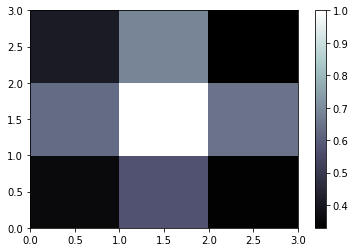

In [56]:
data = np.random.rand(24,10)
# data normalization
data = np.apply_along_axis(lambda x: x/np.linalg.norm(x), 1, data)
print(data)
# Initialization and training

som = MiniSom(3, 3, 10, sigma=1.0, learning_rate=0.5)
print(som)
som.random_weights_init(data)
print("Training...")
som.train_random(data, 100)  # random training
print("\n...ready!")

# Plotting the response for each pattern in the iris dataset
plt.bone()
plt.pcolor(som.distance_map().T)  # plotting the distance map as background
plt.colorbar()

# use different colors and markers for each label
markers = ['o', 's', 'D']
colors = ['r', 'g', 'b']
for cnt, xx in enumerate(data):
    w = som.winner(xx)  # getting the winner
    print(w)
    # palce a marker on the winning position for the sample xx
    plt.plot(w[0]+.5, w[1]+.5, markers[t[cnt]], markerfacecolor='None',
             markeredgecolor=colors[t[cnt]], markersize=12, markeredgewidth=2)

#print(w)
plt.axis([0, 41, 0, 101])
plt.show()

{'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]), 'data': array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. 

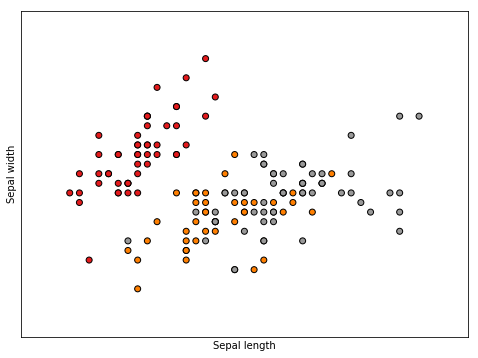

In [59]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
#print(iris)
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
#fig = plt.figure(1, figsize=(8, 6))
#ax = Axes3D(fig, elev=-150, azim=110)
#X_reduced = PCA(n_components=3).fit_transform(iris.data)
#ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,cmap=plt.cm.Set1, edgecolor='k', s=40)
#ax.set_title("First three PCA directions")
#ax.set_xlabel("1st eigenvector")
#ax.w_xaxis.set_ticklabels([])
#ax.set_ylabel("2nd eigenvector")
#ax.w_yaxis.set_ticklabels([])
#ax.set_zlabel("3rd eigenvector")
#ax.w_zaxis.set_ticklabels([])

plt.show()

In [6]:
from random import *
from math import *

class Node:

    def __init__(self, FV_size=10, PV_size=10, Y=0, X=0):
        self.FV_size=FV_size
        self.PV_size=PV_size
        self.FV = [0.0]*FV_size # Feature Vector
        self.PV = [0.0]*PV_size # Prediction Vector
        self.X=X # X location
        self.Y=Y # Y location
        
        for i in range(FV_size):
            self.FV[i]=random() # Assign a random number from 0 to 1
            
        for i in range(PV_size):
            self.PV[i]=random() # Assign a random number from 0 to 1


class SOM:

    #Let radius=False if you want to autocalculate the radis
    def __init__(self, height=10, width=10, FV_size=10, PV_size=10, radius=False, learning_rate=0.005):
        self.height=height
        self.width=width
        self.radius=radius if radius else (height+width)/2
        self.total=height*width
        self.learning_rate=learning_rate
        self.nodes=[0]*(self.total)
        self.FV_size=FV_size
        self.PV_size=PV_size
        for i in range(self.height):
            for j in range(self.width):
                self.nodes[(i)*(self.width)+j]=Node(FV_size, PV_size,i,j)

    # Train_vector format: [ [FV[0], PV[0]],
    #                        [FV[1], PV[1]], so on..
    
    def train(self, iterations=1000, train_vector=[[[0.0],[0.0]]]):
        time_constant=iterations/log(self.radius)
        radius_decaying=0.0
        learning_rate_decaying=0.0
        influence=0.0
        stack=[] #Stack for storing best matching unit's index and updated FV and PV
        temp_FV=[0.0]*self.FV_size
        temp_PV=[0.0]*self.PV_size
        for i in range(1,iterations+1):
            #print "Iteration number:",i
            radius_decaying=self.radius*exp(-1.0*i/time_constant)
            learning_rate_decaying=self.learning_rate*exp(-1.0*i/time_constant)
            print (i)
            
            for  j in range(len(train_vector)):
                input_FV=train_vector[j][0]
                input_PV=train_vector[j][1]
                best=self.best_match(input_FV)
                stack=[]
                for k in range(self.total):
                    dist=self.distance(self.nodes[best],self.nodes[k])
                    if dist < radius_decaying:
                        temp_FV=[0.0]*self.FV_size
                        temp_PV=[0.0]*self.PV_size
                        influence=exp((-1.0*(dist**2))/(2*radius_decaying*i))

                        for l in range(self.FV_size):
                            #Learning
                            temp_FV[l]=self.nodes[k].FV[l]+influence*learning_rate_decaying*(input_FV[l]-self.nodes[k].FV[l])

                        for l in range(self.PV_size):
                            #Learning
                            temp_PV[l]=self.nodes[k].PV[l]+influence*learning_rate_decaying*(input_PV[l]-self.nodes[k].PV[l])

                        #Push the unit onto stack to update in next interval
                        stack[0:0]=[[[k],temp_FV,temp_PV]]

                
                for l in range(len(stack)):
                    
                    self.nodes[stack[l][0][0]].FV[:]=stack[l][1][:]
                    self.nodes[stack[l][0][0]].PV[:]=stack[l][2][:]

                
                                    

                

    #Returns prediction vector
    def predict(self, FV=[0.0]):
        best=self.best_match(FV)
        return self.nodes[best].PV
        
    #Returns best matching unit's index
    def best_match(self, target_FV=[0.0]):

        minimum=sqrt(self.FV_size) #Minimum distance
        minimum_index=1 #Minimum distance unit
        temp=0.0
        for i in range(self.total):
            temp=0.0
            temp=self.FV_distance(self.nodes[i].FV,target_FV)
            if temp<minimum:
                minimum=temp
                minimum_index=i

        return minimum_index

    def FV_distance(self, FV_1=[0.0], FV_2=[0.0]):
        temp=0.0
        for j in range(self.FV_size):
                temp=temp+(FV_1[j]-FV_2[j])**2

        temp=sqrt(temp)
        return temp

    def distance(self, node1, node2):
        return sqrt((node1.X-node2.X)**2+(node1.Y-node2.Y)**2)

    
if __name__ == "__main__":
    print ("Initialization...")
    a=SOM(5,5,2,1,False,0.05)

    print ("Training for the XOR function...")
    a.train(100,[[[1,0],[1]],[[1,1],[0]],[[0,1],[1]],[[0,0],[0]]])

    print ("Predictions for the XOR function...")

    print ("Prediction 0 0,", round(a.predict([0,0])[0]))
    print ("Prediction 1 0,", round(a.predict([1,0])[0]))
    print ("Prediction 0 1,", round(a.predict([0,1])[0]))
    print ("Prediction 1 1,", round(a.predict([1,1])[0]))

Initialization...
Training for the XOR function...
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
Predictions for the XOR function...
Prediction 0 0, 0
Prediction 1 0, 1
Prediction 0 1, 1
Prediction 1 1, 0


In [1]:
import plotly

In [10]:
from plotly.graph_objs import Scatter, Layout

plotly.offline.init_notebook_mode(connected=False)
d = np.random.rand(3,2)
str(d)
plotly.offline.iplot({
    "data": [Scatter(d)],
    "layout": Layout(title="hello world")
})


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


TypeError: Key must be string, not <class 'numpy.float64'>

In [ ]:
import tensorflow as tf
import numpy as np
 
 
class SOM(object):
    """
    2-D Self-Organizing Map with Gaussian Neighbourhood function
    and linearly decreasing learning rate.
    """
 
    #To check if the SOM has been trained
    _trained = False
 
    def __init__(self, m, n, dim, n_iterations=100, alpha=None, sigma=None):
        """
        Initializes all necessary components of the TensorFlow
        Graph.
 
        m X n are the dimensions of the SOM. 'n_iterations' should
        should be an integer denoting the number of iterations undergone
        while training.
        'dim' is the dimensionality of the training inputs.
        'alpha' is a number denoting the initial time(iteration no)-based
        learning rate. Default value is 0.3
        'sigma' is the the initial neighbourhood value, denoting
        the radius of influence of the BMU while training. By default, its
        taken to be half of max(m, n).
        """
 
        #Assign required variables first
        self._m = m
        self._n = n
        if alpha is None:
            alpha = 0.3
        else:
            alpha = float(alpha)
        if sigma is None:
            sigma = max(m, n) / 2.0
        else:
            sigma = float(sigma)
        self._n_iterations = abs(int(n_iterations))
 
        ##INITIALIZE GRAPH
        self._graph = tf.Graph()
 
        ##POPULATE GRAPH WITH NECESSARY COMPONENTS
        with self._graph.as_default():
 
            ##VARIABLES AND CONSTANT OPS FOR DATA STORAGE
 
            #Randomly initialized weightage vectors for all neurons,
            #stored together as a matrix Variable of size [m*n, dim]
            self._weightage_vects = tf.Variable(tf.random_normal(
                [m*n, dim]))
 
            #Matrix of size [m*n, 2] for SOM grid locations
            #of neurons
            self._location_vects = tf.constant(np.array(
                list(self._neuron_locations(m, n))))
 
            ##PLACEHOLDERS FOR TRAINING INPUTS
            #We need to assign them as attributes to self, since they
            #will be fed in during training
 
            #The training vector
            self._vect_input = tf.placeholder("float", [dim])
            #Iteration number
            self._iter_input = tf.placeholder("float")
 
            ##CONSTRUCT TRAINING OP PIECE BY PIECE
            #Only the final, 'root' training op needs to be assigned as
            #an attribute to self, since all the rest will be executed
            #automatically during training
 
            #To compute the Best Matching Unit given a vector
            #Basically calculates the Euclidean distance between every
            #neuron's weightage vector and the input, and returns the
            #index of the neuron which gives the least value
            bmu_index = tf.argmin(tf.sqrt(tf.reduce_sum(
                tf.pow(tf.sub(self._weightage_vects, tf.pack(
                    [self._vect_input for i in range(m*n)])), 2), 1)),
                                  0)
 
            #This will extract the location of the BMU based on the BMU's
            #index
            slice_input = tf.pad(tf.reshape(bmu_index, [1]),
                                 np.array([[0, 1]]))
            bmu_loc = tf.reshape(tf.slice(self._location_vects, slice_input,
                                          tf.constant(np.array([1, 2]))),
                                 [2])
 
            #To compute the alpha and sigma values based on iteration
            #number
            learning_rate_op = tf.sub(1.0, tf.div(self._iter_input,
                                                  self._n_iterations))
            _alpha_op = tf.mul(alpha, learning_rate_op)
            _sigma_op = tf.mul(sigma, learning_rate_op)
 
            #Construct the op that will generate a vector with learning
            #rates for all neurons, based on iteration number and location
            #wrt BMU.
            bmu_distance_squares = tf.reduce_sum(tf.pow(tf.sub(
                self._location_vects, tf.pack(
                    [bmu_loc for i in range(m*n)])), 2), 1)
            neighbourhood_func = tf.exp(tf.neg(tf.div(tf.cast(
                bmu_distance_squares, "float32"), tf.pow(_sigma_op, 2))))
            learning_rate_op = tf.mul(_alpha_op, neighbourhood_func)
 
            #Finally, the op that will use learning_rate_op to update
            #the weightage vectors of all neurons based on a particular
            #input
            learning_rate_multiplier = tf.pack([tf.tile(tf.slice(
                learning_rate_op, np.array([i]), np.array([1])), [dim])
                                               for i in range(m*n)])
            weightage_delta = tf.mul(
                learning_rate_multiplier,
                tf.sub(tf.pack([self._vect_input for i in range(m*n)]),
                       self._weightage_vects))                                         
            new_weightages_op = tf.add(self._weightage_vects,
                                       weightage_delta)
            self._training_op = tf.assign(self._weightage_vects,
                                          new_weightages_op)                                       
 
            ##INITIALIZE SESSION
            self._sess = tf.Session()
 
            ##INITIALIZE VARIABLES
            init_op = tf.initialize_all_variables()
            self._sess.run(init_op)
 
    def _neuron_locations(self, m, n):
        """
        Yields one by one the 2-D locations of the individual neurons
        in the SOM.
        """
        #Nested iterations over both dimensions
        #to generate all 2-D locations in the map
        for i in range(m):
            for j in range(n):
                yield np.array([i, j])
 
    def train(self, input_vects):
        """
        Trains the SOM.
        'input_vects' should be an iterable of 1-D NumPy arrays with
        dimensionality as provided during initialization of this SOM.
        Current weightage vectors for all neurons(initially random) are
        taken as starting conditions for training.
        """
 
        #Training iterations
        for iter_no in range(self._n_iterations):
            #Train with each vector one by one
            for input_vect in input_vects:
                self._sess.run(self._training_op,
                               feed_dict={self._vect_input: input_vect,
                                          self._iter_input: iter_no})
 
        #Store a centroid grid for easy retrieval later on
        centroid_grid = [[] for i in range(self._m)]
        self._weightages = list(self._sess.run(self._weightage_vects))
        self._locations = list(self._sess.run(self._location_vects))
        for i, loc in enumerate(self._locations):
            centroid_grid[loc[0]].append(self._weightages[i])
        self._centroid_grid = centroid_grid
 
        self._trained = True
 
    def get_centroids(self):
        """
        Returns a list of 'm' lists, with each inner list containing
        the 'n' corresponding centroid locations as 1-D NumPy arrays.
        """
        if not self._trained:
            raise ValueError("SOM not trained yet")
        return self._centroid_grid
 
    def map_vects(self, input_vects):
        """
        Maps each input vector to the relevant neuron in the SOM
        grid.
        'input_vects' should be an iterable of 1-D NumPy arrays with
        dimensionality as provided during initialization of this SOM.
        Returns a list of 1-D NumPy arrays containing (row, column)
        info for each input vector(in the same order), corresponding
        to mapped neuron.
        """
 
        if not self._trained:
            raise ValueError("SOM not trained yet")
 
        to_return = []
        for vect in input_vects:
            min_index = min([i for i in range(len(self._weightages))],
                            key=lambda x: np.linalg.norm(vect-
                                                         self._weightages[x]))
            to_return.append(self._locations[min_index])
 
        return to_return

In [ ]:
#For plotting the images
from matplotlib import pyplot as plt
 
#Training inputs for RGBcolors
colors = np.array(
     [[0., 0., 0.],
      [0., 0., 1.],
      [0., 0., 0.5],
      [0.125, 0.529, 1.0],
      [0.33, 0.4, 0.67],
      [0.6, 0.5, 1.0],
      [0., 1., 0.],
      [1., 0., 0.],
      [0., 1., 1.],
      [1., 0., 1.],
      [1., 1., 0.],
      [1., 1., 1.],
      [.33, .33, .33],
      [.5, .5, .5],
      [.66, .66, .66]])
color_names = \
    ['black', 'blue', 'darkblue', 'skyblue',
     'greyblue', 'lilac', 'green', 'red',
     'cyan', 'violet', 'yellow', 'white',
     'darkgrey', 'mediumgrey', 'lightgrey']
 
#Train a 20x30 SOM with 400 iterations
som = SOM(20, 30, 3, 400)
som.train(colors)
 
#Get output grid
image_grid = som.get_centroids()
 
#Map colours to their closest neurons
mapped = som.map_vects(colors)
 
#Plot
plt.imshow(image_grid)
plt.title('Color SOM')
for i, m in enumerate(mapped):
    plt.text(m[1], m[0], color_names[i], ha='center', va='center',
             bbox=dict(facecolor='white', alpha=0.5, lw=0))
plt.show()